# <h1 align="center"> <font color = 'yellow'> <b>Customer Analytics - Churn Prediction </b> </font>  </h1>
<h3 align="center"> <font color = 'yellow'> <b>The Risk Takers </b> </font>  </h3>

**Problem :**

Home Credit Group adalah penyedia pembiayaan konsumen 
internasional. Home Credit menargetkan jumlah pelanggan yang lebih besar untuk memungkinkan Home Credit meningkatkan pendapatannya. Namun,
semakin banyak pinjaman yang ditawarkan perusahaan, semakin besar
pula resiko yang terjadi. Hal ini dikarenakan jika terjadi gagal bayar di
antara pelanggan meningkat, maka perusahaan akan mengalami
kerugian dalam ekspansinya.

**Solusi :**

Home Credit akan menawarkan
pinjaman dengan benar kepada individu yang dapat membayar setiap
bulannya dan menolak kepada mereka yang tidak mampu berdasarkan dengan
data historical loan application yang ada yang nantinya diharapkan dapat
memprediksi dan mengklasifikasi apakah pemohon dapat membayar
pinjaman atau tidak.

**Data Understanding :**

Data yang diberikan adalah 
application_train/application_test, bureau, bureau_balance, 
previous_application, POS_CASH_BALANCE, credit_card_balance, 
dan installments_payment. Setiap data tersebut akan dilakukan cleaning dan feature engineering terlebih dahulu. Kemudian, semua dataset akan disatukan dengan application_train dan application_train. Data yang di-merge dengan application_train akan menjadi train dataset yang akan digunakan untuk membentuk model. Sedangkan, data yang di-merge dengan application_test akan menjadi data yang dilakukan prediksi menggunakan model yang telah ditentukan. 

![](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*s6uRljTMIgyBCD1ok4gfrg.png)


# **Import Libraries**

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Menghubungkan colab ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MBKM - Data Science/Final Project/

/content/drive/MyDrive/MBKM - Data Science/Final Project


In [ ]:
pd.set_option('display.max_columns', None)

#**Data Preprocessing and Merging**

## application_{train}.csv


Dataset ini adalah dataset utama, pada application_train terdapat target. Dataset ini akan digunakan untuk proses pembentukan model.

In [ ]:
# Melihat preview data application_train
application_train = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/application_train.csv")
print("Jumlah baris : ",application_train.shape[0])
print("Jumlah kolom : ",application_train.shape[1])
application_train.head()

Jumlah baris :  307511
Jumlah kolom :  122


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### Exploratory Data Analysis

In [ ]:
# Melihat semua fitur application_train
print(application_train.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

In [ ]:
application_train.shape

(307511, 122)

In [ ]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in application_train.columns:
    # Count the number of missing values
    missing_values = application_train[col].isnull().sum()
    
    # Count the number of duplicates based on SK_ID_CURR
    duplicates = application_train.duplicated(subset=['SK_ID_CURR', col]).sum()
    
    # Check for outliers (assuming a normal distribution)
    if application_train[col].dtype in ['int64', 'float64']:
        mean = application_train[col].mean()
        std = application_train[col].std()
        outliers = ((application_train[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+------------------------------+----------------+------------+----------+
|           Variable           | Missing Values | Duplicates | Outliers |
+------------------------------+----------------+------------+----------+
|          SK_ID_CURR          |       0        |     0      |    0     |
|            TARGET            |       0        |     0      |  24825   |
|      NAME_CONTRACT_TYPE      |       0        |     0      |   N/A    |
|         CODE_GENDER          |       0        |     0      |   N/A    |
|         FLAG_OWN_CAR         |       0        |     0      |   N/A    |
|       FLAG_OWN_REALTY        |       0        |     0      |   N/A    |
|         CNT_CHILDREN         |       0        |     0      |   4272   |
|       AMT_INCOME_TOTAL       |       0        |     0      |   454    |
|          AMT_CREDIT          |       0        |     0      |   3255   |
|         AMT_ANNUITY          |       12       |     0      |   2959   |
|       AMT_GOODS_PRICE        |      

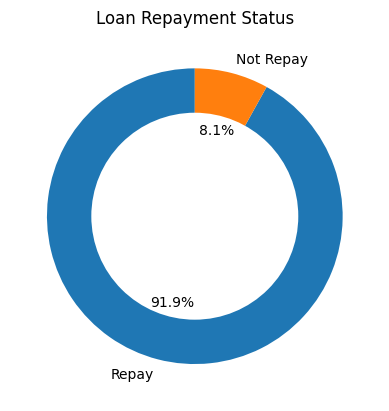

In [ ]:
# Get counts of target values
target_counts = application_train['TARGET'].value_counts()

# Create figure and axis objects
fig, ax = plt.subplots()

# Create pie chart
labels = ['Repay', 'Not Repay']
pie = ax.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Create donut chart by drawing white circle in the center
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add title
ax.set_title('Loan Repayment Status')

# Show chart
plt.show()

<Figure size 1000x600 with 0 Axes>

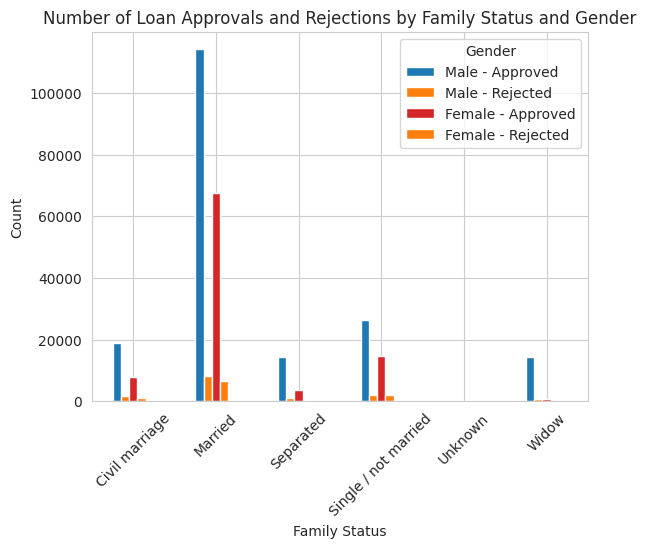

In [ ]:
# create pivot table to count number of loan approvals and rejections by family status and gender
pivot_table = application_train.pivot_table(index=['NAME_FAMILY_STATUS'], columns=['CODE_GENDER', 'TARGET'], values='SK_ID_CURR', aggfunc='count')
pivot_table.columns = pivot_table.columns.map(lambda x: f"{x[0]}_{x[1]}")

# create stacked bar chart using pivot table
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = pivot_table.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#d62728', '#ff7f0e'])
ax.set_xlabel('Family Status')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections by Family Status and Gender')

# change legend labels
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male - Approved', 'Male - Rejected', 'Female - Approved', 'Female - Rejected'])
plt.show()

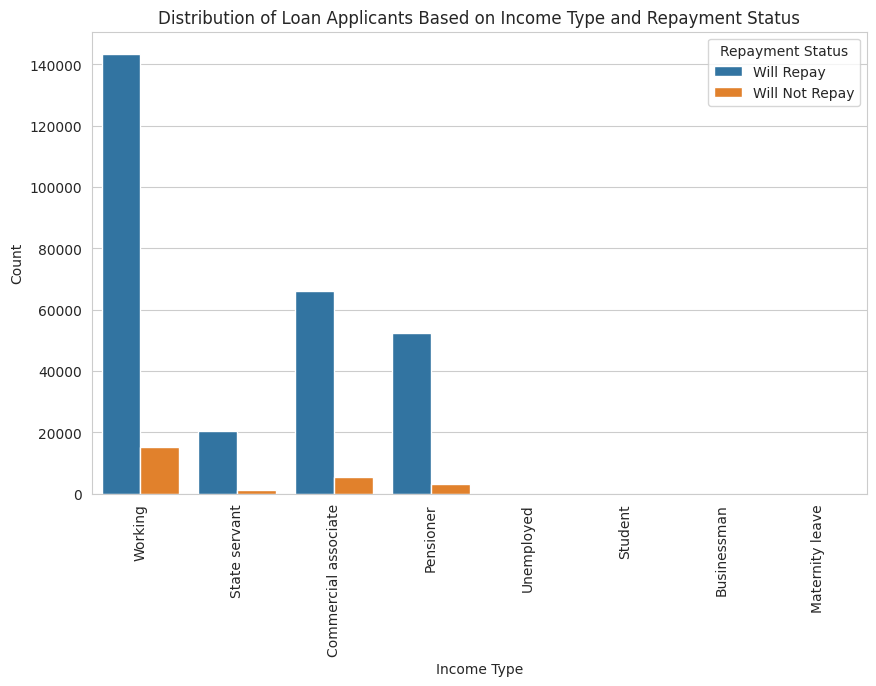

In [ ]:
# create a barplot showing the distribution of loan applicants based on their income type
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Income Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Income Type and Repayment Status')
plt.xticks(rotation=90)

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

<Figure size 1200x600 with 0 Axes>

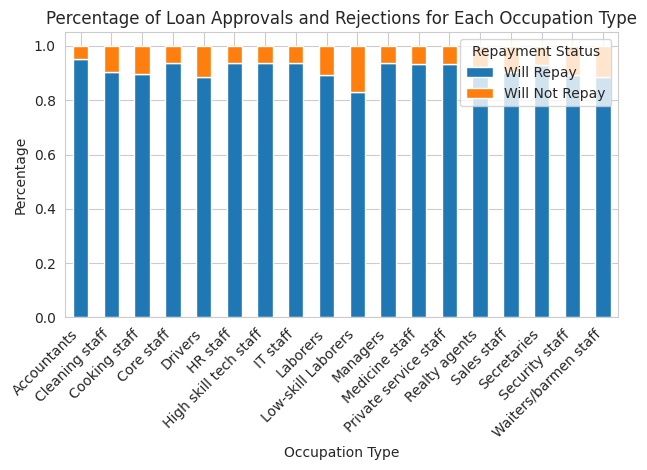

In [ ]:
# Create a pivot table with counts of loan approvals and rejections for each occupation type
occupation_counts = pd.pivot_table(application_train, index='OCCUPATION_TYPE', columns='TARGET', values='SK_ID_CURR', aggfunc='count')

# Calculate the total count for each occupation type
occupation_totals = occupation_counts.sum(axis=1)

# Calculate the percentage of loan approvals and rejections for each occupation type
occupation_pct = occupation_counts.div(occupation_totals, axis=0)

# Create a stacked bar chart showing the percentage of loan approvals and rejections for each occupation type
plt.figure(figsize=(12, 6))
ax = occupation_pct.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Occupation Type')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Loan Approvals and Rejections for Each Occupation Type')
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

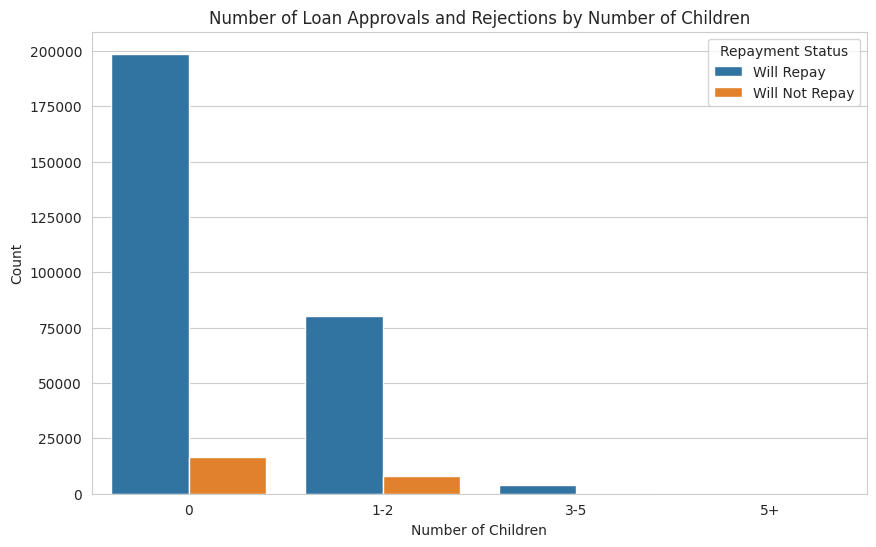

In [ ]:
# create a new column for the number of children categories
application_train['CNT_CHILDREN_GROUP'] = pd.cut(application_train['CNT_CHILDREN'], 
                                                bins=[-1, 0, 2, 5, application_train['CNT_CHILDREN'].max()], 
                                                labels=['0', '1-2', '3-5', '5+'])

# create a stacked bar chart showing the number of loan approvals and rejections for each number of children
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CNT_CHILDREN_GROUP', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Number of Children')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections by Number of Children')
# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

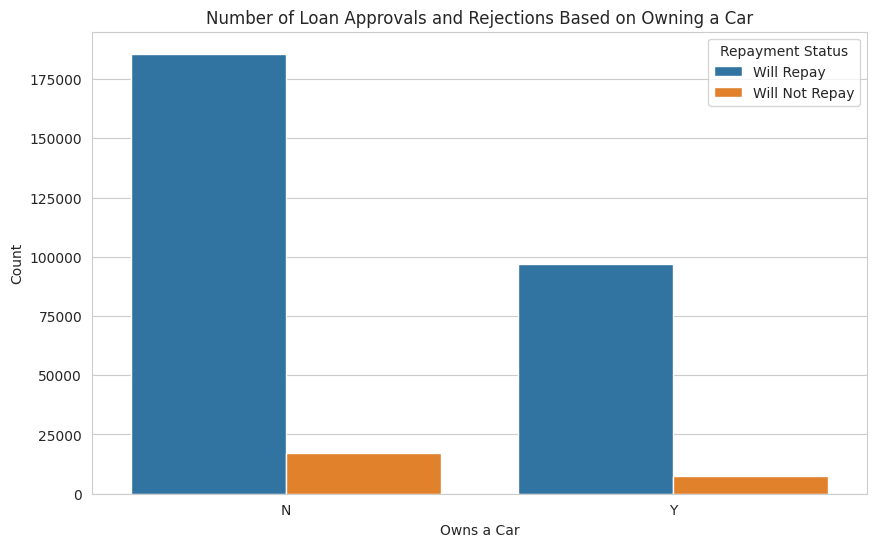

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a barplot showing the number of loan approvals and rejections based on the number of cars owned
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Owns a Car')
ax.set_ylabel('Count')
ax.set_title('Number of Loan Approvals and Rejections Based on Owning a Car')

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

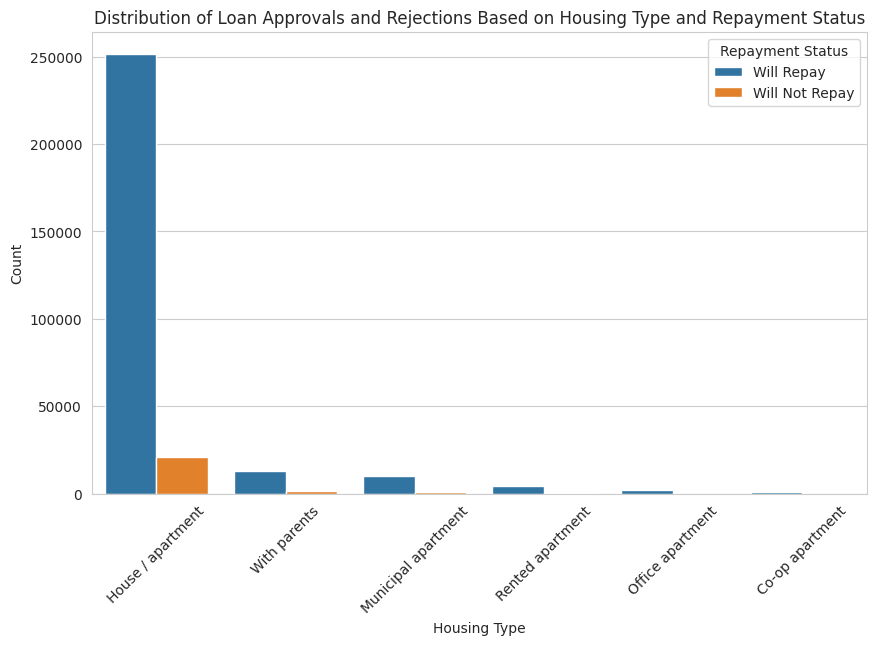

In [ ]:
# create a stacked bar chart showing the number of loan approvals and rejections for each housing type
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'], 
                   order=application_train['NAME_HOUSING_TYPE'].value_counts().index)
ax.set_xlabel('Housing Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Approvals and Rejections Based on Housing Type and Repayment Status')

# change legend labels
plt.xticks(rotation=45)
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

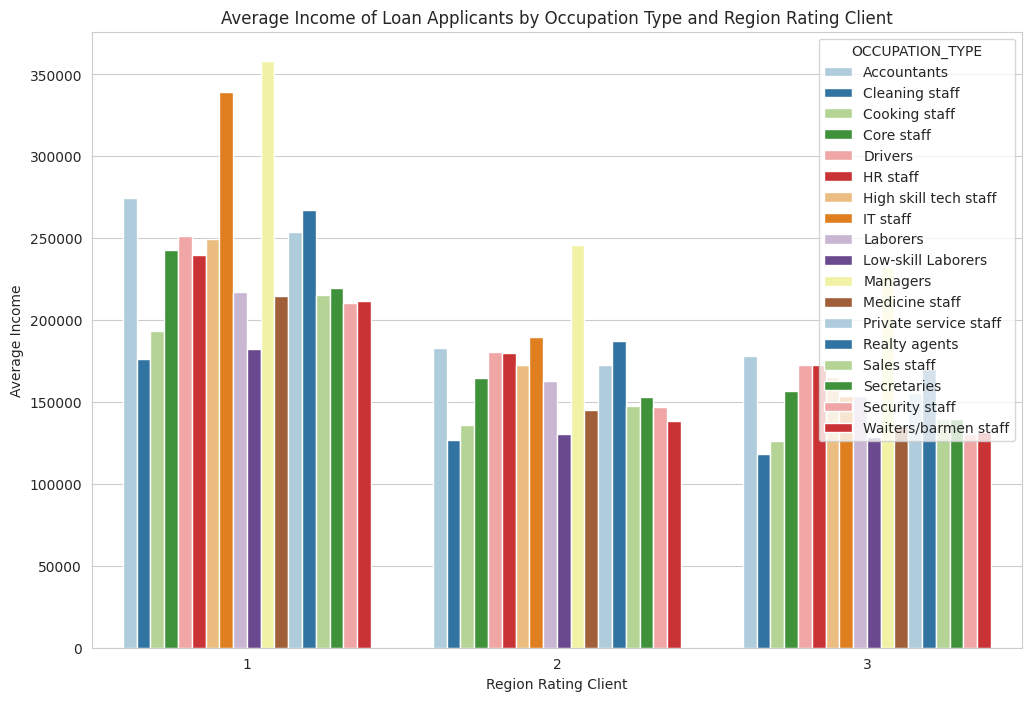

In [ ]:
# Calculate the average income for each occupation type and region rating client
avg_income = application_train.groupby(['OCCUPATION_TYPE', 'REGION_RATING_CLIENT'])['AMT_INCOME_TOTAL'].mean().reset_index()

# Define the plot size
plt.figure(figsize=(12, 8))

# Plot the grouped bar chart
sns.barplot(x='REGION_RATING_CLIENT', y='AMT_INCOME_TOTAL', hue='OCCUPATION_TYPE', data=avg_income, palette='Paired')

plt.xlabel('Region Rating Client')
plt.ylabel('Average Income')
plt.title('Average Income of Loan Applicants by Occupation Type and Region Rating Client')
plt.show()

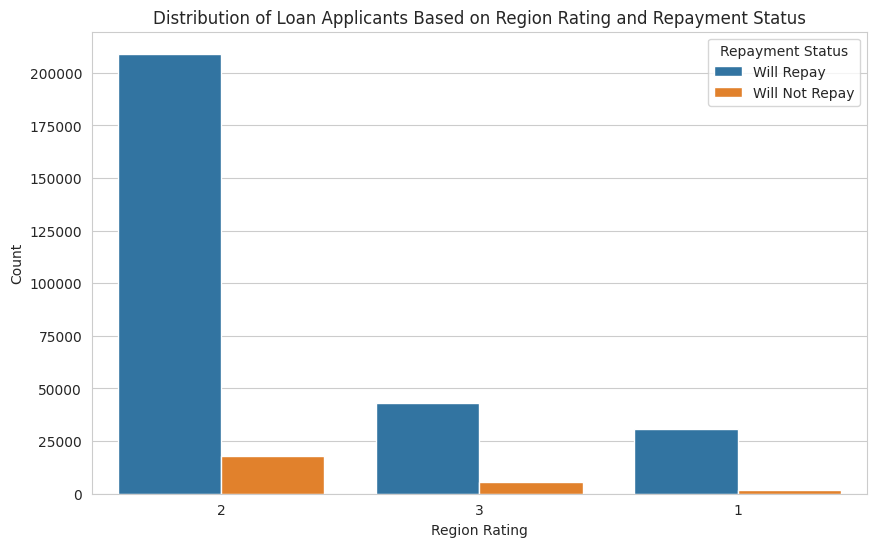

In [ ]:
# create a stacked bar chart showing the number of loan applicants based on region rating and repayment status
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='REGION_RATING_CLIENT', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'], 
                   order=application_train['REGION_RATING_CLIENT'].value_counts().index)
ax.set_xlabel('Region Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Region Rating and Repayment Status')

# change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

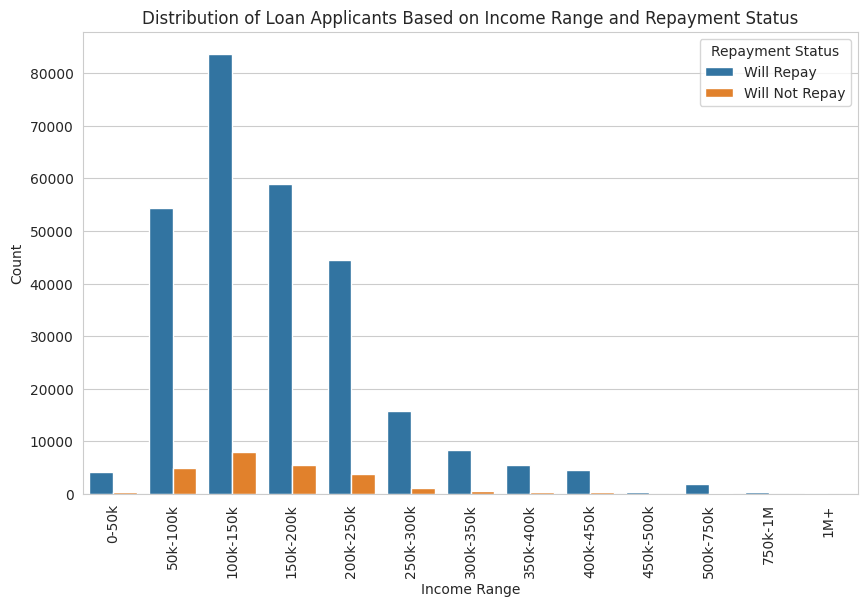

In [ ]:
# Define the income range bins
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 750000, 1000000, np.inf]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-750k', '750k-1M', '1M+']

# Create a new column 'INCOME_RANGE' by cutting the AMT_INCOME_TOTAL variable into bins
application_train['INCOME_RANGE'] = pd.cut(application_train['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='INCOME_RANGE', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Income Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Income Range and Repayment Status')
plt.xticks(rotation=90)

# Change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

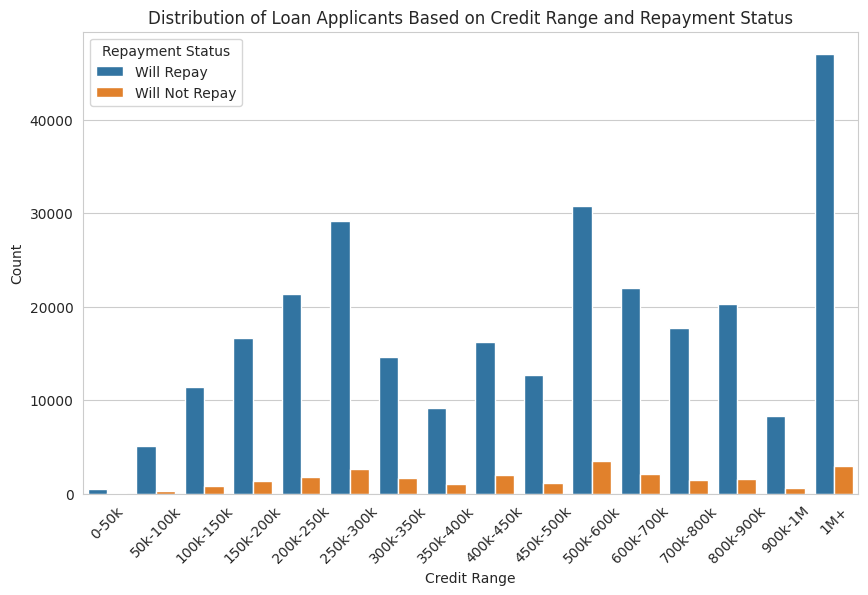

In [ ]:
# Define the credit range bins
credit_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 600000, 700000, 800000, 900000, 1000000, np.inf]
credit_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M', '1M+']

# Create a new column 'CREDIT_RANGE' by cutting the AMT_CREDIT variable into bins
application_train['CREDIT_RANGE'] = pd.cut(application_train['AMT_CREDIT'], bins=credit_bins, labels=credit_labels)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_RANGE', hue='TARGET', data=application_train, palette=['#1f77b4', '#ff7f0e'])
ax.set_xlabel('Credit Range')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Applicants Based on Credit Range and Repayment Status')
plt.xticks(rotation=45)

# Change legend labels
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

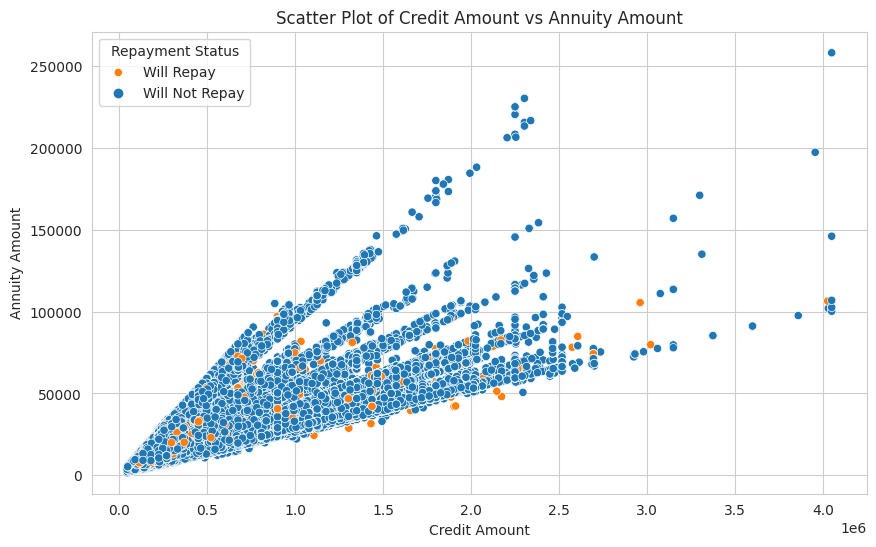

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=application_train, hue='TARGET', palette=['#1f77b4', '#ff7f0e'])
plt.xlabel('Credit Amount')
plt.ylabel('Annuity Amount')
plt.title('Scatter Plot of Credit Amount vs Annuity Amount')
plt.legend(title='Repayment Status', labels=['Will Repay', 'Will Not Repay'])
plt.show()

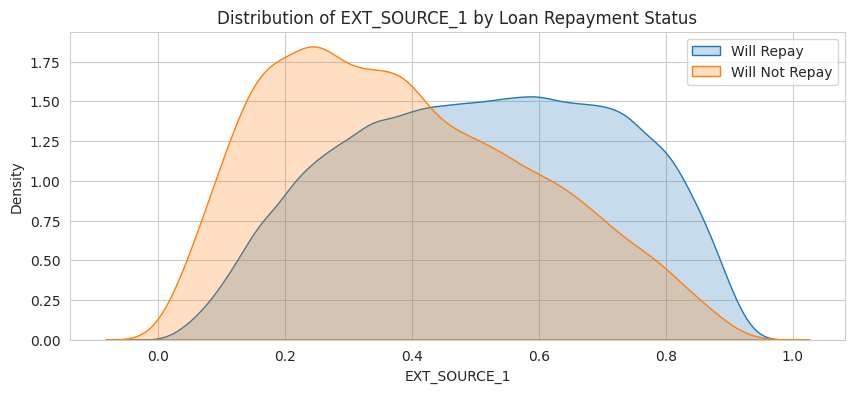

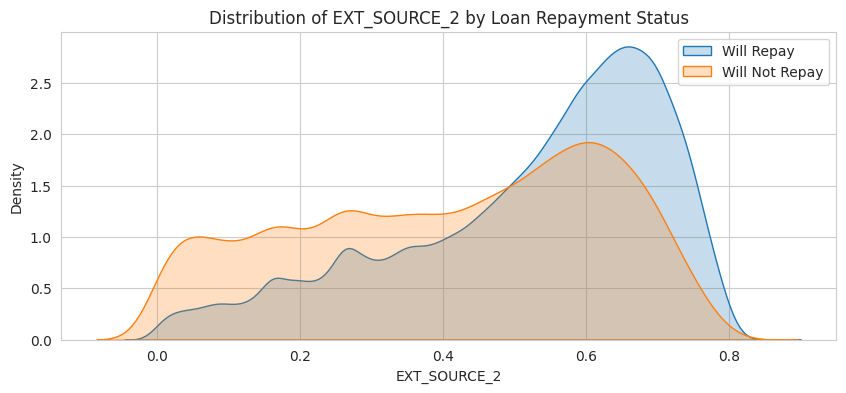

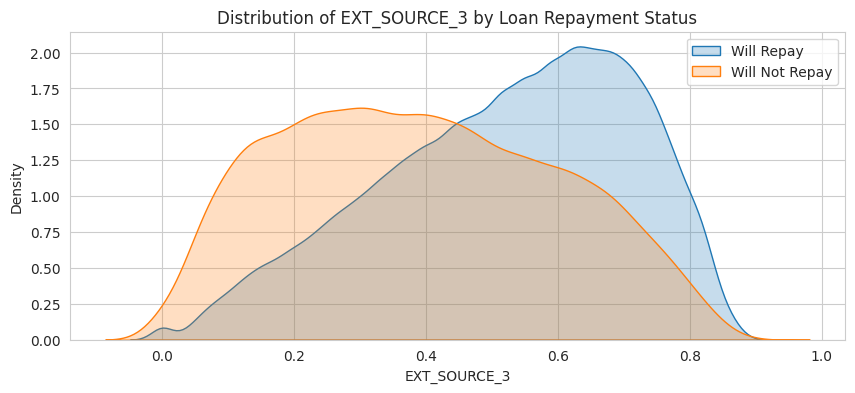

In [ ]:
# create a list of EXT_SOURCE columns
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# create a kdeplot for each EXT_SOURCE column
for source in ext_sources:
    capable_ext_source = application_train[application_train['TARGET']==0][source]
    not_capable_ext_source = application_train[application_train['TARGET']==1][source]
    plt.figure(figsize=(10, 4))
    sns.kdeplot(capable_ext_source,label="Will Repay", color='#1f77b4', fill=True)
    sns.kdeplot(not_capable_ext_source,label="Will Not Repay", color='#ff7f0e', fill=True)
    plt.legend()
    plt.title('Distribution of {} by Loan Repayment Status'.format(source))
    plt.xlabel('{}'.format(source))
    plt.ylabel('Density')
    plt.show()

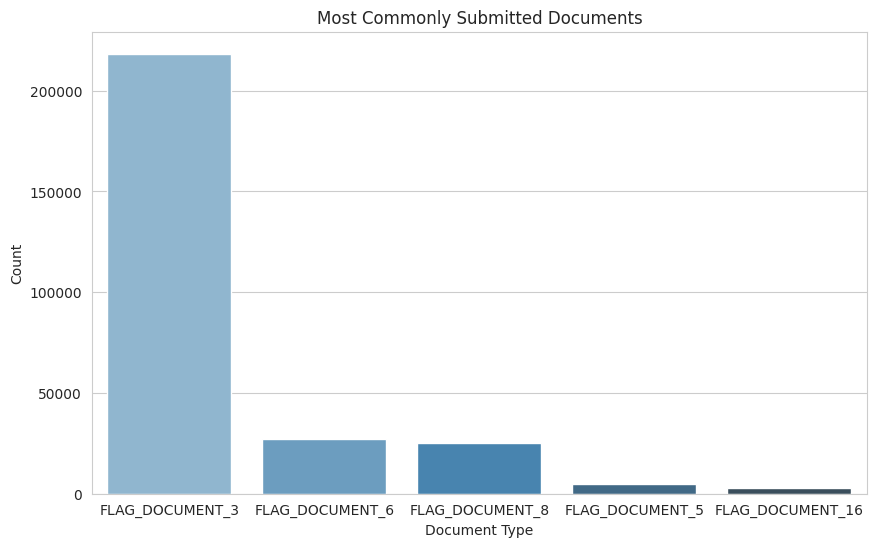

In [ ]:
# Get the count of each document type
document_counts = application_train.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].sum()

# Sort the values in descending order and get the top 5 most commonly submitted documents
top_documents = document_counts.sort_values(ascending=False)[:5]

# Create a bar plot of the top 5 documents
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_documents.index, y=top_documents.values, palette='Blues_d')
ax.set_xlabel('Document Type')
ax.set_ylabel('Count')
ax.set_title('Most Commonly Submitted Documents')
plt.show()

### Data Preparation

In [ ]:
def cleaning(data):
    
    # Iterate through each column
    for col in data.columns:
        
        # If the column is numerical
        if data[col].dtype != 'object':
            
            # Fill missing values with 0
            data[col].fillna(0, inplace=True)
        
        # If the column is categorical
        else:
            
            # Fill missing values with 'Data_Not_Available'
            data[col].fillna('Data_Not_Available', inplace=True)
            
    # Replace XNA values in CODE_GENDER with 'M'
    data['CODE_GENDER'].replace('XNA','M',inplace=True)
    
    # Replace NAME_FAMILY_STATUS values of 'Unknown' with 'Married'
    data['NAME_FAMILY_STATUS'].replace('Unknown','Married', inplace=True)
    
    # Replace missing values in CNT_FAM_MEMBERS with the most frequent value
    data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].value_counts().idxmax(), inplace=True)
    
    # Fill missing values with 0 for AMT_ANNUITY and AMT_GOODS_PRICE
    data['AMT_ANNUITY'].fillna(0, inplace=True)
    data['AMT_GOODS_PRICE'].fillna(0, inplace=True)
    
    # Fill missing values with 'Unaccompanied' for NAME_TYPE_SUITE
    data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
    
    # Fill missing values with 'Data_Not_Available' for OCCUPATION_TYPE
    data['OCCUPATION_TYPE'].fillna('Data_Not_Available', inplace=True)
    
    # Fill missing values with 0 for EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3
    data['EXT_SOURCE_1'].fillna(0, inplace=True)
    data['EXT_SOURCE_2'].fillna(0, inplace=True)
    data['EXT_SOURCE_3'].fillna(0, inplace=True)

    # Remove the OWN_CAR_AGE column
    data.drop('OWN_CAR_AGE', axis=1, inplace=True)
    
    return data

In [ ]:
application_train = cleaning(application_train)
application_train.shape

(307511, 124)

### Feature Engineering

In [ ]:
def FE_application(data):

  # Feature Extraction
  data['CREDIT_PER_INCOME'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
  data['ANNUITY_PER_INCOME'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
  data['FAM_CNT_PER_INCOME'] = data['CNT_FAM_MEMBERS'] / data['AMT_INCOME_TOTAL']
  data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
  data['OCCU_TYPE_PER_INCOME'] = data[['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']].groupby('OCCUPATION_TYPE').median()['AMT_INCOME_TOTAL'] / data['AMT_INCOME_TOTAL']
  data['EDU_TYPE_PER_INCOME'] = data[['AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE']].groupby('NAME_EDUCATION_TYPE').median()['AMT_INCOME_TOTAL'] / data['AMT_INCOME_TOTAL']
  data['ORG_TYPE_PER_INCOME'] = data[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL'] / data['AMT_INCOME_TOTAL']

  # Dropping FLAG_DOCUMENT
  data.drop(columns=[col for col in data.columns if 'FLAG_DOCUMENT' in col and col != 'FLAG_DOCUMENT_3'], inplace=True)

  # Dropping Living Area Columns
  cols_to_drop = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
                'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
                'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
                'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
                'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
                'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
                'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
                'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
  data.drop(columns=cols_to_drop, inplace=True)

  # One Hot Encoding
  cat_col = [category for category in data.columns if data[category].dtype == 'object']
  data = pd.get_dummies(data, columns= cat_col)

  return data

In [ ]:
application_train = FE_application(application_train)
print(application_train.columns.values)

['SK_ID_CURR' 'TARGET' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'OBS_30_CNT_SOCIAL_CIRCLE'
 'DEF_30_CNT_SOCIAL_CIRCLE' 'OBS_60_CNT_SOCIAL_CIRCLE'
 'DEF_60_CNT_SOCIAL_CIRCLE' 'DAYS_LAST_PHONE_CHANGE' 'FLAG_DOCUMENT_3'
 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_DAY'
 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CREDIT_BUREAU_MON'
 'AMT_REQ_CREDIT_BUREAU_QRT' 'AMT_REQ_CREDIT_BUREAU_YEAR'
 'CNT_CHILDREN_GROUP' 'INCOME_RANGE' 'CREDIT_RANGE' 'CREDIT_PER_INC

In [ ]:
print(application_train.shape)

(307511, 177)


## application_{test}.csv

application_test adalah data yang akan dilakukan prediksi apakah nasabah tersebut diterima atau ditolak. Setelah mendapatkan model dari data application_train, model tersebut akan digunakan pada application_test.

In [ ]:
# Melihat preview data application_train
application_test = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/application_test.csv")
print("Jumlah baris : ",application_test.shape[0])
print("Jumlah kolom : ",application_test.shape[1])
application_test.head()

Jumlah baris :  48744
Jumlah kolom :  121


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

### Data Preparation

In [ ]:
# Cleaning application_test
application_test = cleaning(application_test)
application_test.shape

(48744, 120)

### Feature Engineering

In [ ]:
# FE application_test
application_test = FE_application(application_test)
print(application_test.columns.values)

['SK_ID_CURR' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT' 'AMT_ANNUITY'
 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'OBS_30_CNT_SOCIAL_CIRCLE'
 'DEF_30_CNT_SOCIAL_CIRCLE' 'OBS_60_CNT_SOCIAL_CIRCLE'
 'DEF_60_CNT_SOCIAL_CIRCLE' 'DAYS_LAST_PHONE_CHANGE' 'FLAG_DOCUMENT_3'
 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_DAY'
 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CREDIT_BUREAU_MON'
 'AMT_REQ_CREDIT_BUREAU_QRT' 'AMT_REQ_CREDIT_BUREAU_YEAR'
 'CREDIT_PER_INCOME' 'ANNUITY_PER_INCOME' 'FAM_CNT_PER_INCOME'
 'CREDIT_TERM

In [ ]:
application_test.shape

(48744, 172)

In [ ]:
# Membaca dataset pertama
df1 = application_train
# Membaca dataset kedua
df2 = application_test

# Mengambil perbedaan fitur antara dua dataset
diff_features = set(df1.columns) - set(df2.columns)

# Menampilkan perbedaan fitur
print("Perbedaan fitur antara dua dataset:")
for feature in diff_features:
    print(feature)

Perbedaan fitur antara dua dataset:
TARGET
NAME_INCOME_TYPE_Maternity leave
CREDIT_RANGE
CNT_CHILDREN_GROUP
INCOME_RANGE


## bureau.csv

Ini adalah dataset kredit yang tercatat di biro kredit.

In [ ]:
# Melihat preview data
bureau = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/bureau.csv")
print("Jumlah baris : ",bureau.shape[0])
print("Jumlah kolom : ",bureau.shape[1])
bureau.head()

Jumlah baris :  1716428
Jumlah kolom :  17


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

**Penjelasan fitur :**
1. SK_ID_CURR : Id dari application_train
2. SK_ID_BUREAU : Id dari bureau_balance
3. CREDIT_ACTIVE : Status keaktifan debitur
4. CREDIT_CURRENCY : Catatan mata uang
5. DAYS_CREDIT : Pengajuan jangka waktu kredit dalam hari
6. CREDIT_DAY_OVERDUE : Jumlah hari yang melebihi tempo
7. DAYS_CREDIT_ENDDATE : Sisa durasi kredit saat pengajuan di Home Kredit dalam hari
8. DAYS_ENDDATE_FACT : Hari sejak kredit Biro Kredit berakhir saat pengajuan di Home Kredit
9. AMT_CREDIT_MAX_OVERDUE : Jumlah maksimum tunggakan di Biro Kredit
10. CNT_CREDIT_PROLONG : Berapa kali kredit Biro Kredit di perpanjang
11. AMT_CREDIT_SUM : Jumlah kredit saat ini di Biro Kredit
12. AMT_CREDIT_SUM_DEBT : Jumlah hutang saat ini di Biro Kredit
13. AMT_CREDIT_SUM_LIMIT : Batas kredit di kartu kredit saat ini di Biro Kredit
14. AMT_CREDIT_SUM_OVERDUE : Jumlah tunggakan saat ini di Biro Kredit
15. CREDIT_TYPE : Jenis kredit di Biro Kredit (mobil, uang tunai, dll)
16. DAYS_CREDIT_UPDATE : Informasi terbaru yang datang dari Biro Kredit (dalam hari)
17. AMT_ANNUITY : Jumlah pembayaran tetap kredit di setiap pembayaran

In [ ]:
# Melihat semua fitur 
print(bureau.columns.values)

['SK_ID_CURR' 'SK_ID_BUREAU' 'CREDIT_ACTIVE' 'CREDIT_CURRENCY'
 'DAYS_CREDIT' 'CREDIT_DAY_OVERDUE' 'DAYS_CREDIT_ENDDATE'
 'DAYS_ENDDATE_FACT' 'AMT_CREDIT_MAX_OVERDUE' 'CNT_CREDIT_PROLONG'
 'AMT_CREDIT_SUM' 'AMT_CREDIT_SUM_DEBT' 'AMT_CREDIT_SUM_LIMIT'
 'AMT_CREDIT_SUM_OVERDUE' 'CREDIT_TYPE' 'DAYS_CREDIT_UPDATE' 'AMT_ANNUITY']


In [ ]:
# Melihat missing value & duplikat
print("Jumlah Duplikat : ",bureau.duplicated().sum()) # duplikat
null_count = bureau.isnull().sum() # jumlah missing value
null_percent = bureau.isnull().mean() # presentase missing value

# merge pengecekan
null_df = pd.concat([null_count, null_percent], axis=1, keys=['Missing Values', '% Missing Values'])
null_df

Jumlah Duplikat :  0


Missing Values  % Missing Values
SK_ID_CURR                           0          0.000000
SK_ID_BUREAU                         0          0.000000
CREDIT_ACTIVE                        0          0.000000
CREDIT_CURRENCY                      0          0.000000
DAYS_CREDIT                          0          0.000000
CREDIT_DAY_OVERDUE                   0          0.000000
DAYS_CREDIT_ENDDATE             105553          0.061496
DAYS_ENDDATE_FACT               633653          0.369170
AMT_CREDIT_MAX_OVERDUE         1124488          0.655133
CNT_CREDIT_PROLONG                   0          0.000000
AMT_CREDIT_SUM                      13          0.000008
AMT_CREDIT_SUM_DEBT             257669          0.150119
AMT_CREDIT_SUM_LIMIT            591780          0.344774
AMT_CREDIT_SUM_OVERDUE               0          0.000000
CREDIT_TYPE                          0          0.000000
DAYS_CREDIT_UPDATE                   0          0.000000
AMT_ANNUITY                    1226791          0.714735

Insight :

- Terdapat 2 kolom yang jumlah missing melebihi 50% yaitu AMT_CREDIT_MAX_OVERDUE dan AMT_ANNUITY dan akan dilakukan drop kolom

In [ ]:
# Menghapus kolom dengan presentase missing > 50%
# AMT_CREDIT_MAX_OVERDUE	
bureau.drop("AMT_CREDIT_MAX_OVERDUE", axis=1, inplace=True)
# AMT_ANNUITY	
bureau.drop("AMT_ANNUITY", axis=1, inplace=True)

### Exploratory Data Analysis

<ipython-input-36-774480d4b26f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bureau.corr()


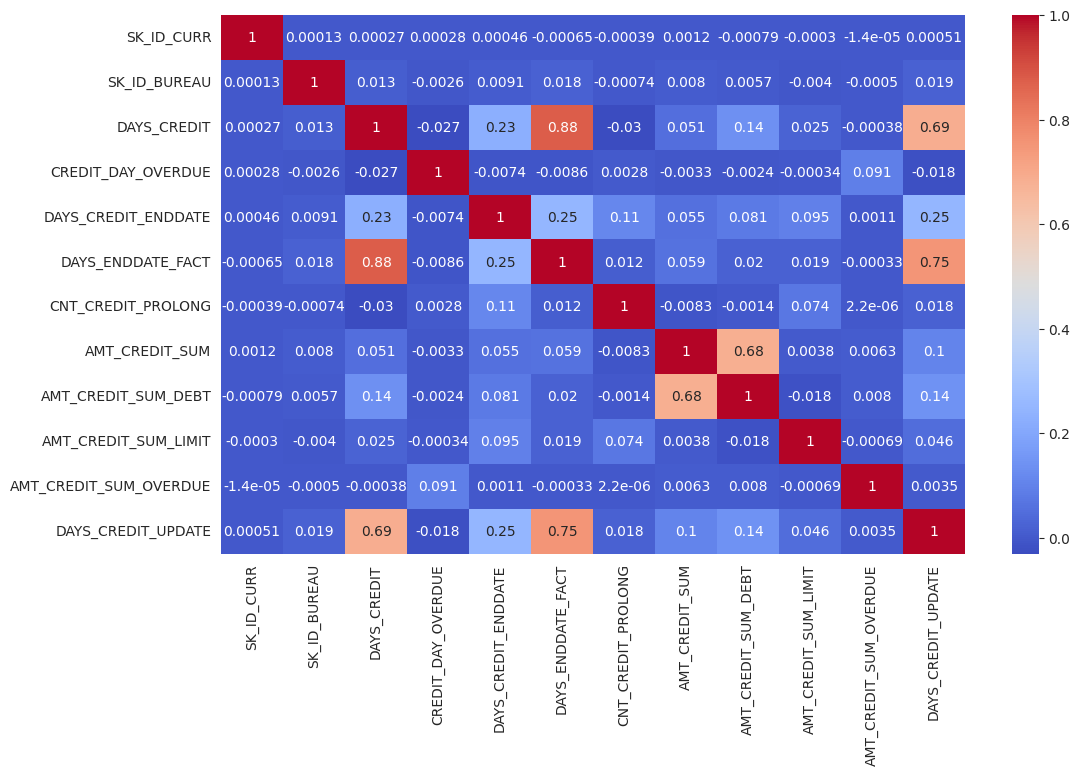

In [ ]:
#Memeriksa korelasi antar fitur menggunakan heatmap
corr = bureau.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Analysis : CREDIT_ACTIVE**

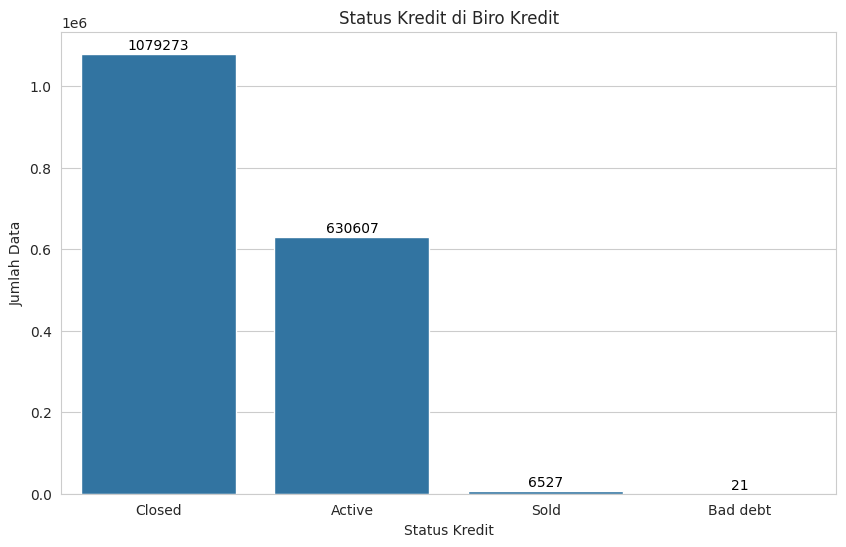

In [ ]:
# Menampilkan status kredit
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_ACTIVE', data=bureau, color='#1f77b4')
ax.set_xlabel('Status Kredit')
ax.set_ylabel('Jumlah Data')
ax.set_title('Status Kredit di Biro Kredit')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

Insight :
- Sebagian besar data menunjukkan bahwa banyak data debitur yang memiliki status kredit yang sudah tertutup atau non-aktif
- Ada sebagian data juga memiliki status kredit yang masih aktif
- Ada sebgian kecil status kartu kredit yang 'sold' dan 'Bad debt'

**Analysis : DAYS_CREDIT**

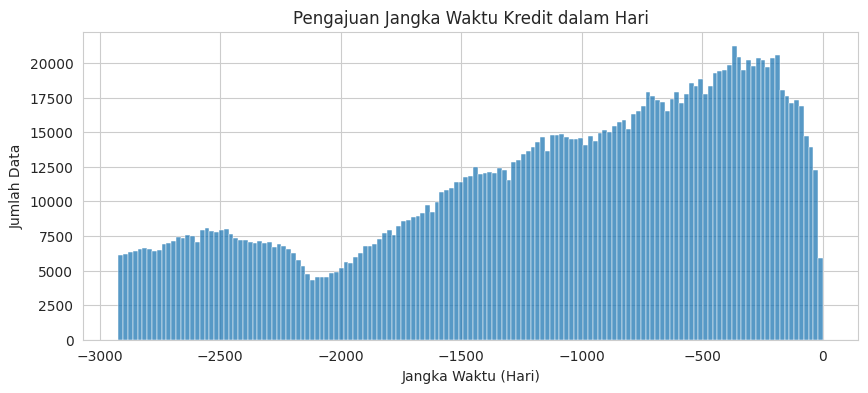

In [ ]:
# Melihat pengajuan jangka waktu kredit dalam hari
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bureau, x='DAYS_CREDIT', color='#1f77b4')
ax.set_xlabel('Jangka Waktu (Hari)')
ax.set_ylabel('Jumlah Data')
ax.set_title('Pengajuan Jangka Waktu Kredit dalam Hari')
plt.show()

Insight :
- Sebagian besar data menunjukkan bahwa debitur mengajukan jangka waktu kredit antara **500 hari(Lebih spesifik < 1 tahun)** hingga akhir waktu pelunasan. Semakin lama pengajuan jangka waktu menunjukkan semakin besar nilai kredit.

**Analysis : CREDIT_DAY_OVERDUE**

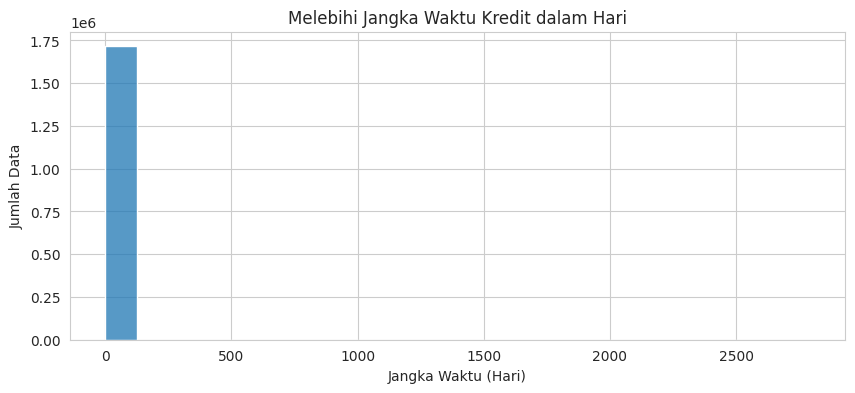

In [ ]:
# Melihat jumlah hari yang melebihi jangka waktu
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bureau, x='CREDIT_DAY_OVERDUE', color='#1f77b4')
ax.set_xlabel('Jangka Waktu (Hari)')
ax.set_ylabel('Jumlah Data')
ax.set_title('Melebihi Jangka Waktu Kredit dalam Hari')
plt.show()

In [ ]:
bureau['CREDIT_DAY_OVERDUE'].value_counts()

0       1712211
30          311
60          126
8           103
13          103
         ...   
1445          1
278           1
707           1
2193          1
1931          1
Name: CREDIT_DAY_OVERDUE, Length: 942, dtype: int64

In [ ]:
# Menghitung jumlah data yang overdue
jumlah_overdue = 0
for i in bureau['CREDIT_DAY_OVERDUE']:
  if i > 0:
    jumlah_overdue += 1
print('Jumlah debitur yang melebihi jangka waktu adalah :',jumlah_overdue)

Jumlah debitur yang melebihi jangka waktu adalah : 4217


Insight :
- Sebagian besar debitur membayar tepat waktu, namun ada beberapa yang membayar melebihi kesepakatan yang ada yaitu sekitar 4217 data.


**Analysis : DAYS_CREDIT_ENDDATE**

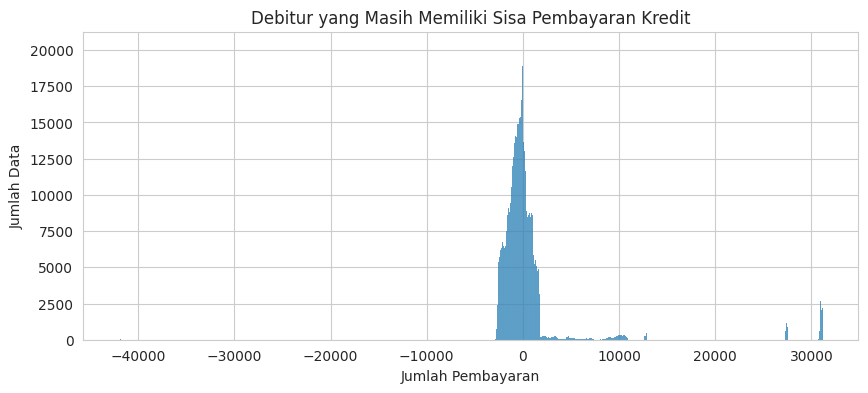

In [ ]:
# Melihat debitur yang masih memiliki sisa pembayaran
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bureau, x='DAYS_CREDIT_ENDDATE', color='#1f77b4')
ax.set_xlabel('Jumlah Pembayaran')
ax.set_ylabel('Jumlah Data')
ax.set_title('Debitur yang Masih Memiliki Sisa Pembayaran Kredit')
plt.show()

In [ ]:
# Mengisi missing value DAYS_CREDIT_ENDDATE & DAYS_ENDDATE_FACT dengan mean
bureau['DAYS_CREDIT_ENDDATE'].fillna(bureau['DAYS_CREDIT_ENDDATE'].median(), inplace=True)
bureau['DAYS_ENDDATE_FACT'].fillna(bureau['DAYS_ENDDATE_FACT'].mean(), inplace=True)

Insight :
- Dapat dilihat bahwa ada beberapa debitur yang masih memiliki sisa pembayaran kredit saat mengajukan kredit di Home Credit

**Analysis : CNT_CREDIT_PROLONG**

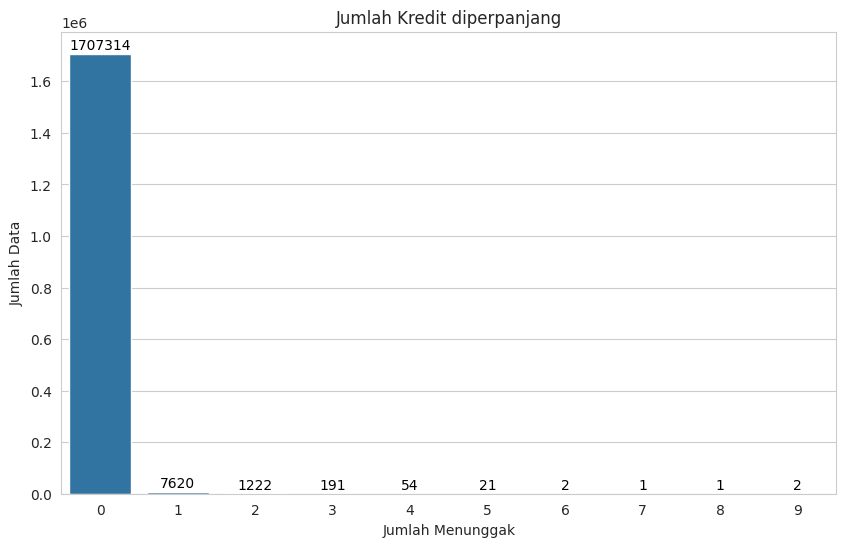

In [ ]:
# Melihat jumlah perpanjangan kredit
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CNT_CREDIT_PROLONG', data=bureau, color='#1f77b4')
ax.set_xlabel('Jumlah Menunggak')
ax.set_ylabel('Jumlah Data')
ax.set_title('Jumlah Kredit diperpanjang')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

Insight :
- Kebanyakan debitur tidak memperpanjang kredit. Namun ada ribuan debitur yang memperpanjang 1-2 kali, dan ada ratusan debitur yang memperpanjang hingga 3 kali.

**Analysis : CREDIT_TYPE**

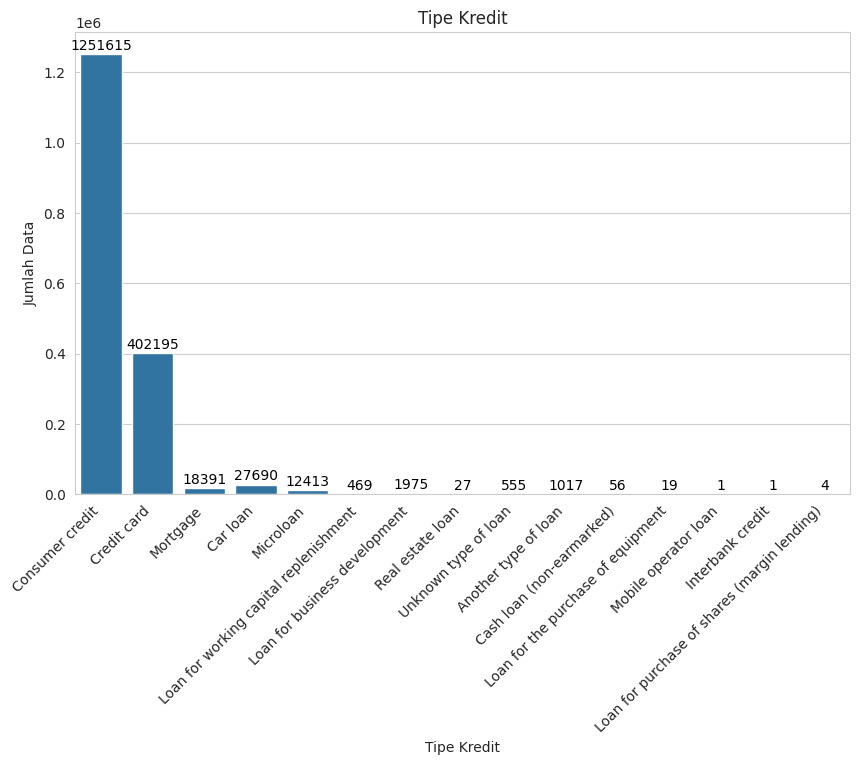

In [ ]:
# Melihat tipe kredit debitur
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_TYPE', data=bureau, color='#1f77b4')
ax.set_xlabel('Tipe Kredit')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Jumlah Data')
ax.set_title('Tipe Kredit')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

Insight :

- Customer credit dan credit card adalah jenis kredit yang paling banyak terdaftar di Biro Kredit.

**Analysis : CREDIT_ACTIVE vs DAYS_CREDIT**

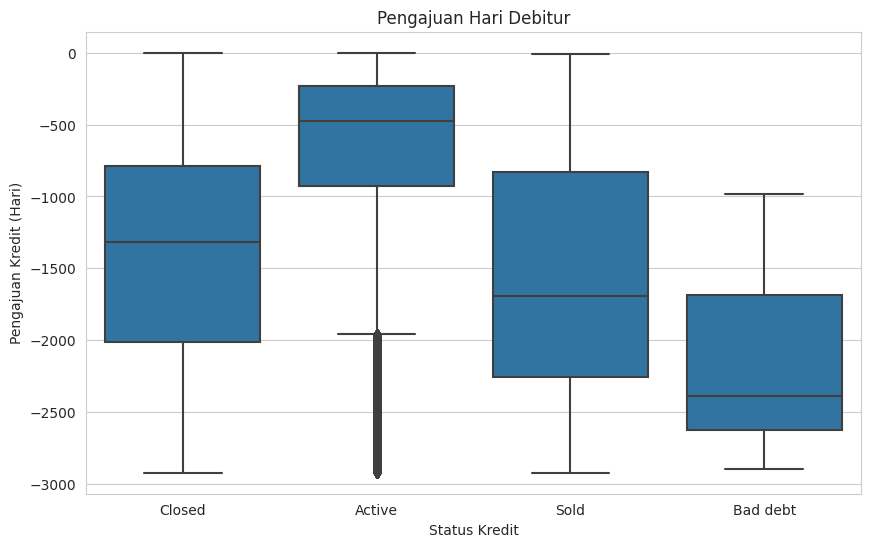

In [ ]:
# Melihat pengajuan kredit dalam hari pada status kredit yang aktif
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=bureau, x="CREDIT_ACTIVE", y="DAYS_CREDIT", color='#1f77b4')
ax.set_xlabel('Status Kredit')
ax.set_ylabel('Pengajuan Kredit (Hari)')
ax.set_title('Pengajuan Hari Debitur')
plt.show()

Insight :

- Kredit yang masih aktif memiliki median 500 artinya jumlah hari yang diajukan berpusat di angka 500 hari.

**Analysis : DAYS_CREDIT vs AMT_CREDIT_SUM**

In [ ]:
# Mengidentifikasi data AMT_CREDIT_SUM yang melebihi 200000000
urutan = 0
index_outlier = []
for i in bureau['AMT_CREDIT_SUM']:
  if i > 200000000:
    index_outlier.append(urutan)
  urutan += 1
print(index_outlier)

[907821, 1515147]


In [ ]:
# Melihat baris data outlier berdasarkan index
bureau.iloc[index_outlier]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
907821       325979       5671169        Closed      currency 1        -2867   
1515147      386819       6706880        Closed      currency 1        -2683   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
907821                    0              -2833.0            -2830.0   
1515147                   0              -2318.0            -2312.0   

         CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
907821                    0     396000000.0                  0.0   
1515147                   0     585000000.0                  NaN   

         AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
907821                    0.0                     0.0  Consumer credit   
1515147                   NaN                     0.0  Consumer credit   

         DAYS_CREDIT_UPDATE  
907821                -1400  
1515147               -2312

In [ ]:
# Menghapus baris yang outlier
bureau.drop(index_outlier, inplace=True)

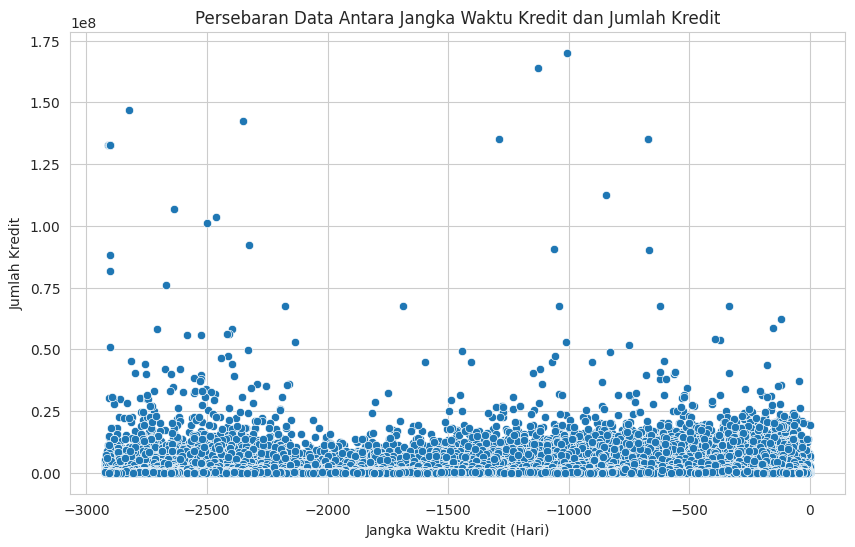

In [ ]:
# Melihat pada jangka waktu kredit dan jumlah kredit yang diambil
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="DAYS_CREDIT", y="AMT_CREDIT_SUM", color='#1f77b4')
ax.set_xlabel('Jangka Waktu Kredit (Hari)')
ax.set_ylabel('Jumlah Kredit')
ax.set_title('Persebaran Data Antara Jangka Waktu Kredit dan Jumlah Kredit')
plt.show()

Insight :

- Kebanyakan jumlah kredit dibawah 25.000.000 dengan jangka waktu yang beragam.

**Analysis : CREDIT_ACTIVE vs CREDIT_DAY_OVERDUE**

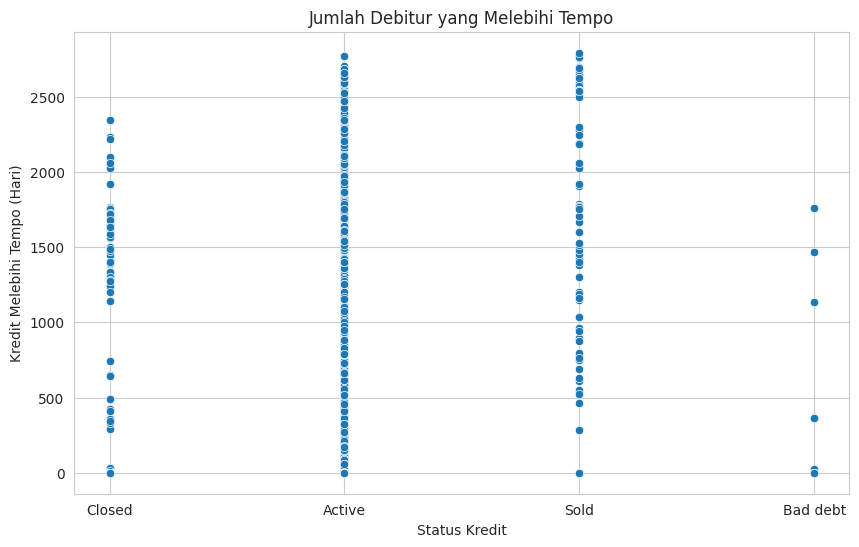

In [ ]:

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="CREDIT_ACTIVE", y="CREDIT_DAY_OVERDUE", color='#1f77b4')
ax.set_xlabel('Status Kredit')
ax.set_ylabel('Kredit Melebihi Tempo (Hari)')
ax.set_title('Jumlah Debitur yang Melebihi Tempo')
plt.show()

In [ ]:
# Menghitung jumlah data yang overdue
jumlah_overdue = 0
for i in bureau['CREDIT_DAY_OVERDUE']:
  if i > 0:
    jumlah_overdue += 1
print('Jumlah debitur yang melebihi jangka waktu adalah :',jumlah_overdue)

Jumlah debitur yang melebihi jangka waktu adalah : 4217


Insight :

- Masih banyak debitur yang dalam pembayarannya masih melebihi tempo yang ada

In [ ]:
urutan = 0
index_outlier = []
for i in bureau['DAYS_ENDDATE_FACT']:
  if i < -3000:
    index_outlier.append(urutan)
  urutan += 1
print(index_outlier)

[198346, 1550540]


In [ ]:
# Melihat baris data outlier berdasarkan index
bureau.iloc[index_outlier]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
198346       104463       6550986        Closed      currency 1        -2340   
1550542      394875       6638194        Closed      currency 1        -1021   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
198346                    0              -1836.0           -42023.0   
1550542                   0                 74.0            -3042.0   

         CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
198346                    0        225000.0                  0.0   
1550542                   0        711450.0                  0.0   

         AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
198346               225000.0                     0.0      Credit card   
1550542                   0.0                     0.0  Consumer credit   

         DAYS_CREDIT_UPDATE  
198346                -2196  
1550542                 -16

In [ ]:
# Menghapus baris yang outlier
bureau.drop(index_outlier, inplace=True)

Indight :

- Banyak debitur yang menyelesaikan waktu kredit sesuai dengan pengajuan kredit di awal.

**Analysis : CREDIT_ACTIVE vs AMT_CREDIT_SUM_OVERDUE**

Jumlah debitur yang masih memiliki tunggakan kredit =  4158


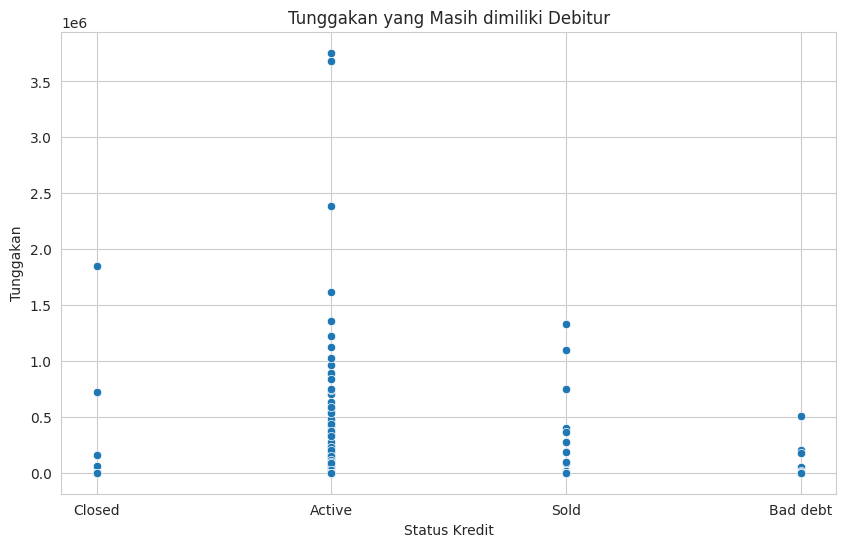

In [ ]:
# Melihat jumlah debitur yang memiliki tunggakan
total_kredit = 0
for i in bureau['AMT_CREDIT_SUM_OVERDUE']:
  if (i > 0):
    total_kredit += 1
  elif (i == None):
    total_kredit += 0
print('Jumlah debitur yang masih memiliki tunggakan kredit = ', total_kredit)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="CREDIT_ACTIVE", y="AMT_CREDIT_SUM_OVERDUE", color='#1f77b4')
ax.set_xlabel('Status Kredit')
ax.set_ylabel('Tunggakan')
ax.set_title('Tunggakan yang Masih dimiliki Debitur')
plt.show()

In [ ]:
urutan = 0
index_outlier = []
for i in bureau['AMT_CREDIT_SUM_DEBT']:
  if i > 75000000:
    index_outlier.append(urutan)
  urutan += 1
print(index_outlier)

[488410, 489960]


In [ ]:
# Melihat baris data outlier berdasarkan index
bureau.iloc[index_outlier]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
488411      363076       5089138        Active      currency 1        -1127   
489961      363076       5090928        Active      currency 1        -1006   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
488411                   0               -675.0       -1017.437148   
489961                   0               -675.0       -1017.437148   

        CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
488411                   0     164032200.0          164032200.0   
489961                   0     170100000.0          170100000.0   

        AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
488411                   NaN                     0.0  Consumer credit   
489961                   NaN                     0.0  Consumer credit   

        DAYS_CREDIT_UPDATE  
488411                -473  
489961                -473

In [ ]:
# Menghapus baris yang outlier
bureau.drop(index_outlier, inplace=True)

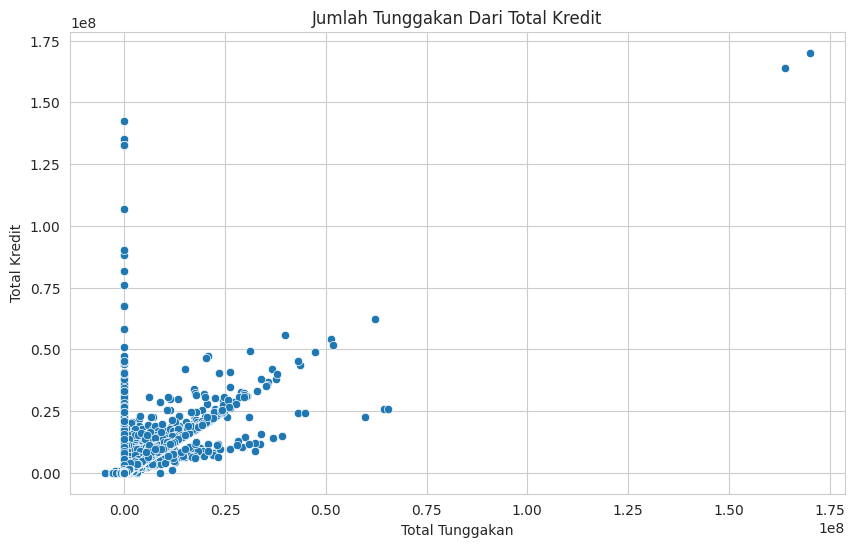

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="AMT_CREDIT_SUM_DEBT", y="AMT_CREDIT_SUM", color='#1f77b4')
ax.set_xlabel('Total Tunggakan')
ax.set_ylabel('Total Kredit')
ax.set_title('Jumlah Tunggakan Dari Total Kredit')
plt.show()

Insight :

- Jumlah debitur yang masih memiliki tunggakan masih banyak yaitu ada sekitar 4000 data

### Data Preparation

In [ ]:
# Mereset index pada dataset
bureau = bureau.reset_index(drop=True)

In [ ]:
bureau.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE            0
DAYS_ENDDATE_FACT              0
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                13
AMT_CREDIT_SUM_DEBT       257668
AMT_CREDIT_SUM_LIMIT      591779
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
dtype: int64

- AMT_CREDIT_SUM = AMT_CREDIT_SUM_DEBT + AMT_CREDIT_SUM_LIMIT
- Jika status kredit closed maka AMT_CREDIT_SUM_DEBT=0 && AMT_CREDIT_SUM_LIMIT=0
- Jika status closed maka DAYS_CREDIT_ENDDATE=DAYS_CREDIT_UPDATE

In [ ]:
# Mengatasi missing AMT_CREDIT_SUM dengan AMT_CREDIT_SUM_DEBT
bureau['AMT_CREDIT_SUM'].fillna(bureau['AMT_CREDIT_SUM_DEBT'], inplace=True)

bureau['AMT_CREDIT_SUM'].isnull().sum()

0

In [ ]:
# Mengatasi missing AMT_CREDIT_SUM_LIMIT
mask1 = (bureau['CREDIT_ACTIVE'] == 'Closed') & (bureau['AMT_CREDIT_SUM_LIMIT'].isnull()) & (bureau['AMT_CREDIT_SUM_DEBT'].isnull())
bureau.loc[mask1, ['AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT']] = 0

mask2 = (bureau['AMT_CREDIT_SUM_LIMIT'].isnull()) & (~bureau['AMT_CREDIT_SUM_DEBT'].isnull())
bureau.loc[mask2, 'AMT_CREDIT_SUM_LIMIT'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']

mask3 = bureau['AMT_CREDIT_SUM_LIMIT'].isnull()
bureau.loc[mask3, ['AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT']] = 0

bureau['AMT_CREDIT_SUM_LIMIT'].isnull().sum()

0

In [ ]:
# AMT_CREDIT_SUM_DEBT
bureau.loc[bureau['AMT_CREDIT_SUM'].isnull(), 'AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM_DEBT']

# Set AMT_CREDIT_SUM_LIMIT and AMT_CREDIT_SUM_DEBT to 0 for closed accounts with missing values
closed_mask = (bureau['CREDIT_ACTIVE'] == 'Closed')
missing_limit_mask = (bureau['AMT_CREDIT_SUM_LIMIT'].isnull()) & (bureau['AMT_CREDIT_SUM_DEBT'].isnull())
bureau.loc[closed_mask & missing_limit_mask, ['AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT']] = 0

# Calculate AMT_CREDIT_SUM_LIMIT for accounts with missing values
missing_limit_mask = (bureau['AMT_CREDIT_SUM_LIMIT'].isnull()) & (~bureau['AMT_CREDIT_SUM_DEBT'].isnull())
bureau.loc[missing_limit_mask, 'AMT_CREDIT_SUM_LIMIT'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']

# Set AMT_CREDIT_SUM_DEBT for missing values
bureau.loc[bureau['AMT_CREDIT_SUM_DEBT'].isnull(), 'AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_LIMIT']


bureau['AMT_CREDIT_SUM_DEBT'].isnull().sum()

0

In [ ]:
bureau.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64

### Feature Engineering

Literasi Feature Extration : [https://www.kaggle.com/c/home-credit-default-risk/discussion/57750](https://www.kaggle.com/c/home-credit-default-risk/discussion/57750)



In [ ]:
def koversi_kode_tipe_kredit(x):
    if x == 'Closed':
        y = 0
    elif x=='Active':
        y = 1
    else:
        y = 2    
    return y


def FE_bureau(bureau):
    # Durasi Kredit
    bureau['CREDIT_DURATION'] = -bureau['DAYS_CREDIT'] + bureau['DAYS_CREDIT_ENDDATE'] 
    # Sisa durasi kredit
    bureau['ENDDATE_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
    # Lama trakhir kali diupdate
    bureau['UPDATE_DIFF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_CREDIT_UPDATE']
    # Sisa hutang
    bureau['DEBT_CREDIT_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']
    # Sisa tunggakan
    bureau['CREDIT_OVERDUE_DIFF'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_OVERDUE']
    # Jumlah pinjaman masa lalu per pelanggan
    no_loans_per_customer = bureau[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby(by = \
                                                                    ['SK_ID_CURR'])['SK_ID_BUREAU'].count()
    no_loans_per_customer = no_loans_per_customer.reset_index().rename(columns={'SK_ID_BUREAU': 'CUSTOMER_LOAN_COUNT'})
    bureau = bureau.merge(no_loans_per_customer, on='SK_ID_CURR', how='left')
    # Jumlah jenis pinjaman masa lalu per nasabah
    credit_types_per_customer = bureau[['SK_ID_CURR','CREDIT_TYPE']].groupby(by=['SK_ID_CURR'])['CREDIT_TYPE'].nunique()
    credit_types_per_customer = credit_types_per_customer.reset_index().rename(columns={'CREDIT_TYPE':'CUSTOMER_CREDIT_TYPES'})
    bureau = bureau.merge(credit_types_per_customer, on='SK_ID_CURR',how='left')
    # Rata-rata jumlah pinjaman yang lalu per jenis pinjaman per nasabah
    bureau['AVG_LOAN_TYPE'] = bureau['CUSTOMER_LOAN_COUNT'] / bureau['CUSTOMER_CREDIT_TYPES']
    bureau['CREDIT_TYPE_CODE'] = bureau.apply(lambda x:\
                                        koversi_kode_tipe_kredit(x.CREDIT_ACTIVE), axis=1)
    customer_credit_code_mean = bureau[['SK_ID_CURR','CREDIT_TYPE_CODE']].groupby(by=['SK_ID_CURR'])['CREDIT_TYPE_CODE'].mean()
    customer_credit_code_mean.reset_index().rename(columns={'CREDIT_TYPE_CODE':'CUSTOMER_CREDIT_CODE_MEAN'})
    bureau = bureau.merge(customer_credit_code_mean, on='SK_ID_CURR', how='left')

    return bureau

In [ ]:
bureau = FE_bureau(bureau)

In [ ]:
bureau.shape

(1716422, 25)

## bureau_balance.csv


Ini adalah dataset catatan saldo bulanan kredit di Biro Kredit.

In [ ]:
# Melihat preview data
bureau_balance = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/bureau_balance.csv")
print("Jumlah baris : ",bureau_balance.shape[0])
print("Jumlah kolom : ",bureau_balance.shape[1])
bureau_balance.head()

Jumlah baris :  27299925
Jumlah kolom :  3


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [ ]:
# Melihat missing value & duplikat
print("Jumlah Duplikat : ",bureau_balance.duplicated().sum()) # duplikat
null_count = bureau_balance.isnull().sum() # jumlah missing value
null_percent = bureau_balance.isnull().mean() # presentase missing value

# merge pengecekan
null_df = pd.concat([null_count, null_percent], axis=1, keys=['Missing Values', '% Missing Values'])
null_df

Jumlah Duplikat :  0


Missing Values  % Missing Values
SK_ID_BUREAU                 0               0.0
MONTHS_BALANCE               0               0.0
STATUS                       0               0.0

### Exploratory Data Analysis

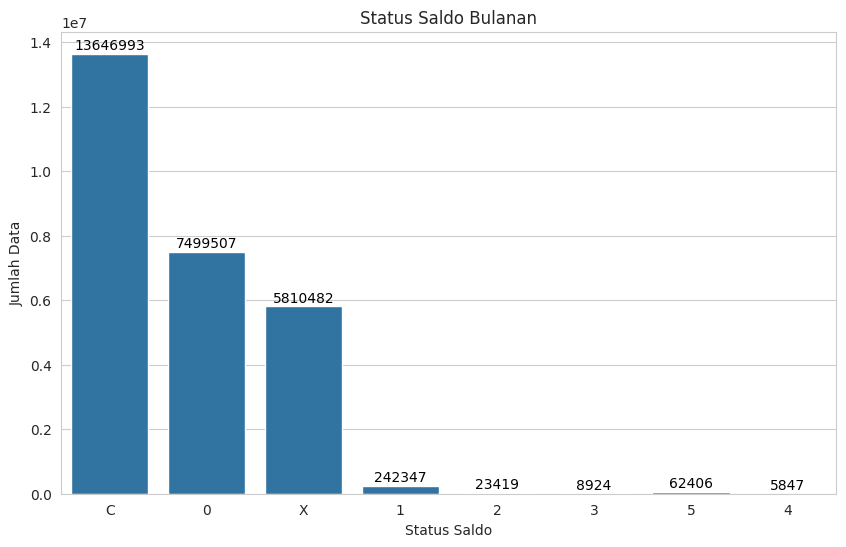

In [ ]:
# Melihat status saldo bulanan debitur
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='STATUS', data=bureau_balance, color='#1f77b4')
ax.set_xlabel('Status Saldo')
ax.set_ylabel('Jumlah Data')
ax.set_title('Status Saldo Bulanan')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

- C berarti tutup
- X berarti status tidak diketahui
- 0 berarti tidak ada DPD (Day Past Due=Jumlah hari yang tertunggak)
- 1 berarti maksimal dilakukan selama bulan antara 1-30
- 2 berarti DPD 31-60
- 3 berarti DPD 61-90
- 4 berarti DPD 91-120
- 5 berarti DPD 120+ atau dijual atau dihapuskan 

**Insight :**

- Sebagian besar pinjaman telah ditutup kemudian yang memiliki tunggakan 0 dan status debitur yang tidak diketahui

### Feature Engineering

Literasi aggregation : [https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

In [ ]:
# Melakukan aggregat terhadap data bureau balance(MONTHS_BALANCE :mean), (STATUS :mode)
from statistics import mode
MONTHS_BALANCE = bureau_balance.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE':'mean'})
MONTHS_BALANCE.reset_index(inplace=True)
STATUS = bureau_balance.groupby('SK_ID_BUREAU')['STATUS'].aggregate(lambda x : mode(x))

In [ ]:
# Merge hasil aggregat fitur MONTHS_BALANCE dan STATUS
bureau_balance = MONTHS_BALANCE.merge(STATUS, how='left', on='SK_ID_BUREAU')
bureau_balance

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0            5001709           -48.0      C
1            5001710           -41.0      C
2            5001711            -1.5      0
3            5001712            -9.0      0
4            5001713           -10.5      X
...              ...             ...    ...
817390       6842884           -23.5      C
817391       6842885           -11.5      5
817392       6842886           -16.0      C
817393       6842887           -18.0      C
817394       6842888           -30.5      C

[817395 rows x 3 columns]

### Merge Bureau and Bureau Balance

Literasi aggregation : [https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

In [ ]:
# Merge bureau(belum aggregat) & bureau_balance(selesai aggregat)
bureau_merge = bureau.merge(bureau_balance, how='left', on='SK_ID_BUREAU')
bureau_merge.drop(['SK_ID_BUREAU'], axis=1, inplace= True)

In [ ]:
bureau_merge

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354        Closed      currency 1         -497   
1            215354        Active      currency 1         -208   
2            215354        Active      currency 1         -203   
3            215354        Active      currency 1         -203   
4            215354        Active      currency 1         -629   
...             ...           ...             ...          ...   
1716417      259355        Active      currency 1          -44   
1716418      100044        Closed      currency 1        -2648   
1716419      100044        Closed      currency 1        -1809   
1716420      246829        Closed      currency 1        -1878   
1716421      246829        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0          -153.000000        -153.000000   
1                         0          1075.000000       -1017.437148   
2                         0           528.000000       -1017.437148   
3                         0           510.517362       -1017.437148   
4                         0          1197.000000       -1017.437148   
...                     ...                  ...                ...   
1716417                   0           -30.000000       -1017.437148   
1716418                   0         -2433.000000       -2493.000000   
1716419                   0         -1628.000000        -970.000000   
1716420                   0         -1513.000000       -1513.000000   
1716421                   0           510.517362        -387.000000   

         CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  ...  \
0                         0        91323.00                  0.0  ...   
1                         0       225000.00             171342.0  ...   
2                         0       464323.50                  0.0  ...   
3                         0        90000.00                  0.0  ...   
4                         0      2700000.00                  0.0  ...   
...                     ...             ...                  ...  ...   
1716417                   0        11250.00              11250.0  ...   
1716418                   0        38130.84                  0.0  ...   
1716419                   0        15570.00                  0.0  ...   
1716420                   0        36000.00                  0.0  ...   
1716421                   0        22500.00                  0.0  ...   

         UPDATE_DIFF  DEBT_CREDIT_DIFF CREDIT_OVERDUE_DIFF  \
0         -22.000000          91323.00            91323.00   
1        1095.000000          53658.00           225000.00   
2         544.000000         464323.50           464323.50   
3         526.517362          90000.00            90000.00   
4        1218.000000        2700000.00          2700000.00   
...              ...               ...                 ...   
1716417   -11.000000              0.00            11250.00   
1716418    60.000000          38130.84            38130.84   
1716419  -661.000000          15570.00            15570.00   
1716420    -5.000000          36000.00            36000.00   
1716421   897.517362          22500.00            22500.00   

         CUSTOMER_LOAN_COUNT  CUSTOMER_CREDIT_TYPES  AVG_LOAN_TYPE  \
0                         11                      3       3.666667   
1                         11                      3       3.666667   
2                         11                      3       3.666667   
3                         11                      3       3.666667   
4                         11                      3       3.666667   
...                      ...                    ...            ...   
1716417                    3                      2       1.500000   
1716418                   11                      2       5.500000   
1716419                   11                      2       5.500000   
1716420                   31             

In [ ]:
# Mengisi missing value MONTHS_BALANCE = 0 (0 dianggap sebagai data terbaru)
# Mengisi missing value STATUS = X (X bermakna statusnya tidak diketahui)
bureau_merge['MONTHS_BALANCE'].fillna(0, inplace=True)
bureau_merge['STATUS'].fillna('X', inplace=True)

In [ ]:
# Melihat kembali missing
bureau_merge.isnull().sum()

SK_ID_CURR                0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
CREDIT_DURATION           0
ENDDATE_DIFF              0
UPDATE_DIFF               0
DEBT_CREDIT_DIFF          0
CREDIT_OVERDUE_DIFF       0
CUSTOMER_LOAN_COUNT       0
CUSTOMER_CREDIT_TYPES     0
AVG_LOAN_TYPE             0
CREDIT_TYPE_CODE_x        0
CREDIT_TYPE_CODE_y        0
MONTHS_BALANCE            0
STATUS                    0
dtype: int64

- CREDIT_ACTIVE             = mode
- CREDIT_CURRENCY           = mode
- DAYS_CREDIT               = mean
- CREDIT_DAY_OVERDUE        = mean
- DAYS_CREDIT_ENDDATE       = mean
- DAYS_ENDDATE_FACT         = mean
- CNT_CREDIT_PROLONG        = mode
- AMT_CREDIT_SUM            = mean
- AMT_CREDIT_SUM_DEBT       = mean
- AMT_CREDIT_SUM_LIMIT      = mean
- AMT_CREDIT_SUM_OVERDUE    = mean
- CREDIT_TYPE               = mode
- DAYS_CREDIT_UPDATE        = mean
- CREDIT_DURATION           = mean
- ENDDATE_DIFF              = mean
- UPDATE_DIFF               = mean
- DEBT_CREDIT_DIFF          = mean
- CREDIT_OVERDUE_DIFF       = mean
- CUSTOMER_LOAN_COUNT       = mean
- CUSTOMER_CREDIT_TYPES     = mode
- AVG_LOAN_TYPE             = mean
- CREDIT_TYPE_CODE_x        = mode
- CREDIT_TYPE_CODE_y        = mode
- MONTHS_BALANCE            = mean
- STATUS                    = mode

In [ ]:
# Fitur pada bureau_merge yang akan diaggregasi dengan mean
columns_bureau_merge = {'DAYS_CREDIT' :'mean',
                        'CREDIT_DAY_OVERDUE' :'mean',
                        'DAYS_CREDIT_ENDDATE' :'mean',
                        'DAYS_ENDDATE_FACT' :'mean',
                        'AMT_CREDIT_SUM' :'mean',
                        'AMT_CREDIT_SUM_DEBT' :'mean',
                        'AMT_CREDIT_SUM_LIMIT' :'mean',
                        'AMT_CREDIT_SUM_OVERDUE' :'mean',
                        'DAYS_CREDIT_UPDATE' :'mean',
                        'CREDIT_DURATION' :'mean',
                        'ENDDATE_DIFF' :'mean',
                        'UPDATE_DIFF' :'mean',
                        'DEBT_CREDIT_DIFF' :'mean',
                        'CREDIT_OVERDUE_DIFF' :'mean',
                        'CUSTOMER_LOAN_COUNT' :'mean',
                        'AVG_LOAN_TYPE' :'mean',
                        'MONTHS_BALANCE' :'mean'}
# Fitur pada bureau_merge yang akan diaggregasi dengan mode
columns_bureau_merge_mode = ['CREDIT_ACTIVE', 
                        'CREDIT_CURRENCY',
                        'CNT_CREDIT_PROLONG',
                        'CREDIT_TYPE',
                        'CUSTOMER_CREDIT_TYPES',
                        'CREDIT_TYPE_CODE_x',
                        'CREDIT_TYPE_CODE_y',
                        'STATUS']

In [ ]:
# Aggregasi fitur dengan mean
bureau_full_mean = bureau_merge.groupby('SK_ID_CURR').agg({**columns_bureau_merge})
# Aggregasi fitur dengan mode
for col in columns_bureau_merge_mode:
  bureau_full_mode = bureau_merge.groupby('SK_ID_CURR')[col].aggregate(lambda x : mode(x))
  bureau_full = bureau_full_mean.merge(bureau_full_mode, how='left', on='SK_ID_CURR')
bureau_full.reset_index(inplace=True)

In [ ]:
bureau_full

SK_ID_CURR  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0           100001  -735.000000                 0.0            82.428571   
1           100002  -874.000000                 0.0          -134.120659   
2           100003 -1400.750000                 0.0          -544.500000   
3           100004  -867.000000                 0.0          -488.500000   
4           100005  -190.666667                 0.0           439.333333   
...            ...          ...                 ...                  ...   
305806      456249 -1667.076923                 0.0         -1098.267895   
305807      456250  -862.000000                 0.0          1288.333333   
305808      456253  -867.500000                 0.0           280.500000   
305809      456254 -1104.000000                 0.0          -859.000000   
305810      456255 -1089.454545                 0.0          3231.272727   

        DAYS_ENDDATE_FACT  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0             -907.758778    2.076236e+05         85240.928571   
1             -777.484287    1.081319e+05         30722.625000   
2            -1077.359287    2.543501e+05             0.000000   
3             -532.500000    9.451890e+04             0.000000   
4             -719.291432    2.190420e+05        189469.500000   
...                   ...             ...                  ...   
305806       -1338.033627    2.841430e+05         12543.923077   
305807        -931.624765    1.028820e+06        744013.365000   
305808        -905.718574    9.900000e+05        448958.250000   
305809        -859.000000    4.500000e+04             0.000000   
305810        -990.653249    3.456290e+05        139537.546364   

        AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
0                8294.785714                     0.0          -93.142857   
1                3998.570625                     0.0         -499.875000   
2              202500.000000                     0.0         -816.000000   
3                   0.000000                     0.0         -532.000000   
4                   0.000000                     0.0          -54.333333   
...                      ...                     ...                 ...   
305806          23774.538462                     0.0        -1064.538462   
305807          19422.795000                     0.0          -60.333333   
305808              0.000000                     0.0         -253.250000   
305809          45000.000000                     0.0         -401.000000   
305810          24257.454545                     0.0         -531.090909   

        CREDIT_DURATION  ENDDATE_DIFF  UPDATE_DIFF  DEBT_CREDIT_DIFF  \
0            817.428571    990.187349   175.571429     122382.642857   
1            739.879341    643.363628   365.754341      77409.320625   
2            856.250000    532.859287   271.500000     254350.125000   
3            378.500000     44.000000    43.500000      94518.900000   
4            630.000000   1158.624765   493.666667      29572.500000   
...                 ...           ...          ...               ...   
305806       568.809028    239.765732   -33.729434     271599.050769   
305807      2150.333333   2219.958099  1348.666667     284806.485000   
305808      1148.000000   1186.218574   533.750000     541041.750000   
305809       245.000000      0.000000  -458.000000      45000.000000   
305810      4320.727273   4221.925976  3762.363636     206091.499091   

        CREDIT_OVERDUE_DIFF  CUSTOMER_LOAN_COUNT  AVG_LOAN_TYPE  \
0              2.076236e+05                  7.0       7.000000   
1              1.081319e+05                  8.0       4.000000   
2              2.543501e+05                  4.0       2.000000   
3              9.451890e+04                  2.0       2.000000   
4              2.190420e+05                  3.0       1.500000   
...                     ...                  ...            ...   
305806         2.841430e+05                 13.0       

In [ ]:
# One Hot Encoding
def one_hot_encoding(data):
  cat_col = [category for category in data.columns if data[category].dtype == 'object']
  data = pd.get_dummies(data, columns= cat_col)
  return data

In [ ]:
#One Hot Encoding bureau_full
bureau_full = one_hot_encoding(bureau_full)

In [ ]:
bureau_full.shape

(305811, 25)

## POS_CASH_balance.csv




Dataset POS_CASH_balance adalah catatan saldo bulanan dari POS (point of sales) dan pinjaman tunai yang dimiliki pemohon dengan Home Credit. Beberapa fitur yang dapat digunakan dalam analisis churn prediction dari dataset POS_CASH_balance, antara lain:

1. SK_ID_CURR: ID unik untuk setiap pelanggan.
2. MONTHS_BALANCE: Jarak waktu dalam bulan antara bulan observasi dan bulan awal data diambil.
3. NAME_CONTRACT_STATUS: Status kontrak saat transaksi dilakukan.
4. SK_DPD: Keterlambatan hari pembayaran.
5. SK_DPD_DEF: Keterlambatan hari pembayaran tertunda.
6. CNT_INSTALMENT: Jumlah pembayaran yang dijadwalkan untuk kontrak.
7. CNT_INSTALMENT_FUTURE: Jumlah pembayaran yang belum jatuh tempo.
8. SK_ID_PREV : ID unik setiap transaksi.

In [ ]:
# Melihat preview data
POS_CASH_balance = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/POS_CASH_balance.csv")
print("Jumlah baris : ",POS_CASH_balance.shape[0])
print("Jumlah kolom : ",POS_CASH_balance.shape[1])
POS_CASH_balance.head()

Jumlah baris :  10001358
Jumlah kolom :  8


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [ ]:
# Melihat semua fitur 
print(POS_CASH_balance.columns.values)

['SK_ID_PREV' 'SK_ID_CURR' 'MONTHS_BALANCE' 'CNT_INSTALMENT'
 'CNT_INSTALMENT_FUTURE' 'NAME_CONTRACT_STATUS' 'SK_DPD' 'SK_DPD_DEF']


### **Data Cleaning & EDA**

In [ ]:
from prettytable import PrettyTable

# Define the table headers
table = PrettyTable()
table.field_names = ["Variable Name", "Missing Values", "Duplicates", "Outliers"]

# Loop through each column in the dataframe and add information to the table
for col in POS_CASH_balance.columns:
    # Count missing values
    missing_vals = POS_CASH_balance[col].isnull().sum()
    # Count duplicates
    duplicates = POS_CASH_balance.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if POS_CASH_balance[col].dtype in ['int64', 'float64']:
        mean = POS_CASH_balance[col].mean()
        std = POS_CASH_balance[col].std()
        outliers = ((POS_CASH_balance[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add a row to the table
    table.add_row([col, missing_vals, duplicates, outliers])

# Print the table
print(table)

+-----------------------+----------------+------------+----------+
|     Variable Name     | Missing Values | Duplicates | Outliers |
+-----------------------+----------------+------------+----------+
|       SK_ID_PREV      |       0        |     0      |    0     |
|       SK_ID_CURR      |       0        |     0      |    0     |
|     MONTHS_BALANCE    |       0        |     0      |    0     |
|     CNT_INSTALMENT    |     26071      |     0      |  214933  |
| CNT_INSTALMENT_FUTURE |     26087      |     0      |  257366  |
|  NAME_CONTRACT_STATUS |       0        |     0      |   N/A    |
|         SK_DPD        |       0        |     0      |  83290   |
|       SK_DPD_DEF      |       0        |     0      |   4636   |
+-----------------------+----------------+------------+----------+


In [ ]:
# isi missing value dengan modus 

modus = POS_CASH_balance['CNT_INSTALMENT'].mode()[0]
modus2 = POS_CASH_balance['CNT_INSTALMENT_FUTURE'].mode()[0]

POS_CASH_balance['CNT_INSTALMENT'] = POS_CASH_balance['CNT_INSTALMENT'].fillna(modus)
POS_CASH_balance['CNT_INSTALMENT_FUTURE'] = POS_CASH_balance['CNT_INSTALMENT_FUTURE'].fillna(modus2)

In [ ]:
# cek kembali 
POS_CASH_balance.isna().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

In [ ]:
# Hapus outliers
Q1 = POS_CASH_balance.quantile(0.25)
Q3 = POS_CASH_balance.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (POS_CASH_balance < (Q1 - 1.5 * IQR)) | (POS_CASH_balance > (Q3 + 1.5 * IQR))
POS_CASH_balance = POS_CASH_balance[~outliers.any(axis=1)]

<ipython-input-8-d0d217604e11>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = POS_CASH_balance.quantile(0.25)
<ipython-input-8-d0d217604e11>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = POS_CASH_balance.quantile(0.75)
<ipython-input-8-d0d217604e11>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (POS_CASH_balance < (Q1 - 1.5 * IQR)) | (POS_CASH_balance > (Q3 + 1.5 * IQR))


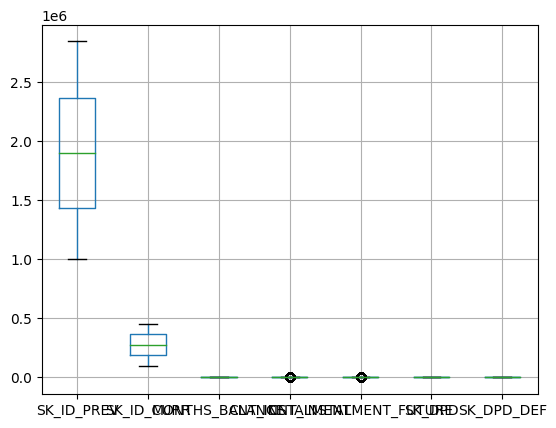

In [ ]:
POS_CASH_balance.boxplot()
plt.show()

In [ ]:
# statistik deskriptif
POS_CASH_balance.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    1.000136e+07   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.707638e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.198222e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           1.000136e+07  1.000136e+07  1.000136e+07  
mean            1.045649e+01  1.160693e+01  6.544684e-01  
std             1.110744e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

In [ ]:
# korelasi 
POS_CASH_balance.corr().style.background_gradient(cmap="Greens")

<ipython-input-12-f2978bf634f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  POS_CASH_balance.corr().style.background_gradient(cmap="Greens")


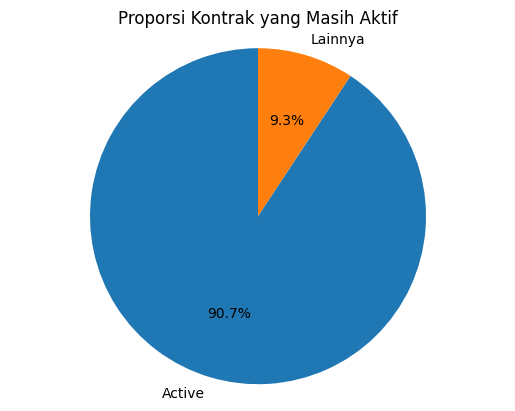

In [ ]:
# menghitung jumlah kontrak yang masih aktif
active_cnt = POS_CASH_balance['NAME_CONTRACT_STATUS'].value_counts()['Active']

# membuat pie chart untuk menampilkan proporsi status kontrak yang masih aktif
labels = ['Active', 'Lainnya']
sizes = [active_cnt, POS_CASH_balance.shape[0] - active_cnt]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporsi Kontrak yang Masih Aktif')
plt.show()

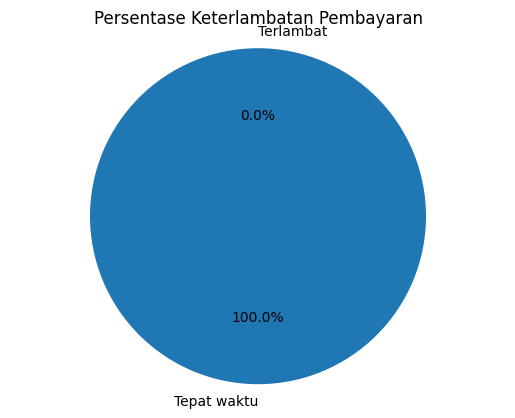

In [ ]:
# menghitung persentase keterlambatan pembayaran
delayed_pct = len(POS_CASH_balance[POS_CASH_balance['SK_DPD'] > 0]) / len(POS_CASH_balance) * 100

# membuat pie chart untuk menampilkan persentase keterlambatan pembayaran
labels = ['Tepat waktu', 'Terlambat']
sizes = [100-delayed_pct, delayed_pct]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Persentase Keterlambatan Pembayaran')
plt.show()

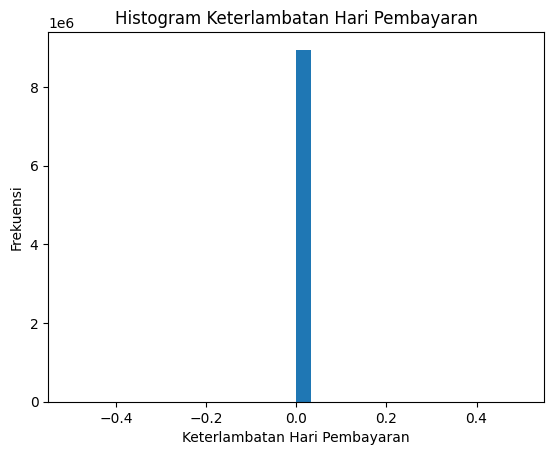

In [ ]:
# Visualisasi persebaran keterlambatan hari pembayaran menggunakan histogram

plt.hist(POS_CASH_balance['SK_DPD'], bins=30)
plt.xlabel('Keterlambatan Hari Pembayaran')
plt.ylabel('Frekuensi')
plt.title('Histogram Keterlambatan Hari Pembayaran')
plt.show()


### **Feature Engineering**

#### One Hot Encoding

In [ ]:
POS_CASH_balance['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Signed', 'Completed', 'Returned to the store', 'Demand',
       'Approved', 'Canceled', 'XNA', 'Amortized debt'], dtype=object)

In [ ]:
POS_CASH_balance['NAME_CONTRACT_STATUS'].nunique()

9

In [ ]:
POS_Status = pd.get_dummies(POS_CASH_balance["NAME_CONTRACT_STATUS"])

In [ ]:
POS_CB = POS_CASH_balance.drop('NAME_CONTRACT_STATUS',axis=1)

In [ ]:
app = [POS_CB, POS_Status]

In [ ]:
POS_CB_Status = pd.concat(app,axis=1)

In [ ]:
POS_CB_Status.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
2      1784872      397406             -32            12.0   
5      2207092      342166             -32            12.0   
8      1220500      112740             -31            12.0   
9      2371489      274851             -32            24.0   
10     2328294      287361             -32            12.0   

    CNT_INSTALMENT_FUTURE  SK_DPD  SK_DPD_DEF  Active  Amortized debt  \
2                     9.0       0           0       1               0   
5                    12.0       0           0       1               0   
8                    12.0       0           0       1               0   
9                    16.0       0           0       1               0   
10                   12.0       0           0       1               0   

    Approved  Canceled  Completed  Demand  Returned to the store  Signed  XNA  
2          0         0          0       0                      0       0    0  
5          0         0          0       0                      0       0    0  
8          0         0          0       0                      0       0    0  
9          0         0          0       0                      0       0    0  
10         0         0          0       0                      0       0    0

###Agregating

In [ ]:
def agregat(POS_CB_Status):
    aggregated_data = pd.DataFrame()  # DataFrame kosong untuk menyimpan hasil aggregasi

    # Filter data hanya untuk status kontrak
    POS_CB_Status = POS_CB_Status[POS_CB_Status['Active'] == 1]

    # Agregat kolom MONTHS_BALANCE dengan sum
    aggregated_data['MONTHS_BALANCE_SUM'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['MONTHS_BALANCE'].sum()

    # Agregat kolom CNT_INSTALMENT dengan mean
    aggregated_data['CNT_INSTALMENT_MEAN'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['CNT_INSTALMENT'].mean()

    # Agregat kolom CNT_INSTALMENT_FUTURE dengan mean
    aggregated_data['CNT_INSTALMENT_FUTURE_MEAN'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['CNT_INSTALMENT_FUTURE'].mean()

     # Agregat kolom SK_DPD dengan mean
    aggregated_data['SK_DPD_MAX'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['SK_DPD'].max()

    # Agregat kolom SK_DPD_DEF dengan sum
    aggregated_data['SK_DPD_DEF_MAX'] = POS_CB_Status.groupby(['SK_ID_PREV', 'Active'])['SK_DPD_DEF'].max()

    aggregated_data.reset_index(inplace=True)

    return aggregated_data

In [ ]:
POS_StatusFinal = agregat(POS_CB_Status)
POS_StatusFinal.head()

SK_ID_PREV  Active  MONTHS_BALANCE_sum  CNT_INSTALMENT_mean  \
0     1000001       1                 -19                 12.0   
1     1000002       1                -210                  5.5   
2     1000003       1                 -10                 12.0   
3     1000004       1                -182                 10.0   
4     1000005       1                -515                 10.0   

   CNT_INSTALMENT_FUTURE_mean  SK_DPD_max  SK_DPD_DEF_max  
0                        11.5           0               0  
1                         2.5           0               0  
2                        10.5           0               0  
3                         7.0           0               0  
4                         5.5           0               0

In [ ]:
POS_StatusFinal.shape

(891050, 7)

### Persiapan Penggabungan Feature Pos dan Credit yang sama

In [ ]:
POS_StatusFinal.rename(columns={'Active': 'NAME_CONTRACT_STATUS_Active'}, inplace=True)

In [ ]:
#Membuat dataframe baru yang berisikan dengan feature pos yang sama dengan credit
A= POS_StatusFinal['SK_ID_PREV']
B= POS_StatusFinal['NAME_CONTRACT_STATUS_Active']
C= POS_StatusFinal['MONTHS_BALANCE_SUM']
D= POS_StatusFinal['SK_DPD_MAX']
E= POS_StatusFinal['SK_DPD_DEF_MAX']
POS_1= [A,B,C,D,E]
POS= pd.concat(POS_1,axis=1)
POS

In [ ]:
#Buat dataframe pos baru dengan mendrop feature yang tidak sama dengan credit
pos= POS_StatusFinal.drop(['NAME_CONTRACT_STATUS_Active','MONTHS_BALANCE_SUM','SK_DPD_MAX','SK_DPD_DEF_MAX'], axis=1)
pos

##**credit_card_balance.csv**

credit_card_balance berisi informasi tentang saldo kartu kredit pelanggan Home Credit. Dataset ini meliputi data saldo bulanan dan transaksi kartu kredit yang dilaporkan oleh pelanggan. 

###**Import Data**

In [ ]:
credit_card = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/credit_card_balance.csv")
print('Number of data points : ', credit_card.shape[0])
print('Number of features : ', credit_card.shape[1])
credit_card.head()

Number of data points :  3840312
Number of features :  23


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

###**EDA**

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
# Identify the numerical and categorical columns
num_cols = credit_card.select_dtypes(include=['int64', 'float64']).columns
cat_cols = credit_card.select_dtypes(include=['object', 'category']).columns

# Create datasets with numerical and categorical columns
num_credit = credit_card[num_cols]
cat_credit = credit_card[cat_cols]

**Numeric Variables**

In [ ]:
num_credit.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
count              3.090496e+06             3.535076e+06         3.072324e+06   
mean               2.968805e+03             3.540204e+03         1.028054e+04   
std                2.079689e+04             5.600154e+03         3.607808e+04   
min                0.000000e+00             0.000000e+00         0.000000e+00   
25%                0.000000e+00             0.000000e+00         1.523700e+02   
50%                0.000000e+00             0.000000e+00         2.702700e+03   
75%                0.000000e+00             6.633911e+03         9.000000e+03   
max                2.239274e+06             2.028820e+05         4.289207e+06   

       AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
count               3.840312e+06              3.840312e+06   3.840312e+06   
mean                7.588857e+03              5.596588e+04   5.808881e+04   
std                 3.200599e+04              1.025336e+05   1.059654e+05   
min                 0.000000e+00             -4.233058e+05  -4.202502e+05   
25%                 0.000000e+00              0.000000e+00   0.000000e+00   
50%                 0.000000e+00              0.000000e+00   0.000000e+00   
75%                 6.750000e+03              8.535924e+04   8.889949e+04   
max                 4.278316e+06              1.472317e+06   1.493338e+06   

       AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count          3.840312e+06              3.090496e+06          3.840312e+06   
mean           5.809829e+04              3.094490e-01          7.031439e-01   
std            1.059718e+05              1.100401e+00          3.190347e+00   
min           -4.202502e+05              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            8.891451e+04              0.000000e+00          0.000000e+00   
max            1.493338e+06              5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std    

In [ ]:
num_credit.cov()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  \
SK_ID_PREV                  2.877995e+11  2.602243e+08    52504.291527   
SK_ID_CURR                  2.602243e+08  1.054821e+10     4645.712242   
MONTHS_BALANCE              5.250429e+04  4.645712e+03      711.168943   
AMT_BALANCE                 2.877783e+08  3.831917e+07    41270.378914   
AMT_CREDIT_LIMIT_ACTUAL     5.874432e+08  1.016165e+08   880371.467108   
AMT_DRAWINGS_ATM_CURRENT    6.580699e+07  2.357307e+06    27862.986547   
AMT_DRAWINGS_CURRENT        4.763653e+07  2.460829e+06    59144.979714   
AMT_DRAWINGS_OTHER_CURRENT -7.054851e+05  8.065177e+05       89.008890   
AMT_DRAWINGS_POS_CURRENT    1.922155e+07 -1.677998e+06    65906.831692   
AMT_INST_MIN_REGULARITY     1.941440e+07  1.897762e+06   -12968.510189   
AMT_PAYMENT_CURRENT         6.726084e+07  4.688846e+05    74464.574385   
AMT_PAYMENT_TOTAL_CURRENT   2.817493e+07  2.576692e+06    30397.145795   
AMT_RECEIVABLE_PRINCIPAL    2.827578e+08  3.779807e+07    44477.487280   
AMT_RECIVABLE               2.862266e+08  3.828880e+07    37223.231266   
AMT_TOTAL_RECEIVABLE        2.860949e+08  3.835342e+07    36976.648727   
CNT_DRAWINGS_ATM_CURRENT    1.666954e+03  2.351093e+02        0.074861   
CNT_DRAWINGS_CURRENT        6.275957e+02  8.696325e+02        9.641253   
CNT_DRAWINGS_OTHER_CURRENT -6.264499e+01 -1.106668e+00       -0.058059   
CNT_DRAWINGS_POS_CURRENT    1.408150e+03  7.097751e+02       13.925932   
CNT_INSTALMENT_MATURE_CUM  -7.768562e+04 -1.196206e+03       -4.572890   
SK_DPD                     -9.344048e+04 -9.636575e+03      102.548672   
SK_DPD_DEF                  2.273396e+04  3.351471e+03        0.950326   

                             AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
SK_ID_PREV                  2.877783e+08             5.874432e+08   
SK_ID_CURR                  3.831917e+07             1.016165e+08   
MONTHS_BALANCE              4.127038e+04             8.803715e+05   
AMT_BALANCE                 1.130118e+10             8.591727e+09   
AMT_CREDIT_LIMIT_ACTUAL     8.591727e+09             2.727310e+10   
AMT_DRAWINGS_ATM_CURRENT    9.131732e+08             1.061778e+09   
AMT_DRAWINGS_CURRENT        1.212427e+09             1.470569e+09   
AMT_DRAWINGS_OTHER_CURRENT  6.117108e+07             6.312401e+07   
AMT_DRAWINGS_POS_CURRENT    4.020819e+08             7.435834e+08   
AMT_INST_MIN_REGULARITY     5.477628e+08             4.367706e+08   
AMT_PAYMENT_CURRENT         5.907952e+08             1.660602e+09   
AMT_PAYMENT_TOTAL_CURRENT   5.149608e+08             1.197571e+09   
AMT_RECEIVABLE_PRINCIPAL    1.089700e+10             8.304698e+09   
AMT_RECIVABLE               1.126393e+10             8.551076e+09   
AMT_TOTAL_RECEIVABLE        1.126439e+10             8.550853e+09   
CNT_DRAWINGS_ATM_CURRENT    3.891760e+04             3.713956e+04   
CNT_DRAWINGS_CURRENT        8.790403e+04             1.076068e+05   
CNT_DRAWINGS_OTHER_CURRENT  4.390367e+02             3.778716e+02   
CNT_DRAWINGS_POS_CURRENT    5.751578e+04             1.000351e+05   
CNT_INSTALMENT_MATURE_CUM   1.095474e+04            -5.259555e+05   
SK_DPD                     -4.871051e+05            -6.247045e+05   
SK_DPD_DEF                  2.970578e+04            -7.931924e+03   

                            AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
SK_ID_PREV                              6.580699e+07          4.763653e+07   
SK_ID_CURR                              2.357307e+06          2.460829e+06   
MONTHS_BALANCE                          2.786299e+04          5.914498e+04   
AMT_BALANCE                             9.131732e+08          1.212427e+09   
AMT_CREDIT_LIMIT_ACTUAL                 1.061778e+09          1.470569e+09   
AMT_DRAWINGS_ATM_CURRENT                7.966895e+08          8.471474e+08   
AMT_DRAWINGS_CURRENT                    8.471474e+08          1.145557e+09   
AMT_DRAWINGS_OTHER_CURRENT              4.143710e+06          7.269400e+07   
AMT_DRAWINGS_POS_CURRENT             

In [ ]:
# How many numeric variables are in the data set?
print('Number of numerical variables: ', len(num_cols))
num_cols

Number of numerical variables:  22


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

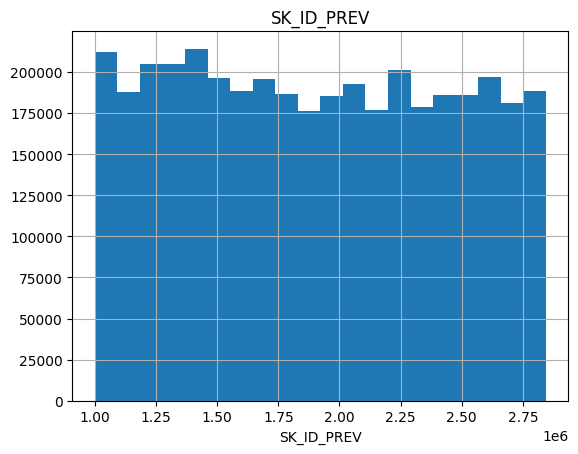

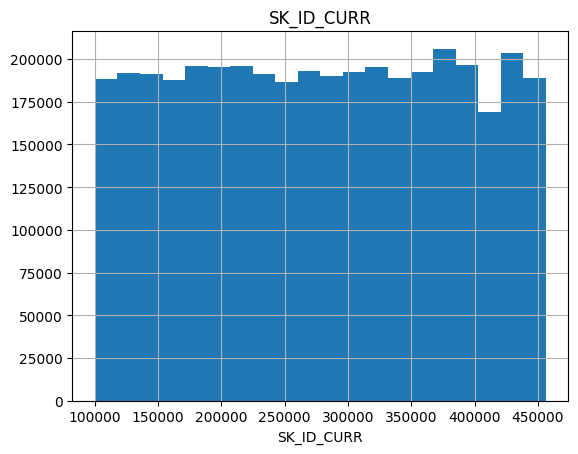

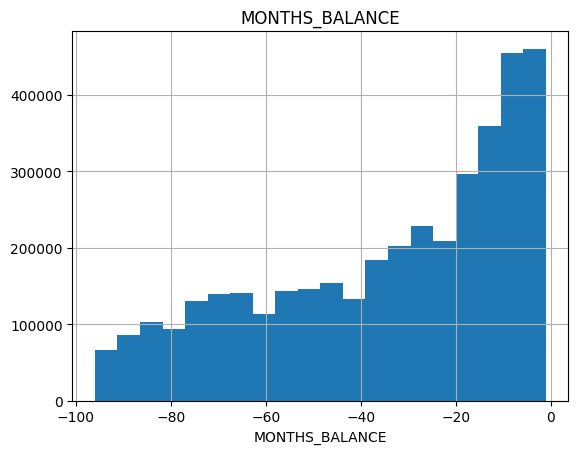

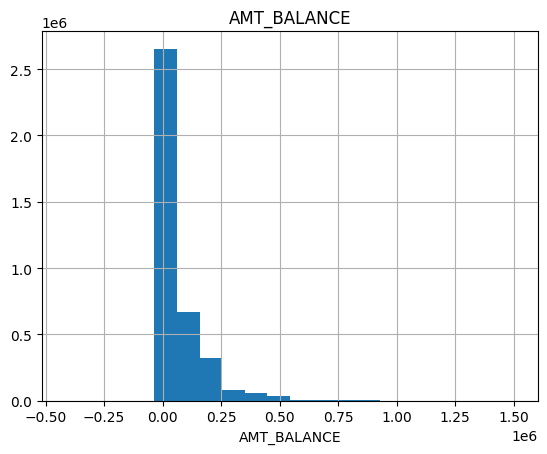

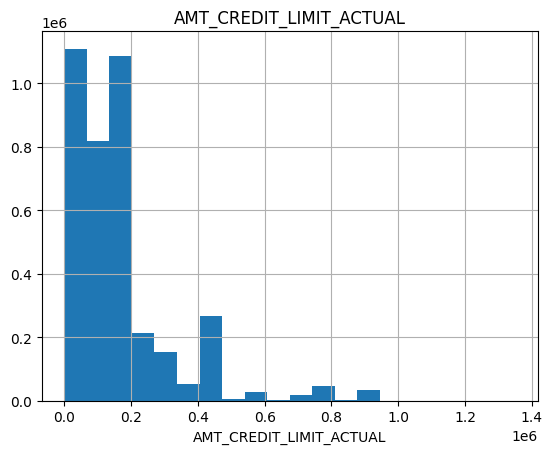

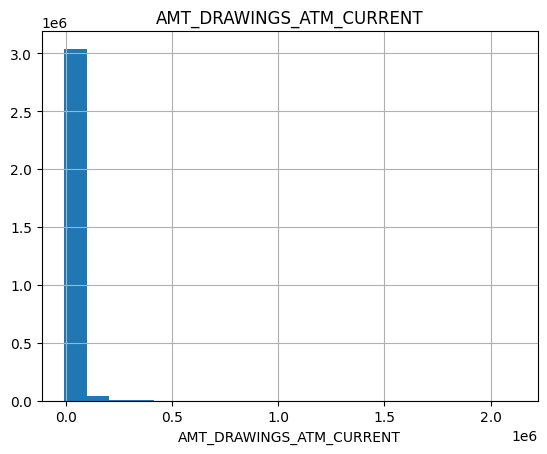

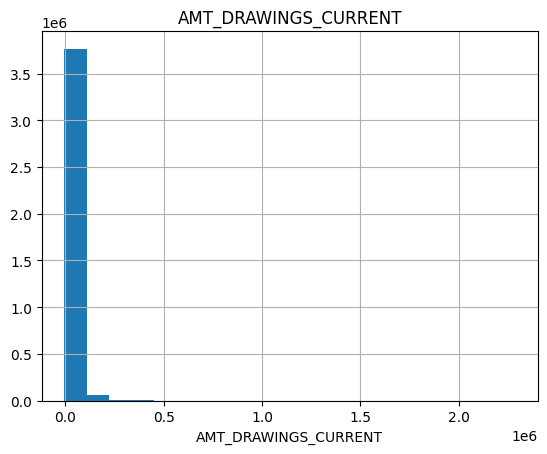

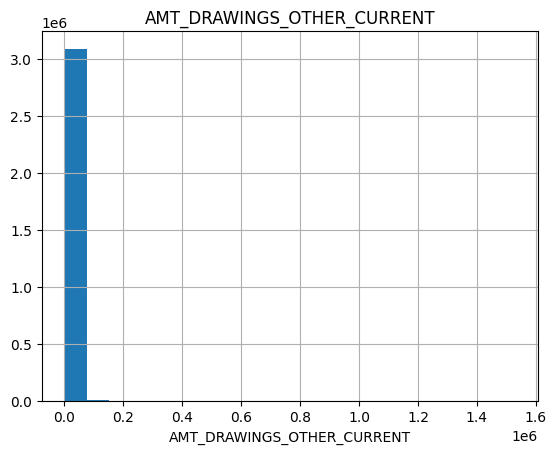

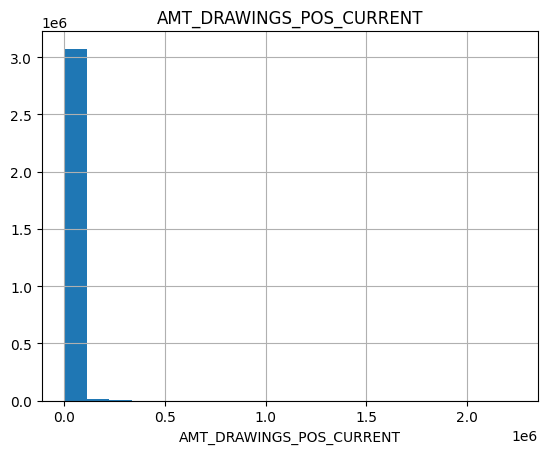

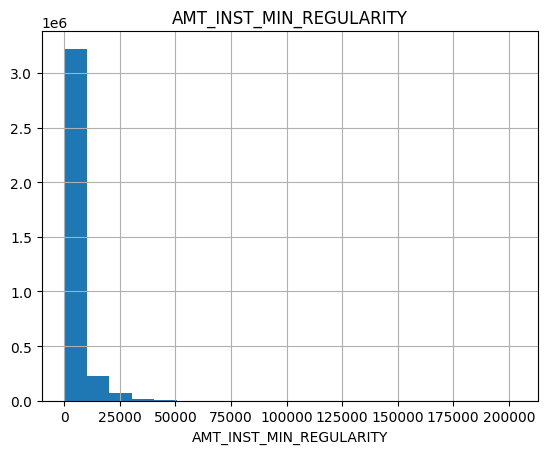

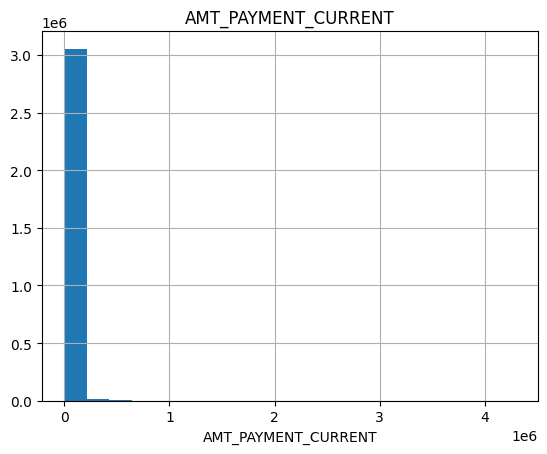

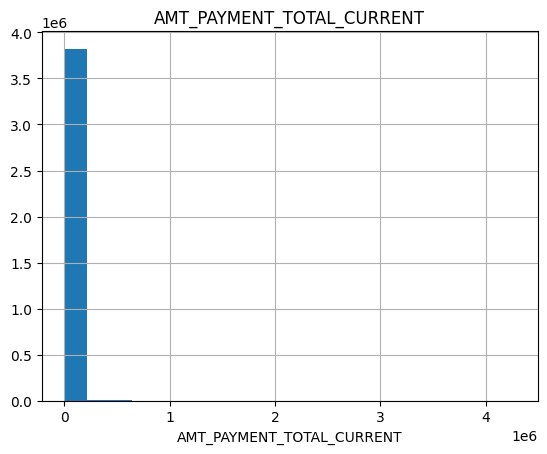

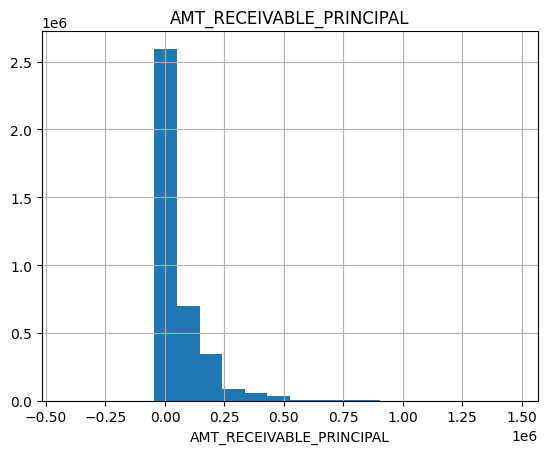

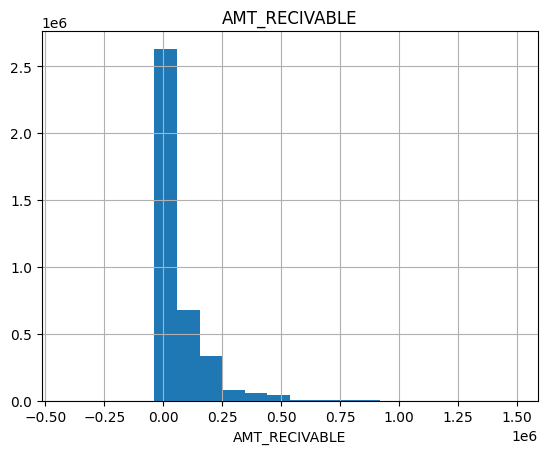

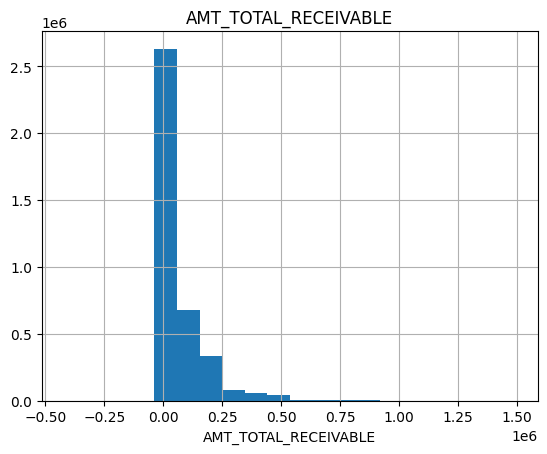

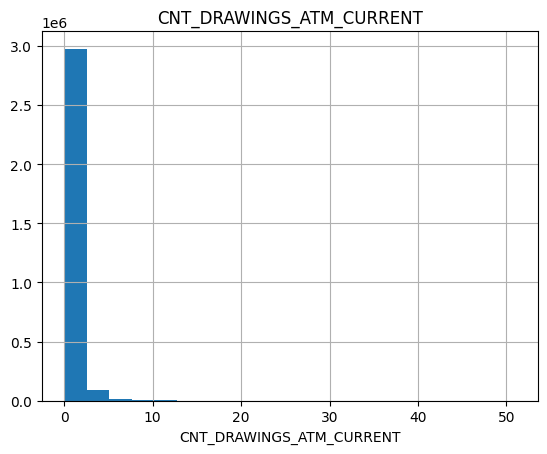

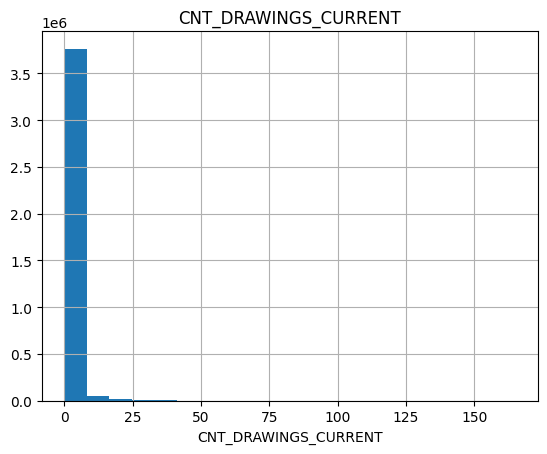

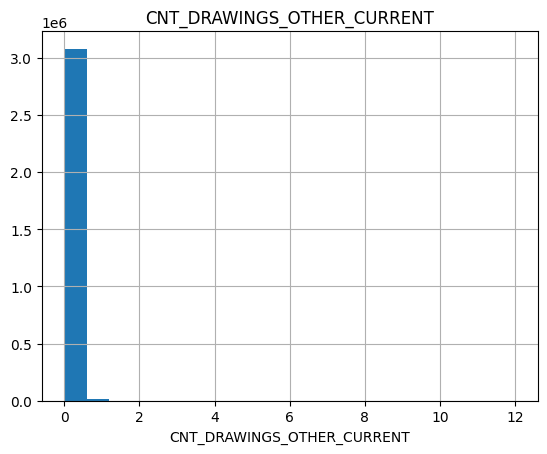

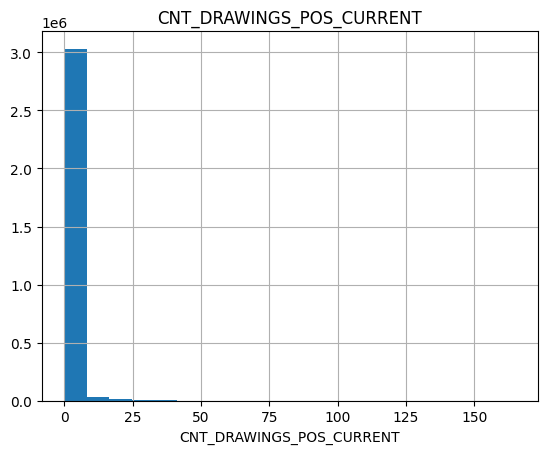

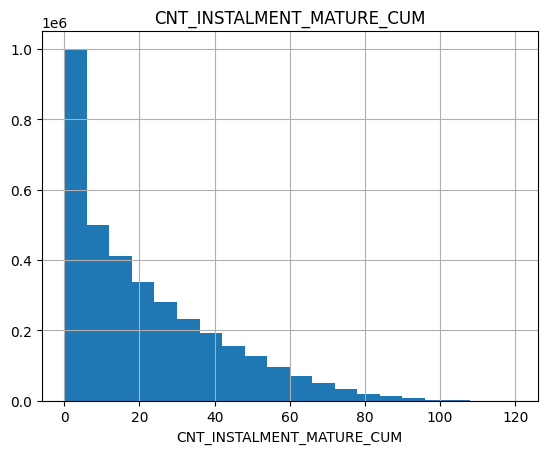

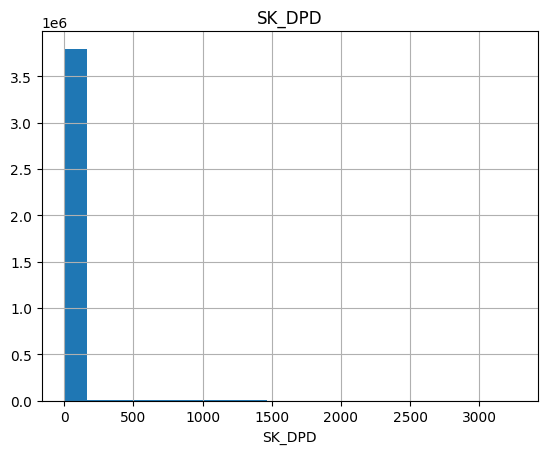

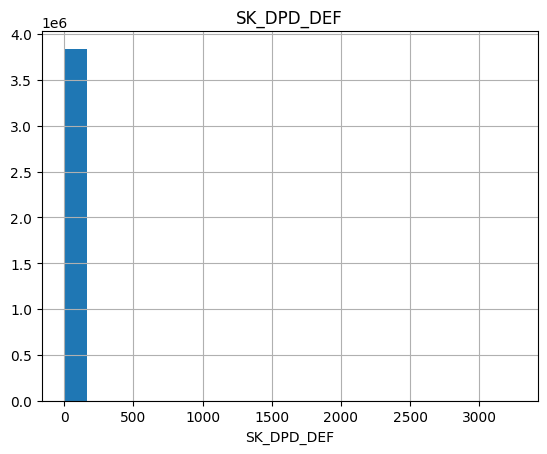

In [ ]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
hist_for_nums(credit_card, num_cols)

In [ ]:
num_credit.corr()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  \
SK_ID_PREV                    1.000000    0.004723        0.003670   
SK_ID_CURR                    0.004723    1.000000        0.001696   
MONTHS_BALANCE                0.003670    0.001696        1.000000   
AMT_BALANCE                   0.005046    0.003510        0.014558   
AMT_CREDIT_LIMIT_ACTUAL       0.006631    0.005991        0.199900   
AMT_DRAWINGS_ATM_CURRENT      0.004342    0.000814        0.036802   
AMT_DRAWINGS_CURRENT          0.002624    0.000708        0.065527   
AMT_DRAWINGS_OTHER_CURRENT   -0.000160    0.000958        0.000405   
AMT_DRAWINGS_POS_CURRENT      0.001721   -0.000786        0.118146   
AMT_INST_MIN_REGULARITY       0.006460    0.003300       -0.087529   
AMT_PAYMENT_CURRENT           0.003472    0.000127        0.076355   
AMT_PAYMENT_TOTAL_CURRENT     0.001641    0.000784        0.035614   
AMT_RECEIVABLE_PRINCIPAL      0.005140    0.003589        0.016266   
AMT_RECIVABLE                 0.005035    0.003518        0.013172   
AMT_TOTAL_RECEIVABLE          0.005032    0.003524        0.013084   
CNT_DRAWINGS_ATM_CURRENT      0.002821    0.002082        0.002536   
CNT_DRAWINGS_CURRENT          0.000367    0.002654        0.113321   
CNT_DRAWINGS_OTHER_CURRENT   -0.001412   -0.000131       -0.026192   
CNT_DRAWINGS_POS_CURRENT      0.000809    0.002135        0.160207   
CNT_INSTALMENT_MATURE_CUM    -0.007219   -0.000581       -0.008620   
SK_DPD                       -0.001786   -0.000962        0.039434   
SK_DPD_DEF                    0.001973    0.001519        0.001659   

                            AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
SK_ID_PREV                     0.005046                 0.006631   
SK_ID_CURR                     0.003510                 0.005991   
MONTHS_BALANCE                 0.014558                 0.199900   
AMT_BALANCE                    1.000000                 0.489386   
AMT_CREDIT_LIMIT_ACTUAL        0.489386                 1.000000   
AMT_DRAWINGS_ATM_CURRENT       0.283551                 0.247219   
AMT_DRAWINGS_CURRENT           0.336965                 0.263093   
AMT_DRAWINGS_OTHER_CURRENT     0.065366                 0.050579   
AMT_DRAWINGS_POS_CURRENT       0.169449                 0.234976   
AMT_INST_MIN_REGULARITY        0.896728                 0.467620   
AMT_PAYMENT_CURRENT            0.143934                 0.308294   
AMT_PAYMENT_TOTAL_CURRENT      0.151349                 0.226570   
AMT_RECEIVABLE_PRINCIPAL       0.999720                 0.490445   
AMT_RECIVABLE                  0.999917                 0.488641   
AMT_TOTAL_RECEIVABLE           0.999897                 0.488598   
CNT_DRAWINGS_ATM_CURRENT       0.309968                 0.221808   
CNT_DRAWINGS_CURRENT           0.259184                 0.204237   
CNT_DRAWINGS_OTHER_CURRENT     0.046563                 0.030051   
CNT_DRAWINGS_POS_CURRENT       0.155553                 0.202868   
CNT_INSTALMENT_MATURE_CUM      0.005009                -0.157269   
SK_DPD                        -0.046988                -0.038791   
SK_DPD_DEF                     0.013009                -0.002236   

                            AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
SK_ID_PREV                                  0.004342              0.002624   
SK_ID_CURR                                  0.000814              0.000708   
MONTHS_BALANCE                              0.036802              0.065527   
AMT_BALANCE                                 0.283551              0.336965   
AMT_CREDIT_LIMIT_ACTUAL                     0.247219              0.263093   
AMT_DRAWINGS_ATM_CURRENT                    1.000000              0.800190   
AMT_DRAWINGS_CURRENT                        0.800190              1.000000   
AMT_DRAWINGS_OTHER_CURRENT                  0.017899              0.236297   
AMT_DRAWINGS_POS_CURRENT                    0.078971              0.615591   
AMT_INST_MIN_REGULARITY                     0.094824              0.1244

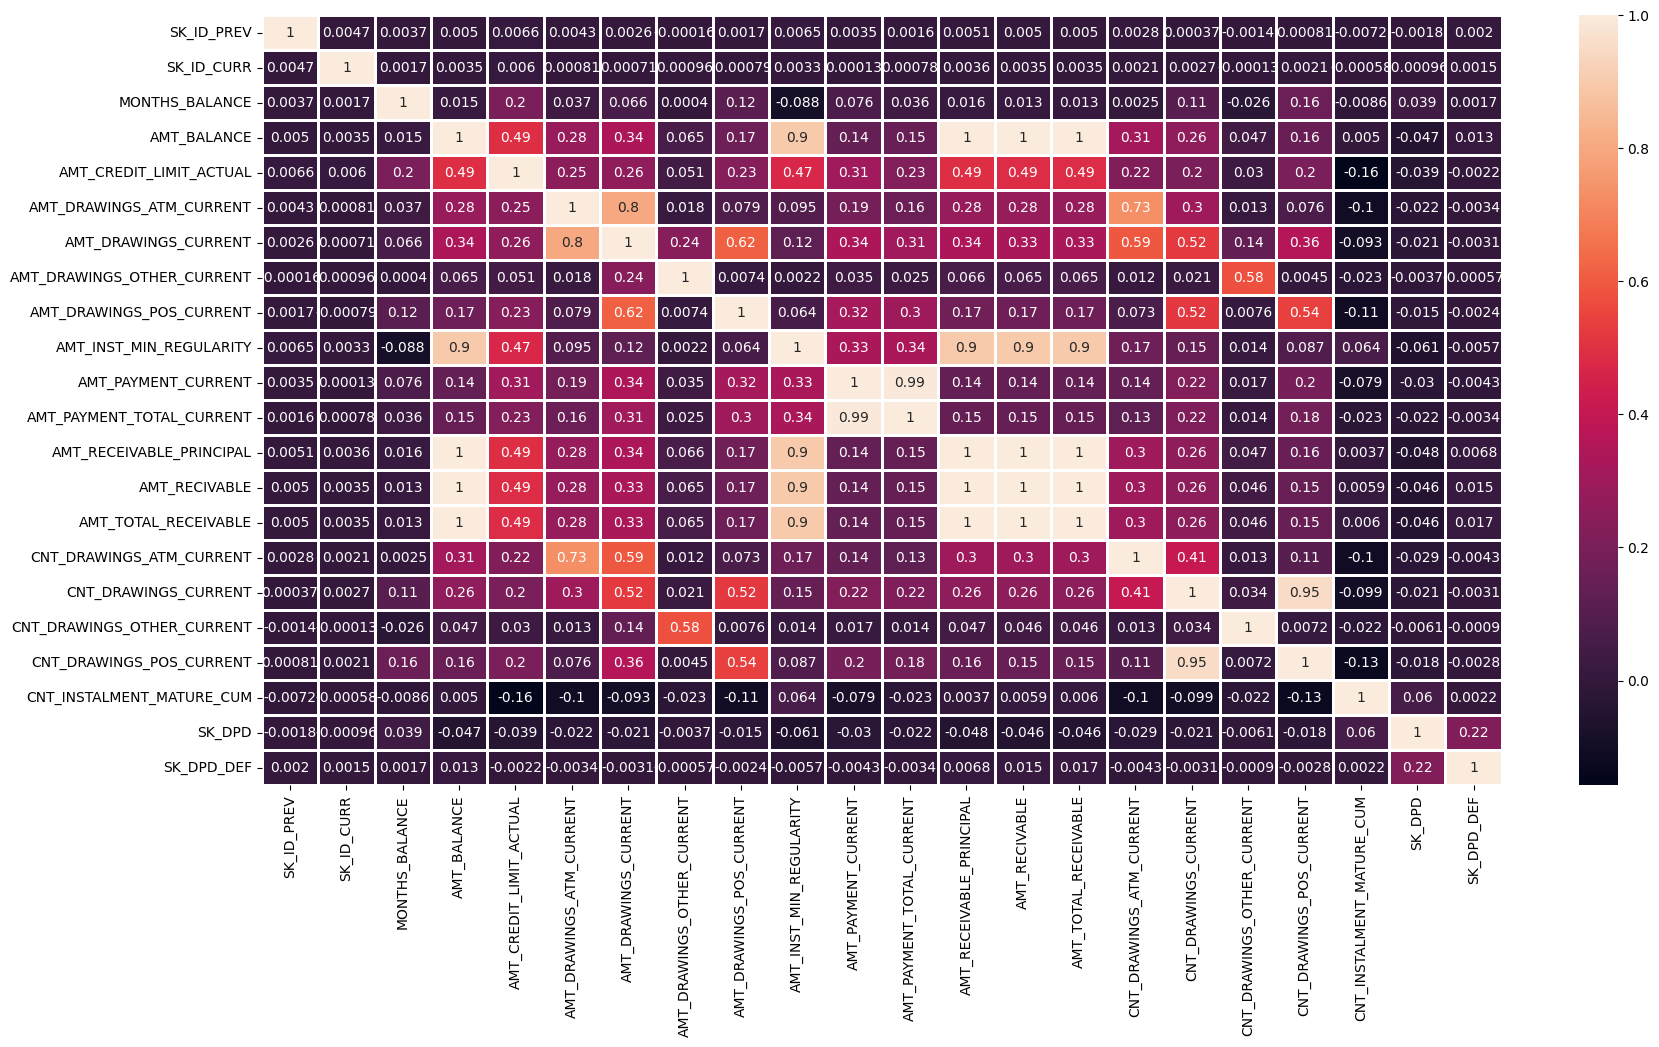

In [ ]:
# heatmap
plt.figure(figsize=(20,10)) 
sns.heatmap(num_credit.corr(), annot=True, linewidths=1, linecolor="white")
plt.show()

**Categorical Variables**

In [ ]:
# How many categorical variables are in the data set?
print('Number of categoricals variables: ', len(cat_cols))
cat_cols

Number of categoricals variables:  1


Index(['NAME_CONTRACT_STATUS'], dtype='object')

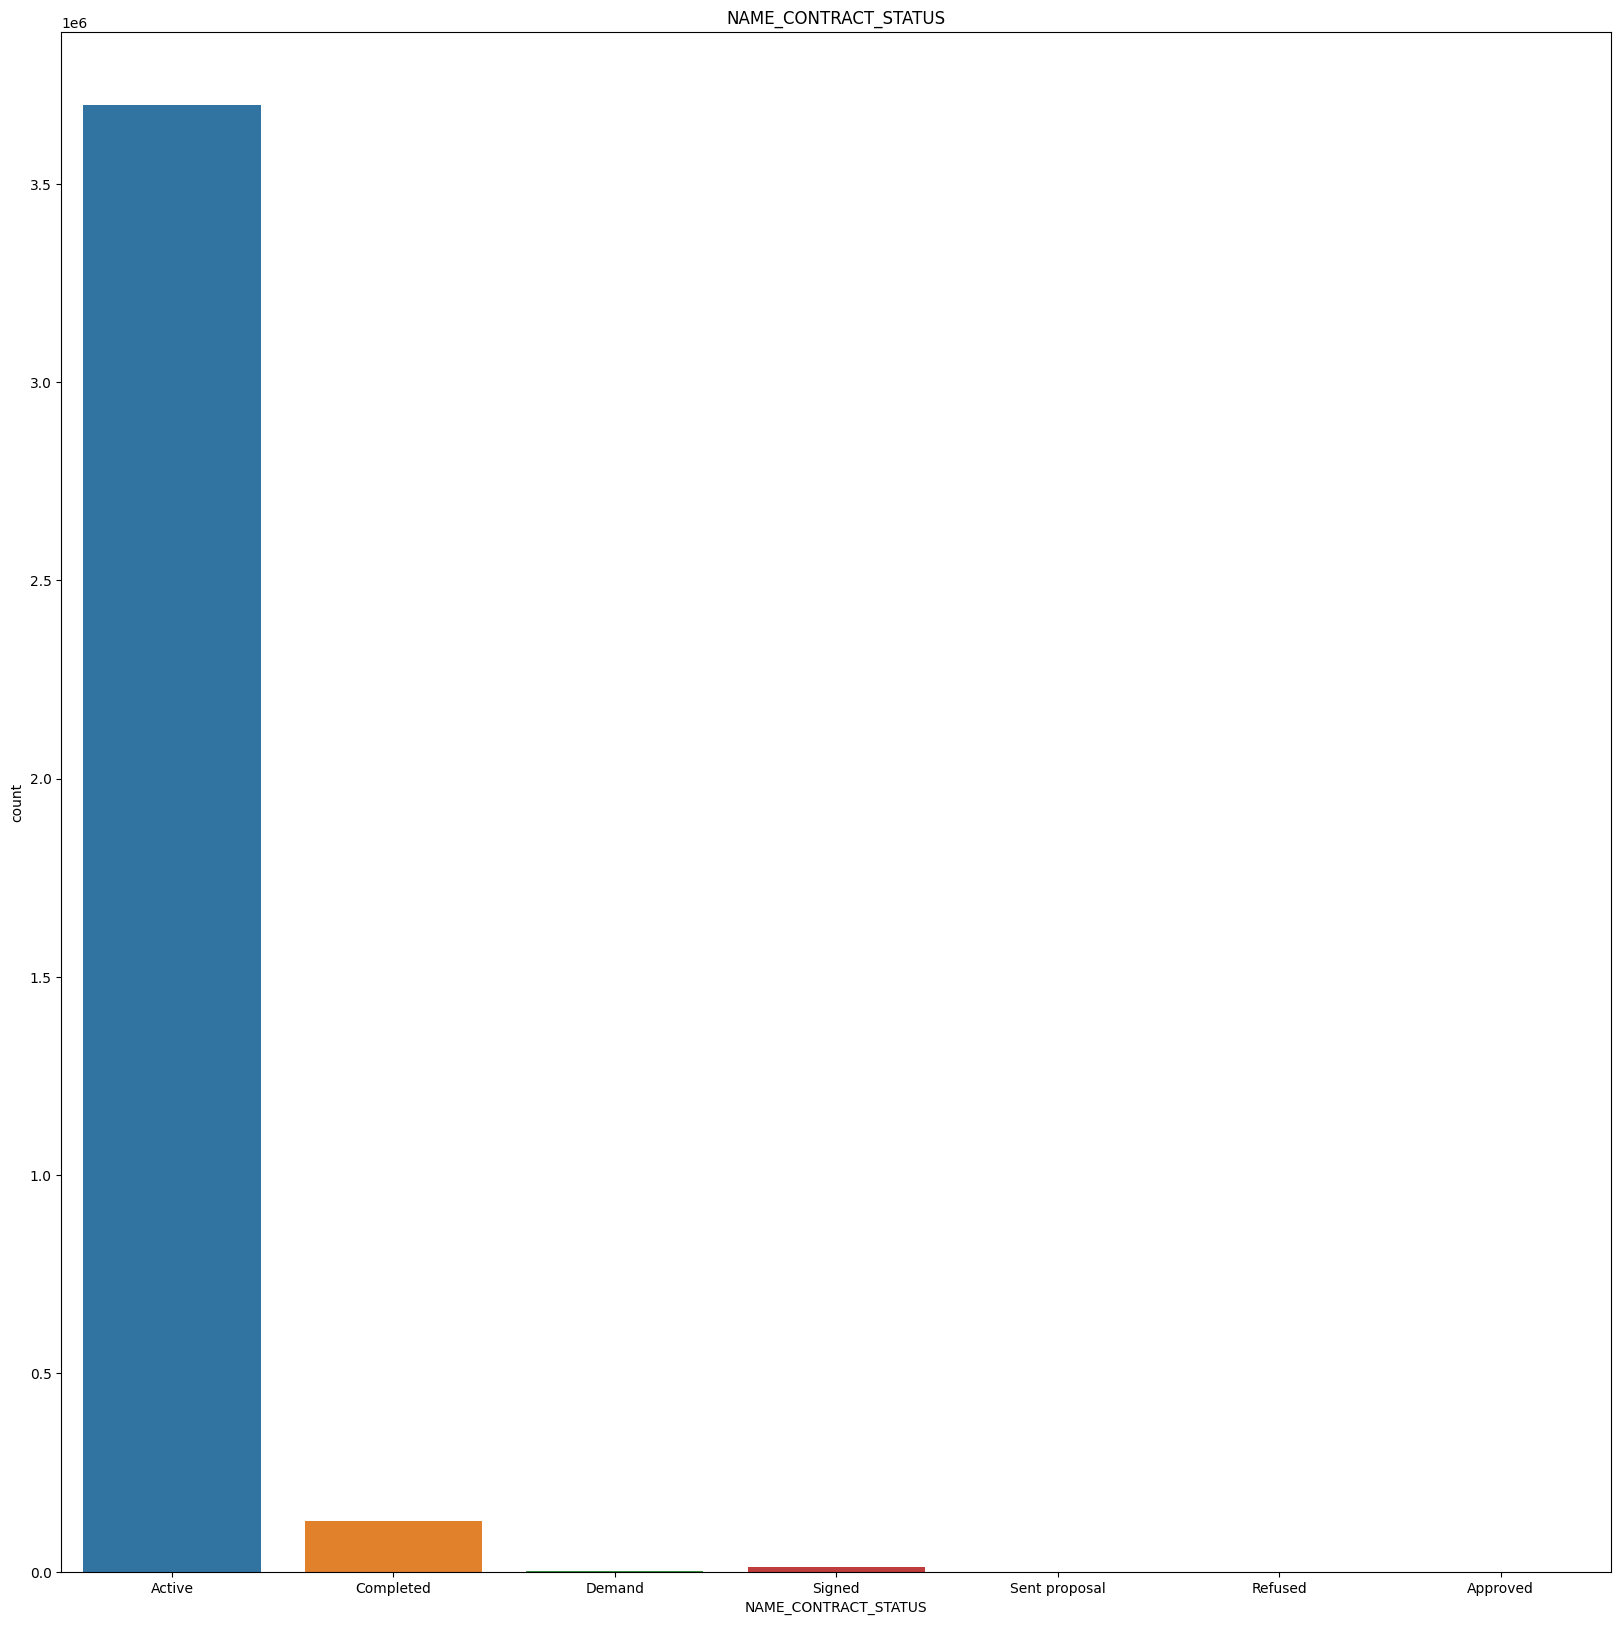

In [ ]:
for col in cat_credit.columns:
        plt.figure(figsize = (20, 20))
        sns.countplot(x=col, data=cat_credit)
        plt.title(col)

###**Data Cleaning**

In [ ]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in credit_card.columns:
    # Count the number of missing values
    missing_values = credit_card[col].isnull().sum()
    
    # Count the number of duplicates
    duplicates = credit_card.duplicated().sum()
    
    # Check for outliers (assuming a normal distribution)
    if credit_card[col].dtype in ['int64', 'float64']:
        mean = credit_card[col].mean()
        std = credit_card[col].std()
        outliers = ((credit_card[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+----------------------------+----------------+------------+----------+
|          Variable          | Missing Values | Duplicates | Outliers |
+----------------------------+----------------+------------+----------+
|         SK_ID_PREV         |       0        |     0      |    0     |
|         SK_ID_CURR         |       0        |     0      |    0     |
|       MONTHS_BALANCE       |       0        |     0      |    0     |
|        AMT_BALANCE         |       0        |     0      |  103576  |
|  AMT_CREDIT_LIMIT_ACTUAL   |       0        |     0      |  103389  |
|  AMT_DRAWINGS_ATM_CURRENT  |     749816     |     0      |  56203   |
|    AMT_DRAWINGS_CURRENT    |       0        |     0      |  74963   |
| AMT_DRAWINGS_OTHER_CURRENT |     749816     |     0      |   6525   |
|  AMT_DRAWINGS_POS_CURRENT  |     749816     |     0      |  38219   |
|  AMT_INST_MIN_REGULARITY   |     305236     |     0      |  90165   |
|    AMT_PAYMENT_CURRENT     |     767988     |     0      |  42

In [ ]:
print('Number of data points : ', credit_card.shape[0])
print('Number of features : ', credit_card.shape[1])

Number of data points :  3840312
Number of features :  23


**Drop Missing Value**

In [ ]:
credit_card2 = credit_card.dropna()

In [ ]:
print('Number of data points : ', credit_card2.shape[0])
print('Number of features : ', credit_card2.shape[1])

Number of data points :  3014276
Number of features :  23


###**Feature Engineering**

**One Hot Encoding**

In [ ]:
# assuming prev_app2 is the original dataframe with both numerical and categorical columns
num_credit2 = credit_card2.select_dtypes(include=['float64', 'int64'])
cat_credit2 = credit_card2.select_dtypes(include=['object'])

# perform one-hot encoding for each categorical column
encoded_cols = []
for col in cat_credit2:
    one_hot = pd.get_dummies(cat_credit2[col], prefix=col)
    encoded_cols.append(one_hot)

# concatenate the original numerical columns and the one-hot encoded categorical columns
credit_card3 = pd.concat([num_credit2] + encoded_cols, axis=1)

# display the encoded dataframe
credit_card3.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
13     1441883      171537              -5         0.00   
14     1864742      303581              -1         0.00   
15     2037377      289902              -1    131294.34   
17     1039039      276642              -6         0.00   
18     2016842      302450              -3         0.00   

    AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
13                   270000                       0.0                   0.0   
14                    45000                       0.0                   0.0   
15                   135000                       0.0                   0.0   
17                    67500                       0.0                   0.0   
18                        0                       0.0                   0.0   

    AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
13                         0.0                       0.0   
14                         0.0                       0.0   
15                         0.0                       0.0   
17                         0.0                       0.0   
18                         0.0                       0.0   

    AMT_INST_MIN_REGULARITY  ...  CNT_DRAWINGS_CURRENT  \
13                 12218.49  ...                     0   
14                     0.00  ...                     0   
15                  6774.66  ...                     0   
17                     0.00  ...                     0   
18                     0.00  ...                     0   

    CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
13                         0.0                       0.0   
14                         0.0                       0.0   
15                         0.0                       0.0   
17                         0.0                       0.0   
18                         0.0                       0.0   

    CNT_INSTALMENT_MATURE_CUM  SK_DPD  SK_DPD_DEF  \
13                        2.0       0           0   
14                       59.0       0           0   
15                       11.0       0           0   
17                       33.0       0           0   
18                        2.0       0           0   

    NAME_CONTRACT_STATUS_Active  NAME_CONTRACT_STATUS_Completed  \
13                            1                               0   
14                            1                               0   
15                            1                               0   
17                            0                               1   
18                            0                               1   

    NAME_CONTRACT_STATUS_Demand  NAME_CONTRACT_STATUS_Signed  
13                            0                            0  
14                            0                            0  
15                            0                            0  
17                            0                            0  
18                            0                            0  

[5 rows x 26 columns]

In [ ]:
print('Number of data points : ', credit_card3.shape[0])
print('Number of features : ', credit_card3.shape[1])

Number of data points :  2074342
Number of features :  26


###Agregat

In [ ]:
agg_list_credit = { 'MONTHS_BALANCE':["sum"], 
        'AMT_BALANCE':["sum"],
        'AMT_CREDIT_LIMIT_ACTUAL':["max"], 

        'AMT_DRAWINGS_ATM_CURRENT':["sum"],
        'AMT_DRAWINGS_CURRENT':["sum"], 
        'AMT_DRAWINGS_OTHER_CURRENT':["sum"],
        'AMT_DRAWINGS_POS_CURRENT':["sum"], 
        'AMT_INST_MIN_REGULARITY':["sum"],
        'AMT_PAYMENT_CURRENT':["sum"], 
        'AMT_PAYMENT_TOTAL_CURRENT':["sum"],
        'AMT_RECEIVABLE_PRINCIPAL':["sum"], 
        'AMT_RECIVABLE':["sum"], 
        'AMT_TOTAL_RECEIVABLE':["sum"],

        'CNT_DRAWINGS_ATM_CURRENT':["sum"], 
        'CNT_DRAWINGS_CURRENT':["sum"],
        'CNT_DRAWINGS_OTHER_CURRENT':["sum"], 
        'CNT_DRAWINGS_POS_CURRENT':["sum"],
        'CNT_INSTALMENT_MATURE_CUM':["max"],    
        'SK_DPD':["max"], 
        'SK_DPD_DEF':["max"]}

In [ ]:
# Filter data hanya untuk status kontrak
credit = credit_card3[credit_card3['NAME_CONTRACT_STATUS_Active'] == 1]

In [ ]:
credit_agg = credit.groupby(['SK_ID_PREV','NAME_CONTRACT_STATUS_Active']).agg(agg_list_credit)
credit_agg.columns = pd.Index([e[0] + '_' + e[1].upper() for e in credit_agg.columns.tolist()])
credit_agg.reset_index(inplace = True)
credit_agg

### Persiapan Penggabungan Feature Credit dan Pos yang sama

In [ ]:
#Membuat dataframe baru yang berisikan dengan feature credit yang sama dengan pos
K= credit_agg['SK_ID_PREV']
L= credit_agg['NAME_CONTRACT_STATUS_Active']
M= credit_agg['MONTHS_BALANCE_SUM']
N= credit_agg['SK_DPD_MAX']
O= credit_agg['SK_DPD_DEF_MAX']
credit_1= [K,L,M,N,O]
credit= pd.concat(credit_1,axis=1)
credit

In [ ]:
#Buat dataframe credit baru dengan mendrop feature yang tidak sama dengan pos
credit_1=credit_agg.drop(['NAME_CONTRACT_STATUS_Active','MONTHS_BALANCE_SUM','SK_DPD_MAX','SK_DPD_DEF_MAX'], axis=1)

###Merge feature Pos dan Credit yang sama

In [ ]:
# Menggunakan metode append
poscredit0 = POS.append(credit)  # Menambahkan baris baru pada dataframe1(POS)
poscredit0

###Merge Credit dan Pos secara penuh

In [ ]:
# Merge Pos_credit(feature pos yang id prev nya telah tertambah dengan id prev credit) 
# dgn Pos (dataset yang berisikan feature yang sebelumnya tidakada di credit)
# dan Credit card(dataset yang berisikan feature yang sebelumnya tidak ada di pos)
poscredit = poscredit0.merge(pos, how='left', on='SK_ID_PREV')
pos_credit = poscredit.merge(credit_1, how='left', on='SK_ID_PREV')

## **previous_application.csv**
Ini adalah dataset catatan saldo bulanan kartu kredit yang dimiliki pelamar dengan Home Credit.

###**Import Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def reduce_memory_usage(df):
  
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
prev_app = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/previous_application.csv")
print('Number of data points : ', prev_app.shape[0])
print('Number of features : ', prev_app.shape[1])
prev_app.head()

Number of data points :  1670214
Number of features :  37


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

**previous_application.csv** berisi informasi tentang aplikasi kredit sebelumnya dari nasabah Home Credit.

- **SK_ID_PREV** : ID unik untuk setiap aplikasi kredit sebelumnya. (satu pinjaman dapat memiliki 0, 1, 2, atau lebih aplikasi pinjaman sebelumnya di Home Credit. Aplikasi sebelumnya tersebut bisa, tetapi tidak selalu mengarah pada pemberian kredit)
-  **NAME_CONTRACT_TYPE** : Jenis kontrak kredit sebelumnya (misalnya, kredit konsumen atau kredit hipotek)
- **AMT_ANNUITY** : Jumlah angsuran bulanan yang harus dibayarkan oleh nasabah
- **AMT_APPLICATION** : jumlah nominal aplikasi pinjaman yang diajukan oleh nasabah
- **AMT_CREDIT** : Jumlah kredit yang diberikan kepada nasabah
- **AMT_DOWN_PAYMENT** : jumlah uang yang dibayarkan oleh nasabah sebagai pembayaran muka atau uang muka pada aplikasi pinjaman
- **AMT_GOODS_PRICE** : Harga barang yang dibeli dengan kredit
- **WEEKDAY_APPR_PROCESS_START** : Hari ketika nasabah apply aplikasi kredit
- **HOUR_APPR_PROCESS_START** : Jam ketika nasabah apply aplikasi kredit
- **FLAG_LAST_APPL_PER_CONTRACT** : Menunjukkan apakah aplikasi ini adalah aplikasi terakhir dalam kontrak
- **NFLAG_LAST_APPL_IN_DAY** : Ditandai jika aplikasi tersebut adalah aplikasi terakhir pada hari tersebut. Menunjukkan apakah ada aplikasi dalam kontrak pada hari yang sama dengan aplikasi ini
- **NFLAG_MICRO_CASH** : flag yang menunjukkan apakah terdapat pinjaman mikro tambahan 
- **RATE_DOWN_PAYMENT** : seberapa besar jumlah pembayaran muka dibandingkan dengan jumlah total pinjaman yang diminta
- **RATE_INTEREST_PRIMARY** : tingkat bunga primer yang diterapkan pada pinjaman
- **RATE_INTEREST_PRIVILEGED** : tingkat bunga istimewa atau istimewa yang diterapkan pada pinjaman
- **NAME_CASH_LOAN_PURPOSE** : tujuan atau alasan penggunaan pinjaman tunai yang diajukan oleh nasabah
- **NAME_CONTRACT_STATUS** : Status kontrak kredit sebelumnya (misalnya, disetujui, ditolak, atau dibatalkan)
- **DAYS_DECISION** : Jumlah hari antara aplikasi kredit sebelumnya dan keputusan terakhir
- **NAME_PAYMENT_TYPE** : Metode pembayaran yang digunakan oleh nasabah (misalnya, transfer bank atau pembayaran tunai)
- **CODE_REJECT_REASON** : Alasan penolakan aplikasi kredit sebelumnya
- **NAME_TYPE_SUITE** : jenis hubungan orang yang mendampingi nasabah dalam aplikasi pinjaman
- **NAME_CLIENT_TYPE** : Tipe klien (misalnya, baru atau ulang)
- **NAME_GOODS_CATEGORY** : Kategori barang yang dibeli dengan kredit
- **NAME_PORTFOLIO** : Portofolio produk yang digunakan untuk aplikasi kredit sebelumnya (CASH, POS, CAR, …)
- **NAME_PRODUCT_TYPE** : Jenis produk yang digunakan untuk aplikasi kredit sebelumnya (x-sell o walk-in)
- **CHANNEL_TYPE** : Jenis saluran yang digunakan untuk mengajukan aplikasi kredit sebelumnya
- **SELLERPLACE_AREA** : Area tempat penjual beroperasi
- **NAME_SELLER_INDUSTRY** : Industri penjual
- **CNT_PAYMENT** : Jumlah pembayaran yang akan dilakukan oleh nasabah selama kredit
- **NAME_YIELD_GROUP** : Grup tingkat pengembalian kredit
- **PRODUCT_COMBINATION** : Kombinasi produk yang digunakan untuk aplikasi kredit sebelumnya
- **DAYS_FIRST_DRAWING** : berapa hari sejak aplikasi saat ini disetujui hingga pencairan pertama pada aplikasi sebelumnya
- **DAYS_FIRST_DUE** : berapa hari sejak aplikasi saat ini disetujui hingga jatuh tempo pertama yang seharusnya pada aplikasi sebelumnya
- **DAYS_LAST_DUE_1ST_VERSION** : berapa hari sejak aplikasi saat ini disetujui hingga jatuh tempo pertama pada aplikasi sebelumnya
- **DAYS_LAST_DUE** : berapa hari sejak aplikasi saat ini disetujui hingga jatuh tempo terakhir pada aplikasi sebelumnya
- **DAYS_TERMINATION** : berapa hari sejak aplikasi saat ini disetujui hingga akhir yang diharapkan pada aplikasi sebelumnya
- **NFLAG_INSURED_ON_APPROVAL** : Apakah klien mengajukan permintaan asuransi selama aplikasi sebelumnya

###**EDA**

In [ ]:
prev_app.info()

In [ ]:
# Identify the numerical and categorical columns
num_cols = prev_app.select_dtypes(include=['int64', 'float64']).columns
cat_cols = prev_app.select_dtypes(include=['object', 'category']).columns

# Create datasets with numerical and categorical columns
num_prevapp = prev_app[num_cols]
cat_prevapp = prev_app[cat_cols]

**Numeric Variables**

In [ ]:
num_prevapp.describe()

In [ ]:
num_prevapp.cov()

In [ ]:
# How many numeric variables are in the data set?
print('Number of numerical variables: ', len(num_cols))
num_cols

In [ ]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
hist_for_nums(prev_app, num_cols)

In [ ]:
num_prevapp.corr()

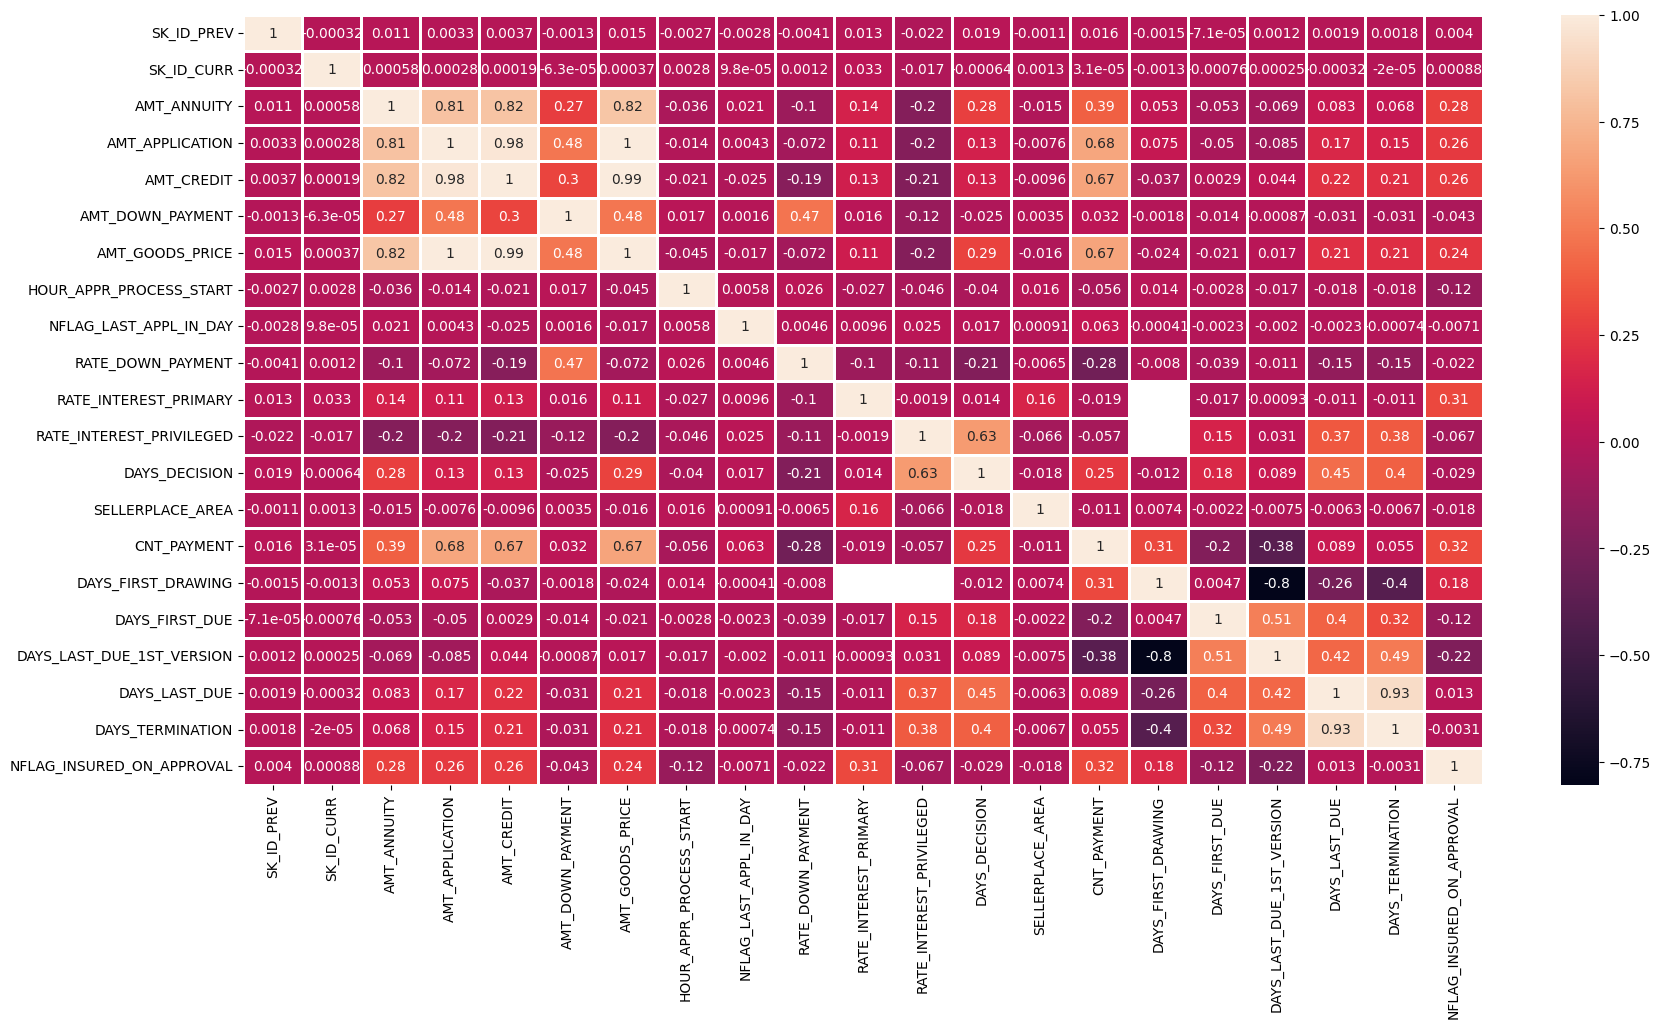

In [ ]:

# heatmap
plt.figure(figsize=(20,10)) 
sns.heatmap(num_prevapp.corr(), annot=True, linewidths=1, linecolor="white")
plt.show()

**Categorical Variables**

In [ ]:
# How many categorical variables are in the data set?
print('Number of categoricals variables: ', len(cat_cols))
cat_cols

Number of categoricals variables:  16


Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

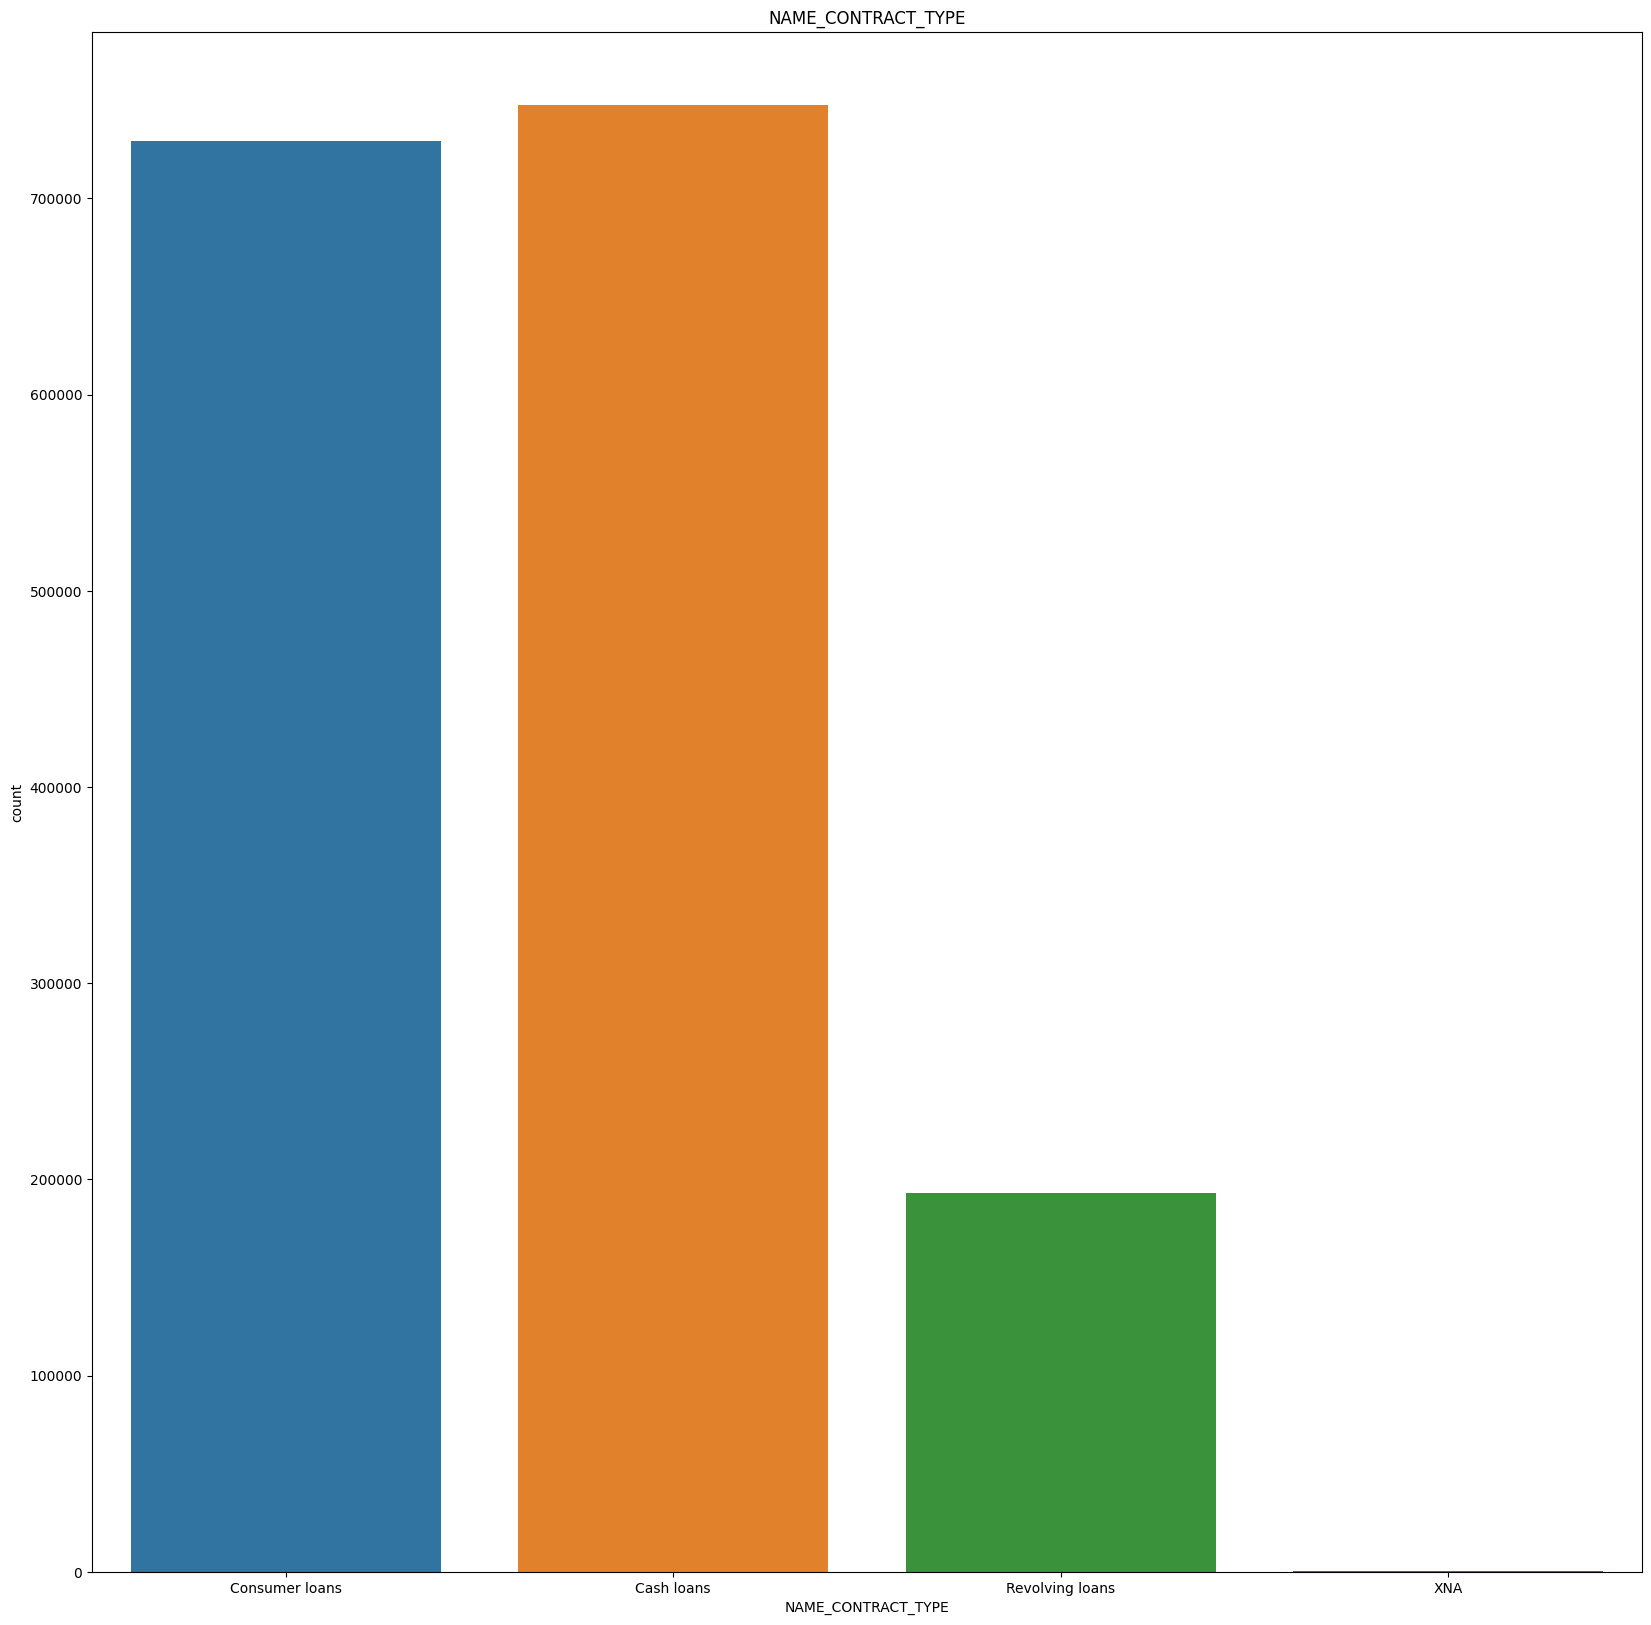

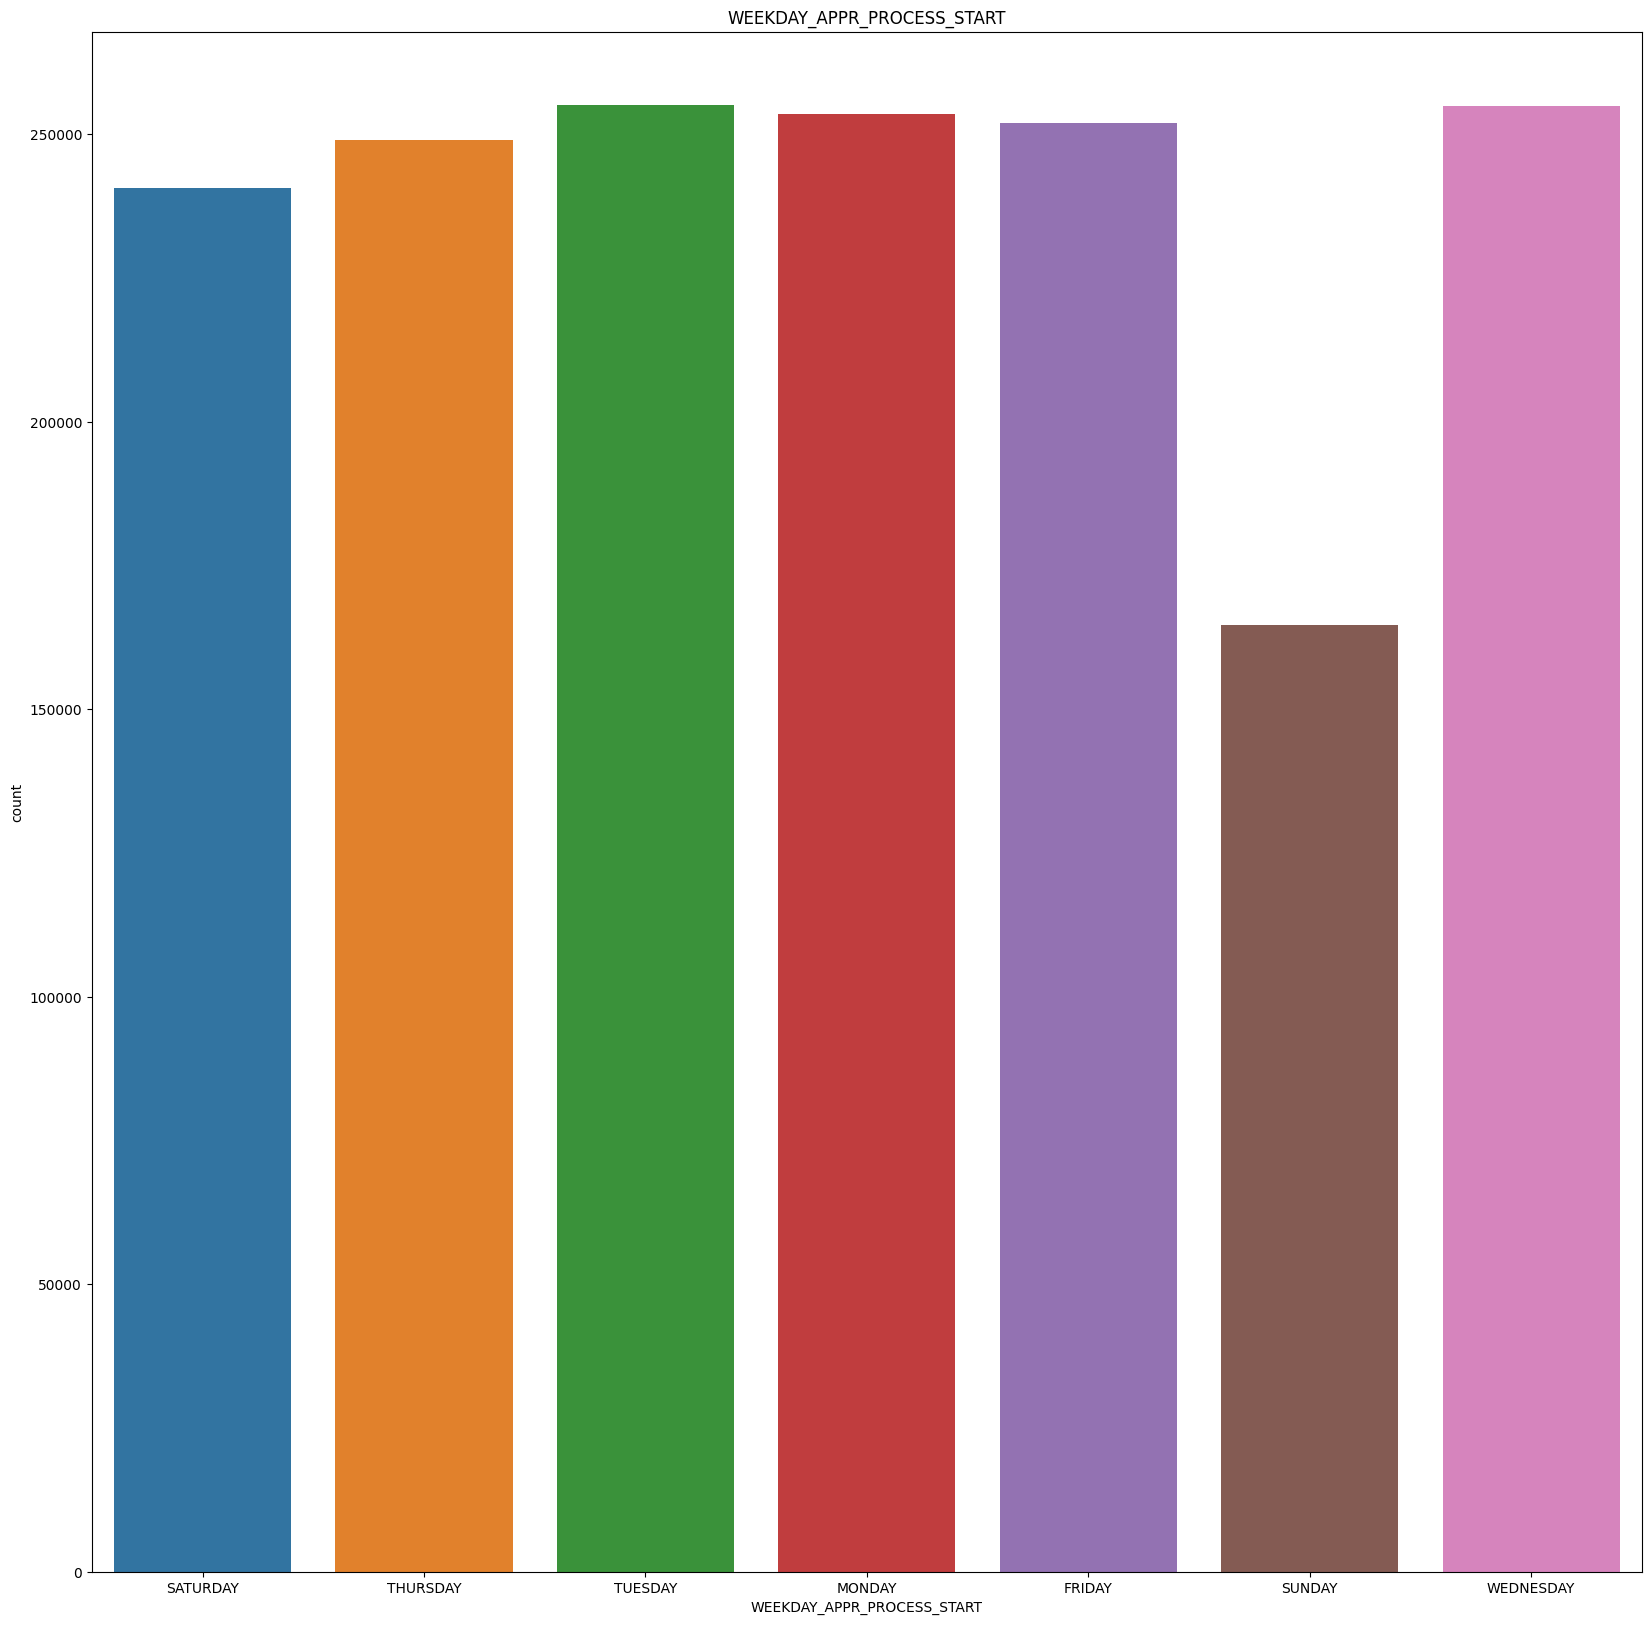

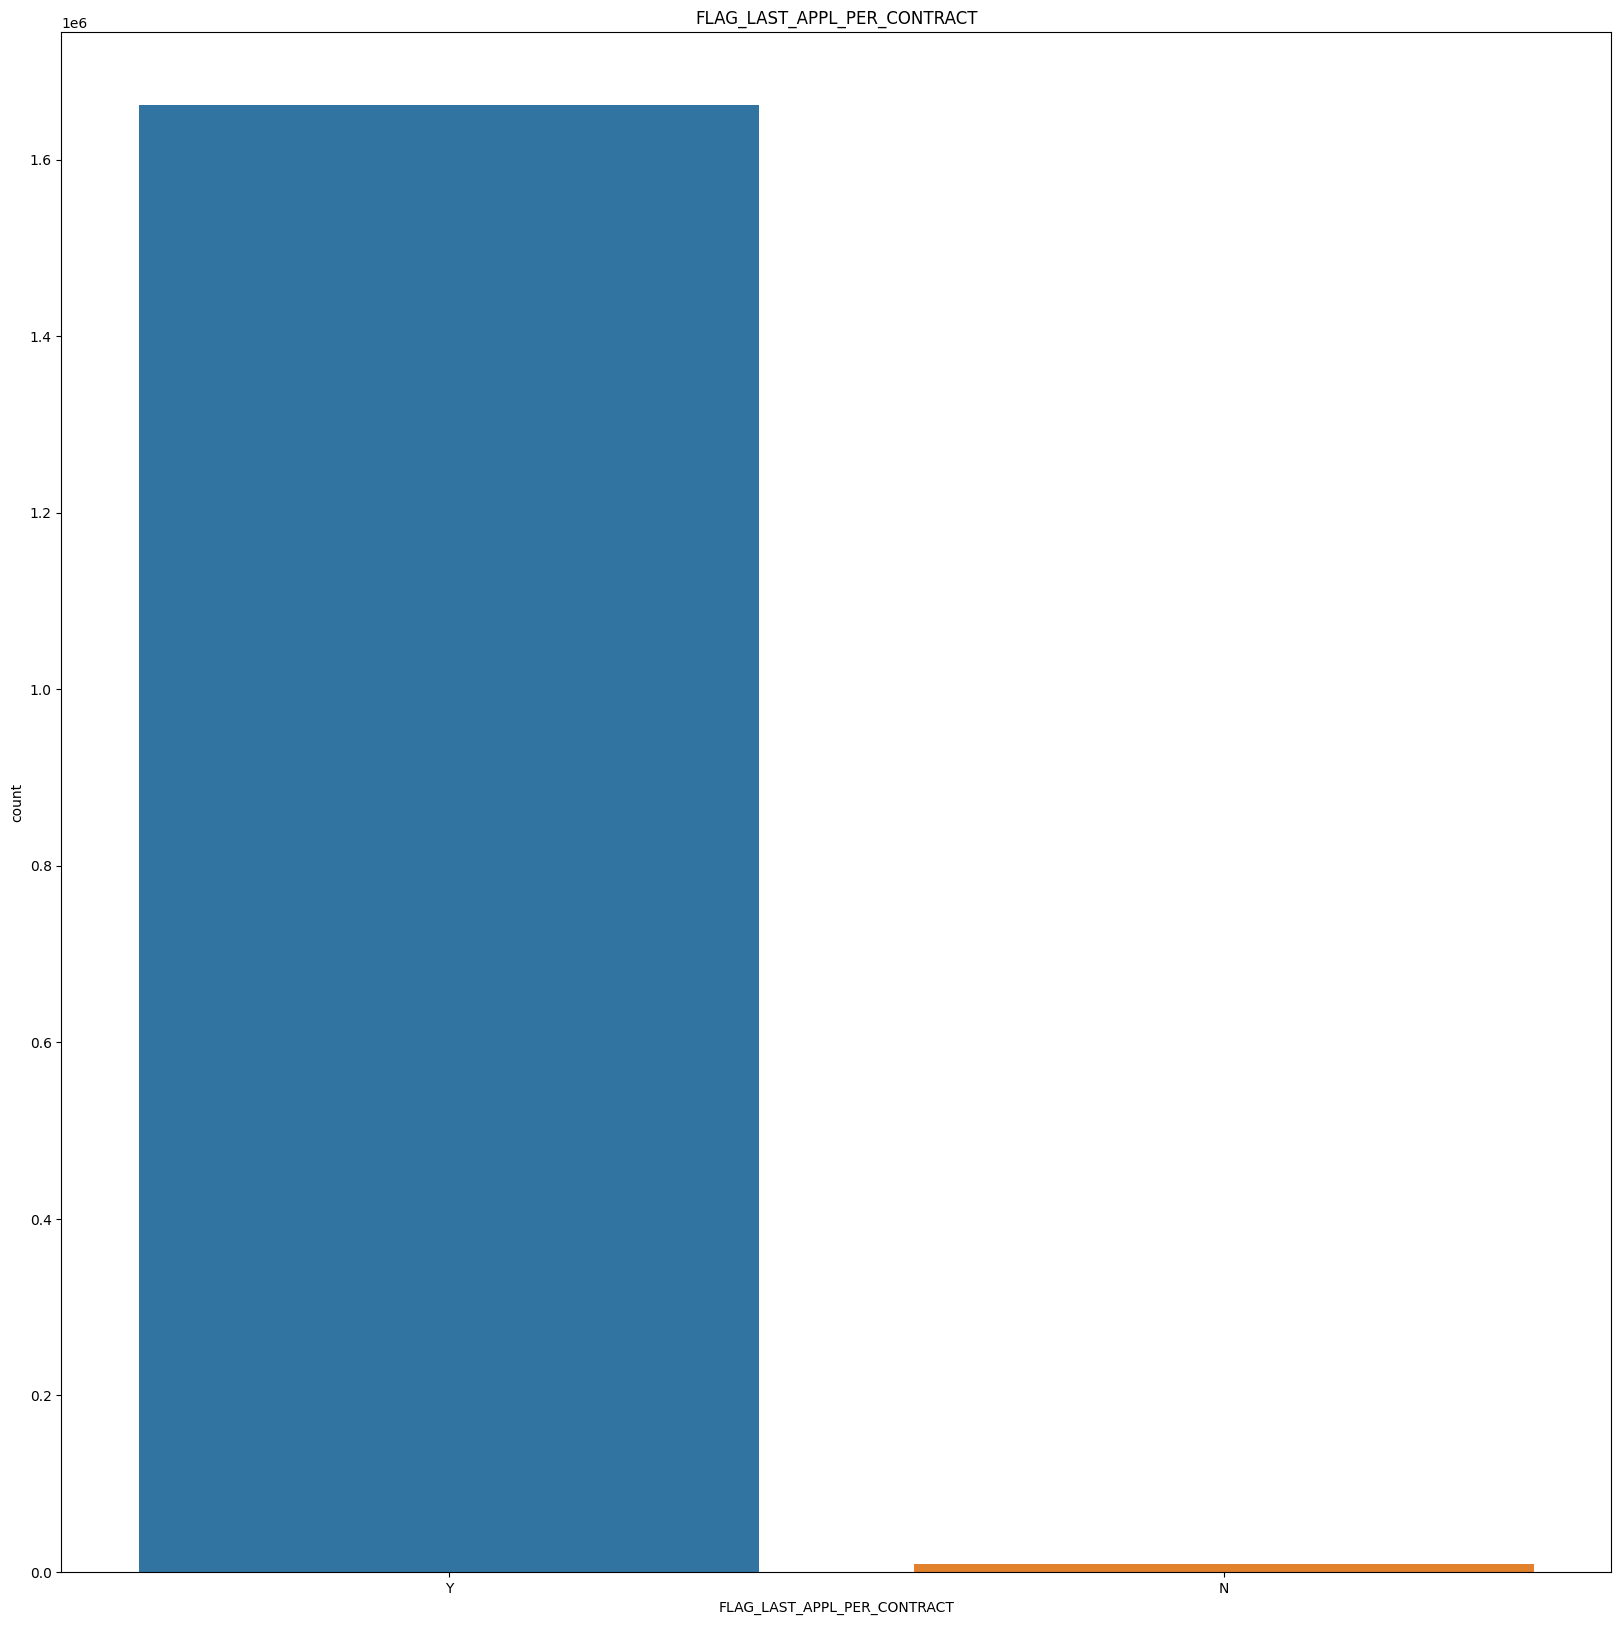

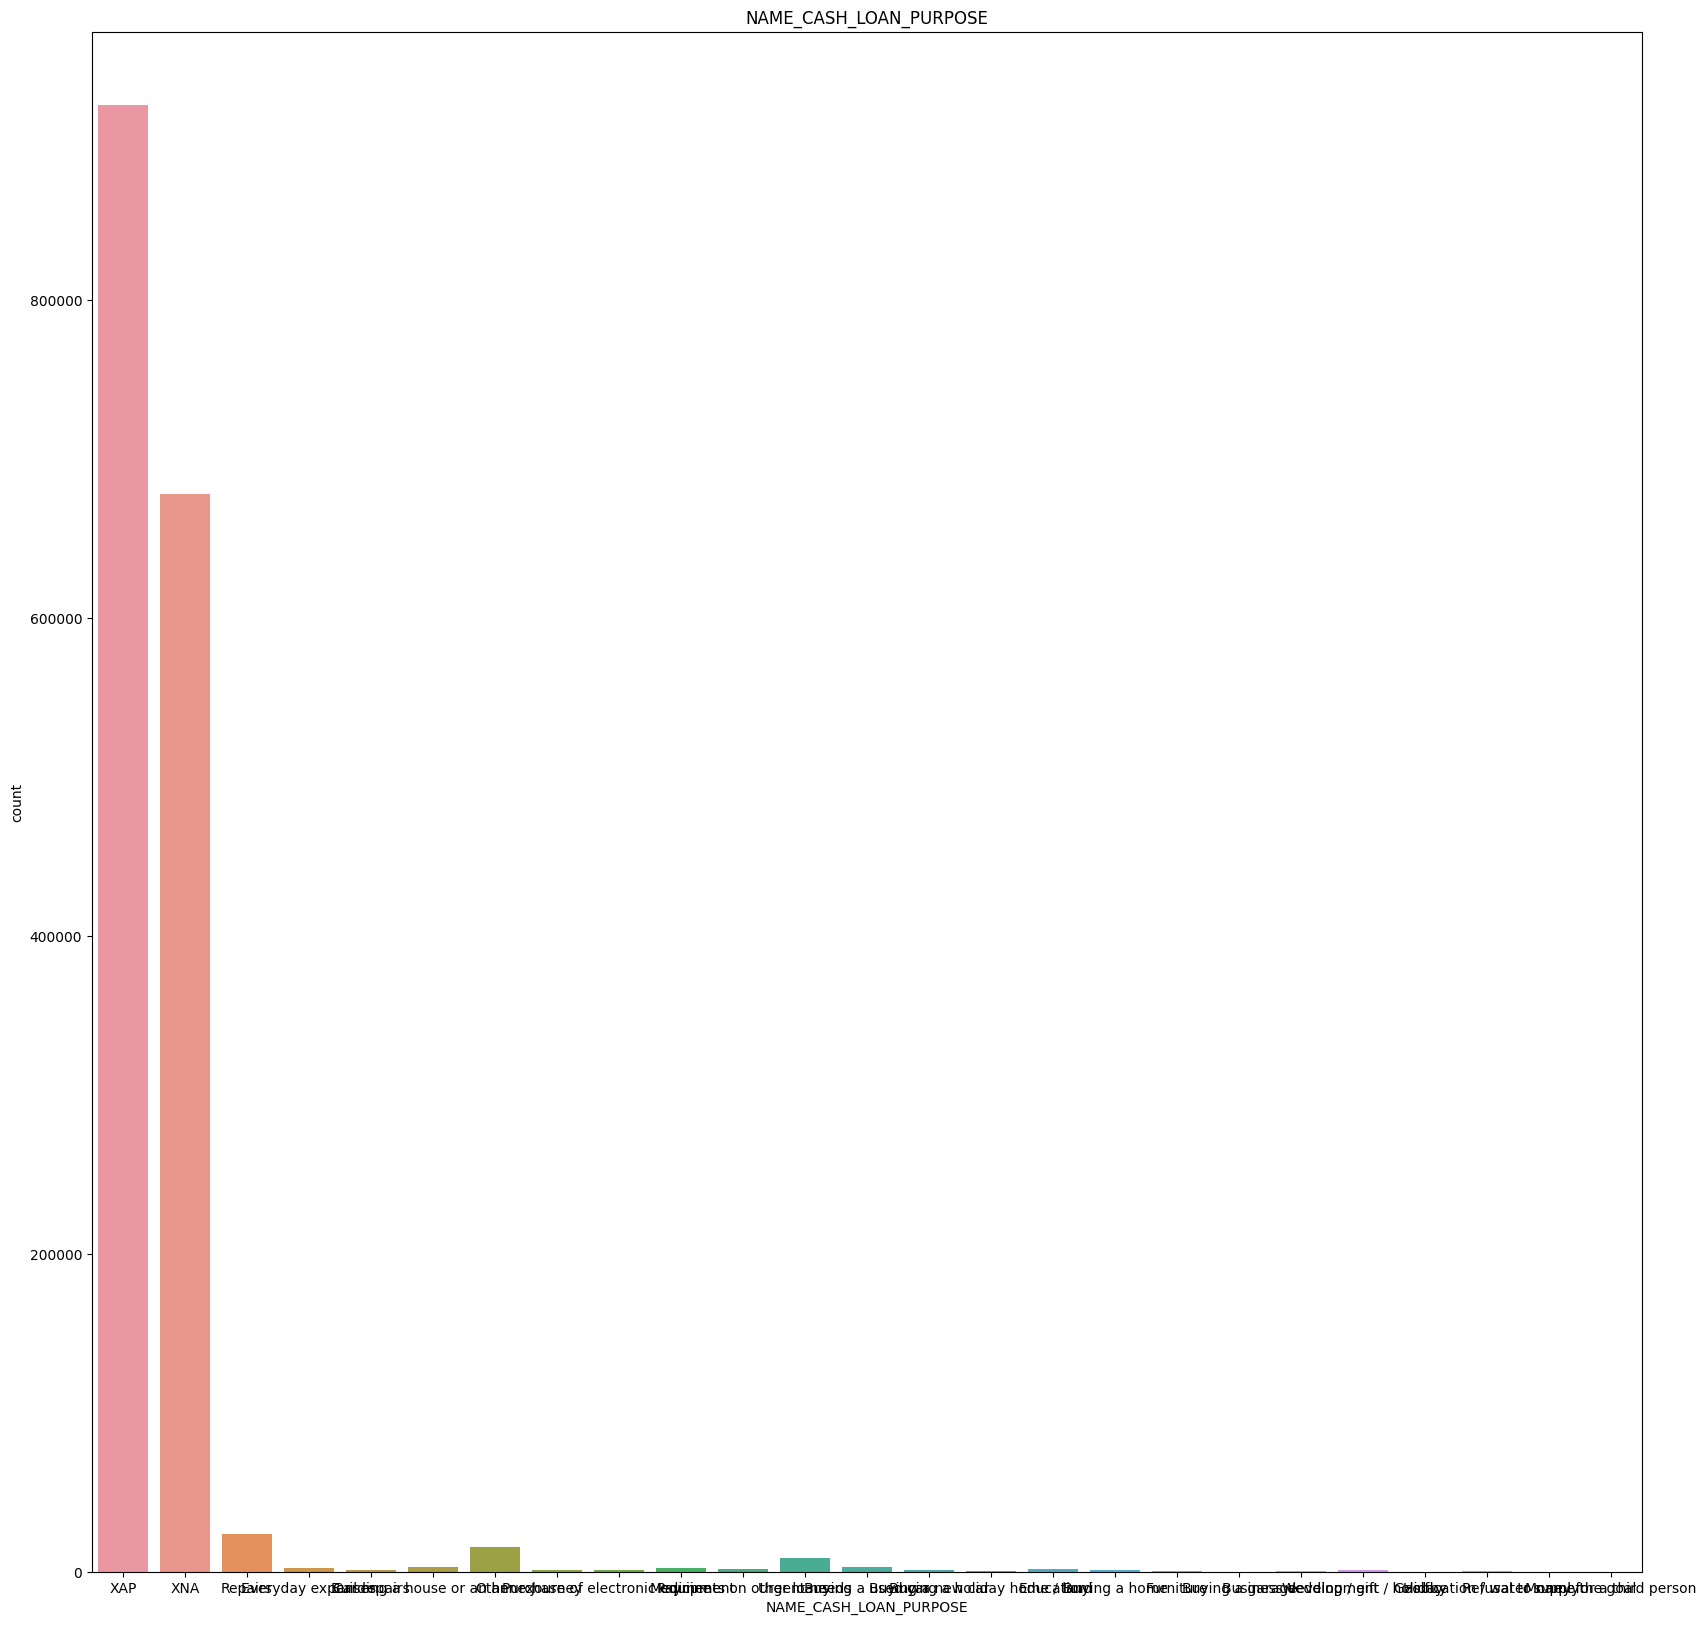

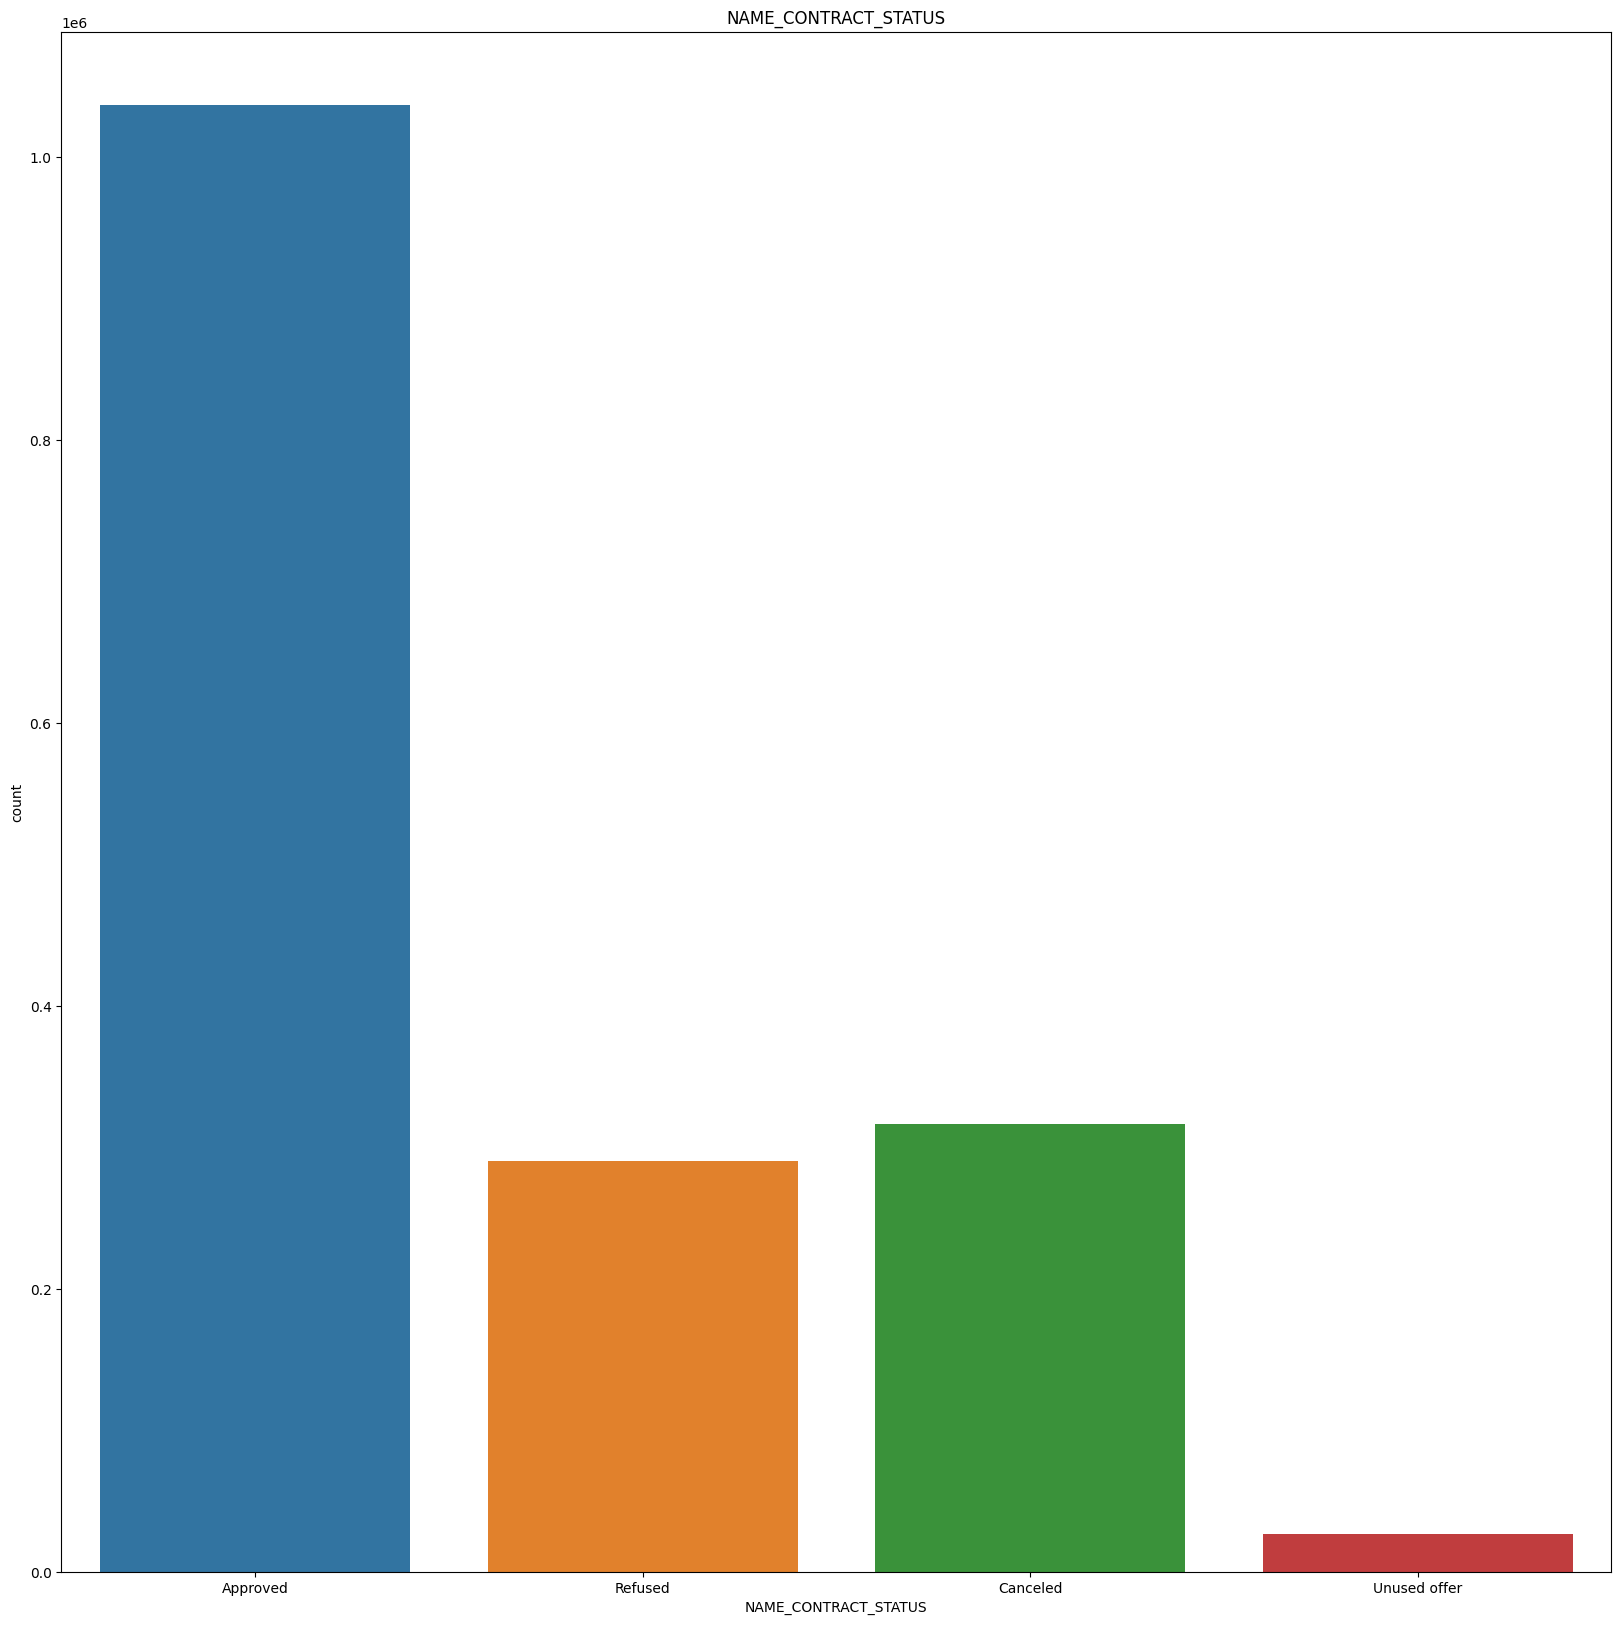

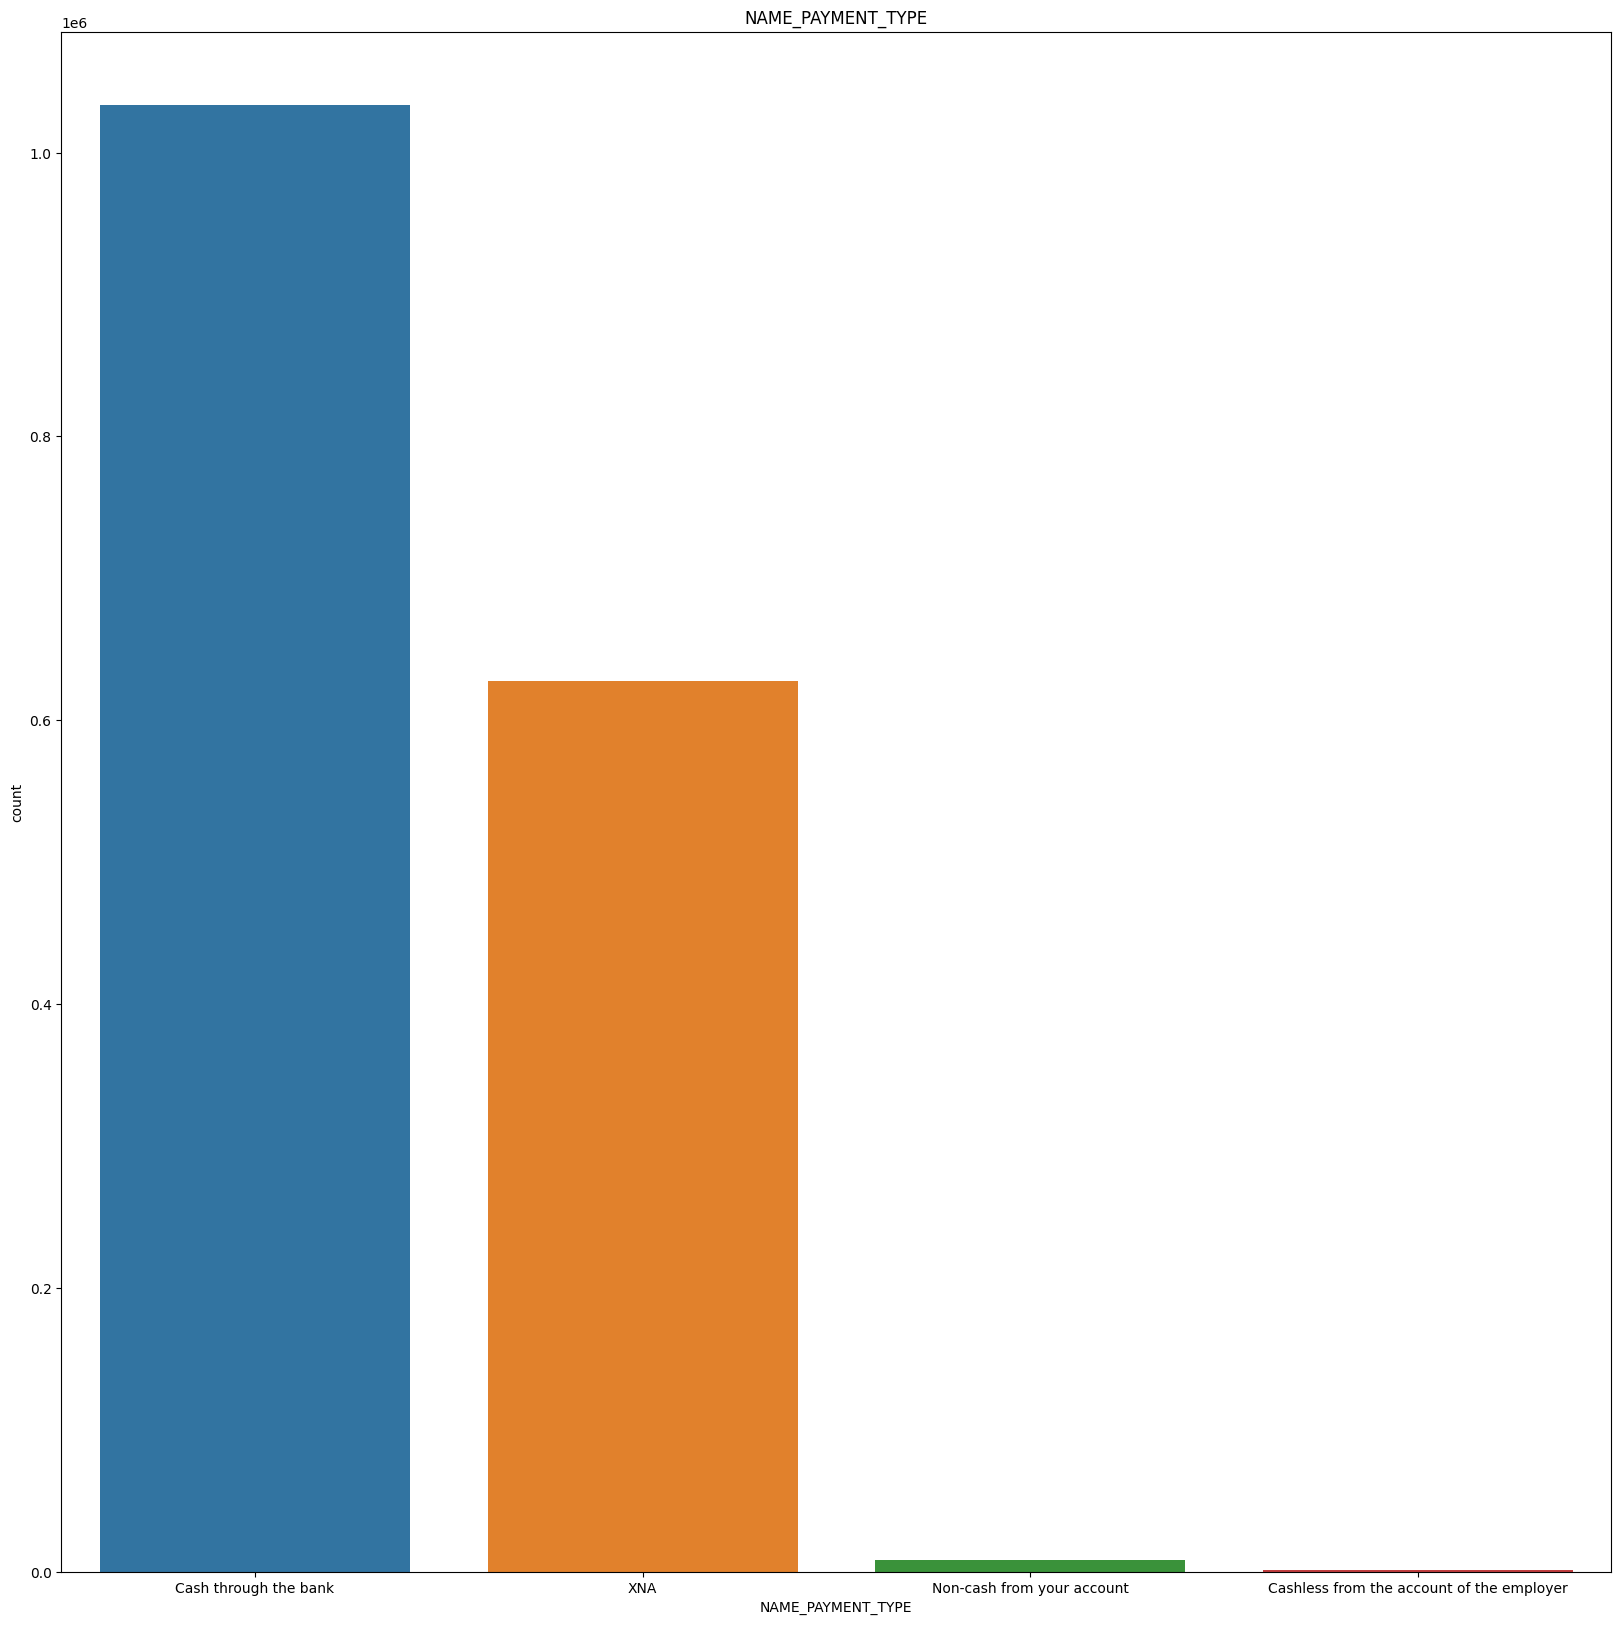

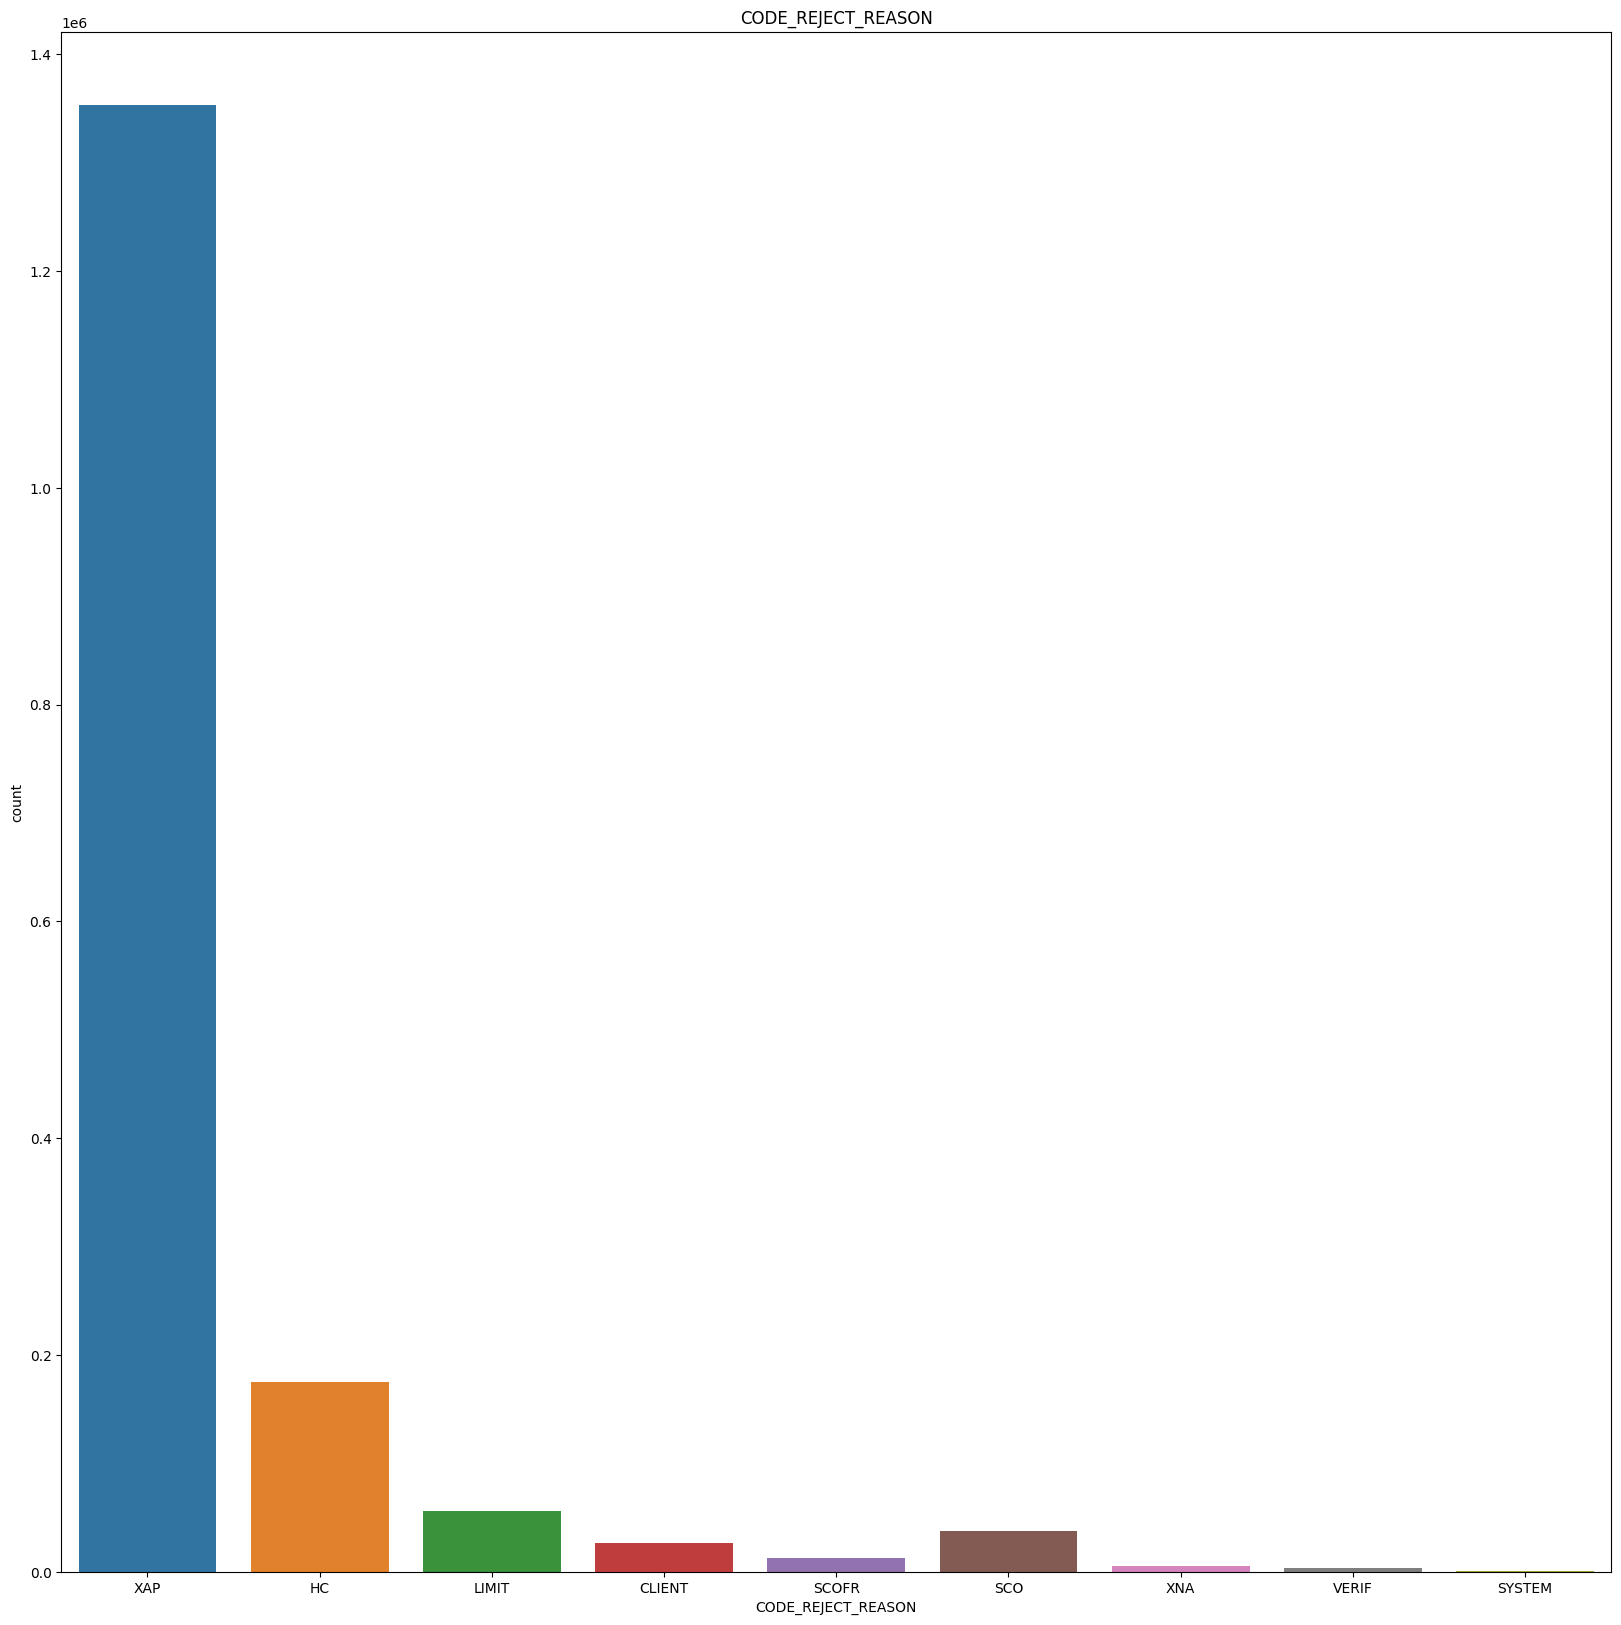

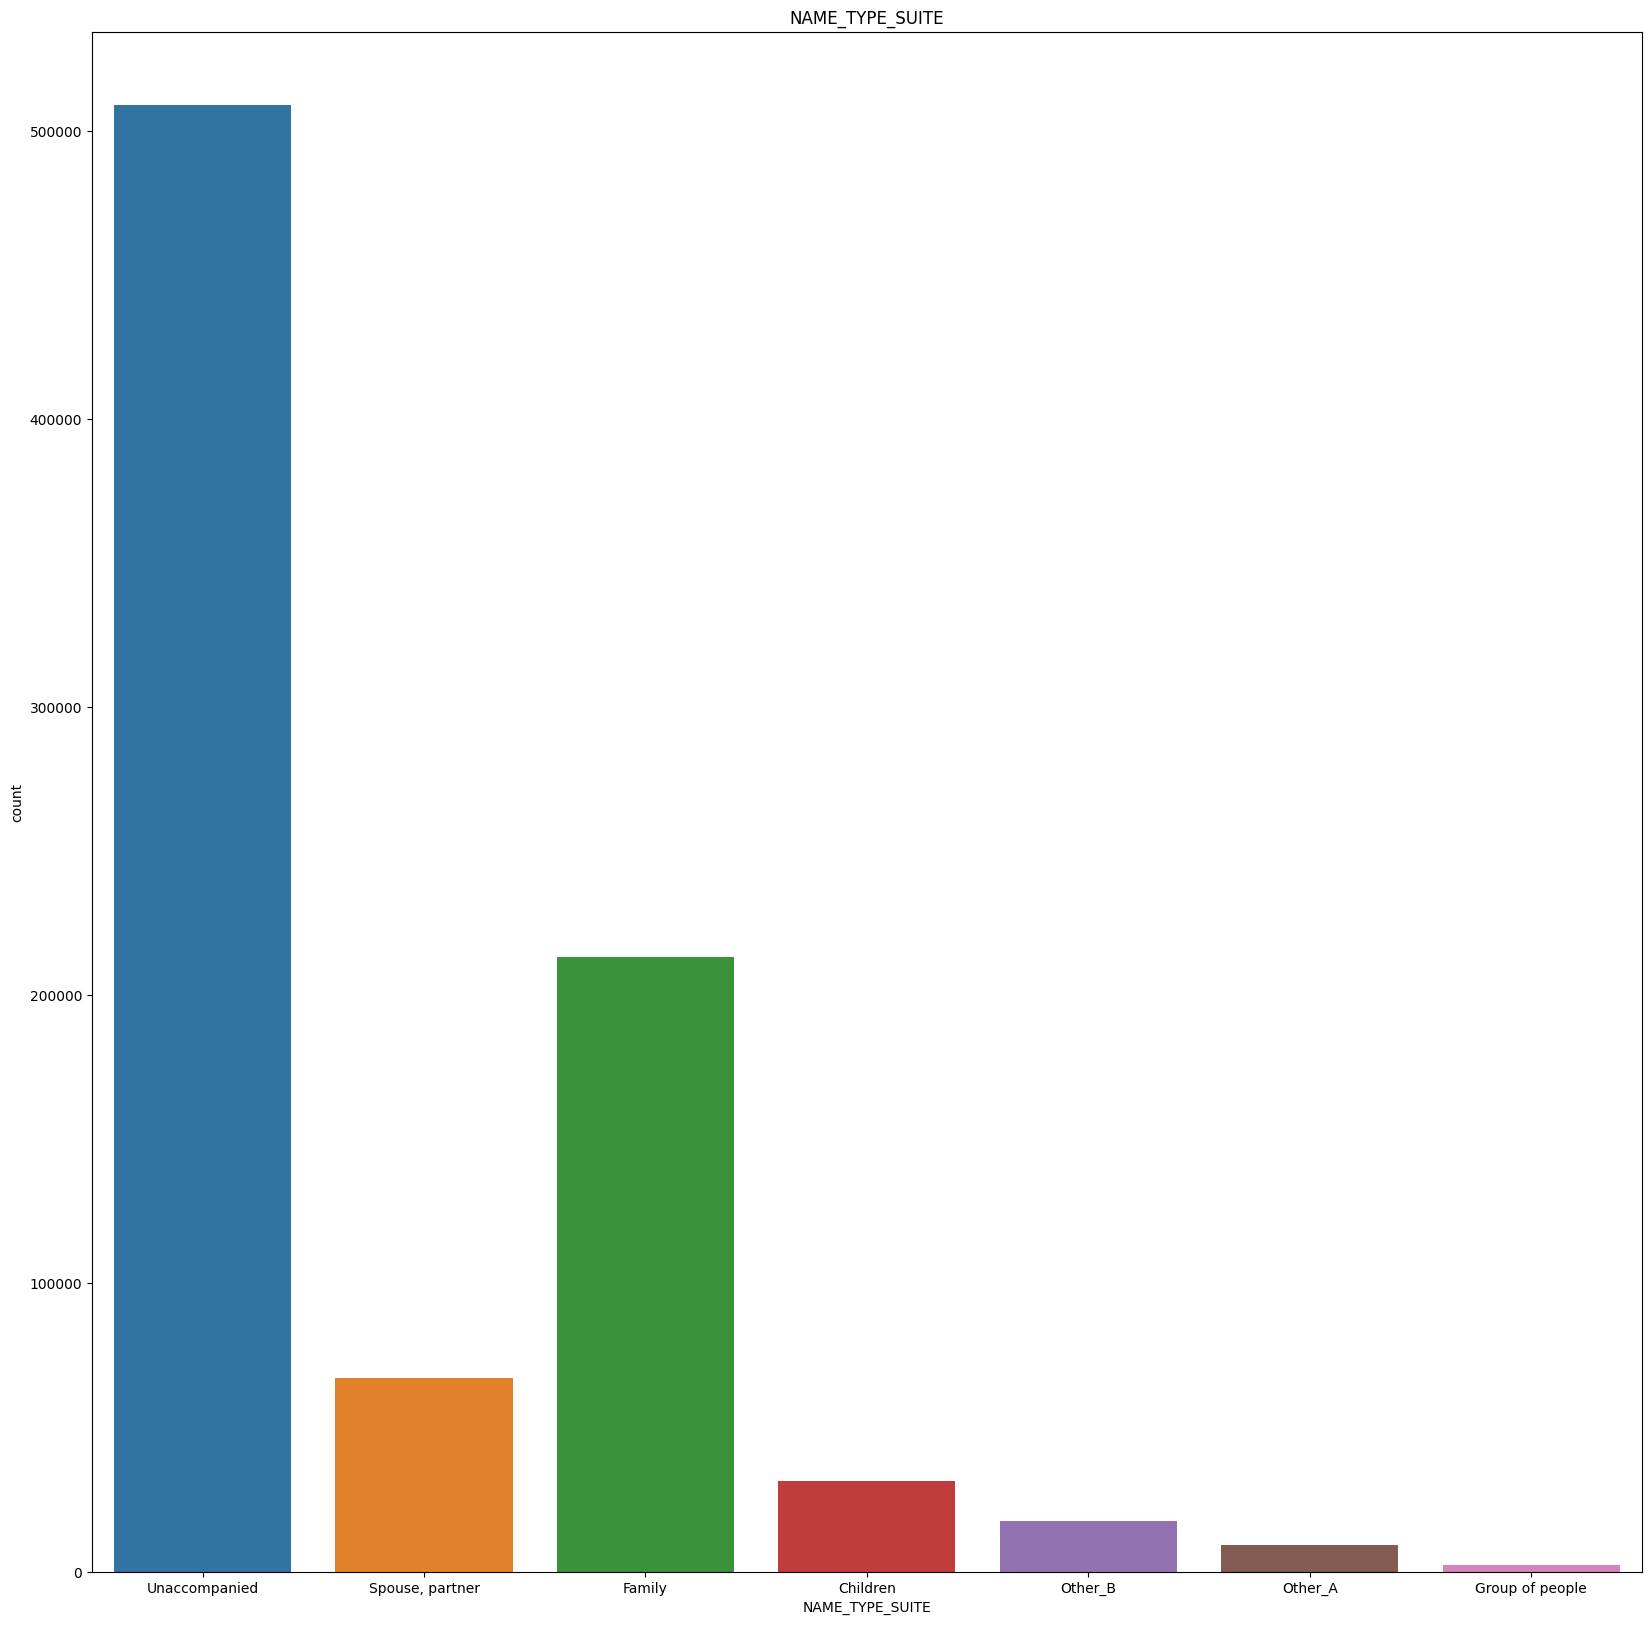

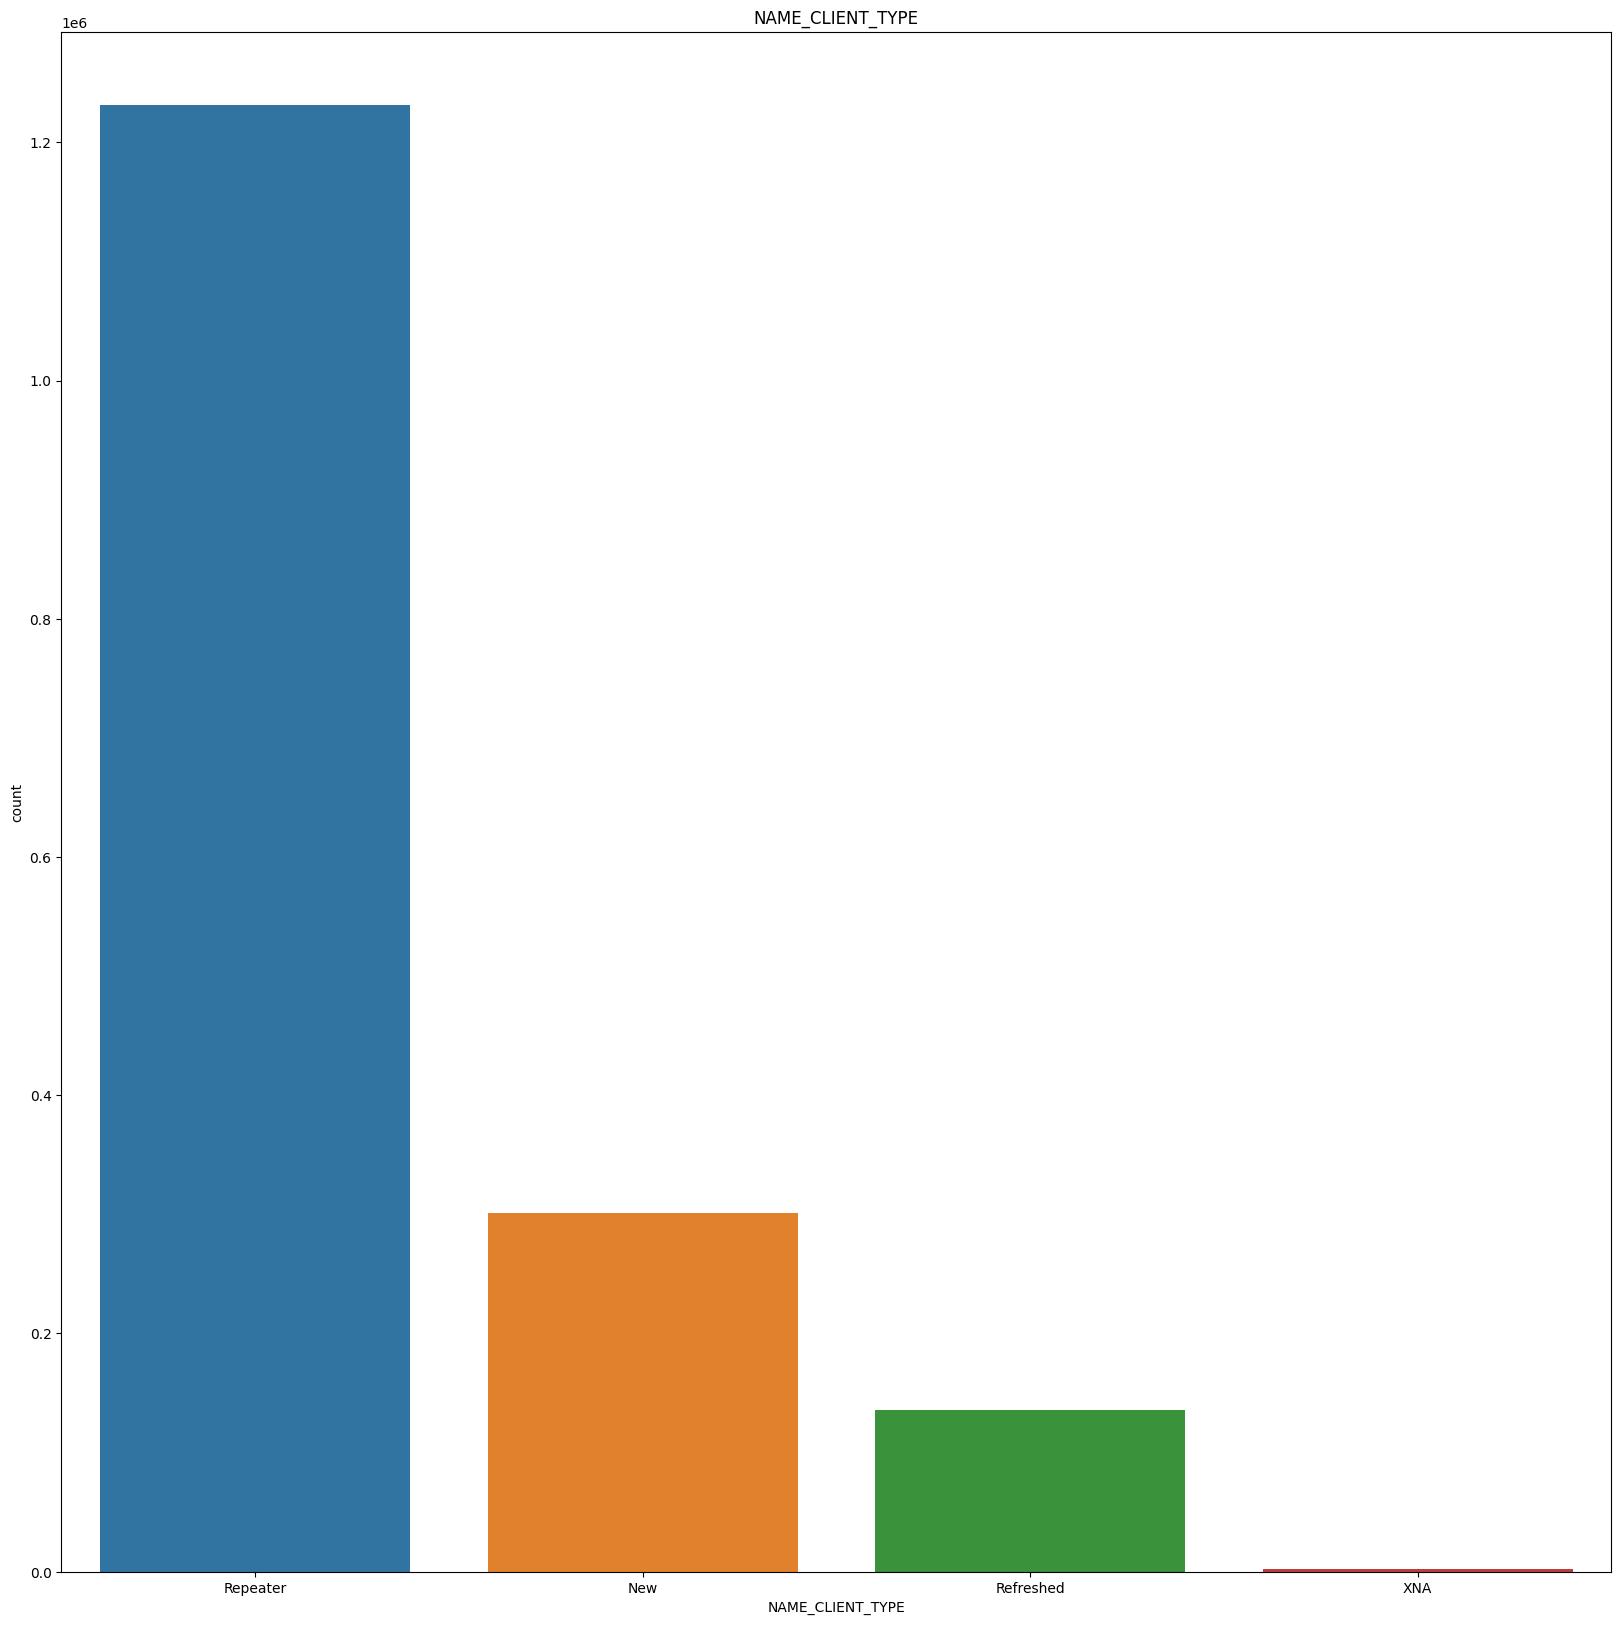

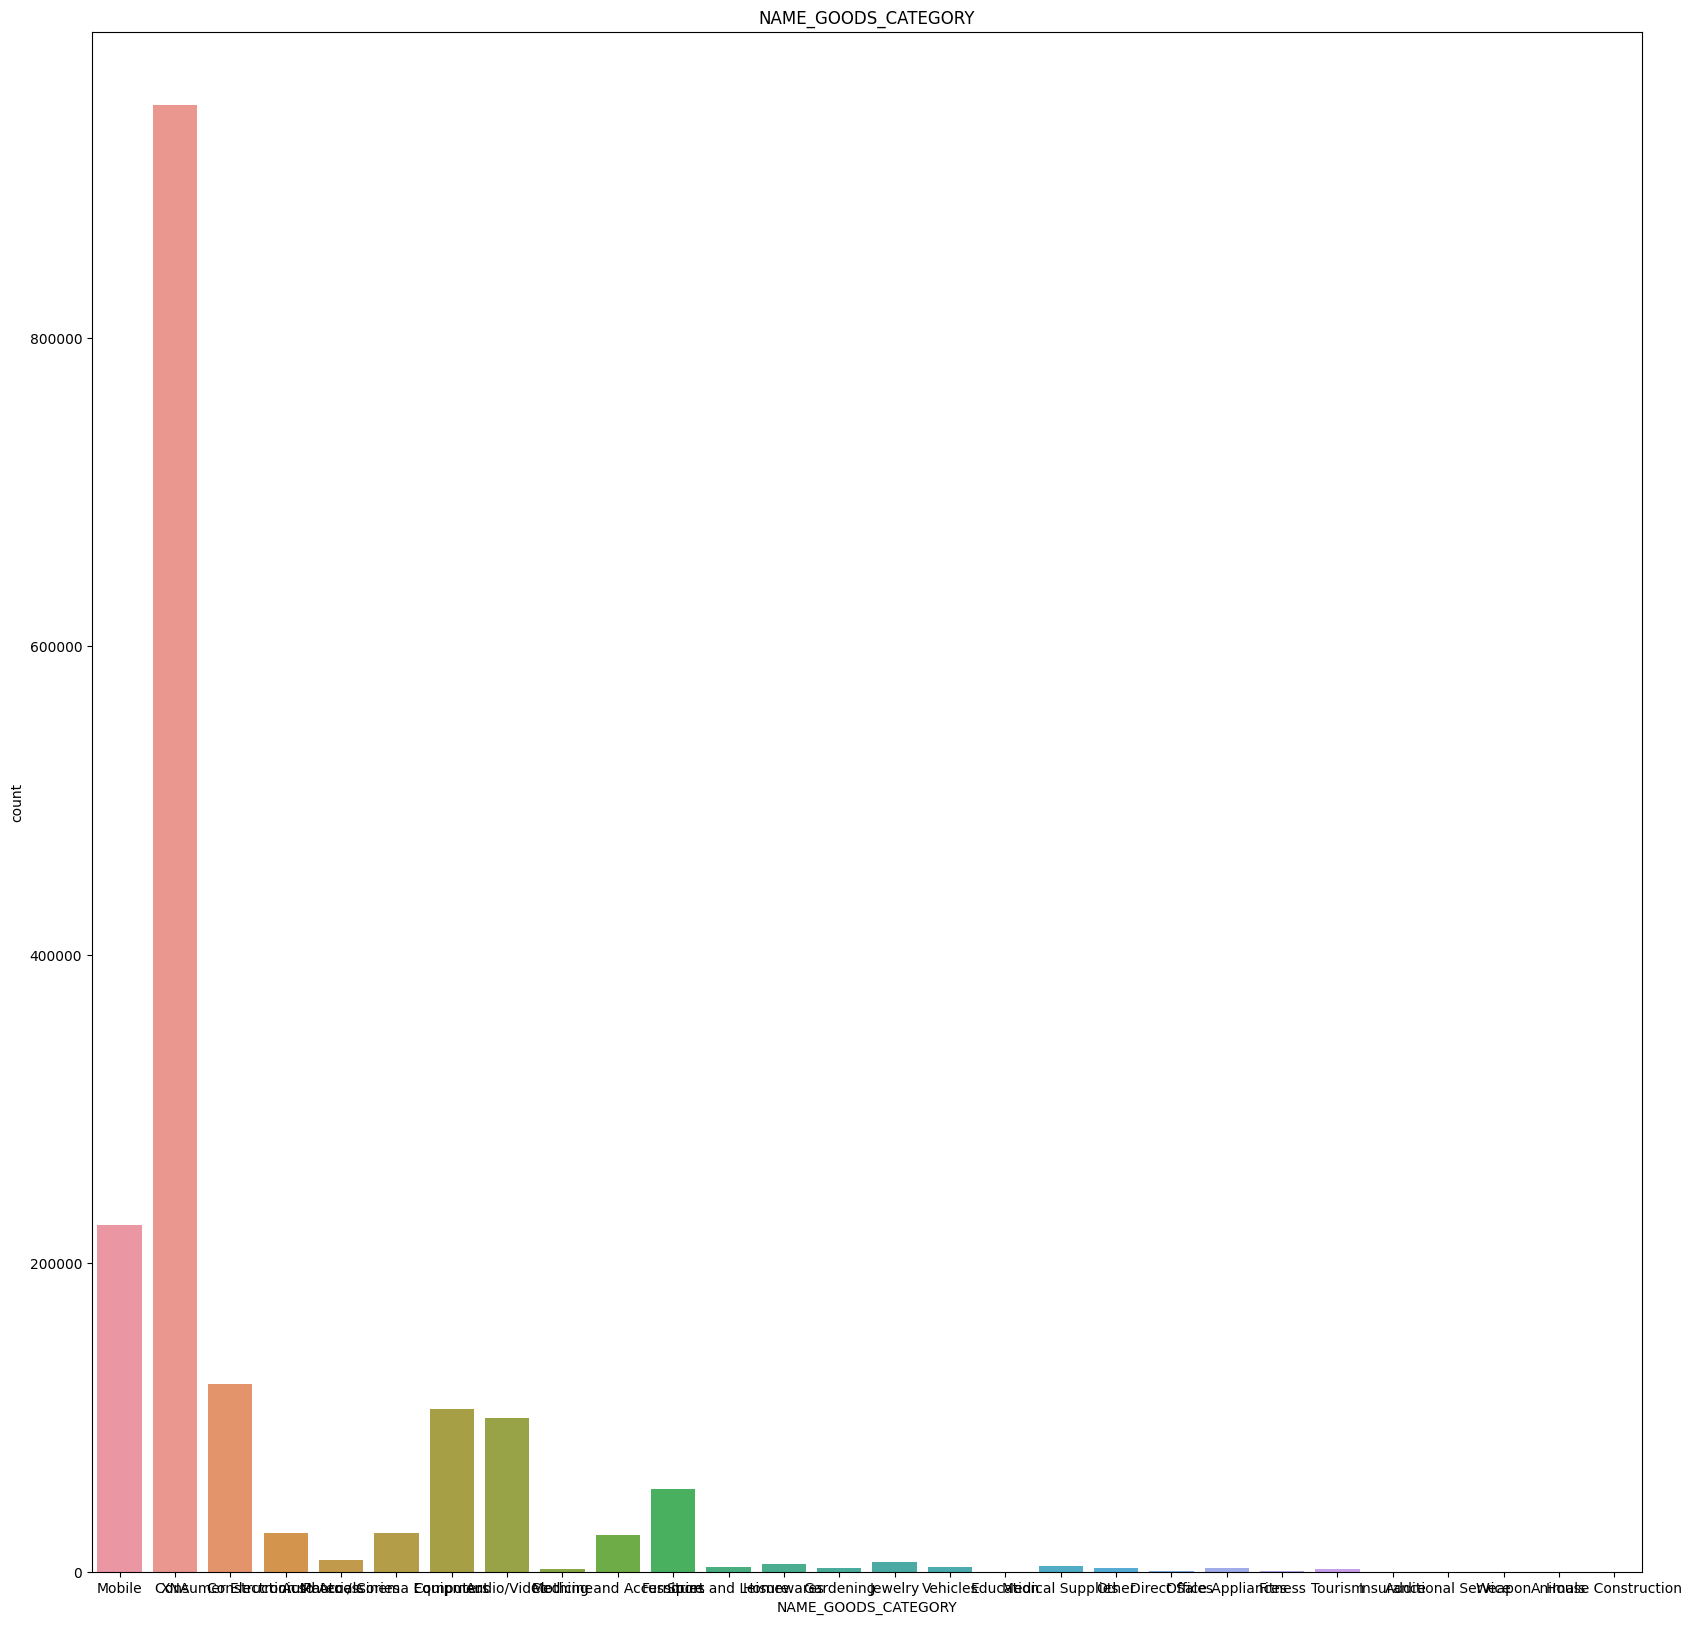

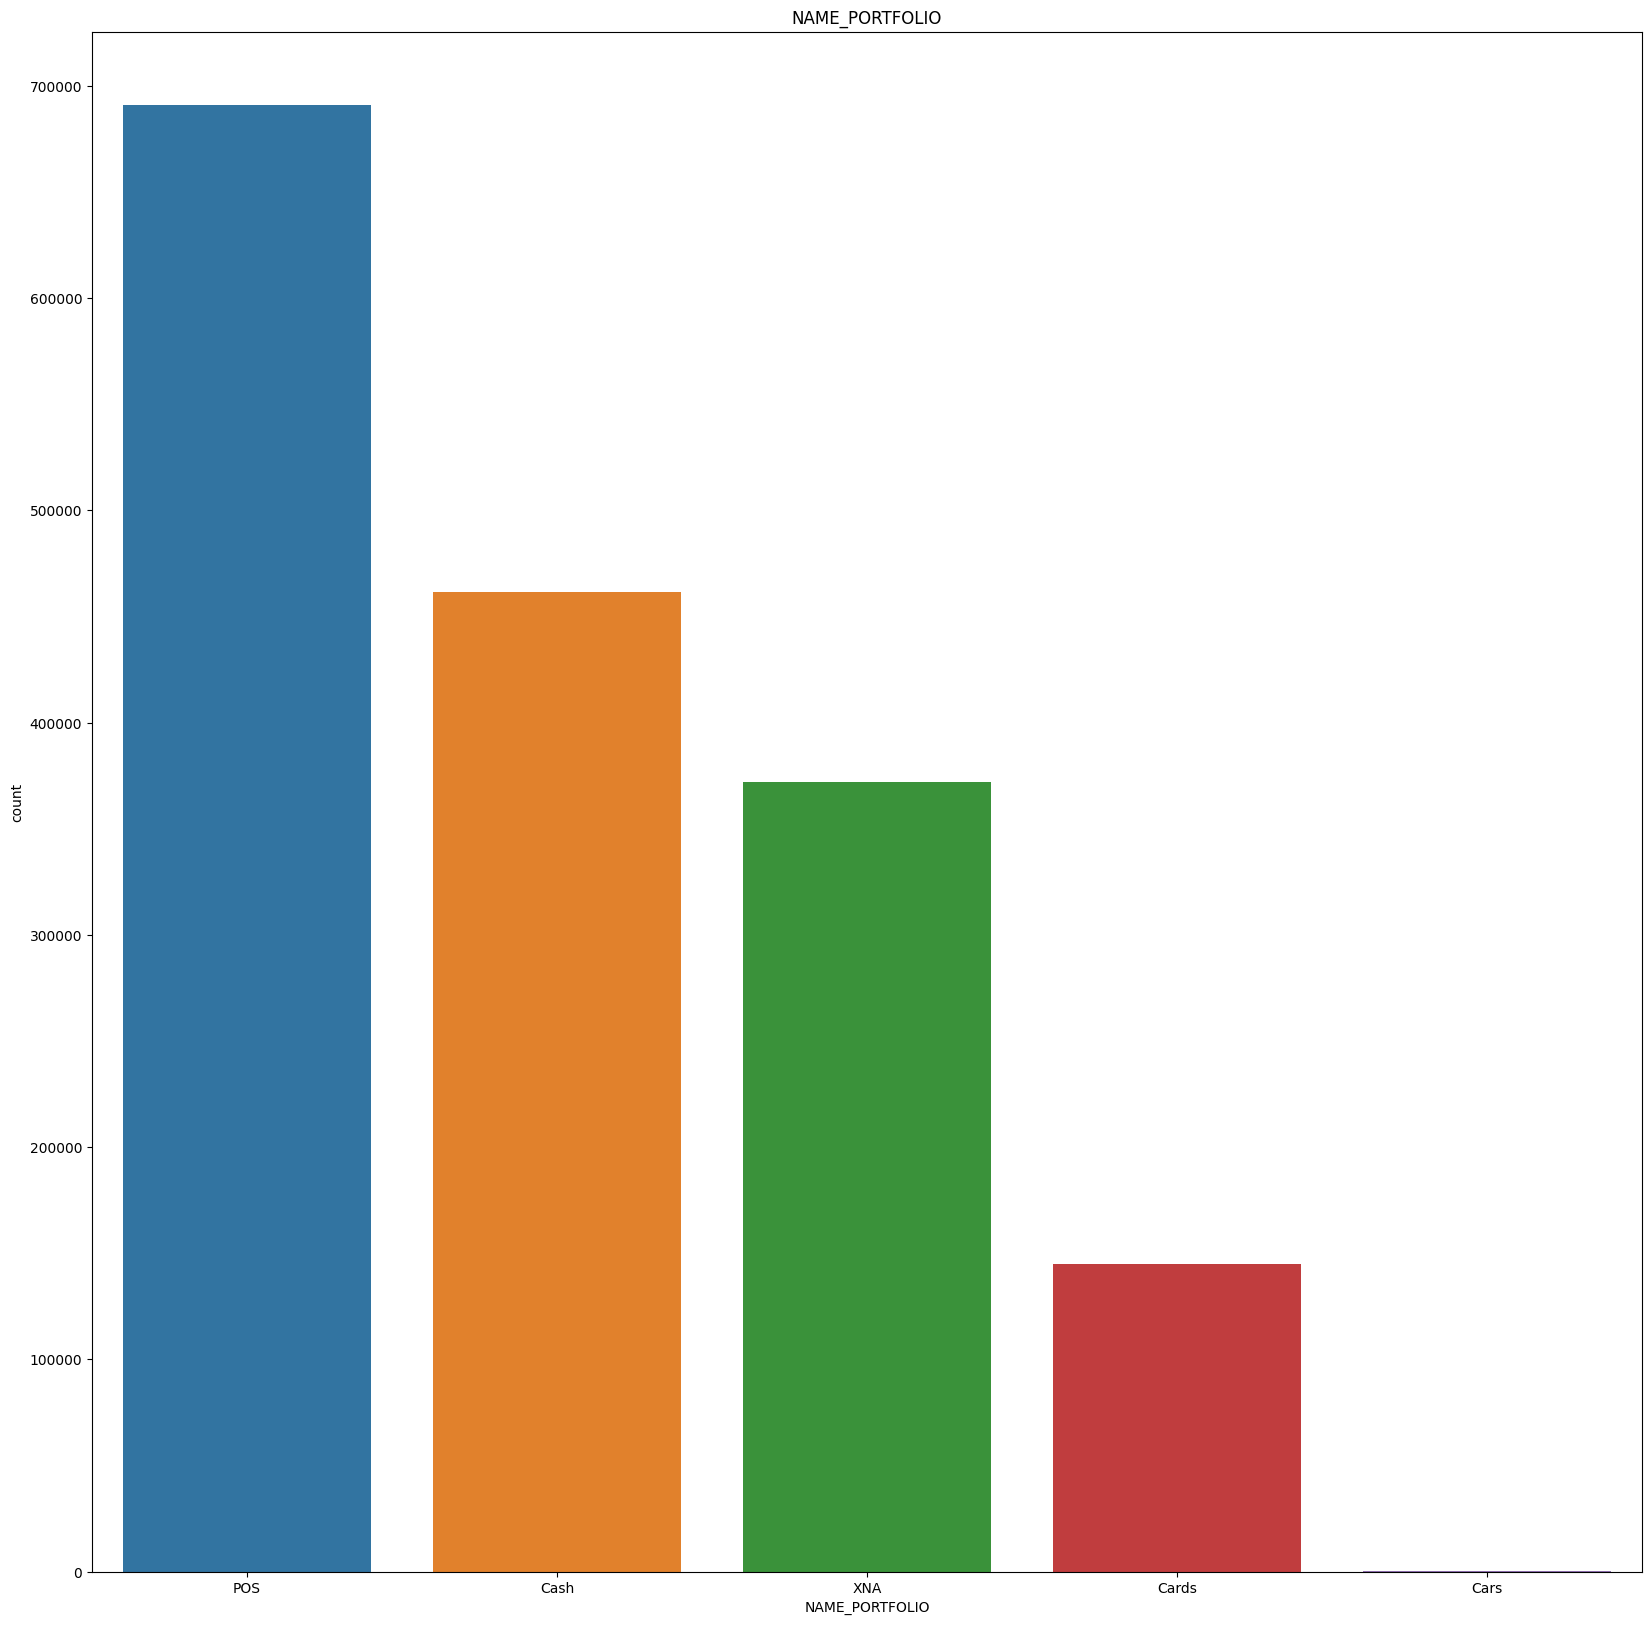

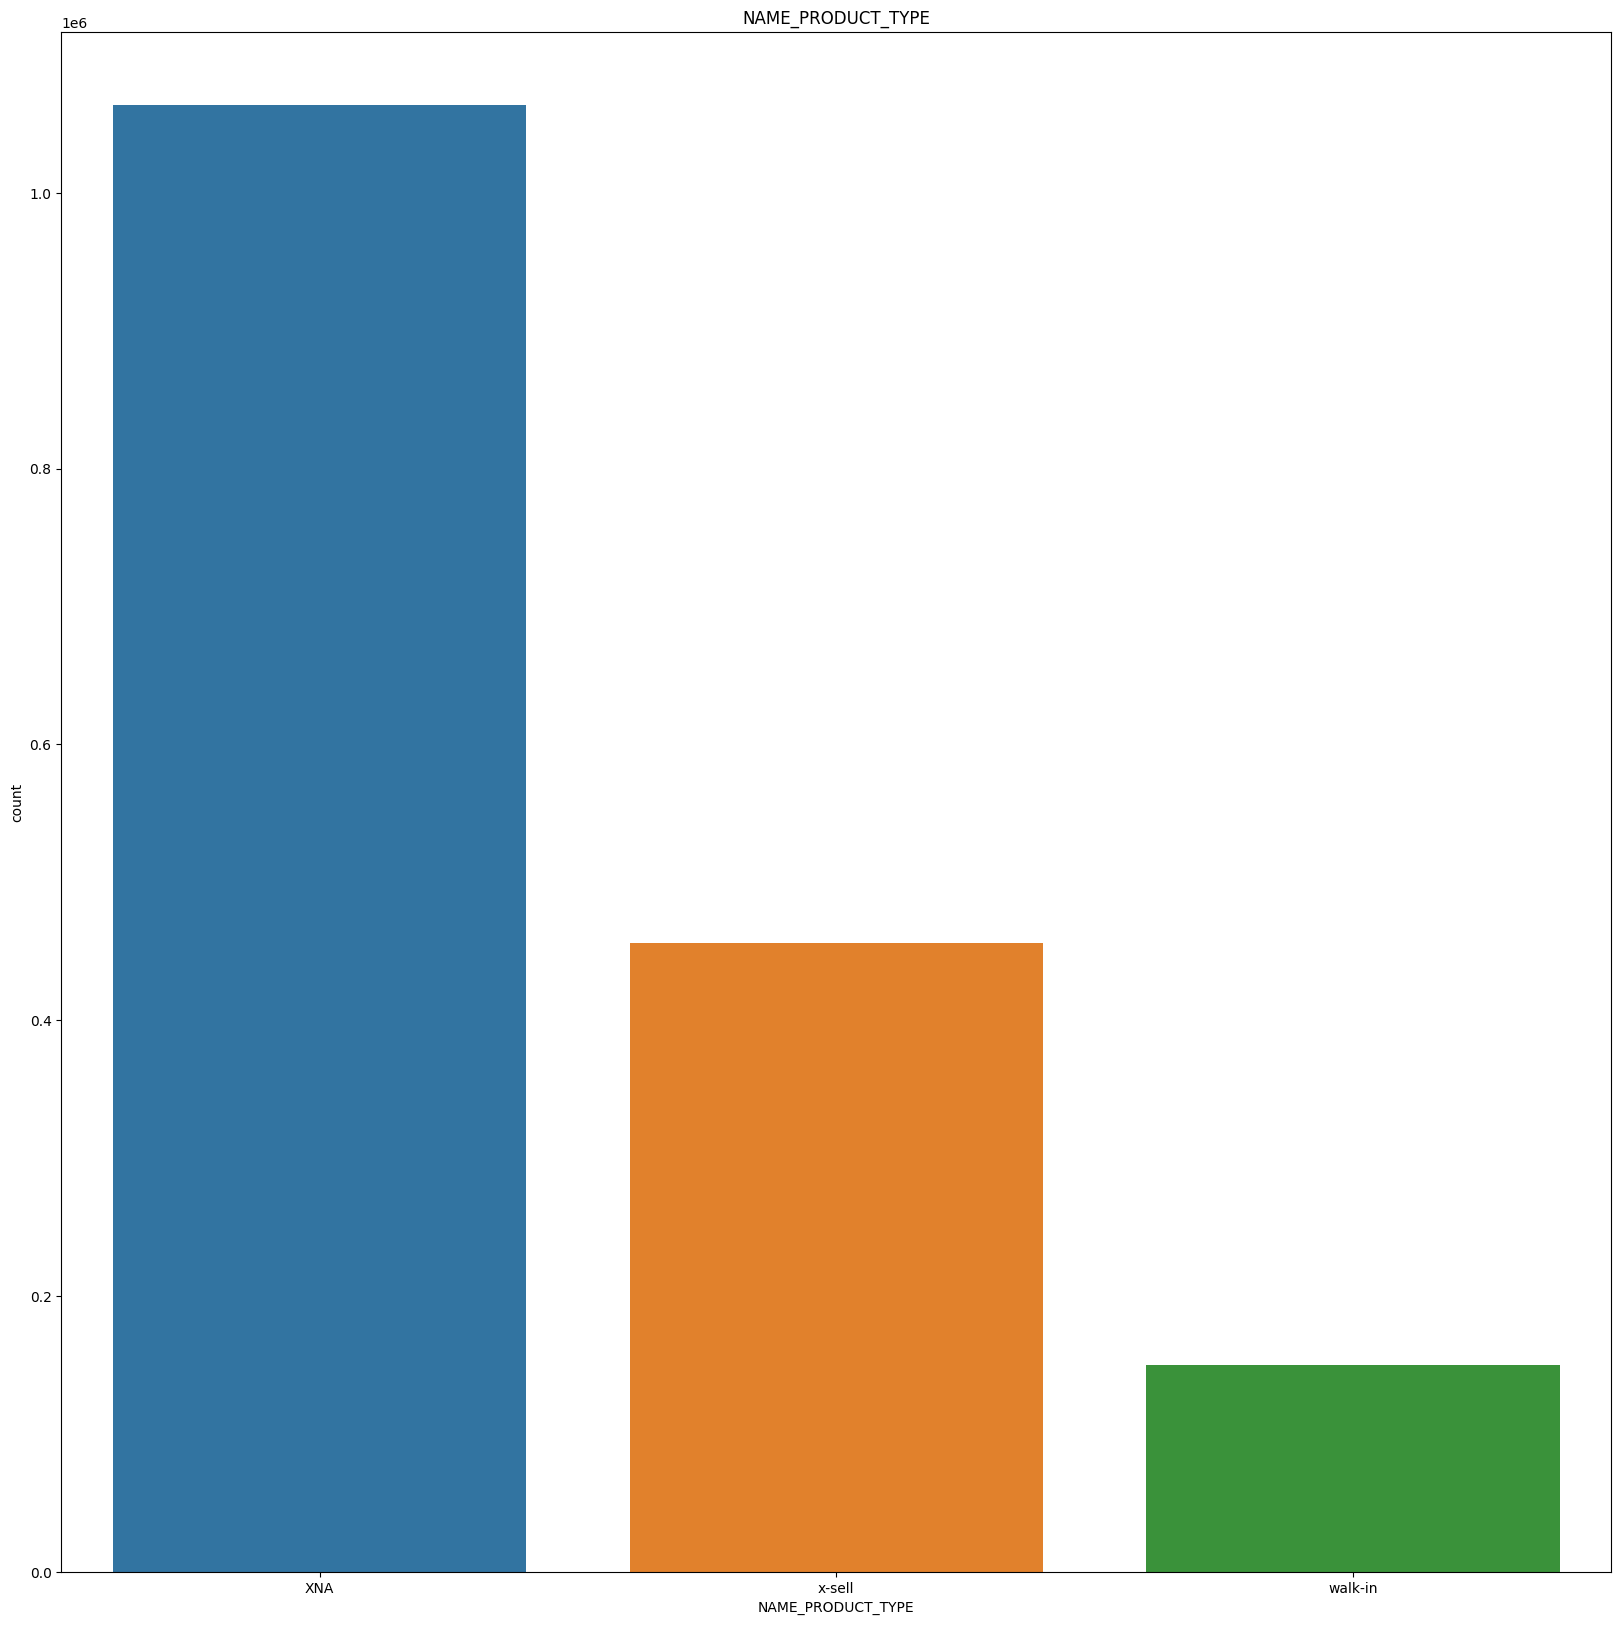

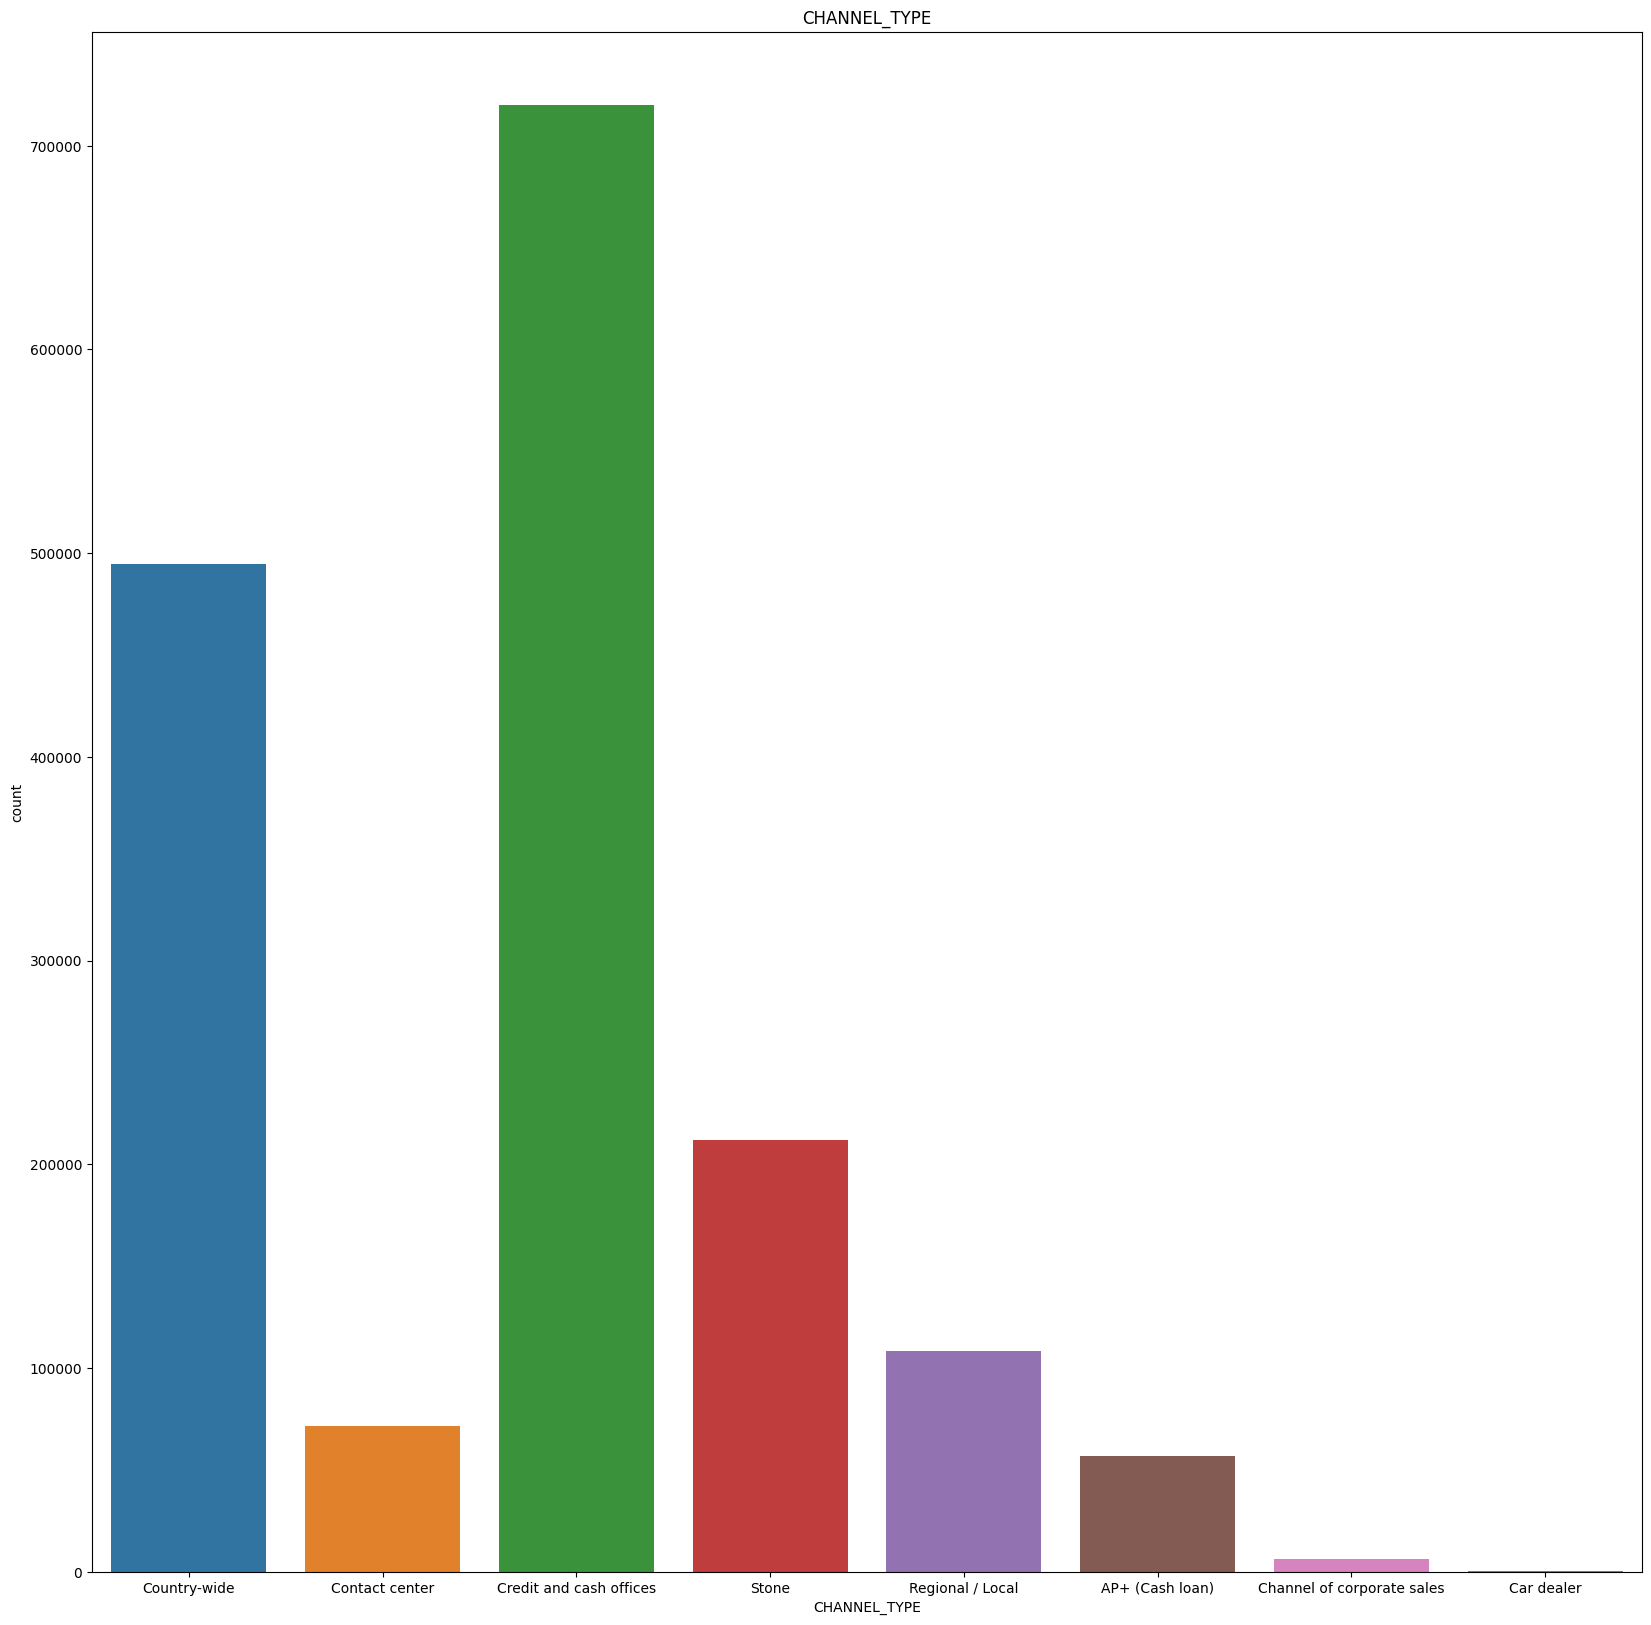

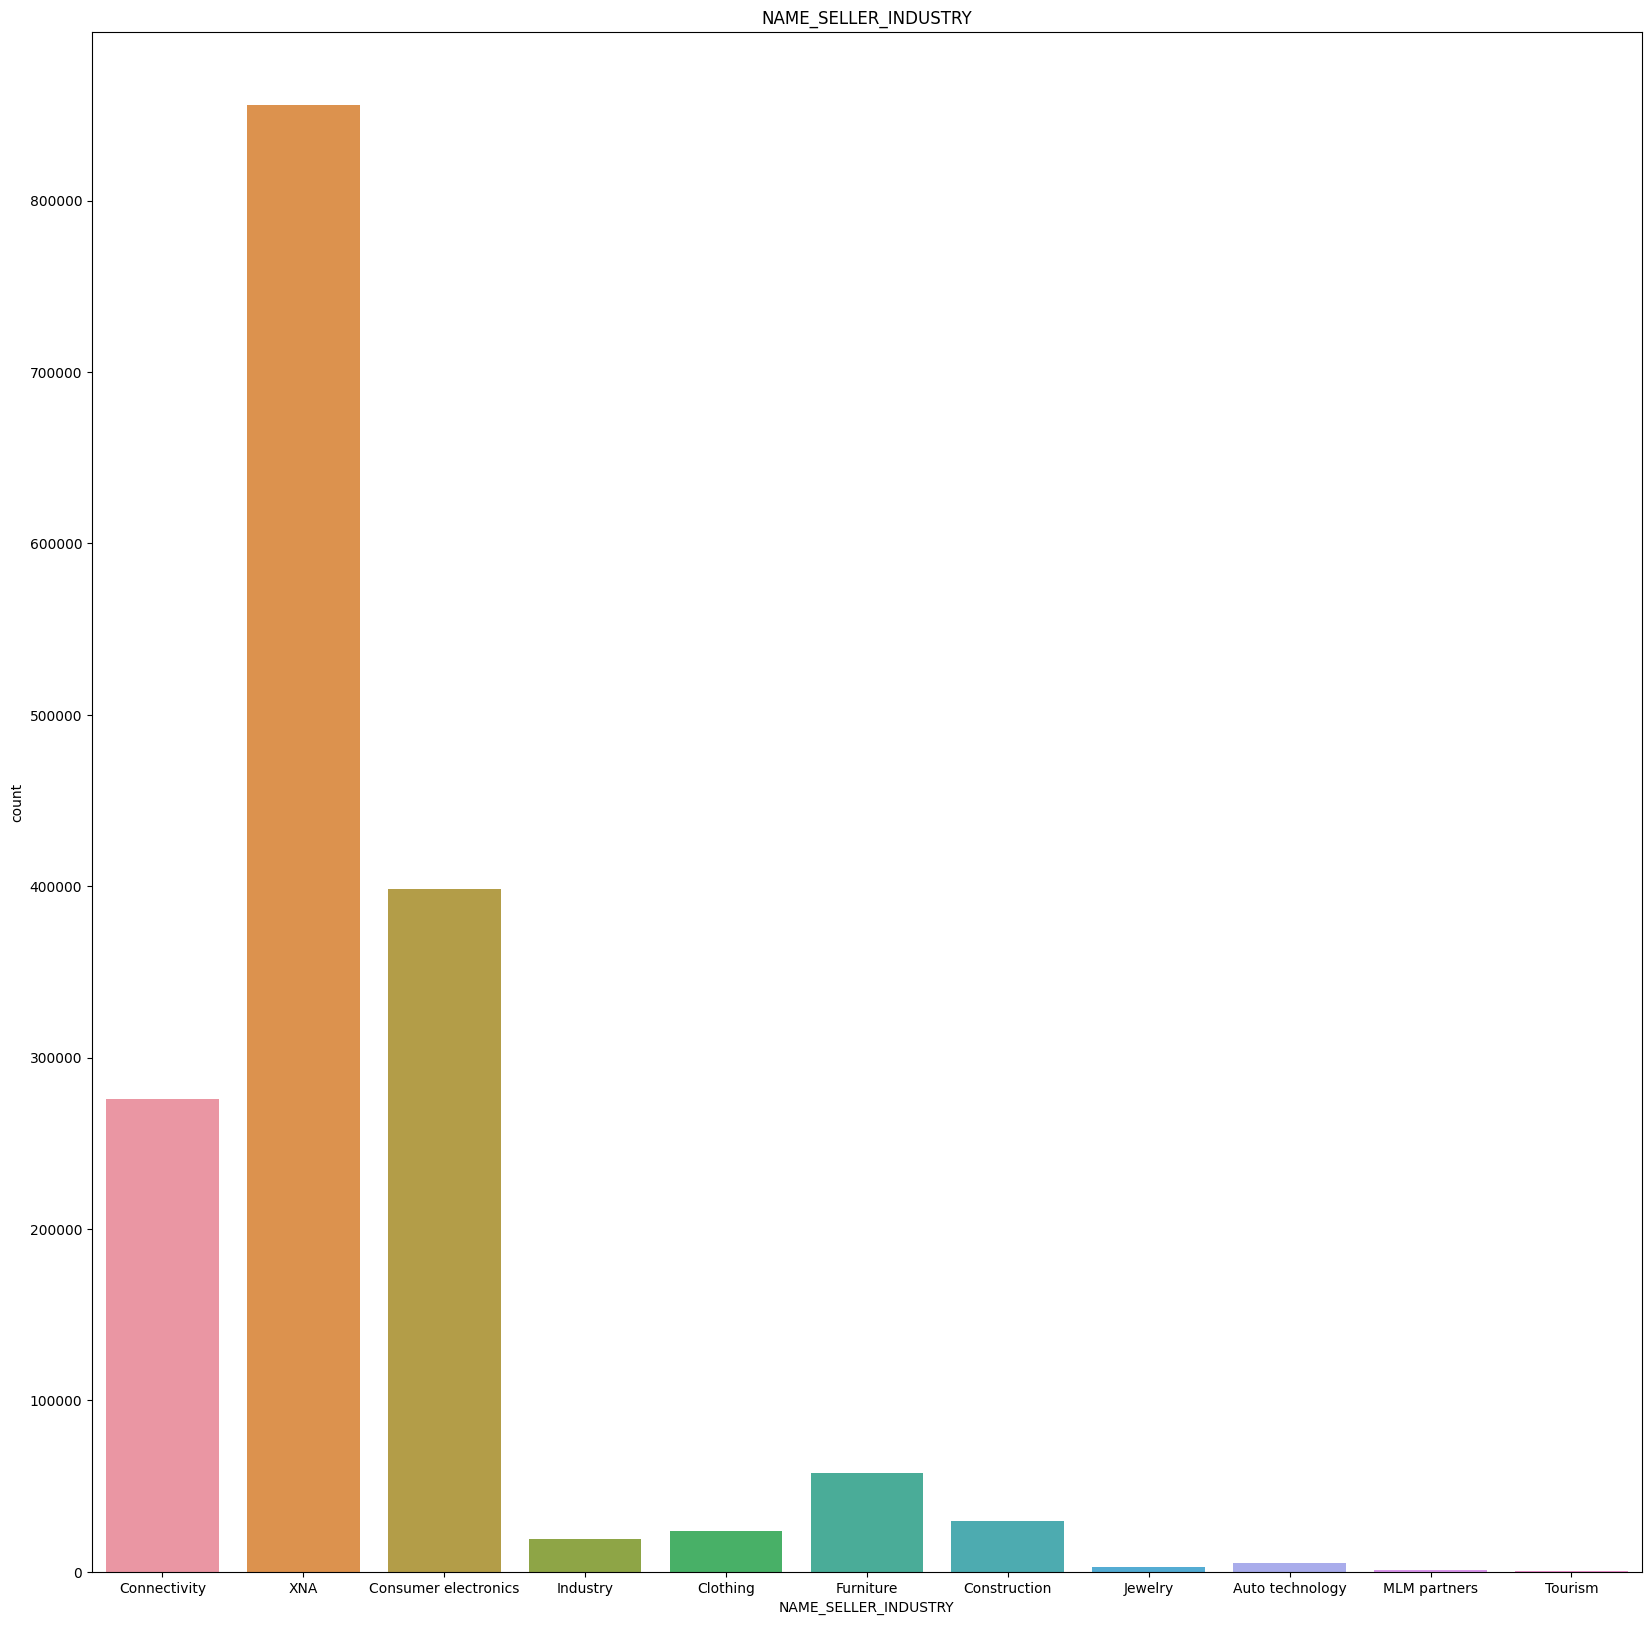

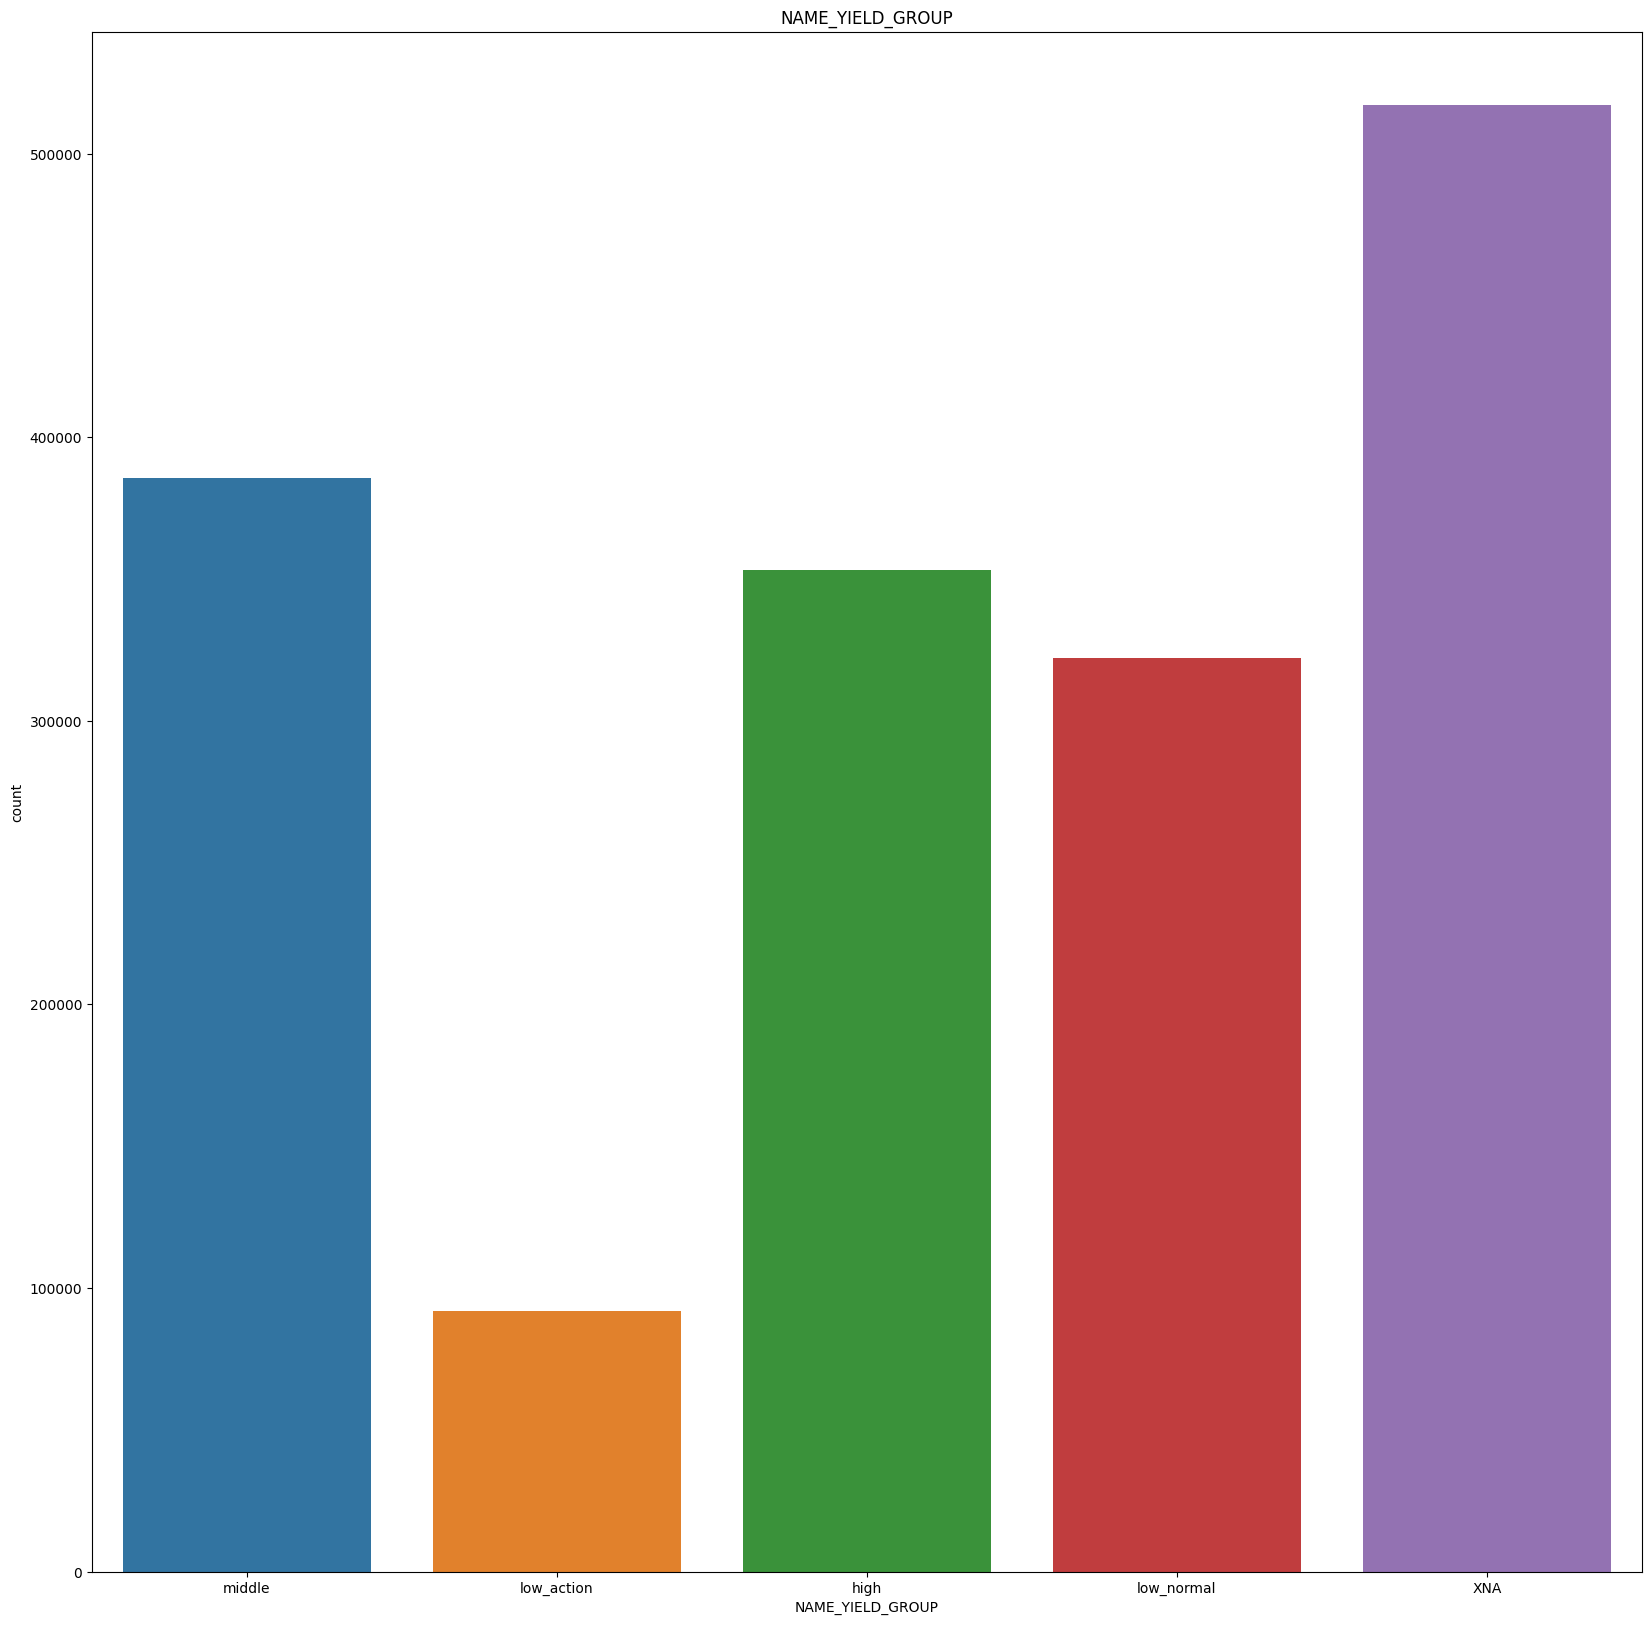

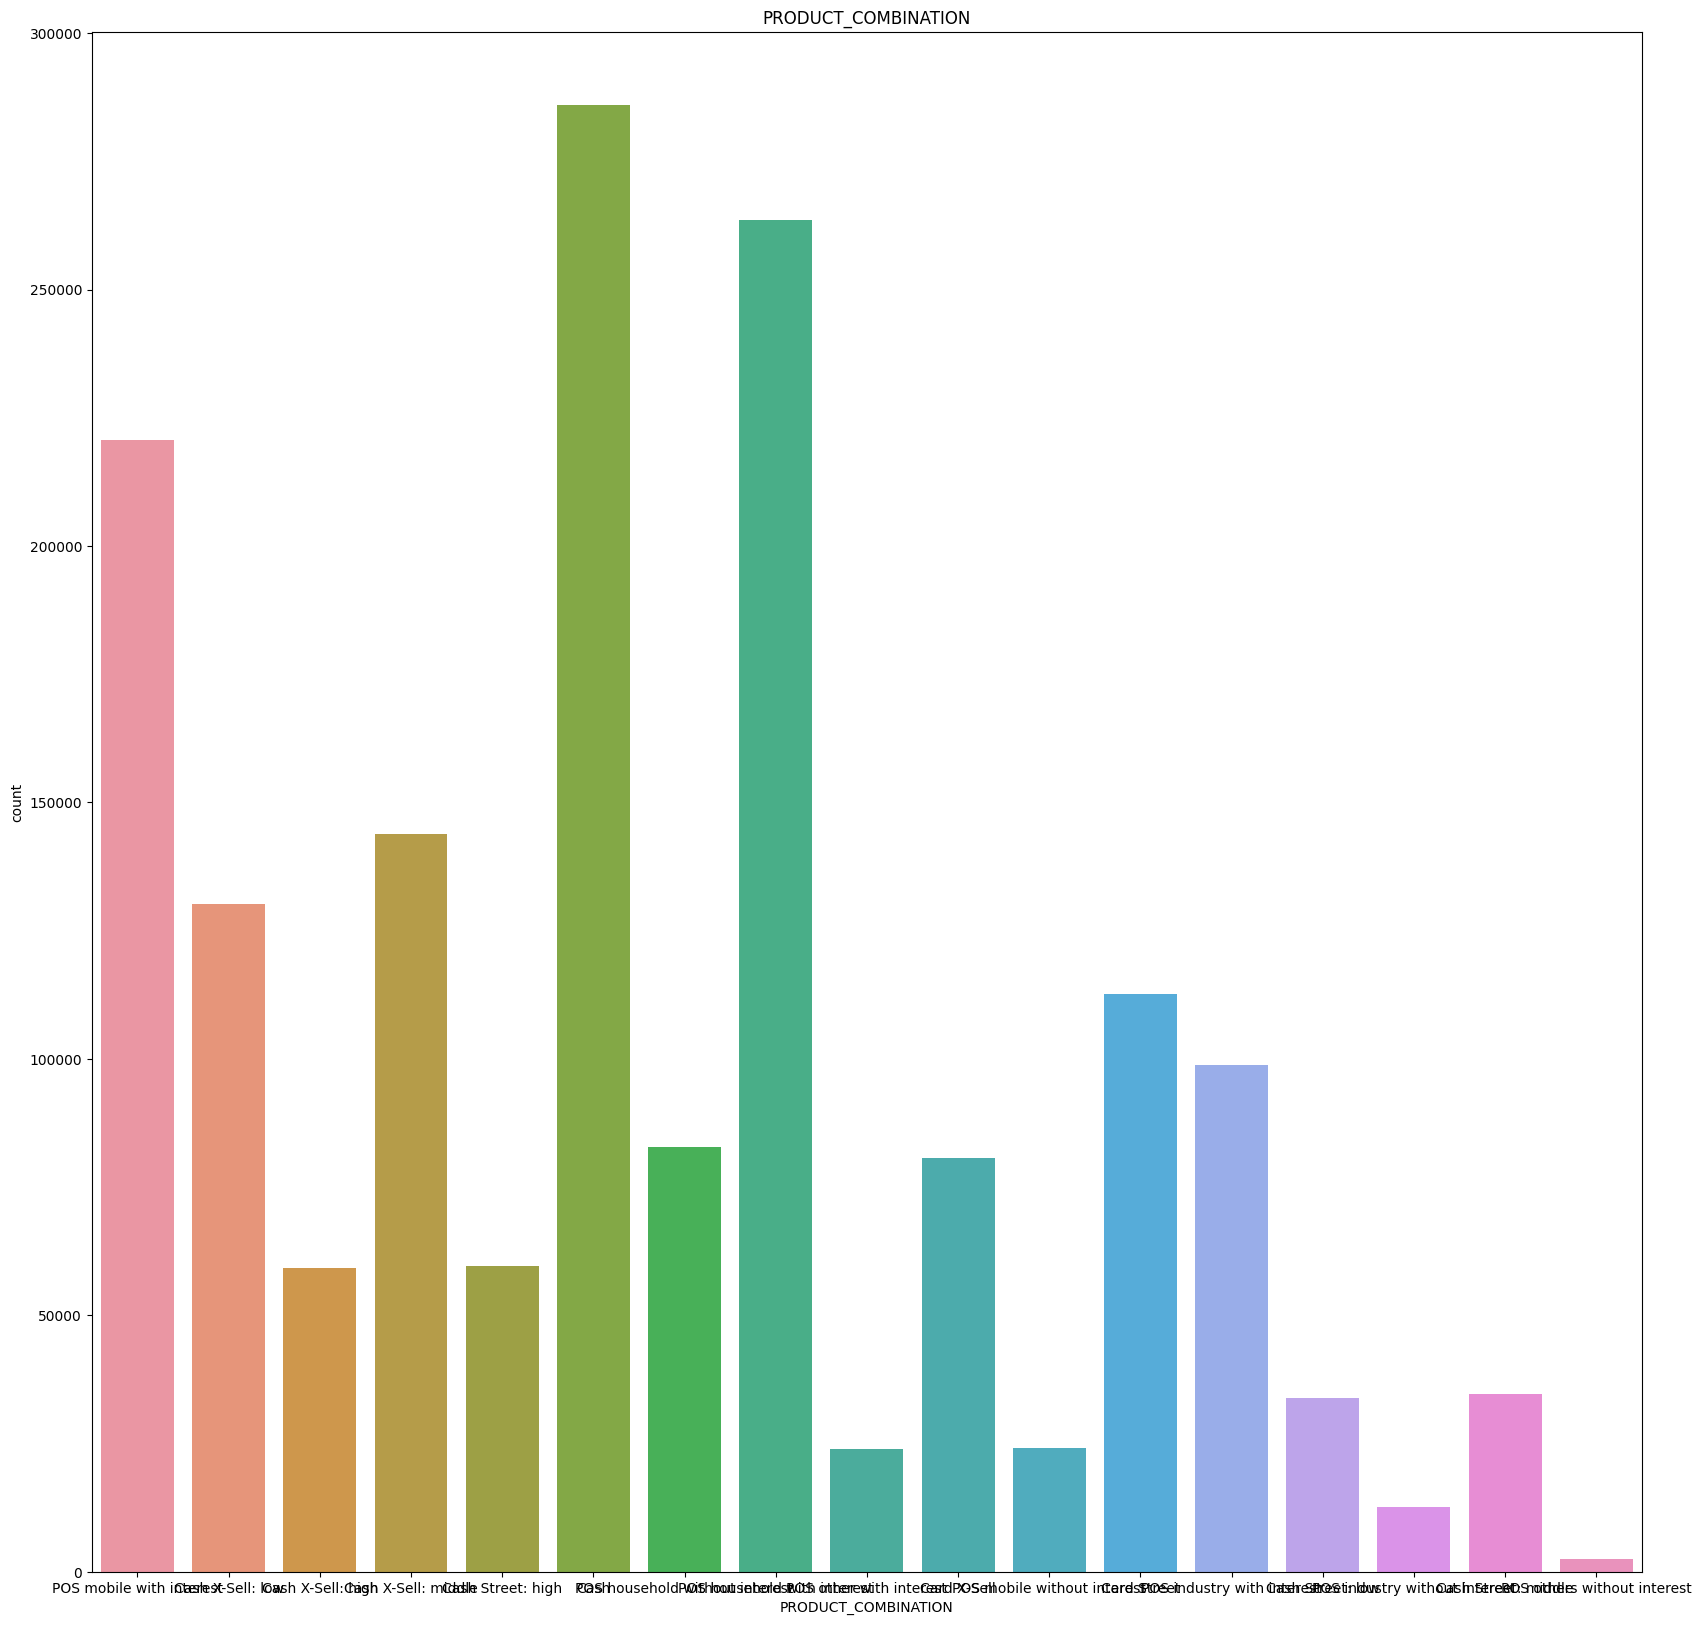

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_prevapp.columns:
        plt.figure(figsize = (20, 20))
        sns.countplot(x=col, data=cat_prevapp)
        plt.title(col)

From the visualization, we can conlude some insights as follows: 
- Most of client was **unaccompanied** when he was applying for the loan
- Most of client was a **repeater** (old) client when applying for the previous application
- After XNA, most of client apply **Mobile** goods in the previous application
- Most of previous application was for **POS** portfolio
- After XNA, most of the previous application was **x-sell**
- Most of client can we acquired through **credit and cash offices** on the previous application
- Most of application was **approved** on the previous application
- From monday to saturday the value of client that apply for loan was almost same. **Sunday** has a less value than the other day


###**Data Cleaning**

In [ ]:
import pandas as pd
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in prev_app.columns:
    # Count the number of missing values
    missing_values = prev_app[col].isnull().sum()
    
    # Count the number of duplicates
    duplicates = prev_app.duplicated().sum()
    
    # Check for outliers (assuming a normal distribution)
    if prev_app[col].dtype in ['int64', 'float64']:
        mean = prev_app[col].mean()
        std = prev_app[col].std()
        outliers = ((prev_app[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

In [ ]:
print('Number of data points : ', prev_app.shape[0])
print('Number of features : ', prev_app.shape[1])

Pada tabel di atas, dapat dilihat bahwa dataset **previous_application.csv** memiliki outlier dan missing value tetapi tidak memiliki duplicate

**Handling Missing Value**

In [ ]:
def count_rows_per_column(df):
  # Count the number of non-missing values in each column
    count_per_column = df.count()
    return count_per_column

count_per_column = count_rows_per_column(prev_app)
count_per_column

SK_ID_PREV                     1670214
SK_ID_CURR                     1670214
NAME_CONTRACT_TYPE             1670214
AMT_ANNUITY                    1297979
AMT_APPLICATION                1670214
AMT_CREDIT                     1670213
AMT_DOWN_PAYMENT                774370
AMT_GOODS_PRICE                1284699
WEEKDAY_APPR_PROCESS_START     1670214
HOUR_APPR_PROCESS_START        1670214
FLAG_LAST_APPL_PER_CONTRACT    1670214
NFLAG_LAST_APPL_IN_DAY         1670214
RATE_DOWN_PAYMENT               774370
RATE_INTEREST_PRIMARY             5951
RATE_INTEREST_PRIVILEGED          5951
NAME_CASH_LOAN_PURPOSE         1670214
NAME_CONTRACT_STATUS           1670214
DAYS_DECISION                  1670214
NAME_PAYMENT_TYPE              1670214
CODE_REJECT_REASON             1670214
NAME_TYPE_SUITE                 849809
NAME_CLIENT_TYPE               1670214
NAME_GOODS_CATEGORY            1670214
NAME_PORTFOLIO                 1670214
NAME_PRODUCT_TYPE              1670214
CHANNEL_TYPE             

Melakukan drop pada kolom dengan value kurang dari 100.000 (memiliki missing value dalam jumlah besar)

In [ ]:
prev_app2 = prev_app.drop(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], axis=1)

In [ ]:
print('Number of data points : ', prev_app2.shape[0])
print('Number of features : ', prev_app2.shape[1])

Number of data points :  1670214
Number of features :  26


Melakukan drop pada kolom yang dirasa tidak diperlukan

In [ ]:
prev_app2 = prev_app2.drop(['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA'], axis=1)

Melakukan drop pada baris dengan status "Canceled" atau "Unused offer" pada kolom 'NAME_CONTRACT_STATUS'

In [ ]:
prev_app2 = prev_app2[~prev_app2['NAME_CONTRACT_STATUS'].isin(['Canceled', 'Unused offer'])]

In [ ]:
print('Number of data points : ', prev_app2.shape[0])
print('Number of features : ', prev_app2.shape[1])

Number of data points :  1327459
Number of features :  26


In [ ]:
# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Outliers'])

# Loop through each column in the dataset
for col in prev_app2.columns:
    # Count the number of missing values
    missing_values = prev_app2[col].isnull().sum()
    
    # Check for outliers (assuming a normal distribution)
    if prev_app2[col].dtype in ['int64', 'float64']:
        mean = prev_app2[col].mean()
        std = prev_app2[col].std()
        outliers = ((prev_app2[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add the row to the table
    table.add_row([col, missing_values, outliers])

# Print the table
print(table)

+-----------------------------+----------------+----------+
|           Variable          | Missing Values | Outliers |
+-----------------------------+----------------+----------+
|          SK_ID_PREV         |       0        |    0     |
|          SK_ID_CURR         |       0        |    0     |
|      NAME_CONTRACT_TYPE     |       0        |   N/A    |
|         AMT_ANNUITY         |     40906      |  22677   |
|       AMT_APPLICATION       |       0        |  33206   |
|          AMT_CREDIT         |       1        |  38037   |
|       AMT_GOODS_PRICE       |     79940      |  31390   |
|  WEEKDAY_APPR_PROCESS_START |       0        |   N/A    |
|   HOUR_APPR_PROCESS_START   |       0        |   1078   |
| FLAG_LAST_APPL_PER_CONTRACT |       0        |   N/A    |
|    NFLAG_LAST_APPL_IN_DAY   |       0        |   5887   |
|    NAME_CASH_LOAN_PURPOSE   |       0        |   N/A    |
|     NAME_CONTRACT_STATUS    |       0        |   N/A    |
|        DAYS_DECISION        |       0 

Mengisi missing value

In [ ]:
prev_app2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe()

AMT_ANNUITY  AMT_GOODS_PRICE   CNT_PAYMENT
count  1.286553e+06     1.247519e+06  1.286558e+06
mean   1.584209e+04     2.273962e+05  1.588551e+01
std    1.469455e+04     3.128625e+05  1.440382e+01
min    0.000000e+00     0.000000e+00  0.000000e+00
25%    6.294870e+03     5.130000e+04  6.000000e+00
50%    1.125000e+04     1.125000e+05  1.200000e+01
75%    2.042847e+04     2.348100e+05  2.400000e+01
max    4.180581e+05     6.905160e+06  8.400000e+01

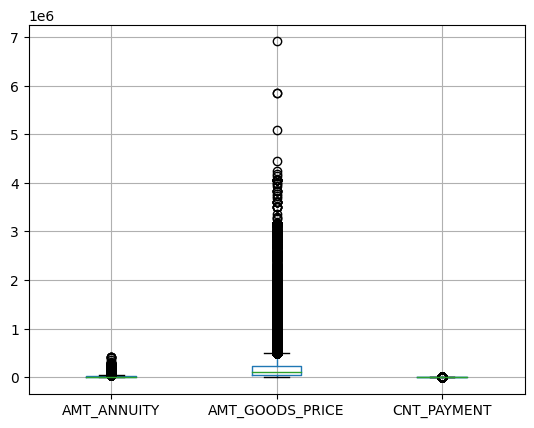

In [ ]:
prev_app2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].boxplot()
plt.show()

Karena data memiliki outlier, maka missing value akan diisi dengan nilai median yang robust akan outlier

In [ ]:
median_values = prev_app2.median()
print(median_values)

SK_ID_PREV                 1911449.00
SK_ID_CURR                  278654.00
AMT_ANNUITY                  11250.00
AMT_APPLICATION             101110.32
AMT_CREDIT                  112905.00
AMT_GOODS_PRICE             112500.00
HOUR_APPR_PROCESS_START         12.00
NFLAG_LAST_APPL_IN_DAY           1.00
DAYS_DECISION                 -776.00
SELLERPLACE_AREA                25.00
CNT_PAYMENT                     12.00
dtype: float64


<ipython-input-85-b7f8648f1541>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = prev_app2.median()


In [ ]:
prev_app2.replace(0, np.nan, inplace=True)
prev_app2.fillna(median_values, inplace=True)

feature PRODUCT_COMBINATION merupakan variabel kategorik sehingga missing value diisi dengan nilai modus

In [ ]:
mode_values = prev_app2['PRODUCT_COMBINATION'].mode()[0]
print(mode_values)

POS household with interest


In [ ]:
prev_app2.replace(0, np.nan, inplace=True)
prev_app2['PRODUCT_COMBINATION'].fillna(mode_values, inplace = True)

**Drop Outlier**

In [ ]:
prev_app2.boxplot()
plt.show()

In [ ]:
Q1 = prev_app2.quantile(0.25)
Q3 = prev_app2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (prev_app2 < (Q1 - 1.5 * IQR)) | (prev_app2 > (Q3 + 1.5 * IQR))
prev_app2 = prev_app2[~outliers.any(axis=1)]

In [ ]:
prev_app2.boxplot()
plt.show()

In [ ]:
print('Number of data points : ', prev_app2.shape[0])
print('Number of features : ', prev_app2.shape[1])
prev_app2.head()

In [ ]:
# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in prev_app2.columns:
    # Count the number of missing values
    missing_values = prev_app2[col].isnull().sum()
    
    # Count the number of duplicates
    duplicates = prev_app2.duplicated().sum()
    
    # Check for outliers (assuming a normal distribution)
    if prev_app2[col].dtype in ['int64', 'float64']:
        mean = prev_app2[col].mean()
        std = prev_app2[col].std()
        outliers = ((prev_app2[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

###**Feature Engineering**

####**Melakukan Improvement Pada Beberapa Feature**

In [ ]:
#NAME_GOODS_CATEGORY
ngc = ['Auto Accessories', 'Jewelry', 'Homewares', 'Medical Supplies', 'Vehicles', 'Sport and Leisure', 
         'Gardening', 'Other', 'Office Appliances', 'Tourism', 'Medicine', 'Direct Sales', 'Fitness', 'Additional Service', 
         'Education', 'Weapon', 'Insurance', 'House Construction', 'Animals'] 
prev_app2["NAME_GOODS_CATEGORY"] = prev_app2["NAME_GOODS_CATEGORY"].replace(ngc, 'others')

In [ ]:
prev_app2["NAME_GOODS_CATEGORY"].value_counts()

XNA                         383684
Mobile                      196442
Computers                    59997
Consumer Electronics         55398
Audio/Video                  41772
Furniture                    39233
others                       32295
Construction Materials       18967
Clothing and Accessories     18831
Photo / Cinema Equipment     15786
Name: NAME_GOODS_CATEGORY, dtype: int64

In [ ]:
#CHANNEL_TYPE
ct = ['AP+ (Cash loan)', 'Channel of corporate sales', 'Car dealer']
prev_app2["CHANNEL_TYPE"] = prev_app2["CHANNEL_TYPE"].replace(ct, 'Other_Channel')

In [ ]:
prev_app2["CHANNEL_TYPE"].value_counts()

Country-wide               285677
Credit and cash offices    261825
Stone                      174445
Regional / Local            82467
Other_Channel               36516
Contact center              21475
Name: CHANNEL_TYPE, dtype: int64

In [ ]:
#NAME_SELLER_INDUSTRY
nsi = ['Auto technology', 'Jewelry', 'MLM partners', 'Tourism']
prev_app2["NAME_SELLER_INDUSTRY"] = prev_app2["NAME_SELLER_INDUSTRY"].replace(nsi, 'Others')

In [ ]:
prev_app2["NAME_SELLER_INDUSTRY"].value_counts()

XNA                     321169
Connectivity            247258
Consumer electronics    186887
Furniture                41796
Construction             22382
Clothing                 19203
Industry                 15857
Others                    7853
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [ ]:
#NAME_CASH_LOAN_PURPOSE
nclp = ['Refusal to name the goal', 'Money for a third person', 'Buying a garage','Gasification / water supply',
     'Hobby','Business development','Buying a holiday home / land','Furniture','Car repairs',
     'Buying a home','Wedding / gift / holiday']
prev_app2["NAME_CASH_LOAN_PURPOSE"] = prev_app2["NAME_CASH_LOAN_PURPOSE"].replace(nclp, 'Other_Loan')

In [ ]:
prev_app2["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 603461
XNA                                 224618
Repairs                              10104
Other                                 8989
Urgent needs                          5258
Other_Loan                            1961
Everyday expenses                     1929
Medicine                              1520
Education                             1178
Purchase of electronic equipment       868
Journey                                753
Buying a used car                      717
Building a house or an annex           496
Payments on other loans                453
Buying a new car                       100
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [ ]:
#WEEKDAY_APPR_PROCESS_START
weekend = ["SATURDAY","SUNDAY"]                              

prev_app2["WEEKDAY_APPR_PROCESS_START"] = prev_app2["WEEKDAY_APPR_PROCESS_START"].apply(lambda x : "WEEKEND" if x in weekend else "WEEKDAY")

In [ ]:
prev_app2["WEEKDAY_APPR_PROCESS_START"].value_counts()

WEEKDAY    643300
WEEKEND    219105
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

####**Menambah Feature Baru**

In [ ]:
prev_app2['NEW_APP_CREDIT_RATE'] = prev_app2['AMT_APPLICATION'] / prev_app2['AMT_CREDIT']
prev_app2['NEW_AMT_PAYMENT_RATE'] = prev_app2['AMT_CREDIT'] / prev_app2['AMT_ANNUITY']
prev_app2['NEW_APP_GOODS_RATE'] = prev_app2['AMT_APPLICATION'] / prev_app2['AMT_GOODS_PRICE']
prev_app2['NEW_CREDIT_GOODS_RATE'] = prev_app2['AMT_CREDIT'] / prev_app2['AMT_GOODS_PRICE']
prev_app2['NEW_RETURN_DAY'] =  prev_app2['DAYS_DECISION'] + prev_app2['CNT_PAYMENT'] * 30
prev_app2["NEW_APP_CREDIT_RATE_RATIO"] = prev_app2["NEW_APP_CREDIT_RATE"].apply(lambda x: 1 if(x<=1) else 0)

- **NEW_AMT_CTEDIT_RATE:** Received Amount Rate 
- **NEW_AMT_PAYMENT_RATE:** The ratio of the loan received to the monthly payment
- **NEW_APP_GOODS_RATE:** Application per goods rate
- **NEW_CREDIT_GOODS_RATE:** Received per goods rate
- **NEW_RETURN_DAY:** return loan day
- **NEW_APP_CREDIT_RATE_RATIO:** If x <= 1, a client got the desired loan or more

####**One Hot Encoding**

In [ ]:
# assuming prev_app2 is the original dataframe with both numerical and categorical columns
num_prevapp2 = prev_app2.select_dtypes(include=['float64', 'int64'])
cat_prevapp2 = prev_app2.select_dtypes(include=['object'])

# perform one-hot encoding for each categorical column
encoded_cols = []
for col in cat_prevapp2:
    one_hot = pd.get_dummies(cat_prevapp2[col], prefix=col)
    encoded_cols.append(one_hot)

# concatenate the original numerical columns and the one-hot encoded categorical columns
prev_app3 = pd.concat([num_prevapp2] + encoded_cols, axis=1)

# display the encoded dataframe
prev_app3.head()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      2030495      271877     1730.430          17145.0     17145.0   
2      2523466      122040    15060.735         112500.0    136444.5   
4      1784265      202054    31924.395         337500.0    404055.0   
5      1383531      199383    23703.930         315000.0    340573.5   
11     2257824      161140    13832.775         211500.0    246397.5   

    AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
0           17145.0                     15.0                     1.0   
2          112500.0                     11.0                     1.0   
4          337500.0                      9.0                     1.0   
5          315000.0                      8.0                     1.0   
11         211500.0                     10.0                     1.0   

    DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  NEW_APP_CREDIT_RATE  \
0             -73              35.0         12.0             1.000000   
2            -301              -1.0         12.0             0.824511   
4            -781              -1.0         24.0             0.835282   
5            -684              -1.0         18.0             0.924910   
11           -815              -1.0         30.0             0.858369   

    NEW_AMT_PAYMENT_RATE  NEW_APP_GOODS_RATE  NEW_CREDIT_GOODS_RATE  \
0               9.907942                 1.0               1.000000   
2               9.059618                 1.0               1.212840   
4              12.656622                 1.0               1.197200   
5              14.367807                 1.0               1.081186   
11             17.812586                 1.0               1.165000   

    NEW_RETURN_DAY  NEW_APP_CREDIT_RATE_RATIO  NAME_CONTRACT_TYPE_Cash loans  \
0            287.0                          1                              0   
2             59.0                          1                              1   
4            -61.0                          1                              1   
5           -144.0                          1                              1   
11            85.0                          1                              1   

    NAME_CONTRACT_TYPE_Consumer loans  NAME_CONTRACT_TYPE_Revolving loans  \
0                                   1                                   0   
2                                   0                                   0   
4                                   0                                   0   
5                                   0                                   0   
11                                  0                                   0   

    NAME_CONTRACT_TYPE_XNA  WEEKDAY_APPR_PROCESS_START_WEEKDAY  \
0                        0                                   0   
2                        0                                   1   
4                        0                                   1   
5                        0                                   0   
11                       0                                   1   

    WEEKDAY_APPR_PROCESS_START_WEEKEND  FLAG_LAST_APPL_PER_CONTRACT_N  \
0                                    1                              0   
2                                    0                              0   
4                                    0                              0   
5                                    1                              0   
11                                   0                              0   

    FLAG_LAST_APPL_PER_CONTRACT_Y  \
0                               1   
2                               1   
4                               1   
5                               1   
11                              1   

    NAME_CASH_LOAN_PURPOSE_Building a house or an annex  \
0                                                   0     
2                                                   0     
4                                                   0     
5                                

In [ ]:
print('Number of data points : ', prev_app3.shape[0])
print('Number of features : ', prev_app3.shape[1])

Number of data points :  862405
Number of features :  111


####**Aggregate**

In [ ]:
from scipy.stats import mode

def FE_previous_application(prev_app3):
    prev_app_agg = {'SK_ID_CURR': ['max', 'mean']}
    
    for column in prev_app3.columns:
        if column not in ['SK_ID_PREV', 'SK_ID_CURR']:
            if prev_app3[column].dtype == 'object':
                prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None
            elif set(prev_app3[column].unique()) == {0, 1}:
                prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None
            else:
                prev_app_agg[column] = 'mean'
    
    prev_app_final_agg = prev_app3.groupby('SK_ID_CURR').agg(prev_app_agg)

    col_list_1 = []
    for col in prev_app_final_agg.columns.tolist():
        col_list_1.append(col[0] + "_" + col[1].upper())

    prev_app_final_agg.columns = pd.Index(col_list_1)
    prev_app_final_agg.reset_index(inplace=True)

    # Join the original SK_ID_PREV column with the aggregated dataset
    prev_app_final_agg = prev_app_final_agg.join(prev_app3[['SK_ID_CURR', 'SK_ID_PREV']].set_index('SK_ID_CURR'), on='SK_ID_CURR')

    return prev_app_final_agg

In [ ]:
prev_app4 = FE_previous_application(prev_app3)

In [ ]:
print('Number of data points : ', prev_app4.shape[0])
print('Number of features : ', prev_app4.shape[1])

Number of data points :  298656
Number of features :  444


In [ ]:
prev_app4.head(10)

SK_ID_CURR_MIN  SK_ID_CURR_MAX  SK_ID_CURR_MEAN  SK_ID_CURR_SIZE  \
SK_ID_CURR                                                                     
100001              100001          100001         100001.0                1   
100003              100003          100003         100003.0                1   
100004              100004          100004         100004.0                1   
100005              100005          100005         100005.0                1   
100006              100006          100006         100006.0                3   
...                    ...             ...              ...              ...   
456251              456251          456251         456251.0                1   
456252              456252          456252         456252.0                1   
456253              456253          456253         456253.0                2   
456254              456254          456254         456254.0                1   
456255              456255          456255         456255.0                5   

            SK_ID_PREV_MIN  SK_ID_PREV_MAX  SK_ID_PREV_MEAN  SK_ID_PREV_SIZE  \
SK_ID_CURR                                                                     
100001             1369693         1369693        1369693.0                1   
100003             2396755         2396755        2396755.0                1   
100004             1564014         1564014        1564014.0                1   
100005             2495675         2495675        2495675.0                1   
100006             1020698         2299329        1603141.0                3   
...                    ...             ...              ...              ...   
456251             2248017         2248017        2248017.0                1   
456252             1503599         1503599        1503599.0                1   
456253             1668235         1686207        1677221.0                2   
456254             1792910         1792910        1792910.0                1   
456255             1179690         2729207        1809884.2                5   

            AMT_ANNUITY_MIN  AMT_ANNUITY_MAX  AMT_ANNUITY_MEAN  \
SK_ID_CURR                                                       
100001             3951.000         3951.000          3951.000   
100003             6737.310         6737.310          6737.310   
100004             5357.250         5357.250          5357.250   
100005             4813.200         4813.200          4813.200   
100006             2482.920        39954.510         18645.810   
...                     ...              ...               ...   
456251             6605.910         6605.910          6605.910   
456252            10074.465        10074.465         10074.465   
456253             3973.095         5567.715          4770.405   
456254             2296.440         2296.440          2296.440   
456255             2250.000        28873.170         14070.501   

            AMT_ANNUITY_SIZE  AMT_APPLICATION_MIN  AMT_APPLICATION_MAX  \
SK_ID_CURR                                                               
100001                     1             24835.50              24835.5   
100003                     1             68809.50              68809.5   
100004                     1             24282.00              24282.0   
100005                     1             44617.50              44617.5   
100006                     3             26912.34             454500.0   
...                      ...                  ...                  ...   
456251                     1             40455.00              40455.0   
456252                     1             57595.50              57595.5   
456253                     2             19413.00              28912.5   
456254                     1             18846.00              18846.0   
456255                     5             45000.00             450000.0   

            AMT_APPLICATION_MEAN  AMT_APPLICATION_SIZE  AMT_CREDIT_MIN  \
SK_ID_CURR                        

In [ ]:
prev_app4.to_csv("aggregated_prevapp.csv", index=False)

## installments_payments.csv
Ini adalah dataset riwayat pembayaran untuk kredit yang dicairkan di Home Credit terkait dengan pinjaman.

In [ ]:
# Melihat preview data
installments_payments = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/installments_payments.csv")
print("Jumlah baris : ",installments_payments.shape[0])
print("Jumlah kolom : ",installments_payments.shape[1])
installments_payments.head(20)

Jumlah baris :  13605401
Jumlah kolom :  8


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0      1054186      161674                     1.0                      6   
1      1330831      151639                     0.0                     34   
2      2085231      193053                     2.0                      1   
3      2452527      199697                     1.0                      3   
4      2714724      167756                     1.0                      2   
5      1137312      164489                     1.0                     12   
6      2234264      184693                     4.0                     11   
7      1818599      111420                     2.0                      4   
8      2723183      112102                     0.0                     14   
9      1413990      109741                     1.0                      4   
10     1782554      106597                     1.0                      3   
11     2558880      154793                     1.0                      8   
12     1570206      147645                     0.0                     20   
13     1723268      197273                     1.0                     14   
14     1594684      100193                     0.0                     56   
15     1456258      118323                     1.0                      6   
16     1053286      170192                     1.0                      7   
17     1410565      197687                     1.0                      1   
18     2391610      183431                     0.0                     20   
19     2329072      183463                     1.0                     11   

    DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0           -1180.0             -1187.0        6948.360     6948.360  
1           -2156.0             -2156.0        1716.525     1716.525  
2             -63.0               -63.0       25425.000    25425.000  
3           -2418.0             -2426.0       24350.130    24350.130  
4           -1383.0             -1366.0        2165.040     2160.585  
5           -1384.0             -1417.0        5970.375     5970.375  
6            -349.0              -352.0       29432.295    29432.295  
7            -968.0              -994.0       17862.165    17862.165  
8            -197.0              -197.0          70.740       70.740  
9            -570.0              -609.0       14308.470    14308.470  
10           -933.0              -937.0       34620.525    34620.525  
11          -1262.0             -1269.0       15031.080    15031.080  
12           -761.0              -761.0          21.510       21.510  
13           -755.0              -800.0        6093.990     6093.990  
14          -1153.0             -1153.0         301.860      301.860  
15          -2619.0             -2619.0        4844.925     4844.925  
16           -500.0              -503.0        6882.840     6882.840  
17          -1037.0             -1048.0       12514.050    12510.450  
18          -1680.0             -1693.0        7875.000     7875.000  
19          -1699.0             -1693.0        7283.295     7283.295

In [ ]:
# Melihat semua fitur 
print(installments_payments.columns.values)

['SK_ID_PREV' 'SK_ID_CURR' 'NUM_INSTALMENT_VERSION'
 'NUM_INSTALMENT_NUMBER' 'DAYS_INSTALMENT' 'DAYS_ENTRY_PAYMENT'
 'AMT_INSTALMENT' 'AMT_PAYMENT']


**About Dataset**

Dataset "Installments Payments" adalah bagian dari dataset "Customer Analysis" yang terkait dengan pinjaman sebelumnya yang dimiliki oleh pelanggan Home Credit. Beberapa fitur yang ada di dalam dataset ini adalah sebagai berikut:

- SK_ID_PREV: Ini adalah ID pinjaman sebelumnya yang dimiliki oleh pelanggan Home Credit. Satu pinjaman dalam sampel bisa memiliki nol, satu, dua, atau lebih pinjaman sebelumnya di Home Credit.

- SK_ID_CURR: Ini adalah ID pinjaman dalam sampel kami, di-hash.

- NUM_INSTALMENT_VERSION: Ini adalah versi kalender cicilan (0 untuk kartu kredit) dari pinjaman sebelumnya. Perubahan versi cicilan dari bulan ke bulan menandakan bahwa beberapa parameter kalender pembayaran telah berubah.

- NUM_INSTALMENT_NUMBER: Ini menunjukkan cicilan mana yang diamati untuk pembayaran.

- DAYS_INSTALMENT: Ini menunjukkan kapan cicilan kredit sebelumnya seharusnya dibayar (relatif terhadap tanggal aplikasi pinjaman saat ini). Waktu hanya relatif terhadap aplikasi.

- DAYS_ENTRY_PAYMENT: Ini menunjukkan kapan cicilan kredit sebelumnya benar-benar dibayar (relatif terhadap tanggal aplikasi pinjaman saat ini). Waktu hanya relatif terhadap aplikasi.

- AMT_INSTALMENT: Ini menunjukkan jumlah cicilan yang harus dibayar dari kredit sebelumnya pada cicilan ini.

- AMT_PAYMENT: Ini menunjukkan jumlah yang sebenarnya dibayar oleh pelanggan dengan kredit sebelumnya pada cicilan ini.

Informasi dari dataset "installments_payments.csv" ini dapat membantu analisis pelanggan Home Credit untuk memahami lebih lanjut tentang perilaku pembayaran pelanggan terhadap pinjaman sebelumnya, termasuk seberapa teratur mereka membayar cicilan dan seberapa banyak yang dibayar dibandingkan dengan jumlah yang seharusnya dibayar.

###**EDA**

In [ ]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

# Loop through each column in the dataset
for col in installments_payments.columns:
    # Count the number of missing values
    missing_values = installments_payments[col].isnull().sum()
    
    # Count duplicates
    duplicates = installments_payments.duplicated().sum()
    
    # Check for outliers (assuming a normal distribution)
    if installments_payments[col].dtype in ['int64', 'float64']:
        mean = installments_payments[col].mean()
        std = installments_payments[col].std()
        outliers = ((installments_payments[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add the row to the table
    table.add_row([col, missing_values, duplicates, outliers])

# Print the table
print(table)

+------------------------+----------------+------------+----------+
|        Variable        | Missing Values | Duplicates | Outliers |
+------------------------+----------------+------------+----------+
|       SK_ID_PREV       |       0        |     0      |    0     |
|       SK_ID_CURR       |       0        |     0      |    0     |
| NUM_INSTALMENT_VERSION |       0        |     0      |  180553  |
| NUM_INSTALMENT_NUMBER  |       0        |     0      |  383116  |
|    DAYS_INSTALMENT     |       0        |     0      |    0     |
|   DAYS_ENTRY_PAYMENT   |      2905      |     0      |    1     |
|     AMT_INSTALMENT     |       0        |     0      |  119360  |
|      AMT_PAYMENT       |      2905      |     0      |  130578  |
+------------------------+----------------+------------+----------+


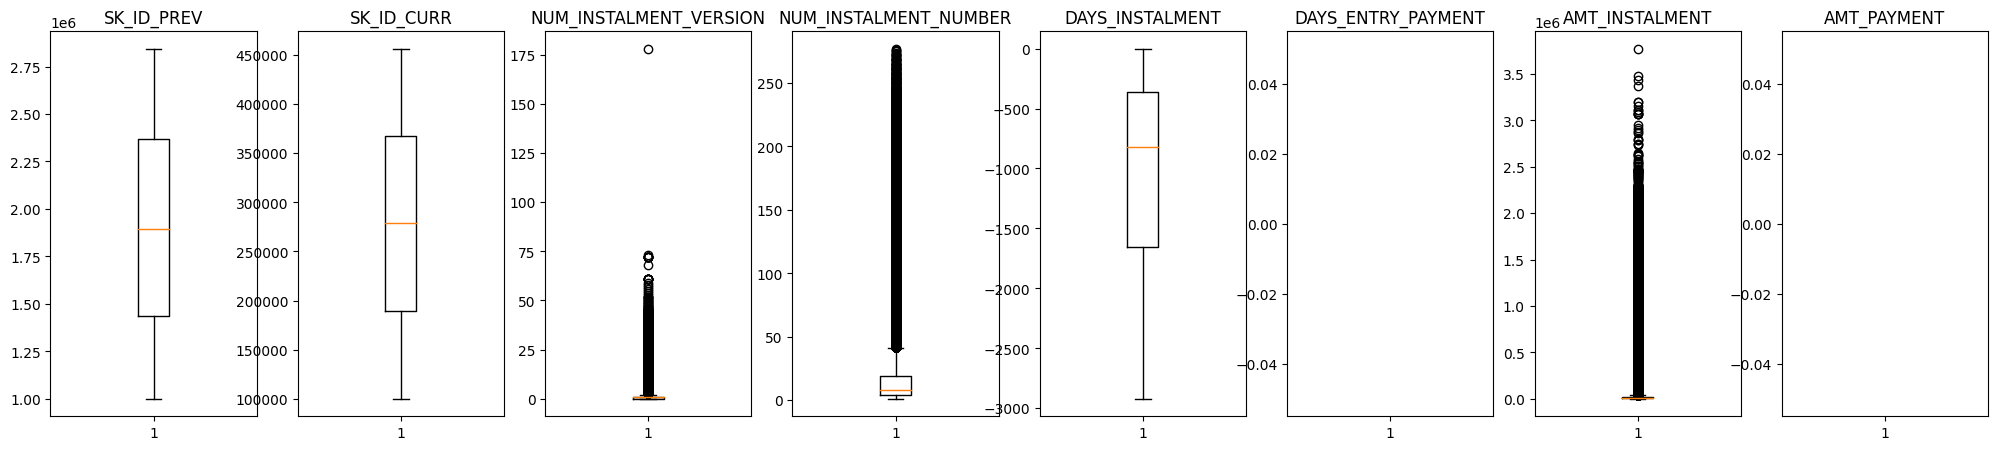

In [ ]:
#Melihat Outliers pada tiap feature data Installment Payments

fig, axs = plt.subplots(ncols=len(installments_payments.columns), figsize=(25,5))
for i, col in enumerate(installments_payments.columns):
    axs[i].boxplot(installments_payments[col])
    axs[i].set_title(col)
plt.show()

In [ ]:
installments_payments.describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

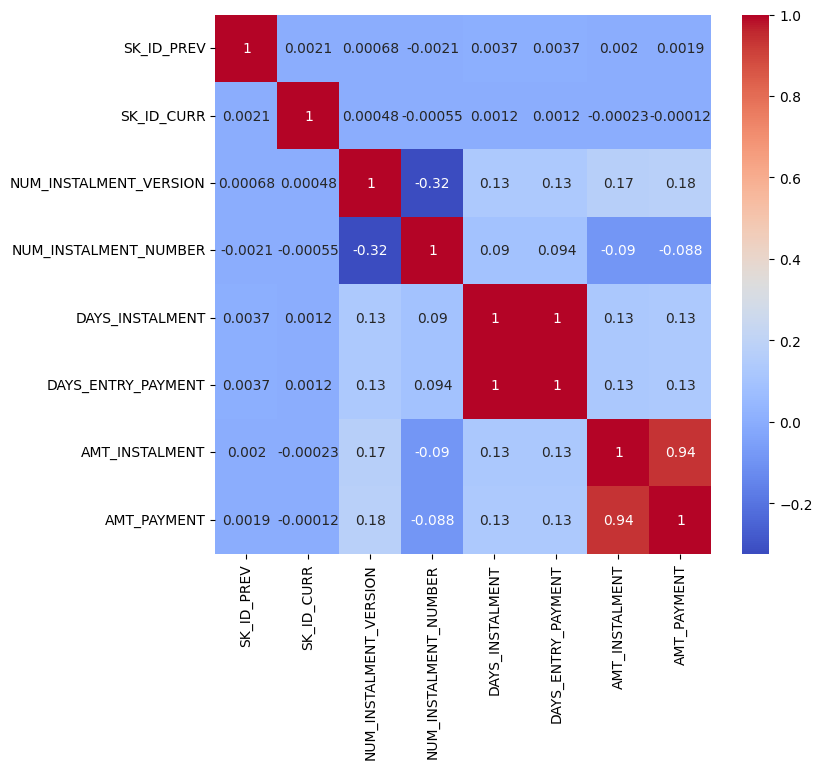

In [ ]:
#Memeriksa korelasi antar fitur menggunakan heatmap
corr = installments_payments.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

###**Data Cleaning**

In [ ]:
installments_payments = installments_payments.dropna()
installments_payments

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605344     2006721      442291                     1.0   
13605345     1126000      428449                     0.0   
13605346     1519070      444122                     1.0   
13605347     2784672      444977                     0.0   
13605348     2653119      423205                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               -63.0   
3                             3          -2418.0             -2426.0   
4                             2          -1383.0             -1366.0   
...                         ...              ...                 ...   
13605344                      3          -1311.0             -1318.0   
13605345                     12           -301.0              -302.0   
13605346                      5           -399.0              -407.0   
13605347                      4           -157.0              -157.0   
13605348                     14           -975.0              -974.0   

          AMT_INSTALMENT  AMT_PAYMENT  
0               6948.360     6948.360  
1               1716.525     1716.525  
2              25425.000    25425.000  
3              24350.130    24350.130  
4               2165.040     2160.585  
...                  ...          ...  
13605344        2934.225     2934.225  
13605345        6793.470     6750.000  
13605346        4363.830     4363.830  
13605347         373.005      373.005  
13605348       12503.385    12503.385  

[13602496 rows x 8 columns]

Drop Outlier

In [ ]:
Q1 = installments_payments.quantile(0.25)
Q3 = installments_payments.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (installments_payments < (Q1 - 1.5 * IQR)) | (installments_payments > (Q3 + 1.5 * IQR))
installments_payments = installments_payments[~outliers.any(axis=1)]

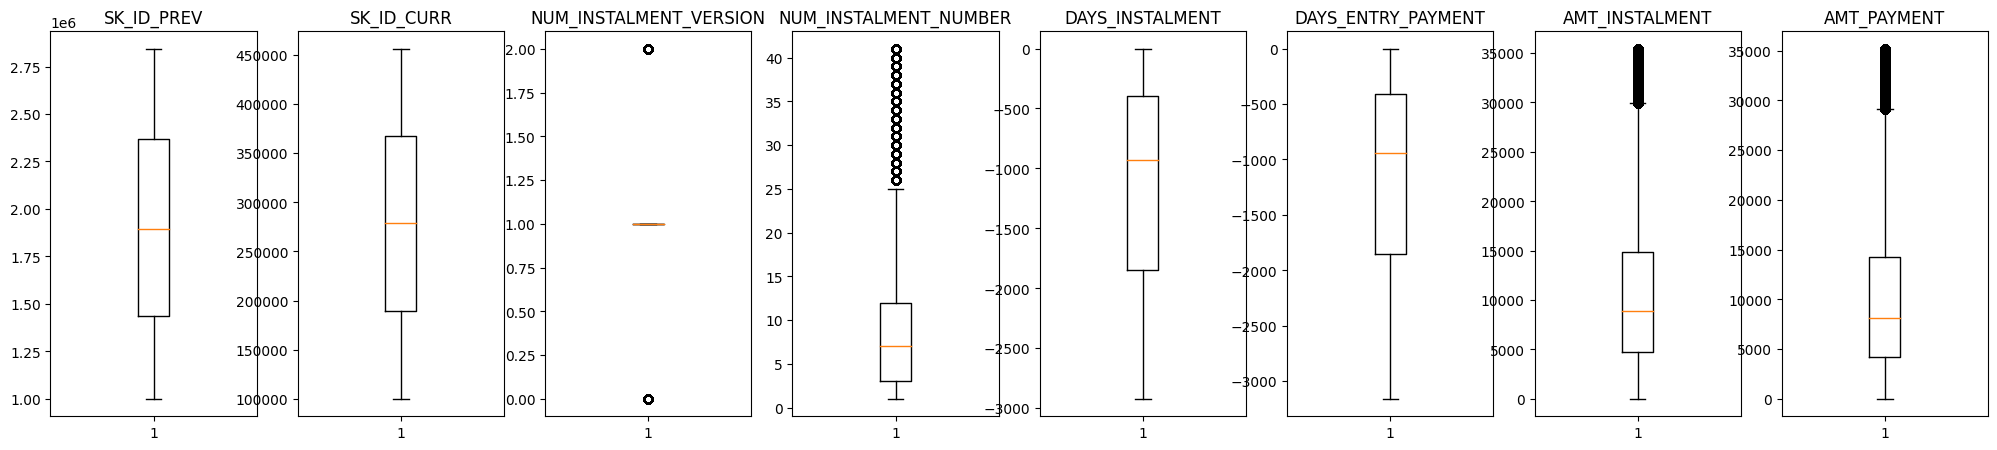

In [ ]:
#Melihat Outliers pada tiap feature data Installment Payments

fig, axs = plt.subplots(ncols=len(installments_payments.columns), figsize=(25,5))
for i, col in enumerate(installments_payments.columns):
    axs[i].boxplot(installments_payments[col])
    axs[i].set_title(col)
plt.show()

In [ ]:
installments_payments['NUM_INSTALMENT_VERSION'].value_counts()

1.0    7800651
0.0    2133370
2.0     344427
Name: NUM_INSTALMENT_VERSION, dtype: int64

In [ ]:
print('Number of data points : ', installments_payments.shape[0])
print('Number of features : ', installments_payments.shape[1])
installments_payments.head()

Number of data points :  10278448
Number of features :  8


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

###**Feature Engineering**

####**Feature Extraction**

In [ ]:
installments_payments['NEW_DAYS_PAID_EARLIER'] = installments_payments['DAYS_INSTALMENT']-installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments

<ipython-input-38-b83b3dd90590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  installments_payments['NEW_DAYS_PAID_EARLIER'] = installments_payments['DAYS_INSTALMENT']-installments_payments['DAYS_ENTRY_PAYMENT']


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605344     2006721      442291                     1.0   
13605345     1126000      428449                     0.0   
13605346     1519070      444122                     1.0   
13605347     2784672      444977                     0.0   
13605348     2653119      423205                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               -63.0   
3                             3          -2418.0             -2426.0   
4                             2          -1383.0             -1366.0   
...                         ...              ...                 ...   
13605344                      3          -1311.0             -1318.0   
13605345                     12           -301.0              -302.0   
13605346                      5           -399.0              -407.0   
13605347                      4           -157.0              -157.0   
13605348                     14           -975.0              -974.0   

          AMT_INSTALMENT  AMT_PAYMENT  NEW_DAYS_PAID_EARLIER  
0               6948.360     6948.360                    7.0  
1               1716.525     1716.525                    0.0  
2              25425.000    25425.000                    0.0  
3              24350.130    24350.130                    8.0  
4               2165.040     2160.585                  -17.0  
...                  ...          ...                    ...  
13605344        2934.225     2934.225                    7.0  
13605345        6793.470     6750.000                    1.0  
13605346        4363.830     4363.830                    8.0  
13605347         373.005      373.005                    0.0  
13605348       12503.385    12503.385                   -1.0  

[10278448 rows x 9 columns]

In [ ]:
# Apakah setiap pembayaran angsuran terlambat atau tidak 1: terlambat dibayar 0: mewakili pembayaran lebih awal
installments_payments['NEW_NUM_PAID_LATER'] = installments_payments['NEW_DAYS_PAID_EARLIER'].map(lambda x: 1 if x<0 else 0)
installments_payments

<ipython-input-39-e3a5af4de837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  installments_payments['NEW_NUM_PAID_LATER'] = installments_payments['NEW_DAYS_PAID_EARLIER'].map(lambda x: 1 if x<0 else 0)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605344     2006721      442291                     1.0   
13605345     1126000      428449                     0.0   
13605346     1519070      444122                     1.0   
13605347     2784672      444977                     0.0   
13605348     2653119      423205                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               -63.0   
3                             3          -2418.0             -2426.0   
4                             2          -1383.0             -1366.0   
...                         ...              ...                 ...   
13605344                      3          -1311.0             -1318.0   
13605345                     12           -301.0              -302.0   
13605346                      5           -399.0              -407.0   
13605347                      4           -157.0              -157.0   
13605348                     14           -975.0              -974.0   

          AMT_INSTALMENT  AMT_PAYMENT  NEW_DAYS_PAID_EARLIER  \
0               6948.360     6948.360                    7.0   
1               1716.525     1716.525                    0.0   
2              25425.000    25425.000                    0.0   
3              24350.130    24350.130                    8.0   
4               2165.040     2160.585                  -17.0   
...                  ...          ...                    ...   
13605344        2934.225     2934.225                    7.0   
13605345        6793.470     6750.000                    1.0   
13605346        4363.830     4363.830                    8.0   
13605347         373.005      373.005                    0.0   
13605348       12503.385    12503.385                   -1.0   

          NEW_NUM_PAID_LATER  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  
...                      ...  
13605344                   0  
13605345                   0  
13605346                   0  
13605347                   0  
13605348                   1  

[10278448 rows x 10 columns]

In [ ]:
# Menentukan kolom yang digunakan sebagai acuan pengurutan
kolom_acuan = 'SK_ID_PREV'

# Mengurutkan DataFrame berdasarkan kolom acuan
df_urut = installments_payments.sort_values(by=kolom_acuan)

In [ ]:
df_urut

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
512588       1000001      158271                     1.0   
3411021      1000002      101962                     1.0   
1214732      1000002      101962                     1.0   
1631862      1000002      101962                     1.0   
1006868      1000002      101962                     2.0   
...              ...         ...                     ...   
8722007      2843499      314148                     1.0   
9440302      2843499      314148                     1.0   
11071524     2843499      314148                     1.0   
11350339     2843499      314148                     1.0   
9334870      2843499      314148                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
512588                        1           -268.0              -294.0   
3411021                       3          -1540.0             -1559.0   
1214732                       1          -1600.0             -1611.0   
1631862                       2          -1570.0             -1575.0   
1006868                       4          -1510.0             -1554.0   
...                         ...              ...                 ...   
8722007                       4          -1113.0             -1138.0   
9440302                       8           -993.0             -1018.0   
11071524                      6          -1053.0             -1074.0   
11350339                      3          -1143.0             -1172.0   
9334870                       1          -1203.0             -1220.0   

          AMT_INSTALMENT  AMT_PAYMENT  NEW_DAYS_PAID_EARLIER  \
512588          6404.310     6404.310                   26.0   
3411021         6264.000     6264.000                   19.0   
1214732         6264.000     6264.000                   11.0   
1631862         6264.000     6264.000                    5.0   
1006868        18443.565    18443.565                   44.0   
...                  ...          ...                    ...   
8722007        16074.000    16074.000                   25.0   
9440302        16074.000    16074.000                   25.0   
11071524       16074.000    16074.000                   21.0   
11350339       16074.000    16074.000                   29.0   
9334870        16074.000    16074.000                   17.0   

          NEW_NUM_PAID_LATER  
512588                     0  
3411021                    0  
1214732                    0  
1631862                    0  
1006868                    0  
...                      ...  
8722007                    0  
9440302                    0  
11071524                   0  
11350339                   0  
9334870                    0  

[10278448 rows x 10 columns]

####Agregate

In [ ]:
# Agregasi dan deduplikasi variabel
agg_list = {'NUM_INSTALMENT_VERSION':['nunique'],
               'NUM_INSTALMENT_NUMBER':'max',
               'AMT_INSTALMENT':['mean','sum'],
               'AMT_PAYMENT':['mean','sum'],
               'NEW_DAYS_PAID_EARLIER':'min',
               'NEW_NUM_PAID_LATER':'sum'}

In [ ]:
ins_agg = installments_payments.groupby('SK_ID_PREV').agg(agg_list)

In [ ]:
ins_agg

NUM_INSTALMENT_VERSION NUM_INSTALMENT_NUMBER AMT_INSTALMENT  \
                          nunique                   max            min   
SK_ID_PREV                                                               
1000001                         1                     1       6404.310   
1000002                         2                     4       6264.000   
1000003                         1                     3       4951.350   
1000004                         2                     7       3391.110   
1000005                         1                    10      14599.260   
...                           ...                   ...            ...   
2843495                         1                     6      23556.195   
2843496                         1                    32          3.555   
2843497                         1                    20       9175.185   
2843498                         1                     5      16191.990   
2843499                         1                     9      16074.000   

                                                AMT_PAYMENT             \
                  max         sum          mean         min        max   
SK_ID_PREV                                                               
1000001      6404.310    6404.310   6404.310000    6404.310   6404.310   
1000002     18443.565   37235.565   9308.891250    6264.000  18443.565   
1000003      4951.350   14854.050   4951.350000    4951.350   4951.350   
1000004     13176.495   33523.155   4789.022143    3391.110  13176.495   
1000005     14713.605  161735.310  14703.210000       2.790  14713.605   
...               ...         ...           ...         ...        ...   
2843495     23556.195  141337.170  23556.195000   23556.195  23556.195   
2843496     29250.000  228780.765   6932.750455       3.555  29250.000   
2843497      9175.185  183503.700   9175.185000    9175.185   9175.185   
2843498     16191.990   80959.950  16191.990000   16191.990  16191.990   
2843499     16074.000  144666.000  16074.000000   16074.000  16074.000   

                                     NEW_DAYS_PAID_EARLIER NEW_NUM_PAID_LATER  
                   sum          mean                  mean                sum  
SK_ID_PREV                                                                     
1000001       6404.310   6404.310000             26.000000                  0  
1000002      37235.565   9308.891250             19.750000                  0  
1000003      14854.050   4951.350000             15.333333                  0  
1000004      33523.155   4789.022143             26.714286                  0  
1000005     147021.705  13365.609545              8.454545                  2  
...                ...           ...                   ...                ...  
2843495     141337.170  23556.195000              3.666667                  1  
2843496     220779.315   6690.282273              4.121212                  0  
2843497     183503.700   9175.185000              2.900000                  0  
2843498      80959.950  16191.990000             15.200000                  0  
2843499     144666.000  16074.000000             23.555556                  0  

[908883 rows x 12 columns]

In [ ]:
ins_agg.columns = pd.Index([e[0] + '_' + e[1].upper() for e in ins_agg.columns.tolist()])
ins_agg.columns

Index(['INS_NUM_INSTALMENT_VERSION_NUNIQUE', 'INS_NUM_INSTALMENT_NUMBER_MAX',
       'INS_AMT_INSTALMENT_MIN', 'INS_AMT_INSTALMENT_MAX',
       'INS_AMT_INSTALMENT_SUM', 'INS_AMT_INSTALMENT_MEAN',
       'INS_AMT_PAYMENT_MIN', 'INS_AMT_PAYMENT_MAX', 'INS_AMT_PAYMENT_SUM',
       'INS_AMT_PAYMENT_MEAN', 'INS_NEW_DAYS_PAID_EARLIER_MEAN',
       'INS_NEW_NUM_PAID_LATER_SUM'],
      dtype='object')

In [ ]:
# Persentase pembayaran pinjaman dan total sisa hutang
ins_agg['INS_NEW_PAYMENT_PERC'] = ins_agg['AMT_PAYMENT_SUM'] / ins_agg['AMT_INSTALMENT_SUM']
ins_agg['INS_NEW_PAYMENT_DIFF'] = ins_agg['AMT_INSTALMENT_SUM'] - ins_agg['AMT_PAYMENT_SUM']

In [ ]:
ins_agg= ins_agg.drop(['AMT_INSTALMENT_SUM','AMT_PAYMENT_SUM'], axis=1)

In [ ]:
ins_agg.reset_index(inplace=True)

In [ ]:
ins_agg

###Merge installments_payments, credit_card_balance, dan pos_cash_balance 

In [ ]:
# Merge installment dgn pos_credit
ins_credit_pos = ins_agg.merge(pos_credit, how='left', on='SK_ID_PREV')

In [ ]:
ins_credit_pos

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
ins_credit_pos.to_csv('ins_credit_pos.csv', index=False)

## Merge train

### Merging installment_payments + credit_card_balance + pos_cash_alance dan previous_application

In [ ]:
# Melihat preview data
agg_prev= pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/aggregated_prevapp.csv")
print("Jumlah baris : ",agg_prev.shape[0])
print("Jumlah kolom : ",agg_prev.shape[1])
agg_prev.head()

In [ ]:
# Merge credit+installment+pos dgn prev
ins_credit_pos_prev = agg_prev.merge(ins_credit_pos, how='left', on='SK_ID_PREV')

In [ ]:
# Drop feature yang tidak diperlukan/ sudah tercover oleh feature lain
ins_credit_pos_prev1= ins_credit_pos_prev.drop(['CNT_DRAWINGS_ATM_CURRENT_SUM',
                                               'CNT_DRAWINGS_OTHER_CURRENT_SUM','CNT_DRAWINGS_POS_CURRENT_SUM',
                                               'AMT_DRAWINGS_OTHER_CURRENT_SUM','AMT_DRAWINGS_POS_CURRENT_SUM',
                                                'AMT_DRAWINGS_ATM_CURRENT_SUM',
                                               'AMT_RECIVABLE_SUM','AMT_PAYMENT_CURRENT_SUM'], axis=1)

In [ ]:
# Cek Missing Values

from prettytable import PrettyTable
# Create the table
table = PrettyTable(['Variable', 'Missing Values'])

# Loop through each column in the dataset
for col in ins_credit_pos_prev1:
    # Count the number of missing values
    missing_values = ins_credit_pos_prev1[col].isnull().sum()
    
    # Add the row to the table
    table.add_row([col, missing_values])

# Print the table
print(table)

In [ ]:
# Cleaning missing value dengan modus

def isi_missing_modus(ins_credit_pos_prev1, kolom):
    modus = ins_credit_pos_prev1[kolom].mode()[0]
    ins_credit_pos_prev1[kolom] = ins_credit_pos_prev1[kolom].fillna(modus)

isi_missing_modus(ins_credit_pos_prev1, 'NUM_INSTALMENT_VERSION_NUNIQUE')
isi_missing_modus(ins_credit_pos_prev1, 'NUM_INSTALMENT_NUMBER_MAX')
isi_missing_modus(ins_credit_pos_prev1, 'NEW_DAYS_PAID_EARLIER_MIN')
isi_missing_modus(ins_credit_pos_prev1, 'NEW_NUM_PAID_LATER_SUM')
isi_missing_modus(ins_credit_pos_prev1, 'INS_NEW_PAYMENT_PERC')
isi_missing_modus(ins_credit_pos_prev1, 'INS_NEW_PAYMENT_DIFF')
isi_missing_modus(ins_credit_pos_prev1, 'NAME_CONTRACT_STATUS_Active')
isi_missing_modus(ins_credit_pos_prev1, 'SK_DPD_MAX')
isi_missing_modus(ins_credit_pos_prev1, 'SK_DPD_DEF_MAX')
isi_missing_modus(ins_credit_pos_prev1, 'CNT_DRAWINGS_CURRENT_SUM')

In [ ]:
# Cleaning missing value dengan mean

def isi_missing_mean(ins_credit_pos_prev1, kolom):
    mean = ins_credit_pos_prev1[kolom].mean()
    ins_credit_pos_prev1[kolom]=ins_credit_pos_prev1[kolom].fillna(mean)

isi_missing_mean(ins_credit_pos_prev1, 'AMT_INSTALMENT_MEAN')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_PAYMENT_MEAN')
isi_missing_mean(ins_credit_pos_prev1, 'MONTHS_BALANCE_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'CNT_INSTALMENT_MEAN')
isi_missing_mean(ins_credit_pos_prev1, 'CNT_INSTALMENT_FUTURE_MEAN')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_BALANCE_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_CREDIT_LIMIT_ACTUAL_MAX')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_DRAWINGS_CURRENT_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_INST_MIN_REGULARITY_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_PAYMENT_TOTAL_CURRENT_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_RECEIVABLE_PRINCIPAL_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'AMT_TOTAL_RECEIVABLE_SUM')
isi_missing_mean(ins_credit_pos_prev1, 'CNT_INSTALMENT_MATURE_CUM_MAX')

In [ ]:
from prettytable import PrettyTable
# Create the table
table = PrettyTable(['Variable', 'Missing Values'])

# Loop through each column in the dataset
for col in ins_credit_pos_prev1:
    # Count the number of missing values
    missing_values = ins_credit_pos_prev1[col].isnull().sum()
    
    # Add the row to the table
    table.add_row([col, missing_values])

# Print the table
print(table)

In [ ]:
ins_credit_pos_prev1

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
ins_credit_pos_prev1.to_csv('ins_credit_pos_prev(BERSIH).csv', index=False)

### Mergering bureau_full and application_train
- bureau_full(305811, 25)
- application_train(307511, 177)
- installment payments, credit card, pos cash balance (1080817,130)

In [ ]:
# Merge application_train with Bureau_full

merge_1 = application_train.merge(bureau_full, on='SK_ID_CURR', how='right')

In [ ]:
merge_1.shape

(305811, 201)

In [ ]:
%cd /content/drive/MyDrive/MBKM - Data Science/Final Project
merge_1.to_csv("merge_1.csv", index=False)

In [ ]:
merge_1 = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/merge_1.csv")

In [ ]:
merge_1.shape

(305811, 201)

In [ ]:
ins_credit_pos_prev1 = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/ins_credit_pos_prev(BERSIH).csv")

In [ ]:
ins_credit_pos_prev1.shape

(1080817, 138)

In [ ]:
ins_credit_pos_prev1["SK_ID_CURR"].value_counts()

265681    61
187868    61
133023    60
401563    56
235163    53
          ..
371968     1
228294     1
228296     1
371964     1
100001     1
Name: SK_ID_CURR, Length: 331016, dtype: int64

In [ ]:
from scipy.stats import mode

def FE_previous_application(prev_app3):
    prev_app_agg = {}
    
    for column in prev_app3.columns:
        if column == 'SK_ID_CURR':
            continue
        
        if prev_app3[column].dtype == 'object':
            prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None
        elif set(prev_app3[column].unique()) == {0, 1}:
            prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None
        else:
            prev_app_agg[column] = 'mean'
    
    prev_app_final_agg = prev_app3.groupby('SK_ID_CURR').agg(prev_app_agg)
    prev_app_final_agg.columns = [f"{col}_MODE" if prev_app3[col].dtype == 'object' else f"{col}_MEAN" for col in prev_app_final_agg.columns]
    prev_app_final_agg.reset_index(inplace=True)

    return prev_app_final_agg


In [ ]:
ins_credit_pos_prev2 = FE_previous_application(ins_credit_pos_prev1)

<ipython-input-10-e2c3bf18ec02>:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  prev_app_agg[column] = lambda x: mode(x)[0][0] if len(x) > 0 else None


In [ ]:
ins_credit_pos_prev2.shape

(331016, 138)

In [ ]:
ins_credit_pos_prev2.head(10)

SK_ID_CURR  AMT_ANNUITY_MEAN_MEAN  AMT_APPLICATION_MEAN_MEAN  \
0      100001            3951.000000               24835.500000   
1      100002            9251.775000              179055.000000   
2      100003            6737.310000               68809.500000   
3      100004            5357.250000               24282.000000   
4      100005            4813.200000               44617.500000   
5      100006           21241.237500              271582.335000   
6      100007           12132.369000              135636.300000   
7      100008           15839.696250              194627.250000   
8      100009           10051.412143               76741.714286   
9      100010           27463.410000              247212.000000   

   AMT_CREDIT_MEAN_MEAN  AMT_GOODS_PRICE_MEAN_MEAN  \
0          23787.000000               24835.500000   
1         179055.000000              179055.000000   
2          68053.500000               68809.500000   
3          20106.000000               24282.000000   
4          40153.500000               44617.500000   
5         260911.125000              271582.335000   
6         143086.500000              135636.300000   
7         203459.625000              194627.250000   
8          70137.642857               76741.714286   
9         260811.000000              247212.000000   

   HOUR_APPR_PROCESS_START_MEAN_MEAN  DAYS_DECISION_MEAN_MEAN  \
0                          13.000000             -1740.000000   
1                           9.000000              -606.000000   
2                          15.000000             -2341.000000   
3                           5.000000              -815.000000   
4                          11.000000              -757.000000   
5                          14.250000              -386.750000   
6                          12.200000             -1294.000000   
7                          10.500000             -1469.500000   
8                          13.714286              -719.285714   
9                          16.000000             -1070.000000   

   CNT_PAYMENT_MEAN_MEAN  NEW_APP_CREDIT_RATE_MEAN_MEAN  \
0                    8.0                       1.044079   
1                   24.0                       1.000000   
2                   12.0                       1.011109   
3                    4.0                       1.207699   
4                   12.0                       1.111173   
5                   13.5                       1.076290   
6                   15.2                       1.005352   
7                   14.0                       1.030049   
8                    8.0                       1.095482   
9                   10.0                       0.947859   

   NEW_AMT_PAYMENT_RATE_MEAN_MEAN  ...  AMT_PAYMENT_CURRENT_SUM_MEAN  \
0                        6.020501  ...                           NaN   
1                       19.353584  ...                           NaN   
2                       10.100990  ...                           NaN   
3                        3.753045  ...                           NaN   
4                        8.342371  ...                           NaN   
5                       12.758885  ...                           NaN   
6                       10.801200  ...                           NaN   
7                       10.726940  ...                           NaN   
8                        7.044559  ...                           NaN   
9                        9.496672  ...                           NaN   

   AMT_PAYMENT_TOTAL_CURRENT_SUM_MEAN  AMT_RECEIVABLE_PRINCIPAL_SUM_MEAN  \
0                       372003.054935                       2.700698e+06   
1                       372003.054935                       2.700698e+06   
2                       372003.054935                       2.700698e+06   
3                       372003.054935                       2.700698e+06   
4                       372003.054935                       2.700698e+06   
5                       372003.054935                  

In [ ]:
ins_credit_pos_prev2.to_csv("merge_half3.csv", index=False)

In [ ]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable(['Variable', 'Missing Values'])

# Loop through each column in the dataset
for col in merge_half3.columns:
    # Count the number of missing values
    missing_values = merge_half3[col].isnull().sum()
    
    # Add the row to the table
    table.add_row([col, missing_values])

# Print the table
print(table)

+---------------------------------------------------------------------------+----------------+
|                                  Variable                                 | Missing Values |
+---------------------------------------------------------------------------+----------------+
|                                 SK_ID_CURR                                |       0        |
|                           AMT_ANNUITY_MEAN_MEAN                           |       0        |
|                         AMT_APPLICATION_MEAN_MEAN                         |       0        |
|                            AMT_CREDIT_MEAN_MEAN                           |       0        |
|                         AMT_GOODS_PRICE_MEAN_MEAN                         |       0        |
|                     HOUR_APPR_PROCESS_START_MEAN_MEAN                     |       0        |
|                          DAYS_DECISION_MEAN_MEAN                          |       0        |
|                           CNT_PAYMENT_MEAN_MEAN 

In [ ]:
merge_half3 = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/merge_half3.csv")

In [ ]:
merge_half2['SK_DPD_MAX_MEAN'].value_counts()

0.000000      317294
0.333333        1580
0.500000        1373
0.250000        1313
0.200000        1016
               ...  
0.416667           1
81.500000          1
19.250000          1
0.357143           1
447.000000         1
Name: SK_DPD_MAX_MEAN, Length: 1005, dtype: int64

In [ ]:
  cols_to_drop = ['CNT_DRAWINGS_ATM_CURRENT_SUM_MEAN',
                  'CNT_DRAWINGS_OTHER_CURRENT_SUM_MEAN',
                  'CNT_DRAWINGS_POS_CURRENT_SUM_MEAN',
                  'AMT_DRAWINGS_OTHER_CURRENT_SUM_MEAN',
                  'AMT_DRAWINGS_POS_CURRENT_SUM_MEAN',
                  'AMT_DRAWINGS_ATM_CURRENT_SUM_MEAN',
                  'AMT_RECIVABLE_SUM_MEAN',
                  'AMT_PAYMENT_CURRENT_SUM_MEAN']
  merge_half3.drop(columns=cols_to_drop, inplace=True)

In [ ]:
from prettytable import PrettyTable

# Define the table headers
table = PrettyTable()
table.field_names = ["Variable Name", "Missing Values", "Duplicates", "Outliers"]

# Loop through each column in the dataframe and add information to the table
for col in merge_half3.columns:
    # Count missing values
    missing_vals = merge_half3[col].isnull().sum()
    # Count duplicates
    duplicates = merge_half3.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if merge_half3[col].dtype in ['int64', 'float64']:
        mean = merge_half3[col].mean()
        std = merge_half3[col].std()
        outliers = ((merge_half3[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add a row to the table
    table.add_row([col, missing_vals, duplicates, outliers])

# Print the table
print(table)

+---------------------------------------------------------------------------+----------------+------------+----------+
|                               Variable Name                               | Missing Values | Duplicates | Outliers |
+---------------------------------------------------------------------------+----------------+------------+----------+
|                                 SK_ID_CURR                                |       0        |     0      |    0     |
|                           AMT_ANNUITY_MEAN_MEAN                           |       0        |     0      |   4650   |
|                         AMT_APPLICATION_MEAN_MEAN                         |       0        |     0      |   5202   |
|                            AMT_CREDIT_MEAN_MEAN                           |       0        |     0      |   4575   |
|                         AMT_GOODS_PRICE_MEAN_MEAN                         |       0        |     0      |   5167   |
|                     HOUR_APPR_PROCESS_START_ME

In [ ]:
# Merge application_train+Bureau_full with Full ins_credit_pos_prev
merge_terakhirrr = merge_1.merge(merge_half3, on='SK_ID_CURR', how='left')

In [ ]:
merge_terakhirrr = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/merge_terakhirrr.csv")

In [ ]:
merge_terakhirrr.shape

(305811, 330)

In [ ]:
merge_terakhirrr.head(10)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100001     NaN           NaN               NaN         NaN   
1      100002     1.0           0.0          202500.0    406597.5   
2      100003     0.0           0.0          270000.0   1293502.5   
3      100004     0.0           0.0           67500.0    135000.0   
4      100005     NaN           NaN               NaN         NaN   
5      100007     0.0           0.0          121500.0    513000.0   
6      100008     0.0           0.0           99000.0    490495.5   
7      100009     0.0           1.0          171000.0   1560726.0   
8      100010     0.0           0.0          360000.0   1530000.0   
9      100011     0.0           0.0          112500.0   1019610.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0          NaN              NaN                         NaN         NaN   
1      24700.5         351000.0                    0.018801     -9461.0   
2      35698.5        1129500.0                    0.003541    -16765.0   
3       6750.0         135000.0                    0.010032    -19046.0   
4          NaN              NaN                         NaN         NaN   
5      21865.5         513000.0                    0.028663    -19932.0   
6      27517.5         454500.0                    0.035792    -16941.0   
7      41301.0        1395000.0                    0.035792    -13778.0   
8      42075.0        1530000.0                    0.003122    -18850.0   
9      33826.5         913500.0                    0.018634    -20099.0   

   DAYS_EMPLOYED  ...  CNT_INSTALMENT_FUTURE_MEAN_MEAN  AMT_BALANCE_SUM_MEAN  \
0            NaN  ...                         2.500000          2.813808e+06   
1         -637.0  ...                        15.000000          2.813808e+06   
2        -1188.0  ...                         6.500000          2.813808e+06   
3         -225.0  ...                         3.000000          2.813808e+06   
4            NaN  ...                         8.000000          2.813808e+06   
5        -3038.0  ...                         9.170588          2.813808e+06   
6        -1588.0  ...                         9.925000          2.813808e+06   
7        -3130.0  ...                         5.023810          2.813808e+06   
8         -449.0  ...                         5.500000          2.813808e+06   
9       365243.0  ...                         7.462041          3.156764e+06   

   AMT_CREDIT_LIMIT_ACTUAL_MAX_MEAN  AMT_DRAWINGS_CURRENT_SUM_MEAN  \
0                     227982.129380                  296059.279552   
1                     227982.129380                  296059.279552   
2                     227982.129380                  296059.279552   
3                     227982.129380                  296059.279552   
4                     227982.129380                  296059.279552   
5                     227982.129380                  296059.279552   
6                     227982.129380                  296059.279552   
7                     227982.129380                  296059.279552   
8                     227982.129380                  296059.279552   
9                     211988.086253                  197372.853035   

   AMT_INST_MIN_REGULARITY_SUM_MEAN  AMT_PAYMENT_TOTAL_CURRENT_SUM_MEAN  \
0                     157848.554532                       372003.054935   
1                     157848.554532                       372003.054935   
2                     157848.554532                       372003.054935   
3                     157848.554532                       372003.054935   
4                     157848.554532                       372003.054935   
5                     157848.554532                       372003.054935   
6                     157848.554532                       372003.054935   
7                     157848.554532                       372003.054935   
8                     157848.554532                       372003.054935   
9              

In [ ]:
from prettytable import PrettyTable

# Define the table headers
table = PrettyTable()
table.field_names = ["Variable Name", "Missing Values", "Duplicates", "Outliers"]

# Loop through each column in the dataframe and add information to the table
for col in merge_terakhirrr.columns:
    # Count missing values
    missing_vals = merge_terakhirrr[col].isnull().sum()
    # Count duplicates
    duplicates = merge_terakhirrr.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if merge_terakhirrr[col].dtype in ['int64', 'float64']:
        mean = merge_terakhirrr[col].mean()
        std = merge_terakhirrr[col].std()
        outliers = ((merge_terakhirrr[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'
    
    # Add a row to the table
    table.add_row([col, missing_vals, duplicates, outliers])

# Print the table
print(table)

+---------------------------------------------------------------------------+----------------+------------+----------+
|                               Variable Name                               | Missing Values | Duplicates | Outliers |
+---------------------------------------------------------------------------+----------------+------------+----------+
|                                 SK_ID_CURR                                |       0        |     0      |    0     |
|                                   TARGET                                  |     42320      |     0      |  20368   |
|                                CNT_CHILDREN                               |     42320      |     0      |   3693   |
|                              AMT_INCOME_TOTAL                             |     42320      |     0      |   234    |
|                                 AMT_CREDIT                                |     42320      |     0      |   2846   |
|                                AMT_ANNUITY    

In [ ]:
drop = ['OCCU_TYPE_PER_INCOME','EDU_TYPE_PER_INCOME','ORG_TYPE_PER_INCOME']
merge_terakhirrr.drop(columns=drop, inplace=True)

In [ ]:
data_clean = merge_terakhirrr.dropna()

In [ ]:
data_clean

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1           100002     1.0           0.0          202500.0    406597.5   
2           100003     0.0           0.0          270000.0   1293502.5   
3           100004     0.0           0.0           67500.0    135000.0   
5           100007     0.0           0.0          121500.0    513000.0   
6           100008     0.0           0.0           99000.0    490495.5   
...            ...     ...           ...               ...         ...   
305805      456247     0.0           0.0          112500.0    345510.0   
305806      456249     0.0           0.0          112500.0    225000.0   
305808      456253     0.0           0.0          153000.0    677664.0   
305809      456254     1.0           0.0          171000.0    370107.0   
305810      456255     0.0           0.0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1           24700.5         351000.0                    0.018801     -9461.0   
2           35698.5        1129500.0                    0.003541    -16765.0   
3            6750.0         135000.0                    0.010032    -19046.0   
5           21865.5         513000.0                    0.028663    -19932.0   
6           27517.5         454500.0                    0.035792    -16941.0   
...             ...              ...                         ...         ...   
305805      17770.5         247500.0                    0.022800    -11870.0   
305806      22050.0         225000.0                    0.022800    -24384.0   
305808      29979.0         585000.0                    0.005002    -14966.0   
305809      20205.0         319500.0                    0.005313    -11961.0   
305810      49117.5         675000.0                    0.046220    -16856.0   

        DAYS_EMPLOYED  ...  CNT_INSTALMENT_FUTURE_MEAN_MEAN  \
1              -637.0  ...                        15.000000   
2             -1188.0  ...                         6.500000   
3              -225.0  ...                         3.000000   
5             -3038.0  ...                         9.170588   
6             -1588.0  ...                         9.925000   
...               ...  ...                              ...   
305805         -399.0  ...                         5.138612   
305806       365243.0  ...                         6.638197   
305808        -7921.0  ...                         2.625000   
305809        -4786.0  ...                        10.500000   
305810        -1262.0  ...                        10.194214   

        AMT_BALANCE_SUM_MEAN  AMT_CREDIT_LIMIT_ACTUAL_MAX_MEAN  \
1               2.813808e+06                      227982.12938   
2               2.813808e+06                      227982.12938   
3               2.813808e+06                      227982.12938   
5               2.813808e+06                      227982.12938   
6               2.813808e+06                      227982.12938   
...                      ...                               ...   
305805          2.813808e+06                      227982.12938   
305806          2.813808e+06                      227982.12938   
305808          2.813808e+06                      227982.12938   
305809          2.813808e+06                      227982.12938   
305810          2.813808e+06                      227982.12938   

        AMT_DRAWINGS_CURRENT_SUM_MEAN  AMT_INST_MIN_REGULARITY_SUM_MEAN  \
1                       296059.279552                     157848.554532   
2                       296059.279552                     157848.554532   
3                       296059.279552                     157848.554532   
5                       296059.279552                     157848.554532   
6                       296059.279552                     157848.554532   
...                               ...                               ...   
305805                  296059.279552                     157848.554532   
305806  

In [ ]:
row_count = data_clean.dropna().shape[0]
row_count

243914

In [ ]:
# Memeriksa apakah baris ke-0 mengandung nilai yang hilang
is_missing = merge_terakhirrr.iloc[3].isna().any()

if is_missing:
    print("Baris ke-0 memiliki nilai yang hilang")
else:
    print("Baris ke-0 tidak memiliki nilai yang hilang")


Baris ke-0 memiliki nilai yang hilang


In [ ]:
%cd /content/drive/MyDrive/MBKM - Data Science/Final Project
data_clean.to_csv("train_clean.csv", index=False)

/content/drive/MyDrive/MBKM - Data Science/Final Project


In [ ]:
#merge_fix.to_csv("merge_fix.csv", index=False)

## Merge test

In [ ]:
# Merge application_test with Bureau_full
merge_test_1 = application_test.merge(bureau_full, on='SK_ID_CURR', how='left')

In [ ]:
# Merge merge_test_1(application_test+bureau_full) with merge_half3(ins_credit_pos_prev2)
merge_test_final = merge_test_1.merge(merge_half3, on='SK_ID_CURR', how='left')

In [ ]:
merge_test_final

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          100001             0          135000.0    568800.0      20560.5   
1          100005             0           99000.0    222768.0      17370.0   
2          100013             0          202500.0    663264.0      69777.0   
3          100028             2          315000.0   1575000.0      49018.5   
4          100038             1          180000.0    625500.0      32067.0   
...           ...           ...               ...         ...          ...   
48739      456221             0          121500.0    412560.0      17473.5   
48740      456222             2          157500.0    622413.0      31909.5   
48741      456223             1          202500.0    315000.0      33205.5   
48742      456224             0          225000.0    450000.0      25128.0   
48743      456250             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             450000.0                    0.018850      -19241          -2329   
1             180000.0                    0.035792      -18064          -4469   
2             630000.0                    0.019101      -20038          -4458   
3            1575000.0                    0.026392      -13976          -1866   
4             625500.0                    0.010032      -13040          -2191   
...                ...                         ...         ...            ...   
48739         270000.0                    0.002042      -19970          -5169   
48740         495000.0                    0.035792      -11186          -1149   
48741         315000.0                    0.026392      -15922          -3037   
48742         450000.0                    0.018850      -13968          -2731   
48743         270000.0                    0.006629      -13962           -633   

       DAYS_REGISTRATION  ...  AMT_PAYMENT_CURRENT_SUM_MEAN  \
0                -5170.0  ...                           NaN   
1                -9118.0  ...                           NaN   
2                -2175.0  ...                           NaN   
3                -2000.0  ...                     281474.46   
4                -4000.0  ...                           NaN   
...                  ...  ...                           ...   
48739            -9094.0  ...                           NaN   
48740            -3015.0  ...                           NaN   
48741            -2681.0  ...                           NaN   
48742            -1461.0  ...                           NaN   
48743            -1072.0  ...                     107482.50   

       AMT_PAYMENT_TOTAL_CURRENT_SUM_MEAN  AMT_RECEIVABLE_PRINCIPAL_SUM_MEAN  \
0                           372003.054935                       2.700698e+06   
1                           372003.054935                       2.700698e+06   
2                           372003.054935                       2.700698e+06   
3                           338819.191623                       1.920661e+06   
4                           372003.054935                       2.700698e+06   
...                                   ...                                ...   
48739                       372003.054935                       2.700698e+06   
48740                       372003.054935                       2.700698e+06   
48741                       372003.054935                       2.700698e+06   
48742                       372003.054935                       2.700698e+06   
48743                       283870.751201                       2.443113e+06   

       AMT_RECIVABLE_SUM_MEAN  AMT_TOTAL_RECEIVABLE_SUM_MEAN  \
0                         NaN                   2.803888e+06   
1                         NaN                   2.803888e+06   
2                         NaN                   2.803888e+06   
3                   373165.11                   1.993647e+06   
4                         NaN                   2.803888e+0

In [ ]:
from prettytable import PrettyTable

# Define the table headers
table = PrettyTable()
table.field_names = ["Variable Name", "Missing Values"]

# Loop through each column in the dataframe and add information to the table
for col in merge_test_final.columns:
    # Count missing values
    missing_vals = merge_test_final[col].isnull().sum()
    
    # Add a row to the table
    table.add_row([col, missing_vals])

# Print the table
print(table)

+---------------------------------------------------------------------------+----------------+
|                               Variable Name                               | Missing Values |
+---------------------------------------------------------------------------+----------------+
|                                 SK_ID_CURR                                |       0        |
|                                CNT_CHILDREN                               |       0        |
|                              AMT_INCOME_TOTAL                             |       0        |
|                                 AMT_CREDIT                                |       0        |
|                                AMT_ANNUITY                                |       0        |
|                              AMT_GOODS_PRICE                              |       0        |
|                         REGION_POPULATION_RELATIVE                        |       0        |
|                                 DAYS_BIRTH      

In [ ]:
# Save merge_test_finals
%cd /content/drive/MyDrive/MBKM - Data Science/Final Project
merge_test_final.to_csv("merge_test_final.csv", index=False)

/content/drive/MyDrive/MBKM - Data Science/Final Project


# **Feature Engineering (Merged Dataset)**

In [ ]:
Train = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/train_clean.csv")

In [ ]:
Test = pd.read_csv("/content/drive/MyDrive/MBKM - Data Science/Final Project/merge_test_final.csv")

In [ ]:
# Mengambil perbedaan fitur antara dua dataset
diff_features = set(Train.columns) - set(Test.columns)

# Menampilkan perbedaan fitur
print("Perbedaan fitur antara dua dataset:")
for feature in diff_features:
    print(feature)

Perbedaan fitur antara dua dataset:
CREDIT_RANGE
CNT_CHILDREN_GROUP
TARGET
NAME_INCOME_TYPE_Maternity leave
INCOME_RANGE


In [ ]:
Train.drop(['CNT_CHILDREN_GROUP', 'INCOME_RANGE', 'CREDIT_RANGE'], axis=1, inplace=True)

## Splitting Dataset


Memisahkan variabel dependen dan independen

In [ ]:
# Memisahkan variabel independen sebagai X dan variabel dependen sebagai y dari data train
X_train_columns = list(Train.columns)
X_train = Train[X_train_columns[2:]] # independen (X)
Y_train = Train['TARGET'] # target/dependen (y)

In [ ]:
print('Jumlah baris dan kolom di X_train : ',X_train.shape)
print('Jumlah baris di y_train : ',Y_train.shape)

Jumlah baris dan kolom di X_train :  (243914, 322)
Jumlah baris di y_train :  (243914,)


Melakukan train test split dengan perbandingan 80:20

In [ ]:
from sklearn.model_selection import train_test_split

X_train_final, X_val_final, Y_train_final, Y_val_final = train_test_split(X_train, Y_train, test_size=0.2, \
                                                                        stratify=Y_train, random_state=68)
print(X_train_final.shape, Y_train_final.shape)
print(X_val_final.shape, Y_val_final.shape)

(195131, 322) (195131,)
(48783, 322) (48783,)


In [ ]:
X_test_columns = list(Test.columns)
X_test = Test[X_test_columns[1:]] # independen (X)

In [ ]:
print('Jumlah baris dan kolom di X_test : ',X_test.shape)

Jumlah baris dan kolom di X_test :  (48744, 332)


## Obtaining top 100 features



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_train_final_arr = np.nan_to_num(X_train_final)
X_val_final_arr = np.nan_to_num(X_val_final)

S = SelectKBest(f_classif, k=100)

X_train_k_best = S.fit_transform(X_train_final_arr, Y_train_final)
X_val_k_best = S.transform(X_val_final_arr)

# Get columns to keep and create new dataframe with those only
cols = S.get_support(indices=True)

features_top_df_train = X_train_final.iloc[:,cols]
features_top_df_val = X_val_final.iloc[:,cols]
features_top_df_test = X_test[features_top_df_train.columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py:711: RuntimeWarning: overflow encountered in square
  X = X**2
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:100: RuntimeWarning: invalid value encountered in subtract
  sstot = ss_alldata - square_of_sums_alldata / float(n_samples)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:104: RuntimeWarning: invalid value encountered in subtract
  ssbn -= square_of_sums_alldata / float(n_samples)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 10  61  63  67 189 209 307] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-p

In [ ]:
features_top_df_train.columns = features_top_df_train.columns.str.replace('_<LAMBDA>_', '_')
features_top_df_val.columns = features_top_df_val.columns.str.replace('_<LAMBDA>_', '_')
features_top_df_test.columns = features_top_df_test.columns.str.replace('_<LAMBDA>_', '_')

## Scalling Dataset

Salah satu model yang ingin dibentuk adalah Logistic Regression. Model tersebut membutuhkan variabel dependen yang berdistribusi normal. Salah satu jenis scaler adalah Standard Scaler yang digunakan untuk menstandarisasi data sehingga mean bernilai 0 dan variance 1 (distribusi normal). Maka, pada kasus ini akan digunakan Standard Scaler. 

In [ ]:
# Import library StandardScaler yang akan digunakan
from sklearn.preprocessing import StandardScaler

In [ ]:
# Mendefinisikan StandardScaler
scaler = StandardScaler()

In [ ]:
# Function to list feature numeric in dataset
def get_numerical_features(data):
    numerical_features = []
    
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            # Exclude binary and categorical features
            if len(data[col].unique()) > 2:
                numerical_features.append(col)
    
    return numerical_features

In [ ]:
list_numeric = get_numerical_features(features_top_df_train)
print(list_numeric)

['AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE', 'CREDIT_DURATION', 'ENDDATE_DIFF', 'UPDATE_DIFF', 'DEBT_CREDIT_DIFF', 'AMT_ANNUITY_MEAN_MEAN', 'AMT_APPLICATION_MEAN_MEAN', 'AMT_GOODS_PRICE_MEAN_MEAN', 'HOUR_APPR_PROCESS_START_MEAN_MEAN', 'DAYS_DECISION_MEAN_MEAN', 'CNT_PAYMENT_MEAN_MEAN', 'NEW_APP_CREDIT_RATE_MEAN_MEAN', 'NEW_AMT_PAYMENT_RATE_MEAN_MEAN', 'NEW_CREDIT_GOODS_RATE_MEAN_MEAN', 'NEW_RETURN_DAY_MEAN_MEAN', 'AMT_INSTALMENT_MEAN_MEAN', 'AMT_PAYMENT_MEAN_MEAN', 'NEW_NUM_PAID_LATER_SUM_MEAN', 'INS_NEW_PAYMENT_DIFF_MEAN', 'CNT_INSTALMENT_FUTURE_MEAN_MEAN', 'AMT_PAYMENT_TOTAL_CURRENT_SUM_MEAN', 'CNT_DRAWINGS_

In [ ]:
# Fit scaler pada fitur numerik pada X_train
scaler.fit(features_top_df_train[list_numeric])

StandardScaler()

In [ ]:
# Melakukan scaling pada data numeric pada data train
X_train_scale = pd.DataFrame(scaler.transform(features_top_df_train[list_numeric]), columns = scaler.get_feature_names_out())
X_train_new = features_top_df_train.reset_index(drop = True).drop(columns = list_numeric)
scaled_X_train = pd.concat([X_train_new, X_train_scale], axis = 1)

In [ ]:
# Fit scaler pada fitur numerik pada X_val
scaler.fit(features_top_df_val[list_numeric])

StandardScaler()

In [ ]:
# Melakukan scaling pada data numeric pada data val
X_val_scale = pd.DataFrame(scaler.transform(features_top_df_val[list_numeric]), columns = scaler.get_feature_names_out())
X_val_new = features_top_df_val.reset_index(drop = True).drop(columns = list_numeric)
scaled_X_val = pd.concat([X_val_new, X_val_scale], axis = 1)

In [ ]:
# Fit scaler pada fitur numerik pada X_test
scaler.fit(features_top_df_test[list_numeric])

StandardScaler()

In [ ]:
# Melakukan scaling pada data numeric pada data test
X_test_scale = pd.DataFrame(scaler.transform(features_top_df_test[list_numeric]), columns = scaler.get_feature_names_out())
X_test_new = features_top_df_test.reset_index(drop = True).drop(columns = list_numeric)
scaled_X_test = pd.concat([X_test_new, X_test_scale], axis = 1)

##SMOTE

Pada EDA sebelumnya, dapat diketahui bahwa variabel dependen (TARGET) memiliki proporsi yang tidak seimbang. Maka, dilakukan oversampling menggunakan SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

# Membuat objek SMOTE
smote = SMOTE(random_state=68)
# Melakukan oversampling pada data
X_train_smote, Y_train_smote = smote.fit_resample(scaled_X_train, Y_train_final)

In [ ]:
print('Jumlah baris dan kolom di X_train : ',X_train_smote.shape)
print('Jumlah baris di y_train : ',Y_train_smote.shape)

Jumlah baris dan kolom di X_train :  (359556, 100)
Jumlah baris di y_train :  (359556,)


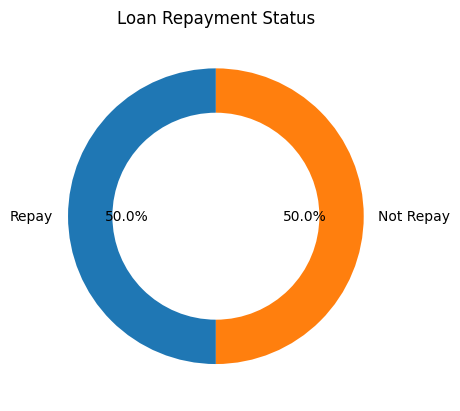

In [ ]:
# Get counts of target values
target_counts = Y_train_smote.value_counts()

# Create figure and axis objects
fig, ax = plt.subplots()

# Create pie chart
labels = ['Repay', 'Not Repay']
pie = ax.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Create donut chart by drawing white circle in the center
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add title
ax.set_title('Loan Repayment Status')

# Show chart
plt.show()

# **Hyperparameter Tuning**

##Metrics Evaluation
Berdasarkan beberapa sumber dari internet, diperoleh beberapa pengertian dan contoh sebagai berikut:

**Akurasi**

Digunakan ketika kita ingin mengetahui seberapa baik model dapat memprediksi kelas dari suatu instance secara keseluruhan dan baik digunakan ketika distribusi kelas seimbang. Hal ini karena akurasi tidak memperhitungkan imbalance kelas sehingga tidak dapat memberikan gambaran yang akurat tentang performa model.

**Presisi**

Presisi mengukur seberapa baik model mengidentifikasi True Positif di antara semua prediksi positif. Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Kita lebih memilih algoritma memprediksi email tidak SPAM tapi sebenarnya tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang algoritma memprediksi email SPAM tetapi sebenarnya bukan SPAM (sehingga tidak ada pada kotak masuk kita)

**Recall**

Recall mengukur seberapa baik model mengidentifikasi True Positif di antara semua kasus positif yang sebenarnya. Lebih baik algoritma kita memprediksi pasien terkena kanker tetapi sebenarnya tidak terkena kanker daripada algoritma salah memprediksi bahwa diprediksi pasien tidak terkena kanker padahal sebenarnya pasien terkena kanker.

**F1-Score**

Pada presisi dan recall dapat dimungkinkan terjadi tradeoff di antara keduanya. Yang artinya, ketika Recall sangat tinggi, Precision akan sangat rendah, begitu juga sebaliknya. Oleh karena itu, untuk mendapatkan performa yang seimbang antara presisi dan sensitivitas(recall).
Contoh usecase: Pada sistem deteksi plagiarisme, F1 Score model dapat digunakan untuk mengukur seberapa baik model dapat memprediksi dokumen yang sebenarnya plagiat dengan tepat, serta seberapa baik model dapat mendeteksi dokumen plagiat yang ada.



---


Pada case ini, lebih baik algoritma memprediksi customer churn tetapi sebenarnya tidak  daripada algoritma salah memprediksi bahwa customer tidak churn padahal sebenarnya customer churn. Oleh karena itu, bisa digunakan **nilai Recall** (kita membutuhkan nilai False Negative yang semakin rendah. Semakin rendah nilai FN maka nilai Recall akan semakin tinggi).

Function to plot confusion, recall, and precision matrices

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A = (((C.T) / (C.sum(axis=1))).T)
    B = (C / C.sum(axis=0))

    plt.figure(figsize=(20, 4))
    labels = [0, 1]
    cmap = sns.light_palette("blue")

    plt.subplot(1, 3, 1)
    sns.set(font_scale=1.1)
    sns.set_style(style='white')
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".10f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".10f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".10f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Linear Discriminant Analysis

### Tuning

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Accuracies= {} # make dictionary to save all accuracies models

# define model
lda = LinearDiscriminantAnalysis()

# parameters
params =  {
    'n_components':[None, 1], 
    'priors':[None], 
    'shrinkage':[1, 1e-1, 1e-2], 
    'solver':['eigen','lsqr'], 
    'store_covariance':[False], 
    'tol':[1, 1e-1, 1e-2]
}
# define search
search = GridSearchCV(lda, params, scoring='accuracy', n_jobs=-1)

# execute search
result = search.fit(X_train_smote, Y_train_smote)

# summarize result
best_params = result.best_params_
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7064174692476399
Best Hyperparameters: {'n_components': None, 'priors': None, 'shrinkage': 0.01, 'solver': 'eigen', 'store_covariance': False, 'tol': 1}


In [ ]:
# Evaluate the model on the val set
y_pred_lda = search.predict(scaled_X_val)
accuracy_lda = accuracy_score(Y_val_final, y_pred_lda)
recall_lda = recall_score(Y_val_final, y_pred_lda)
print("Accuracy on val set: ", accuracy_lda)
print("Recall score on val set: ", recall_lda)

Accuracy on CV set:  0.6902767338571917
Recall score on CV set:  0.6296682299808928


Confusion Matrix:
 [[46886 20532]
 [ 2132  3625]] 



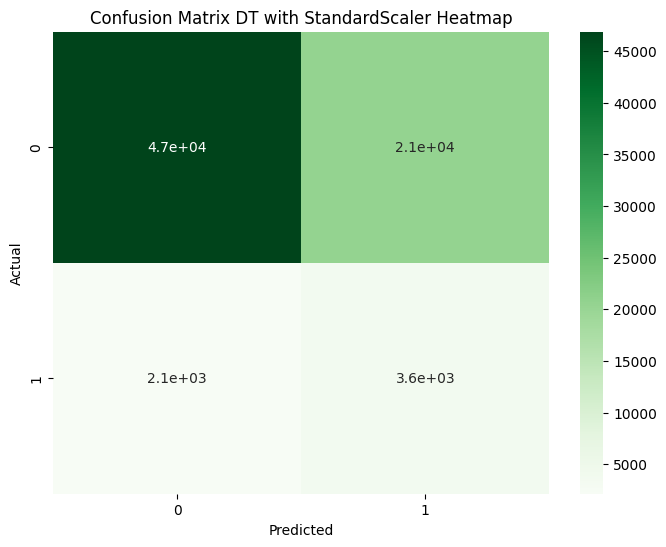

In [ ]:
# Evaluasi metrik klasifikasi dengan confusion matriks
cm = confusion_matrix(Y_val_final, y_pred_lda)
print("Confusion Matrix:\n", cm,"\n")

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT with StandardScaler Heatmap')
plt.show()

- Nilai True Positive (TP) menyatakan banyak orang yang diprediksi model melakukan churn dan benar-benar melakukan churn. Pada model ini, didapatkan TP sebesar 3625.
- Nilai False Positive (FP) menyatakan banyak orang yang diprediksi model melakukan churn tetapi sebenarnya tidak melakukan churn. Pada model ini, didapatkan FP sebesar 20532.
- Nilai True Negative (TN) menyatakan banyak orang yang diprediksi tidak melakukan churn dan sebenarnya tidak melakukan churn. Pada model ini, didapatkan TN sebesar 46886. 
- Nilai False Negative (FN) menyatakan banyak orang yang diprediksi tidak melakukan churn tetapi sebenarnya melakukan churn. Pada model ini, didapatkan FN sebesar 2132. 

### Modelling

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an instance of LinearDiscriminantAnalysis with the best hyperparameters
lda = LinearDiscriminantAnalysis(n_components = None, priors = None, shrinkage = 0.01, solver = 'eigen', store_covariance = False, tol = 1)

# Fit the model on the training data
lda.fit(X_train_smote, Y_train_smote)

# Make predictions on the val data
val_pred_lda = lda.predict(scaled_X_val)

# Calculate the evaluation metrics
accuracy_lda = accuracy_score(Y_val_final, val_pred_lda)
f1_score_lda = f1_score(Y_val_final, val_pred_lda)
recall_lda = recall_score(Y_val_final, val_pred_lda)
precision_lda = precision_score(Y_val_final, val_pred_lda)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy_lda))
print("F1 Score: {:.4f}".format(f1_score_lda))
print("Recall Score: {:.4f}".format(recall_lda))
print("Precision Score: {:.4f}".format(precision_lda))

Accuracy: 0.6933
F1 Score: 0.2448
Recall Score: 0.6318
Precision Score: 0.1518


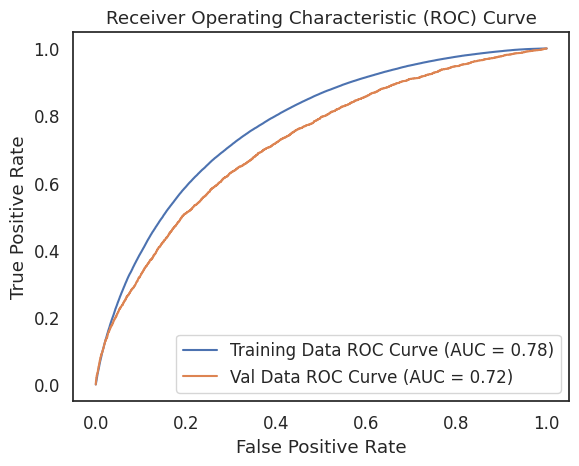

In [ ]:
# Get predicted probabilities for training and val data
train_probs_lda = lda.predict_proba(X_train_smote)[:, 1]
val_probs_lda = lda.predict_proba(scaled_X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for training and val data
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_smote, train_probs_lda)
fpr_val, tpr_val, thresholds_val = roc_curve(Y_val_final, val_probs_lda)

# Compute the AUC scores for training and val data
auc_train = auc(fpr_train, tpr_train)
val_auc_lda = auc(fpr_val, tpr_val)

# Plot the ROC curves
plt.plot(fpr_train, tpr_train, label='Training Data ROC Curve (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_val, tpr_val, label='Val Data ROC Curve (AUC = {:.2f})'.format(val_auc_lda))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

Observation:

Pada data training ROC Curve menghasilkan nilai AUC (Area Under the Curve) sebesar 0.78, sedangkan nilai AUC pada data validation sebesar 0.72. Dengan melihat perbedaan nilai AUC antara data training dan data validation, dapat diketahui bahwa model cenderung lebih baik dalam memprediksi data training daripada data yang belum pernah dilihat sebelumnya pada data validation. Perbedaan ini menunjukkan adanya kemungkinan overfitting.

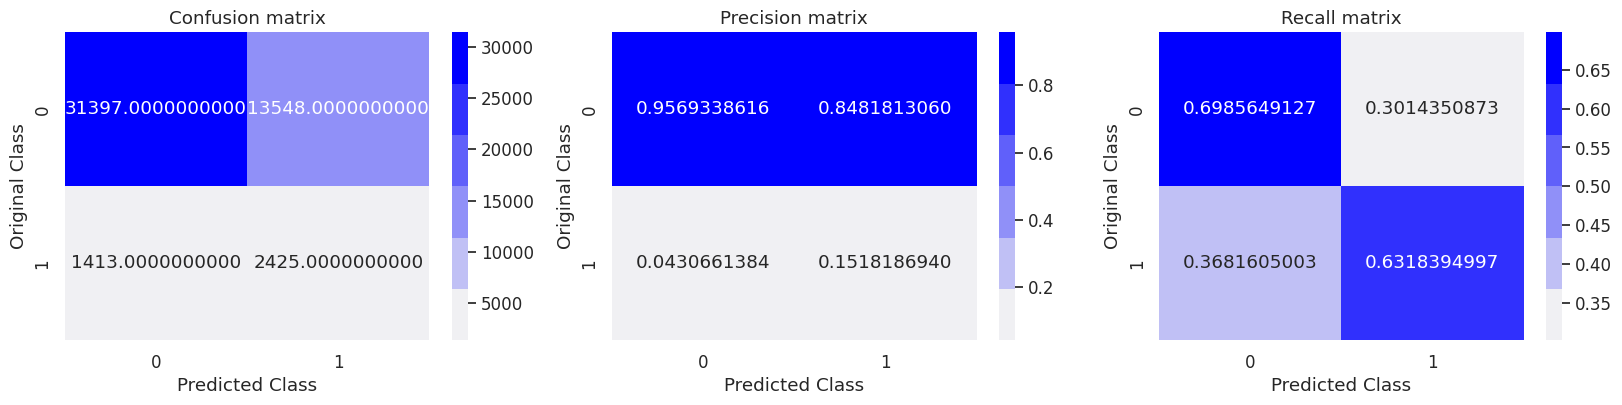

In [ ]:
# Usage example
plot_confusion_matrix(Y_val_final, val_pred_lda)

## Random Forest

### Tuning

In [ ]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [64, 128, 256],
    'max_depth': [2, 8, 16],
}

# Create a random forest classifier object
rf = RandomForestClassifier()

# Define the grid search cross-validation object
grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

# Fit the grid search cross-validation object to the data
grid_results = grid_search.fit(X_train_smote, Y_train_smote)

# summarize result
best_params = grid_results.best_params_
print('Best Score: %s' % grid_results.best_score_)
print('Best Hyperparameters: %s' % grid_results.best_params_)

Best Score: 0.9387053621517873
Best Hyperparameters: {'max_depth': 16, 'n_estimators': 256}


In [ ]:
# Evaluate the performance of the best model on the val set
y_pred_rf = grid_search.predict(scaled_X_val)
accuracy_rf = accuracy_score(Y_val_final, y_pred_rf)
recall_rf = recall_score(Y_val_final, y_pred_rf)
print(f'Val set accuracy: {accuracy_rf:.2f}')
print(f'Val set recall score: ', recall_rf)

Val set accuracy: 0.85
Val set recall score:  0.28556539864512764


Confusion Matrix:
 [[40265  4680]
 [ 2742  1096]] 



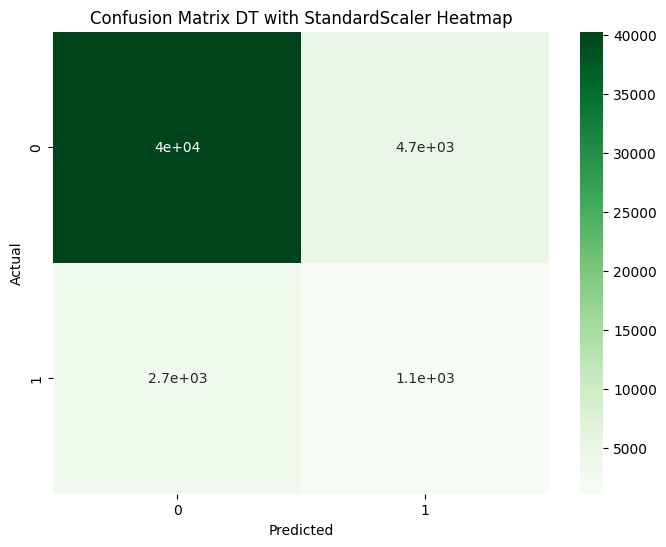

In [ ]:
# Evaluasi metrik klasifikasi dengan confusion matriks
cm = confusion_matrix(Y_val_final, y_pred_rf)
print("Confusion Matrix:\n", cm,"\n")

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT with StandardScaler Heatmap')
plt.show()

### Modelling

In [ ]:
# Create and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=256, random_state=42)
rf_classifier.fit(X_train_smote, Y_train_smote)

# Make predictions on the training data
val_pred_rf = rf_classifier.predict(scaled_X_val)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(Y_val_final, val_pred_rf)
f1_rf = f1_score(Y_val_final, val_pred_rf)
recall_rf = recall_score(Y_val_final, val_pred_rf)
precision_rf = precision_score(Y_val_final, val_pred_rf)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)

Accuracy: 0.8598487177910338
F1 Score: 0.2228032283733091
Recall: 0.25534132360604483
Precision: 0.19762048800161322


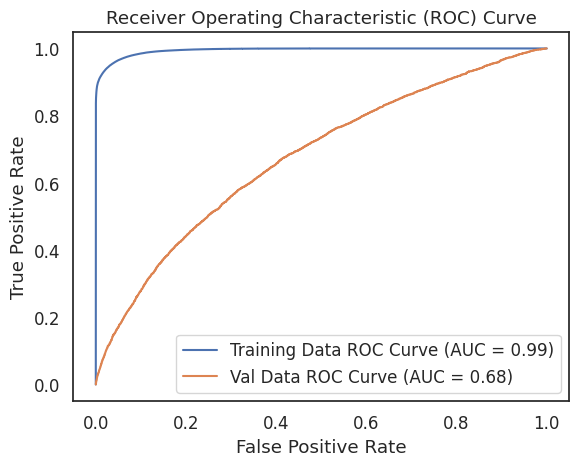

In [ ]:
# Calculate the probabilities for the training and val data
train_probs_rf = rf_classifier.predict_proba(X_train_smote)[:, 1]
val_probs_rf = rf_classifier.predict_proba(scaled_X_val)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the training data
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train_smote, train_probs_rf)
train_auc = auc(train_fpr, train_tpr)

# Calculate the false positive rate, true positive rate, and thresholds for the val data
val_fpr, val_tpr, val_thresholds = roc_curve(Y_val_final, val_probs_rf)
val_auc_rf = auc(val_fpr, val_tpr)

# Plot the ROC curves
plt.plot(train_fpr, train_tpr, label='Training Data ROC Curve (AUC = {:.2f})'.format(train_auc))
plt.plot(val_fpr, val_tpr, label='Val Data ROC Curve (AUC = {:.2f})'.format(val_auc_rf))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

Observation:

Pada data training ROC Curve menghasilkan nilai AUC (Area Under the Curve) sebesar 0.99, sedangkan nilai AUC pada data validation sebesar 0.68. Dengan melihat perbedaan nilai AUC antara data training dan data validation,
dapat diketahui bahwa model cenderung lebih baik dalam memprediksi data training daripada data yang belum pernah dilihat sebelumnya pada data validation. Perbedaan yang sangat jauh antara nilai AUC pada data train dan data validation menunjukkan adanya overfitting.

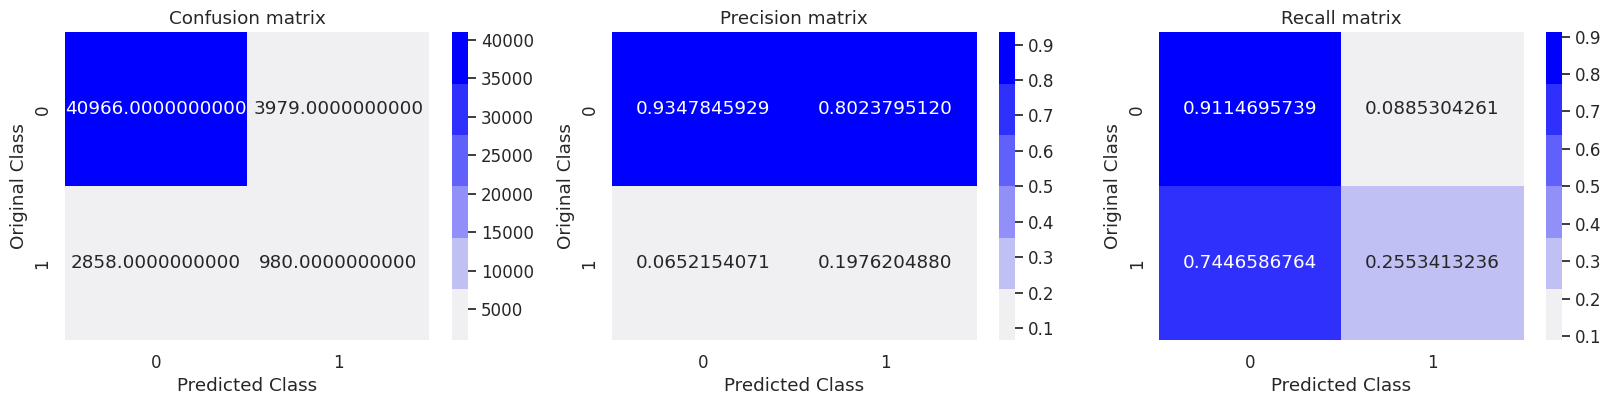

In [ ]:
# Usage example
plot_confusion_matrix(Y_val_final, val_pred_rf)

## Logistic Regression

### Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression

Accuracies= {} # make dictionary to save all accuracies models

# define model
lr = LogisticRegression()

# parameters
parameters = [{'penalty':['l2'],'C':[0.1,0.4,0.5],'random_state':[0], 'solver': ['liblinear', 'saga']}]

# define search
search = GridSearchCV(lr, parameters, scoring='accuracy', n_jobs=-1)

# execute search
result = search.fit(X_train_smote, Y_train_smote)

# summarize result
best_params = result.best_params_
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7066104310881348
Best Hyperparameters: {'C': 0.4, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


In [ ]:
# Evaluate the model on the val set
y_pred_lr = search.predict(scaled_X_val)
accuracy_lr = accuracy_score(Y_val_final, y_pred_lr)
recall_lr = recall_score(Y_val_final, y_pred_lr)
print("Accuracy on val set: ", accuracy_lr)
print("Recall score on val set: ", recall_lr)

Accuracy on CV set:  0.6946272266978251
Recall score on CV set:  0.6255862428348098


Confusion Matrix:
 [[31485 13460]
 [ 1437  2401]] 



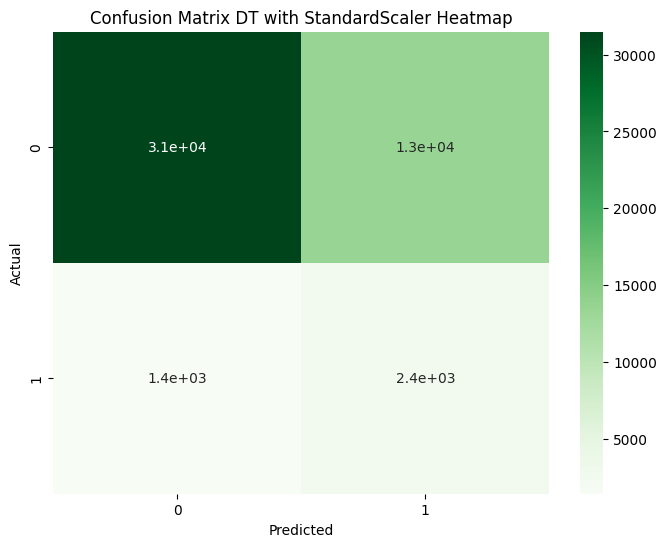

In [ ]:
# Evaluasi metrik klasifikasi dengan confusion matriks
cm = confusion_matrix(Y_val_final, y_pred_lr)
print("Confusion Matrix:\n", cm,"\n")

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT with StandardScaler Heatmap')
plt.show()

### Modelling

In [ ]:
# Create an instance of Logistic Regression with the best hyperparameters
lr_classifier = LogisticRegression(C = 0.4, penalty = 'l2', random_state = 0, solver = 'liblinear')

# Fit the model on the training data
lr_classifier.fit(X_train_smote, Y_train_smote)

# Make predictions on the val data
val_pred_lr = lr_classifier.predict(scaled_X_val)

# Calculate the evaluation metrics
accuracy_lr = accuracy_score(Y_val_final, val_pred_lr)
f1_score_lr = f1_score(Y_val_final, val_pred_lr)
recall_score_lr = recall_score(Y_val_final, val_pred_lr)
precision_score_lr = precision_score(Y_val_final, val_pred_lr)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy_lr))
print("F1 Score: {:.4f}".format(f1_score_lr))
print("Recall Score: {:.4f}".format(recall_score_lr))
print("Precision Score: {:.4f}".format(precision_score_lr))

Accuracy: 0.6929
F1 Score: 0.2443
Recall Score: 0.6308
Precision Score: 0.1515


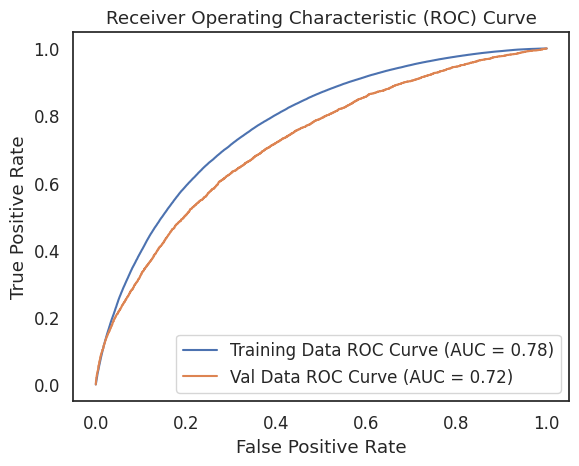

In [ ]:
# Get predicted probabilities for training and val data
train_probs_lr = lr_classifier.predict_proba(X_train_smote)[:, 1]
val_probs_lr = lr_classifier.predict_proba(scaled_X_val)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for training and val data
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_smote, train_probs_lr)
fpr_val, tpr_val, thresholds_val = roc_curve(Y_val_final, val_probs_lr)

# Compute the AUC scores for training and val data
auc_train = auc(fpr_train, tpr_train)
val_auc_lr = auc(fpr_val, tpr_val)

# Plot the ROC curves
plt.plot(fpr_train, tpr_train, label='Training Data ROC Curve (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_val, tpr_val, label='Val Data ROC Curve (AUC = {:.2f})'.format(val_auc_lr))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

Observation:

Pada data training ROC Curve menghasilkan nilai AUC (Area Under the Curve) sebesar 0.78, sedangkan nilai AUC pada data validation sebesar 0.72. Dengan melihat perbedaan nilai AUC antara data training dan data validation,
dapat diketahui bahwa model cenderung lebih baik dalam memprediksi data training daripada data yang belum pernah dilihat sebelumnya pada data validation. Perbedaan ini menunjukkan adanya kemungkinan overfitting.

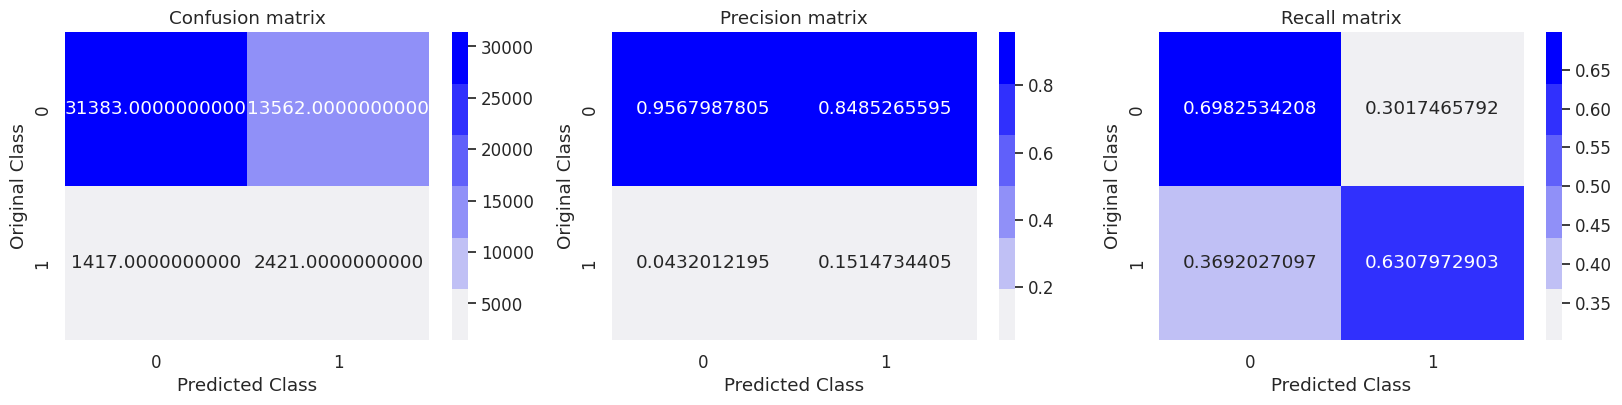

In [ ]:
# Usage example
plot_confusion_matrix(Y_val_final, val_pred_lr)

## Naive Bayes

### Tuning

In [ ]:
# Define the hyperparameter grid to search over
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Create a Gaussian Naive Bayes classifier object
nb = GaussianNB()

# Define the grid search cross-validation object
grid_search = GridSearchCV(nb, param_grid=param_grid, scoring='recall', n_jobs=-1)

# Fit the grid search cross-validation object to the data
grid_results = grid_search.fit(X_train_smote, Y_train_smote)

# summarize result
best_params = grid_results.best_params_
print('Best Score: %s' % grid_results.best_score_)
print('Best Hyperparameters: %s' % grid_results.best_params_)

Best Score: 0.7132464616010615
Best Hyperparameters: {'var_smoothing': 1e-09}


In [ ]:
# Evaluate the model on the val set
y_pred_nb = grid_search.predict(scaled_X_val)
accuracy_nb = accuracy_score(Y_val_final, y_pred_nb)
recall_nb = recall_score(Y_val_final, y_pred_nb)
print("Accuracy on val set: ", accuracy_nb)
print("Recall score on val set: ", recall_nb)

Accuracy on val set:  0.6260377590554086
Recall score on val set:  0.6031787389265242


Confusion Matrix:
 [[28225 16720]
 [ 1523  2315]] 



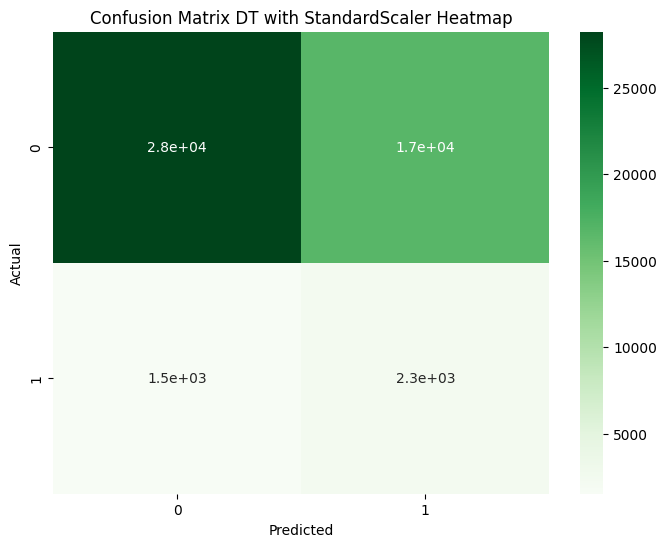

In [ ]:
# Evaluasi metrik klasifikasi dengan confusion matriks
cm = confusion_matrix(Y_val_final, y_pred_nb)
print("Confusion Matrix:\n", cm,"\n")

# Visualisasi confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT with StandardScaler Heatmap')
plt.show()

### Modelling

In [ ]:
# Create and fit the Random Forest Classifier
nb_classifier = GaussianNB(var_smoothing= 1e-09)
nb_classifier.fit(X_train_smote, Y_train_smote)

# Make predictions on the training data
val_pred_nb = nb_classifier.predict(scaled_X_val)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(Y_val_final, val_pred_nb)
f1_nb = f1_score(Y_val_final, val_pred_nb)
recall_nb = recall_score(Y_val_final, val_pred_nb)
precision_nb = precision_score(Y_val_final, val_pred_nb)

# Print the evaluation metrics
print("Accuracy:", accuracy_nb)
print("F1 Score:", f1_nb)
print("Recall:", recall_nb)
print("Precision:", precision_nb)

Accuracy: 0.6260377590554086
F1 Score: 0.20242206968915313
Recall: 0.6031787389265242
Precision: 0.1216180719726819


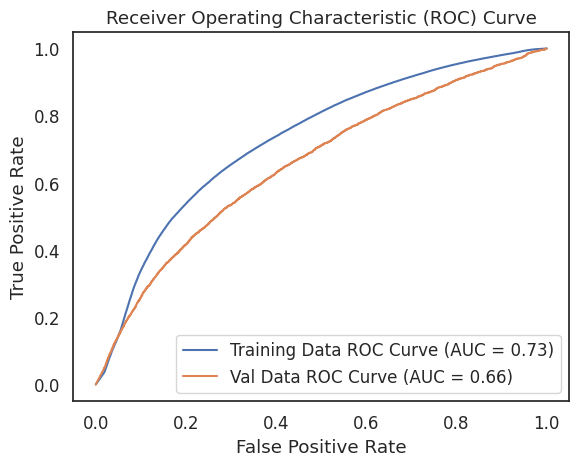

In [ ]:
# Calculate the probabilities for the training and val data
train_probs_nb = nb_classifier.predict_proba(X_train_smote)[:, 1]
val_probs_nb = nb_classifier.predict_proba(scaled_X_val)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the training data
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train_smote, train_probs_nb)
train_auc = auc(train_fpr, train_tpr)

# Calculate the false positive rate, true positive rate, and thresholds for the val data
val_fpr, val_tpr, val_thresholds = roc_curve(Y_val_final, val_probs_nb)
val_auc_nb = auc(val_fpr, val_tpr)

# Plot the ROC curves
plt.plot(train_fpr, train_tpr, label='Training Data ROC Curve (AUC = {:.2f})'.format(train_auc))
plt.plot(val_fpr, val_tpr, label='Val Data ROC Curve (AUC = {:.2f})'.format(val_auc_nb))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

Observation:

Pada data training ROC Curve menghasilkan nilai AUC (Area Under the Curve) sebesar 0.73, sedangkan nilai AUC pada data validation sebesar 0.66. Dengan melihat perbedaan nilai AUC antara data training dan data validation,
dapat diketahui bahwa model cenderung lebih baik dalam memprediksi data training daripada data yang belum pernah dilihat sebelumnya pada data validation. Perbedaan ini menunjukkan adanya kemungkinan overfitting.

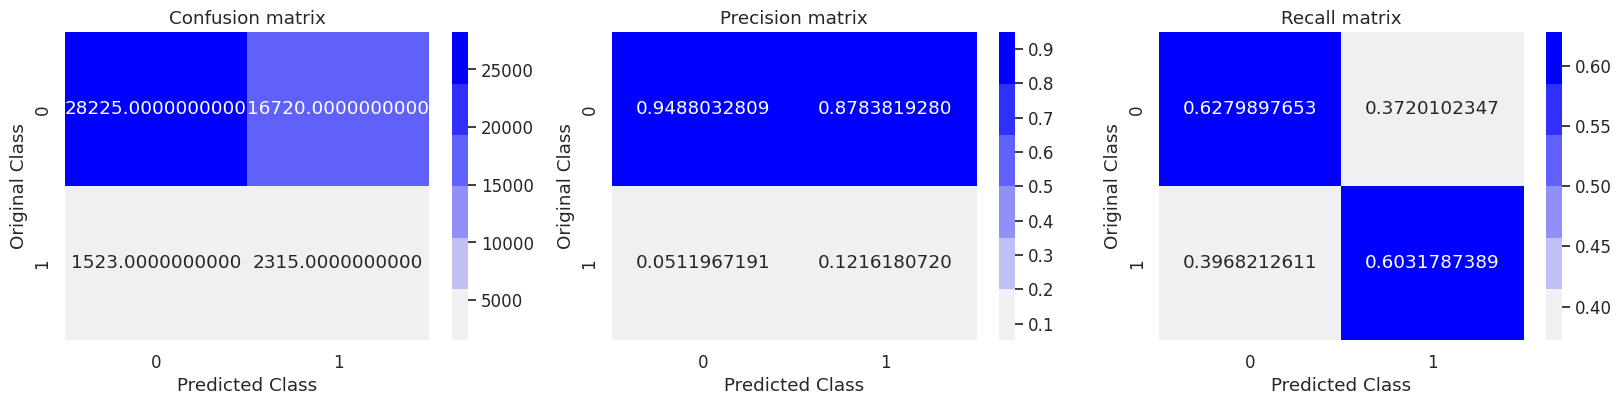

In [ ]:
# Usage example
plot_confusion_matrix(Y_val_final, val_pred_nb)

## Evaluation

Cross Validation

In [ ]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import cross_val_score

scoring = make_scorer(recall_score)
recall_scores_lda = cross_val_score(lda, scaled_X_val, Y_val_final, cv=5, scoring=scoring)
recall_scores_rf = cross_val_score(rf_classifier, scaled_X_val, Y_val_final, cv=5, scoring=scoring)
recall_scores_lr = cross_val_score(lr_classifier, scaled_X_val, Y_val_final, cv=5, scoring=scoring)
recall_scores_nb = cross_val_score(nb_classifier, scaled_X_val, Y_val_final, cv=5, scoring=scoring)

print("Mean Recall score for LDA: % f with standard deviation %f" %(recall_scores_lda.mean(), recall_scores_lda.std()))
print("Mean Recall score for Random Forest: % f with standard deviation %f" %(recall_scores_rf.mean(), recall_scores_rf.std()))
print("Mean Recall score for Logistic Regression: % f with standard deviation %f" %(recall_scores_lr.mean(), recall_scores_lr.std()))
print("Mean Recall score for Naive Bayes: % f with standard deviation %f" %(recall_scores_nb.mean(), recall_scores_nb.std()))

Mean Recall score for LDA:  0.025012 with standard deviation 0.003977
Mean Recall score for Random Forest:  0.001042 with standard deviation 0.000975
Mean Recall score for Logistic Regression:  0.012245 with standard deviation 0.005117
Mean Recall score for Naive Bayes:  0.369455 with standard deviation 0.022745


Nilai standar deviasi recall yang rendah menandakan model tidak mengalami overfitting. Keempat model di atas memiliki nilai standar deviasi yang tidak cukup rendah sehingga dapat disimpulkan keempatnya berkemungkinan mengalami overfitting meskipun tidak terlalu besar. Nilai mean recall tertinggi dimiliki oleh `Naive Bayes`, kemudian disusul oleh `LDA`, `Logistic Regression`, dan `Random Forest`. 

**Metrics Evaluation**

In [ ]:
metrics = pd.DataFrame({
    'Model Name': ['LDA', 'Random Forest', 'Logistic Regression', 'Naive Bayes'],
    'Recall'    : [recall_lda, recall_rf, recall_score_lr, recall_nb, ],
    'Recall CV' : [recall_scores_lda.mean(), recall_scores_rf.mean(), recall_scores_lr.mean(), recall_scores_nb.mean()],
    'AUC Score'    : [val_auc_lda, val_auc_rf, val_auc_lr, val_auc_nb],
    'Accuracy'    : [accuracy_lda, accuracy_rf, accuracy_lr, accuracy_nb]
    }, columns = ['Model Name', 'Recall', 'Recall CV', 'AUC Score', 'Accuracy'])

metrics.sort_values(by='Recall', ascending=False)

Model Name    Recall  Recall CV  AUC Score  Accuracy
0                  LDA  0.631839   0.025012   0.722298  0.693315
2  Logistic Regression  0.630797   0.012245   0.720946  0.692946
3          Naive Bayes  0.603179   0.369455   0.657053  0.626038
1        Random Forest  0.255341   0.001042   0.676202  0.859849

Pada case ini, lebih baik algoritma memprediksi customer churn tetapi sebenarnya tidak  daripada algoritma salah memprediksi bahwa customer tidak churn padahal sebenarnya customer churn. Oleh karena itu, bisa digunakan **nilai Recall** (kita membutuhkan nilai False Negative yang semakin rendah. Semakin rendah nilai FN maka nilai Recall akan semakin tinggi).

Pada model hasil hyperparameter tuning, `LDA` memiliki nilai Recall tertinggi, yaitu sebesar $0.631839$. Pada model yang dilakukan Cross-Validation, nilai Recall tertinggi dimiliki oleh `Naive Bayes` sebesar $0.369455$. Nilai AUC Score tertinggi dimiliki oleh `LDA`, yaitu sebesar $0.722298$. Sedangkan, nilai Accuracy tertinggi dimiliki oleh `Random Forest` sebesar $0.859849$. **Oleh karena itu, pada kasus ini, model yang akan digunakan untuk melakukan klasifikasi status heart disease adalah `LDA` dengan parameter terbaik hasil hyperparameter tuning. Model ini memberikan nilai recall yang paling tinggi dengan kemungkinan overfitting yang lebih rendah.**

In [ ]:
metrics.to_excel("Metrics_Evaluation.xlsx", index=False)

# **Feature Importance**

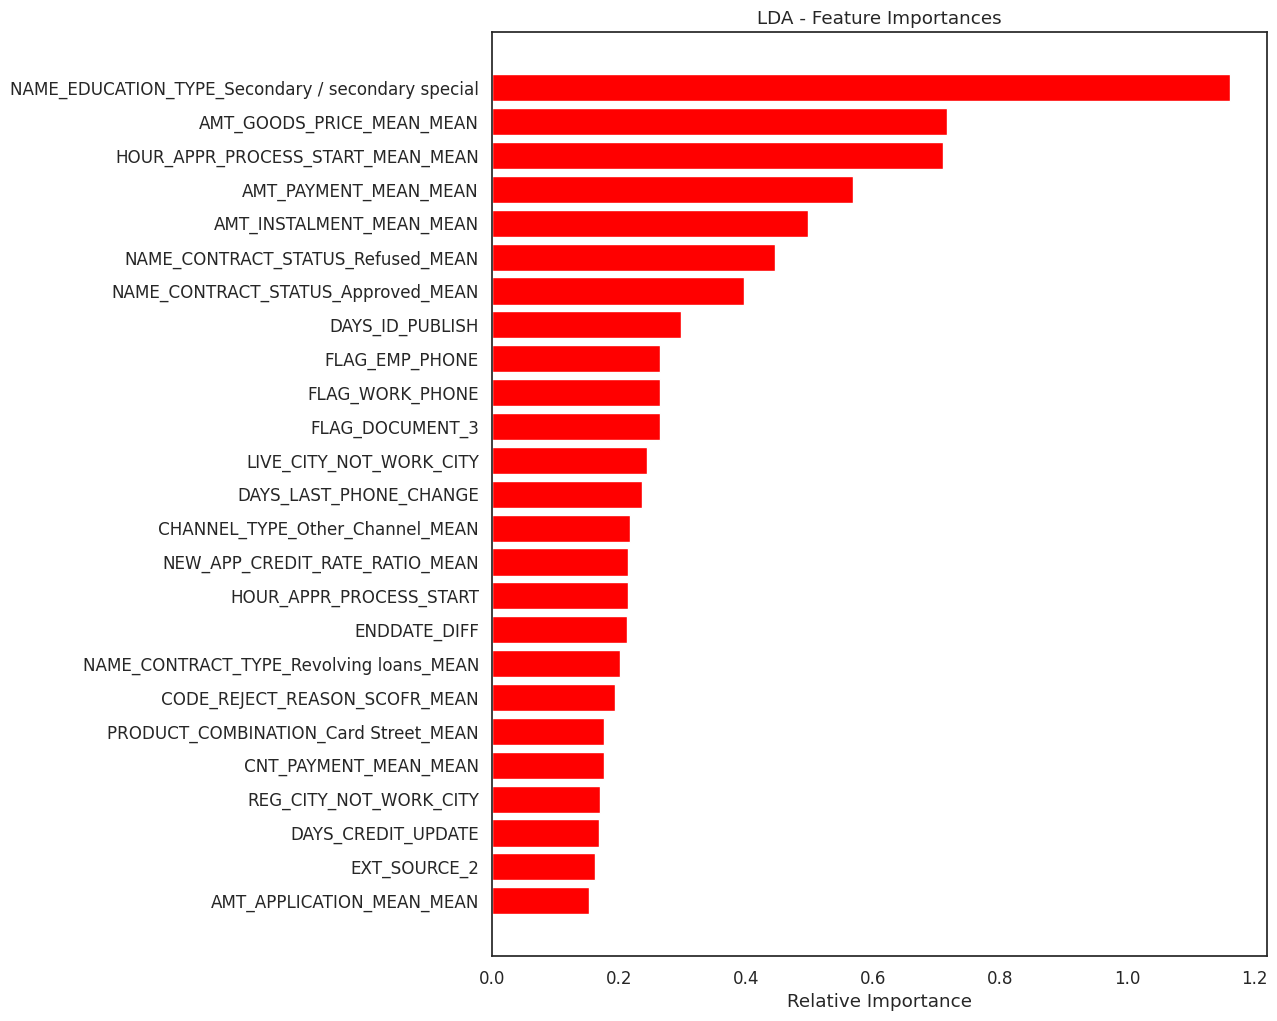

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
lda_features = features_top_df_val.columns
lda_importances = np.abs(lda.coef_[0])
data = {'Feature': lda_features, 'Importance': lda_importances}
df_importance = pd.DataFrame(data)
df_importance_sorted = df_importance.sort_values(by='Importance', ascending=True)

# Select the top 25 features
df_top_25 = df_importance_sorted.tail(25)

plt.figure(figsize=(10, 12))
plt.title('LDA - Feature Importances')
plt.barh(range(len(df_top_25)), df_top_25['Importance'], color='red', align='center')
plt.yticks(range(len(df_top_25)), df_top_25['Feature'])
plt.xlabel('Relative Importance')
plt.show()

***
Setelah melakukan modelling, kami mendapatkan 25 feature utama yang mempengaruhi pembayaran pinjaman. NAME_EDUCATION_TYPE_Secondary menjadi top feature dalam menentukan kemampuan pembayaran pinjaman oleh peminjam. Diantara 5 feature teratas, feature yang mencerminkan kemampuan dan perilaku calon peminjam dalam pembayaran kredit adalah AMT_INSTALMENT, yang merupakan jumlah angsuran yang ditentukan dari kredit sebelumnya, dan AMT_PAYMENT, yang merupakan jumlah yang sebenarnya dibayarkan pada angsuran tersebut.
***

In [ ]:
import pandas as pd

# Menyiapkan data
lda_features = features_top_df_val.columns
lda_importances = np.abs(lda.coef_[0])
data = {'Feature': lda_features, 'Importance': lda_importances}
df_importance = pd.DataFrame(data)

# Mengurutkan dataframe berdasarkan nilai importance
df_importance_sorted = df_importance.sort_values(by='Importance', ascending=False)

# Menampilkan dataframe terurut
df_importance_sorted

Feature  Importance
31  NAME_EDUCATION_TYPE_Secondary / secondary special    1.162309
58                          AMT_GOODS_PRICE_MEAN_MEAN    0.716418
59                  HOUR_APPR_PROCESS_START_MEAN_MEAN    0.710181
93                              AMT_PAYMENT_MEAN_MEAN    0.568082
92                           AMT_INSTALMENT_MEAN_MEAN    0.497368
..                                                ...         ...
90                      PRODUCT_COMBINATION_Cash_MEAN    0.008959
86                          NAME_YIELD_GROUP_XNA_MEAN    0.006441
80                            NAME_PORTFOLIO_XNA_MEAN    0.004734
43                        OCCUPATION_TYPE_Sales staff    0.001741
99                 CNT_INSTALMENT_MATURE_CUM_MAX_MEAN    0.000349

[100 rows x 2 columns]

In [ ]:
df_importance_sorted.to_excel("Feature Importance.xlsx", index=False)

# **Predicting Test Data**

In [ ]:
# Predict probabilities using the LDA model
scaled_X_test = np.nan_to_num(scaled_X_test)
test_probs = lda.predict_proba(scaled_X_test)
test_preds = lda.predict(scaled_X_test)

# Create a DataFrame with SK_ID_CURR and predicted probabilities
test_results = pd.DataFrame({'SK_ID_CURR': Test['SK_ID_CURR'], 'PROBABILITY': test_probs[:, 1], 'PREDICTION': test_preds})

# Display the table
print(test_results)

       SK_ID_CURR   PROBABILITY  PREDICTION
0          100001  9.062625e-02         0.0
1          100005  1.000000e+00         1.0
2          100013  7.877564e-02         0.0
3          100028  5.879136e-02         0.0
4          100038  9.994211e-01         1.0
...           ...           ...         ...
48739      456221  1.340015e-07         0.0
48740      456222  9.994147e-01         1.0
48741      456223  4.124545e-04         0.0
48742      456224  9.996986e-01         1.0
48743      456250  8.571559e-01         1.0

[48744 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## **Exporting**

In [ ]:
features_top_df_test.head()

AMT_CREDIT  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0    568800.0         450000.0                    0.018850      -19241   
1    222768.0         180000.0                    0.035792      -18064   
2    663264.0         630000.0                    0.019101      -20038   
3   1575000.0        1575000.0                    0.026392      -13976   
4    625500.0         625500.0                    0.010032      -13040   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  \
0          -2329            -5170.0             -812               1   
1          -4469            -9118.0            -1623               1   
2          -4458            -2175.0            -3503               1   
3          -1866            -2000.0            -4208               1   
4          -2191            -4000.0            -4262               1   

   FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT  \
0                0           0                     2   
1                0           0                     2   
2                0           0                     2   
3                0           1                     2   
4                1           0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
0                            2                       0   
1                            2                       0   
2                            2                       0   
3                            2                       0   
4                            2                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.752614   
1                       0                        0      0.564990   
2                       0                        0      0.000000   
3                       0                        0      0.525734   
4                       1                        1      0.202145   

   EXT_SOURCE_2  EXT_SOURCE_3  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.789654      0.159520                       0.0   
1      0.291656      0.432962                       0.0   
2      0.699787      0.610991                       0.0   
3      0.509677      0.612704                       0.0   
4      0.425687      0.000000                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
0                       0.0                 -1740.0                1   
1                       0.0                     0.0                1   
2                       0.0                  -856.0                0   
3                       0.0                 -1805.0                1   
4                       0.0                  -821.0                1   

   NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  \
0                              1                                   0   
1                              1                                   0   
2                              1                                   0   
3                              1                                   0   
4                              1                                   0   

   CODE_GENDER_F  CODE_GENDER_M  NAME_INCOME_TYPE_Pensioner  \
0              1              0                           0   
1              0              1                           0   
2              0              1                           0   
3              1              0                           0   
4              0              1                           0   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Working  \
0                               0                         1   
1                               0                         1   
2                               0                         1   
3                               0                         1   
4                               0                         1   

   NAME_EDUCATION_TYPE_Higher education  \
0       

In [ ]:
final_dataset = pd.concat([test_results, features_top_df_test], axis=1 )
final_dataset.head()

SK_ID_CURR  PROBABILITY  PREDICTION  AMT_CREDIT  AMT_GOODS_PRICE  \
0      100001     0.345781         0.0    568800.0         450000.0   
1      100005     0.566383         1.0    222768.0         180000.0   
2      100013     0.252489         0.0    663264.0         630000.0   
3      100028     0.352652         0.0   1575000.0        1575000.0   
4      100038     0.775668         1.0    625500.0         625500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850      -19241          -2329            -5170.0   
1                    0.035792      -18064          -4469            -9118.0   
2                    0.019101      -20038          -4458            -2175.0   
3                    0.026392      -13976          -1866            -2000.0   
4                    0.010032      -13040          -2191            -4000.0   

   DAYS_ID_PUBLISH  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0             -812               1                0           0   
1            -1623               1                0           0   
2            -3503               1                0           0   
3            -4208               1                0           1   
4            -4262               1                1           0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
0                     2                            2                       0   
1                     2                            2                       0   
2                     2                            2                       0   
3                     2                            2                       0   
4                     2                            2                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.752614   
1                       0                        0      0.564990   
2                       0                        0      0.000000   
3                       0                        0      0.525734   
4                       1                        1      0.202145   

   EXT_SOURCE_2  EXT_SOURCE_3  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.789654      0.159520                       0.0   
1      0.291656      0.432962                       0.0   
2      0.699787      0.610991                       0.0   
3      0.509677      0.612704                       0.0   
4      0.425687      0.000000                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
0                       0.0                 -1740.0                1   
1                       0.0                     0.0                1   
2                       0.0                  -856.0                0   
3                       0.0                 -1805.0                1   
4                       0.0                  -821.0                1   

   NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  \
0                              1                                   0   
1                              1                                   0   
2                              1                                   0   
3                              1                                   0   
4                              1                                   0   

   CODE_GENDER_F  CODE_GENDER_M  NAME_INCOME_TYPE_Pensioner  \
0              1              0                           0   
1              0              1                           0   
2              0              1                           0   
3              1              0                           0   
4              0              1                           0   

   NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Working  \
0                               0                         1   
1                               0                         1   
2                  

In [ ]:
test_dataset = pd.concat([test_results, X_test], axis=1 )
test_dataset.head()

SK_ID_CURR  PROBABILITY  PREDICTION  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100001     0.327944         0.0             0          135000.0   
1      100005     0.539290         1.0             0           99000.0   
2      100013     0.226030         0.0             0          202500.0   
3      100028     0.403962         0.0             2          315000.0   
4      100038     0.786993         1.0             1          180000.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0    568800.0      20560.5         450000.0                    0.018850   
1    222768.0      17370.0         180000.0                    0.035792   
2    663264.0      69777.0         630000.0                    0.019101   
3   1575000.0      49018.5        1575000.0                    0.026392   
4    625500.0      32067.0         625500.0                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0      -19241          -2329            -5170.0             -812           1   
1      -18064          -4469            -9118.0            -1623           1   
2      -20038          -4458            -2175.0            -3503           1   
3      -13976          -1866            -2000.0            -4208           1   
4      -13040          -2191            -4000.0            -4262           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           0           1   
1               1                0                 1           0           0   
2               1                0                 1           0           0   
3               1                0                 1           1           0   
4               1                1                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              2.0                     2                            2   
1              2.0                     2                            2   
2              2.0                     2                            2   
3              4.0                     2                            2   
4              3.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.752614      0.789654      0.159520                       0.0   
1      0.564990      0.291656      0.432962                       0.0   
2      0.000000      0.699787      0.610991                       0.0   
3      0.525734      0.509677      0.612704                       0.0   
4      0.202145      0.425687      0.000000                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                  

In [ ]:
test_dataset.to_excel("Test Dataset.xlsx", index=False)

***
Hasil export data tersebut akan kami gunakan untuk membuat dashboard interaktif pada Power BI.
***